In [1]:
import umap
import matplotlib.pyplot as plt
from dataloader import GeneticDataloaders, SynGeneticDataset
from torch.utils.data import DataLoader
from config import *
import numpy as np
import sklearn
num_samples = 200






/home/philipkenneweg/miniconda3/envs/sls3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-04 13:18:33.128692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def draw_samples(dataloader,num_samples):
    data = []
    data_labels = []
    for i, (x, y) in enumerate(dataloader):
        for d in x:
            data.append(d)
        for l in y:
            data_labels.append(l)
        if len(data) >= num_samples:
            break

    data = torch.stack(data)
    data_labels = torch.stack(data_labels)

    out_label = np.argmax(data_labels.numpy(), axis = 1) if len(data_labels.shape) > 1 else data_labels.numpy()
    return data.numpy()[:num_samples], out_label[:num_samples]

In [3]:



datas = []

geneticData = SynGeneticDataset("finalruns/Transformer/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/UnetMLP/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/Unet/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/Baseline/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/UnetCombined/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

# geneticData = SynGeneticDataset("newgeneration/")
# syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
# syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
# datas.append(syn_data)

train_dataloader,test_dataloader = GeneticDataloaders(config["batch_size"], True) 
syn_data, syn_data_labels = draw_samples(test_dataloader, num_samples)
datas.append(syn_data)
syn_data, syn_data_labels = draw_samples(train_dataloader, num_samples)
datas.append(syn_data)






path of dataset finalruns/Transformer/
len of syn dataset 10400
path of dataset finalruns/UnetMLP/
len of syn dataset 10400
path of dataset finalruns/Unet/
len of syn dataset 10400
path of dataset finalruns/Baseline/
len of syn dataset 10400
path of dataset finalruns/UnetCombined/
len of syn dataset 10400
len of dataset 9365
len of dataset 1040


In [ ]:
# datasfull =[]
# num_samplesfull = 9000

# train_dataloader,test_dataloader = GeneticDataloaders(config["batch_size"], True) 
# syn_data, syn_data_labels = draw_samples(train_dataloader, num_samplesfull)
# datasfull.append(syn_data)

# geneticData = SynGeneticDataset("finalruns/UnetCombined/")
# syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
# syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samplesfull)
# datasfull.append(syn_data)

In [4]:

combined_data = np.concatenate(datas, axis=0)
combined_data = combined_data.reshape(combined_data.shape[0], -1)
print(combined_data.shape)


combined_labels = np.concatenate([np.zeros(len(datas[i]))+i for i in range(len(datas))])



(1400, 147456)


In [5]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'cosine', n_neighbors=5)
embedding = reducer.fit_transform(combined_data)

computing UMAP


In [6]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'cosine', n_neighbors=15)
embedding2 = reducer.fit_transform(combined_data)

computing UMAP


In [7]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'euclidean', n_neighbors=15)
embedding3 = reducer.fit_transform(combined_data)

computing UMAP


In [8]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'euclidean', n_neighbors=5)
embedding4 = reducer.fit_transform(combined_data)

computing UMAP


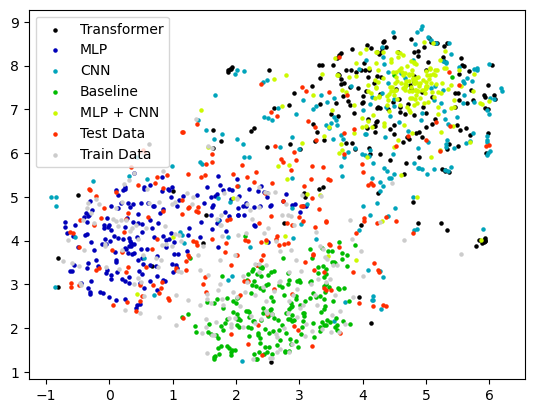

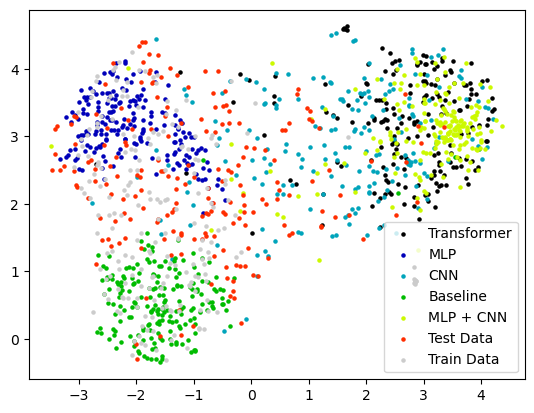

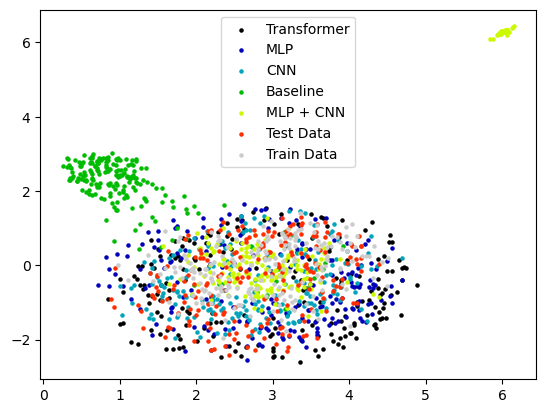

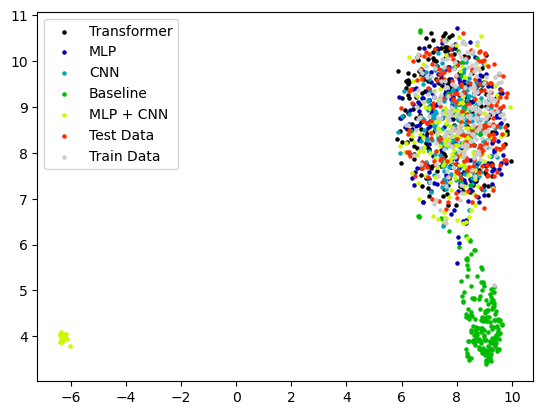

In [9]:

colors = plt.get_cmap('nipy_spectral')(np.linspace(0, 1, len(datas)))
labels =  ["Transformer", "MLP", "CNN", "Baseline", "MLP + CNN" ,"Test Data", "Train Data"]
for i in range(len(datas)):
    plt_data = embedding[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()

for i in range(len(datas)):
    plt_data = embedding2[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()

for i in range(len(datas)):
    plt_data = embedding3[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()

for i in range(len(datas)):
    plt_data = embedding4[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()


In [10]:
num_checks = 200
def distance(x1, x2):
    x1 = x1.flatten()
    x2 = x2.flatten()
    return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
    return np.mean((x1-x2)**2)

def check_diversity_by_closest(data1, data2):

    def find_closest(dataset1, dataset2, num = num_checks):
        all_min_dist = []
        for i,datapoint in enumerate(dataset1):
            if i > num:
                break
            #find closest sample in geneticData
            min_dist = 1e50
            for sample2 in dataset2:
                dist = distance(datapoint, sample2)
                #dist = torch.arccos(torch.nn.functional.cosine_similarity(sample,sample2.flatten(), dim = 0)) / np.pi
                if dist < min_dist and dist > 1e-3:
                    min_dist = dist
            all_min_dist.append(min_dist)
           # print(min_dist)
        
        return all_min_dist

    AA_ts = find_closest(data1, data2)
    AA_st = find_closest(data2, data1)
    AA_tt  = find_closest(data1, data1)
    AA_ss = find_closest(data2, data2)

    AA_truth = 0
    AA_syn = 0
    for i in range(num_checks):
        AA_truth += 1 if AA_ts[i]>AA_tt[i] else 0
        AA_syn += 1 if AA_st[i]>AA_ss[i] else 0
      #  print(AA_ts[i], AA_st[i], AA_tt[i], AA_ss[i])
    
    print(f"AA_truth: {AA_truth/num_checks}, AA_syn: {AA_syn/num_checks} average {(AA_truth/num_checks + AA_syn/num_checks) /2}")





In [17]:
from tqdm import tqdm

def distance(x1, x2):
    x1 = x1.flatten()
    x2 = x2.flatten()
    return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
    return 1-np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
    return np.mean((x1-x2)**2)
  #  return np.mean(np.abs(x1-x2))
def compute_closest(data1,data2, topn = 10):
    closest_neighborss = []
    for i,p1 in tqdm(enumerate(data1)):
        dists = []
        closest_neighbors = []
        for p2 in data2:
            dist = distance(p1, p2)
            closest_neighbors.append(0)
            dists.append(dist)
      #  print(min_dist)
        for a,p1_1 in enumerate(data1):
            dist = distance(p1, p1_1)
            if a == i:
                continue
            closest_neighbors.append(1)
            dists.append(dist)
            # if dist < min_dist and dist > 1e-4:
            #     closest_neighbor = 1
            #     min_dist = dist
        

      #  print(min_dist, closest_neighbor)
        indx = np.argsort(np.array(dists))
        min_dists = np.array(dists)[indx[:topn]]
        closest_neighbors = np.array(closest_neighbors)
        closest_neighbor = closest_neighbors[indx[:topn]]

        print(min_dists)
       # print(closest_neighbor)

        closest_neighborss.append(np.mean(closest_neighbor))
       # print(closest_neighborss)
    closest_neighborss = np.array(closest_neighborss)
    avg_class = np.mean(closest_neighborss)
    return avg_class



In [19]:

print("Checking diversity for test and train")
print(compute_closest(datas[5], datas[6]))
print("Checking diversity for test and transformer")
print(compute_closest(datas[5], datas[0]))
print("Checking diversity for test and mlp")
print(compute_closest(datas[5], datas[1]))
print("Checking diversity for test and cnn")
print(compute_closest(datas[5], datas[2]))
print("Checking diversity for test and baseline")
print(compute_closest(datas[5], datas[3]))
print("Checking diversity for test and mlp+cnn")
print(compute_closest(datas[5], datas[4]))

print("Checking diversity for mlp and test")
print(compute_closest(datas[1], datas[5]))
print("Checking diversity for transformer and test")
print(compute_closest(datas[0], datas[5]))
print("Checking diversity for cnn and test")
print(compute_closest(datas[2], datas[5]))
print("Checking diversity for baseline and test")
print(compute_closest(datas[3], datas[5]))
print("Checking diversity for mlp+cnn and test")
print(compute_closest(datas[4], datas[5]))
print("Checking diversity for train and test")
print(compute_closest(datas[6], datas[5]))


Checking diversity for test and train


0it [00:00, ?it/s]/tmp/ipykernel_12696/1749304549.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
2it [00:00, 11.36it/s]

[0.49335792 0.49466761 0.49500855 0.49521789 0.49538861 0.49570758
 0.49583219 0.49589818 0.49614266 0.49617913]
[0.49468529 0.49549991 0.49557781 0.49639754 0.49640123 0.49643029
 0.49647393 0.49650364 0.49671105 0.49686943]
[0.49530843 0.49538865 0.49553345 0.49588615 0.49597392 0.49611159
 0.4961756  0.49631926 0.496667   0.49667371]


4it [00:00, 12.44it/s]

[0.48910044 0.49453943 0.49535901 0.49536539 0.49547179 0.49589905
 0.49607201 0.49616687 0.496361   0.49641618]
[0.49491372 0.49510098 0.49534774 0.49545194 0.49568489 0.4957557
 0.49582426 0.49600268 0.49603384 0.496132  ]


6it [00:00, 12.82it/s]

[0.49416567 0.4950328  0.49572238 0.49612597 0.49626409 0.49644061
 0.49662601 0.49674956 0.49677662 0.49681354]


8it [00:00, 13.37it/s]

[0.4942463  0.49571248 0.49588615 0.49601839 0.49628018 0.49641891
 0.49643659 0.49658898 0.49669561 0.49676782]
[0.49552347 0.49559048 0.49559985 0.49615978 0.49646194 0.49657919
 0.49687551 0.49694309 0.49694404 0.49709343]
[0.49421773 0.49555827 0.49585618 0.49587849 0.49605213 0.49606465
 0.49612001 0.49613819 0.4964479  0.49651108]


10it [00:00, 13.42it/s]

[0.49479655 0.49572834 0.49595715 0.49636745 0.49641257 0.49663561
 0.49674657 0.49691717 0.49704159 0.49714219]
[0.49474684 0.49475283 0.49500855 0.49552203 0.49572139 0.49579713
 0.49608658 0.49620839 0.49658131 0.4967696 ]


12it [00:00, 13.70it/s]

[0.49421773 0.49433832 0.49453943 0.49477613 0.49493027 0.49539943
 0.49548135 0.49584377 0.49589006 0.49620842]


14it [00:01, 13.50it/s]

[0.49474707 0.49504099 0.49575896 0.4960645  0.49610483 0.49617685
 0.49638719 0.49655411 0.49657725 0.49663026]
[0.49457149 0.49561693 0.49609208 0.49609216 0.49630037 0.49659532
 0.49661103 0.4968834  0.49689027 0.49703776]
[0.49488572 0.49517141 0.49554119 0.4956998  0.49570261 0.49585151
 0.49647894 0.49648907 0.49650068 0.4966536 ]


16it [00:01, 13.33it/s]

[0.49253868 0.49318018 0.4938662  0.49449837 0.49489293 0.49518443
 0.4958531  0.49586741 0.49595301 0.49599589]
[0.4919213  0.49595328 0.4962521  0.4964921  0.49649605 0.49660837
 0.49661186 0.49674535 0.49681111 0.49681187]


18it [00:01, 13.39it/s]

[0.49530502 0.49592038 0.49613849 0.49614187 0.49621188 0.49623495
 0.49657646 0.49668874 0.4967065  0.49681745]


20it [00:01, 13.02it/s]

[0.49552958 0.49566136 0.49578412 0.49591173 0.49598105 0.49614919
 0.49620584 0.49628659 0.49629748 0.49644866]
[0.4917847  0.49342038 0.49397188 0.49447067 0.49466761 0.49509803
 0.49554119 0.49573987 0.49585637 0.49588953]
[0.49516447 0.49599771 0.49630959 0.4965277  0.49658909 0.49666347
 0.49666476 0.49672991 0.49679043 0.49684906]


22it [00:01, 13.04it/s]

[0.49438177 0.49574021 0.49601953 0.49604545 0.49606135 0.49626223
 0.49636802 0.4964279  0.49645712 0.49646638]
[0.49540185 0.49570493 0.49587412 0.49595977 0.4963643  0.49649044
 0.4964959  0.49651074 0.49664738 0.49681734]


24it [00:01, 13.08it/s]

[0.49563738 0.49596091 0.49599225 0.49629623 0.496494   0.49662533
 0.49669849 0.49671188 0.49677506 0.49677582]


26it [00:01, 13.53it/s]

[0.49559739 0.49590634 0.49600629 0.49607922 0.49613728 0.49627039
 0.49629908 0.49636442 0.49641682 0.49643477]
[0.49421545 0.49591913 0.49604632 0.49607801 0.49617708 0.49619317
 0.49634658 0.49640885 0.49641811 0.49651715]
[0.49505181 0.49594842 0.49603608 0.49611633 0.49616088 0.49628538
 0.49639045 0.49642244 0.49647161 0.49649044]


28it [00:02, 13.76it/s]

[0.49518287 0.49528195 0.49538865 0.49560953 0.49568588 0.49611622
 0.49613314 0.49637026 0.49640198 0.4964526 ]
[0.49537123 0.49587219 0.49636362 0.49637944 0.49640741 0.49640862
 0.49667075 0.49669891 0.49676873 0.49681809]


30it [00:02, 13.98it/s]

[0.4922789  0.49498176 0.49538083 0.49559925 0.49603847 0.49609311
 0.49610753 0.4964243  0.49655809 0.49662131]


32it [00:02, 14.08it/s]

[0.49424892 0.4943535  0.49500658 0.49510782 0.49539795 0.49573987
 0.4957568  0.49621651 0.49628113 0.49634658]
[0.49305876 0.49510011 0.49542155 0.49572238 0.49574871 0.49606222
 0.4963577  0.49643716 0.49663026 0.49671188]
[0.49360305 0.49526248 0.49530961 0.49573498 0.49583861 0.49616623
 0.49617981 0.4963275  0.49633622 0.49634662]


34it [00:02, 14.17it/s]

[0.49458648 0.49479503 0.49495106 0.49519167 0.49528195 0.49528844
 0.49530251 0.4959979  0.49625369 0.49626971]
[0.4941939  0.49493308 0.49524855 0.49559128 0.49582381 0.49595017
 0.49597821 0.49618285 0.49631091 0.49644589]


36it [00:02, 14.26it/s]

[0.49457977 0.49546029 0.49608021 0.49609664 0.49628018 0.49640172
 0.49651601 0.49665398 0.49667474 0.49669914]


38it [00:02, 14.33it/s]

[0.49644452 0.49647503 0.49649017 0.4966429  0.49675863 0.49677362
 0.49677848 0.49678205 0.49686902 0.49694244]
[0.49469895 0.49494727 0.49507465 0.49530771 0.49555371 0.49566353
 0.49582882 0.49587724 0.49600181 0.49628113]
[0.494885   0.49558304 0.49579831 0.49581322 0.49581466 0.49593267
 0.49598489 0.49616437 0.49637466 0.49643526]


40it [00:02, 14.23it/s]

[0.49481969 0.49545384 0.49551357 0.49563021 0.49581372 0.49599084
 0.49599908 0.49625616 0.49629634 0.49643371]
[0.49510277 0.49565127 0.49599908 0.49600511 0.49607015 0.4960906
 0.49610438 0.49616046 0.49618691 0.49652709]


42it [00:03, 13.68it/s]

[0.49515904 0.49533727 0.49608097 0.49623495 0.49661653 0.49661691
 0.49678964 0.49684139 0.4969059  0.49700357]


44it [00:03, 13.94it/s]

[0.49430872 0.49533526 0.49595529 0.49618691 0.49622121 0.49637717
 0.49639079 0.49640916 0.49643211 0.49657532]
[0.49120687 0.49298302 0.49381065 0.49474399 0.49490761 0.49492298
 0.49500813 0.49554559 0.49556301 0.49582806]
[0.49537123 0.49594842 0.49615932 0.49620497 0.49621074 0.49673082
 0.49675123 0.49678178 0.49678926 0.49683323]


48it [00:03, 14.50it/s]

[0.49489289 0.49503538 0.49535313 0.49537313 0.49597969 0.49600735
 0.49616187 0.49624823 0.49635474 0.49635782]
[0.49403631 0.49553205 0.49589625 0.49655703 0.49657486 0.49657881
 0.49670532 0.49675325 0.4967537  0.49691542]
[0.49518507 0.49573156 0.49581372 0.49589534 0.49594599 0.49631627
 0.49633338 0.49642999 0.4965091  0.49652208]
[0.49178299 0.49356431 0.49446877 0.49446931 0.49459654 0.49472794
 0.4948071  0.49541821 0.49567184 0.49568489]


50it [00:03, 14.35it/s]

[0.49164844 0.49432621 0.4946209  0.49523592 0.49559128 0.49563336
 0.49579857 0.49584866 0.49585762 0.49603274]
[0.49145621 0.49370679 0.49381065 0.49415182 0.49457149 0.4955097
 0.49580085 0.49582426 0.49596523 0.49602773]


52it [00:03, 14.55it/s]

[0.49567631 0.4957031  0.49570667 0.49581466 0.49624903 0.49641067
 0.49657725 0.49675533 0.49679939 0.49684014]
[0.49533526 0.49537863 0.49551357 0.49564964 0.4964375  0.49655798
 0.49692077 0.49693345 0.49697644 0.4969983 ]


54it [00:03, 14.76it/s]

[0.49413041 0.49497789 0.49526248 0.49580969 0.49588316 0.49595491
 0.49602648 0.49603979 0.49630344 0.496387  ]
[0.49567187 0.49596432 0.496384   0.49638415 0.49655232 0.49666973
 0.49678694 0.49686545 0.4969701  0.49702983]


56it [00:04, 14.90it/s]

[0.49434291 0.49448767 0.49524855 0.49574864 0.49610407 0.49619252
 0.49646585 0.49647894 0.49650713 0.49656314]
[0.49542166 0.49547281 0.49555436 0.49625293 0.49630739 0.49633042
 0.49636017 0.49651798 0.49658966 0.49667014]


58it [00:04, 15.05it/s]

[0.49468529 0.49601577 0.49620664 0.4963577  0.49643424 0.49650375
 0.49674129 0.49692559 0.49696642 0.49700718]
[0.49385683 0.49471675 0.49555371 0.49637994 0.49647769 0.49649252
 0.4966188  0.49667371 0.49681692 0.49687114]


60it [00:04, 15.10it/s]

[0.49480657 0.49501807 0.49547437 0.49558965 0.49594254 0.49612123
 0.4963275  0.49647624 0.49650539 0.496596  ]
[0.49538152 0.49539563 0.49549991 0.49568417 0.49595017 0.49602674
 0.49614604 0.49614608 0.49642327 0.49658932]


62it [00:04, 15.22it/s]

[0.49566546 0.4957516  0.49600219 0.49630109 0.49636833 0.49639033
 0.4964005  0.4964175  0.49655657 0.49656712]
[0.49360305 0.49493027 0.49512546 0.49579281 0.49630097 0.49649742
 0.49657118 0.4967213  0.49674907 0.49681354]


64it [00:04, 15.25it/s]

[0.49507886 0.49573782 0.4960305  0.49611633 0.49613709 0.49618577
 0.49640172 0.49652117 0.49655919 0.49658424]
[0.4917847  0.49508641 0.49571202 0.49581265 0.49586361 0.49586741
 0.4958797  0.49596326 0.49605839 0.49606742]


66it [00:04, 15.31it/s]

[0.49400189 0.49546029 0.49638923 0.49643659 0.49672194 0.49675237
 0.49675863 0.49679138 0.49689262 0.49697382]
[0.49507886 0.49510011 0.49548829 0.49605433 0.49688723 0.49693246
 0.49698172 0.49700175 0.49700847 0.49702402]


68it [00:04, 15.04it/s]

[0.49533955 0.49539943 0.49574261 0.49596121 0.49614145 0.49622914
 0.49645048 0.49646865 0.49647651 0.49657881]


70it [00:04, 14.90it/s]

[0.49533955 0.49580567 0.49595328 0.49606962 0.49659228 0.49681908
 0.49684815 0.49689254 0.49691357 0.49695682]
[0.49516769 0.49560073 0.49560714 0.49609546 0.49617203 0.49631346
 0.49640843 0.49649264 0.49672691 0.49684792]
[0.49442271 0.49515832 0.49518982 0.49535408 0.49543164 0.49563086
 0.49567187 0.49590865 0.49625772 0.49626333]


72it [00:05, 14.68it/s]

[0.49475283 0.49537856 0.49545851 0.49559382 0.49573153 0.49631516
 0.49646239 0.49663926 0.4968387  0.49687828]
[0.49475003 0.49608658 0.49609113 0.49621617 0.4966407  0.49671223
 0.49681802 0.49684291 0.49691823 0.49696384]


74it [00:05, 14.77it/s]

[0.49575164 0.49577179 0.49590748 0.49617139 0.49626682 0.49632894
 0.49643644 0.49654064 0.49670016 0.49678964]


76it [00:05, 14.64it/s]

[0.49552203 0.49559985 0.49574629 0.49625495 0.49635133 0.49637205
 0.49654124 0.49664225 0.49676672 0.4969166 ]
[0.49505602 0.49525064 0.49597548 0.49600511 0.49618805 0.49623085
 0.49628883 0.49664256 0.49685088 0.49685976]
[0.4946856  0.49472794 0.49475469 0.49556961 0.49596326 0.49603429
 0.49619913 0.49620645 0.49622421 0.49624516]


78it [00:05, 14.57it/s]

[0.49250578 0.49568375 0.49618592 0.49635474 0.49659941 0.49664958
 0.49687774 0.49691114 0.4969602  0.49702881]
[0.49622846 0.49627028 0.49642259 0.49645488 0.4964882  0.4965228
 0.49672186 0.49685054 0.49698502 0.49701238]


80it [00:05, 14.61it/s]

[0.49434397 0.49510967 0.495479   0.4960459  0.49612327 0.49622375
 0.49622656 0.4963396  0.49636719 0.49643371]


82it [00:05, 14.61it/s]

[0.49491149 0.49582578 0.49586043 0.4959469  0.4961394  0.49615492
 0.49652975 0.49658739 0.49673902 0.49689042]
[0.49347179 0.49364737 0.49487483 0.49497189 0.4955097  0.49573741
 0.49584327 0.49609409 0.49615492 0.49620645]
[0.49551258 0.49572139 0.49573149 0.49611219 0.49619844 0.49631976
 0.49644278 0.49651506 0.49655585 0.49656261]


84it [00:05, 14.27it/s]

[0.49255105 0.49585261 0.49595783 0.49601638 0.49605205 0.49606343
 0.49620937 0.49622531 0.49634662 0.49636108]
[0.49530502 0.49541821 0.49550275 0.4963481  0.49667937 0.49681578
 0.49681582 0.49685471 0.49689027 0.49691649]


86it [00:06, 14.37it/s]

[0.49459217 0.49493922 0.49522116 0.49584153 0.49612866 0.49615025
 0.49648987 0.49662601 0.49667326 0.49678497]


88it [00:06, 14.17it/s]

[0.49386032 0.49508778 0.49529504 0.49530771 0.49559739 0.49576036
 0.4958797  0.49624121 0.49627012 0.49646247]
[0.4948148  0.49526324 0.49564053 0.49579281 0.49579653 0.49587845
 0.49617659 0.49637482 0.49642483 0.49643773]
[0.48301542 0.49552301 0.49659422 0.49661315 0.49669618 0.49672103
 0.49678095 0.49683847 0.49685631 0.49686276]


90it [00:06, 13.72it/s]

[0.49433703 0.49579653 0.49624037 0.49627984 0.49631179 0.49664863
 0.49689418 0.49707385 0.49723823 0.49734926]
[0.49570242 0.49573107 0.49581224 0.49602591 0.4960873  0.49615492
 0.49622633 0.49638722 0.49645488 0.4965565 ]


92it [00:06, 13.49it/s]

[0.49515904 0.49518982 0.49564975 0.49567787 0.49584593 0.49599756
 0.49615788 0.49641709 0.49665614 0.49673909]


94it [00:06, 13.29it/s]

[0.49164844 0.49391629 0.49416821 0.49611071 0.49621651 0.49623647
 0.49661171 0.49669314 0.49681453 0.49688461]
[0.49145621 0.49281295 0.49298302 0.49538368 0.49580855 0.49593267
 0.49603384 0.49616103 0.49621408 0.49624356]
[0.49491839 0.49578757 0.49600272 0.49618702 0.49618994 0.49648911
 0.49650948 0.49658932 0.49658966 0.49661994]


96it [00:06, 13.60it/s]

[0.49499701 0.49528335 0.4956663  0.49575164 0.49615492 0.49639204
 0.49644589 0.49653035 0.4965683  0.49682898]
[0.49491149 0.49589518 0.49601722 0.49620664 0.49643393 0.49661095
 0.49664396 0.4967309  0.49676626 0.49682011]


98it [00:06, 13.78it/s]

[0.49356431 0.4956998  0.49632852 0.49671853 0.49693019 0.49696217
 0.49698817 0.49699727 0.49701477 0.49702118]


100it [00:07, 13.80it/s]

[0.49474684 0.49595981 0.49619374 0.49621985 0.49664749 0.4967331
 0.49702539 0.49704285 0.49705958 0.49715004]
[0.4946837  0.49600735 0.49640935 0.49649897 0.49651901 0.49657175
 0.49657285 0.49670904 0.49672832 0.49674163]
[0.49491778 0.49624231 0.49634374 0.49634803 0.49635933 0.49645097
 0.49649943 0.49652341 0.49684906 0.49689843]


102it [00:07, 13.79it/s]

[0.49399795 0.49534084 0.49633118 0.49649044 0.49650876 0.49652922
 0.49655969 0.49660583 0.49685646 0.49686291]
[0.4919213  0.49443868 0.49491141 0.4949338  0.49592987 0.49603403
 0.49622117 0.49629983 0.49631482 0.49647624]


104it [00:07, 13.67it/s]

[0.49585762 0.49637201 0.4964175  0.49651874 0.49668684 0.49668809
 0.49672991 0.4969588  0.49701651 0.49711058]


106it [00:07, 13.78it/s]

[0.49476661 0.4958185  0.49624284 0.49626948 0.49654686 0.49655157
 0.49661182 0.49664506 0.49667891 0.49670532]
[0.49455984 0.49539089 0.49579448 0.49585648 0.4960261  0.49633311
 0.49636381 0.4964057  0.49674642 0.49692544]
[0.49415713 0.49493922 0.4949777  0.49541794 0.49587724 0.49605433
 0.49608366 0.49647628 0.49659797 0.49666149]


110it [00:07, 14.50it/s]

[0.49423366 0.49475003 0.49545646 0.49571232 0.49572314 0.49581167
 0.49585151 0.49600879 0.49610294 0.49636806]
[0.49444923 0.49496203 0.49537863 0.49570667 0.49588088 0.49632196
 0.49636745 0.49639079 0.49639481 0.49640935]
[0.4928603  0.49416532 0.49421545 0.49446877 0.49526324 0.49595783
 0.49601953 0.49612301 0.49613728 0.49635319]
[0.49532794 0.49560813 0.49592926 0.49623734 0.49628329 0.496412
 0.49644069 0.49648721 0.49673454 0.49679977]


114it [00:08, 15.09it/s]

[0.49477112 0.49639125 0.49647161 0.49655274 0.4966196  0.49699336
 0.49710883 0.49722548 0.49724828 0.49726194]
[0.49438389 0.4946209  0.49531689 0.49569958 0.49604545 0.49607102
 0.49608571 0.49617936 0.49620584 0.49625851]
[0.49486462 0.49488409 0.49494165 0.49516079 0.49553167 0.49566171
 0.49567343 0.4958767  0.49592622 0.49603672]
[0.494246   0.49518701 0.4961394  0.49629908 0.49632385 0.49649897
 0.49665261 0.49667087 0.49672262 0.49675013]


118it [00:08, 15.35it/s]

[0.49415713 0.49530737 0.49532092 0.49592926 0.49614604 0.496183
 0.49655248 0.49664506 0.49665485 0.49668047]
[0.4942312  0.49487483 0.49556229 0.49589818 0.49590437 0.49626948
 0.49630124 0.49668809 0.4967216  0.49678497]
[0.49550321 0.49569491 0.49622983 0.49629748 0.49637205 0.49639986
 0.49642801 0.49651062 0.49668009 0.49682352]
[0.49530452 0.49539089 0.49548363 0.4957557  0.49586229 0.49650561
 0.49650713 0.4965483  0.4965672  0.49667147]


122it [00:08, 15.50it/s]

[0.49424125 0.49456527 0.49509142 0.49515832 0.49546128 0.49575425
 0.49577258 0.49588278 0.49611056 0.49634431]
[0.49364737 0.49550313 0.49571498 0.49584938 0.49592307 0.49622117
 0.49622281 0.49623017 0.49632848 0.49649533]
[0.49571752 0.49631934 0.49658833 0.49661949 0.49666654 0.49667906
 0.49681225 0.49687114 0.49688958 0.49693519]
[0.49547179 0.49606343 0.49608366 0.49626291 0.49627039 0.49636833
 0.49643716 0.49652117 0.49663076 0.4967792 ]


126it [00:08, 15.56it/s]

[0.49497417 0.49589397 0.49596424 0.49617754 0.49627635 0.49635914
 0.49667937 0.49673928 0.49678364 0.49681802]
[0.49512732 0.49573809 0.49605418 0.49611219 0.49654716 0.49670164
 0.4967098  0.49673287 0.49679332 0.49683752]
[0.49589389 0.49603608 0.49604484 0.49607717 0.49613986 0.49631691
 0.4963352  0.49644061 0.49666552 0.49670866]
[0.49584016 0.49612327 0.49621203 0.49643644 0.49647791 0.49655035
 0.49660583 0.49670251 0.49671025 0.49678258]


130it [00:09, 15.48it/s]

[0.4942312  0.49497478 0.49559048 0.49573782 0.49589203 0.49592797
 0.49643655 0.49655657 0.49673515 0.49676053]
[0.49520131 0.49553167 0.4957568  0.49596455 0.49603642 0.49624823
 0.49662734 0.49671758 0.49680201 0.49691459]
[0.49411903 0.49483332 0.49528335 0.49584187 0.49602378 0.49607011
 0.49610483 0.49624231 0.49632761 0.49652508]
[0.49492461 0.49524533 0.49574864 0.49596523 0.49656712 0.49660469
 0.49664411 0.49664749 0.49669914 0.49684629]


134it [00:09, 15.57it/s]

[0.494246   0.49476995 0.49486576 0.49490815 0.49586377 0.49589518
 0.49613986 0.49624174 0.49633042 0.49634017]
[0.49570758 0.49579645 0.49596424 0.49605418 0.49613056 0.4962949
 0.49662461 0.49673708 0.4968892  0.49692984]
[0.49619844 0.49622941 0.49625859 0.49636503 0.4964243  0.49643891
 0.49648911 0.49656359 0.49657456 0.49666347]
[0.49560054 0.49566136 0.49568705 0.49601987 0.49609311 0.4962395
 0.49670528 0.49671553 0.49675325 0.4969602 ]


138it [00:09, 15.65it/s]

[0.49424125 0.49572454 0.49587086 0.49596121 0.49608013 0.49608571
 0.49631615 0.49631691 0.49641356 0.49641709]
[0.49833781 0.49854883 0.49863796 0.4986619  0.49876785 0.49878253
 0.49884309 0.49886647 0.4988881  0.49891914]
[0.49561181 0.49568417 0.4960906  0.49636696 0.49641443 0.4964375
 0.49648569 0.49654845 0.49655798 0.4966407 ]
[0.49289529 0.49569882 0.49647108 0.49680872 0.49685744 0.49699796
 0.49702129 0.49705229 0.49705495 0.4971472 ]


142it [00:09, 15.73it/s]

[0.49469474 0.49510523 0.49548552 0.49564053 0.49573763 0.49577266
 0.49585071 0.49609409 0.49617913 0.49621188]
[0.49560714 0.49583159 0.49618581 0.49637463 0.4964057  0.4967337
 0.49695493 0.4970847  0.49708982 0.49712682]
[0.49562482 0.49576036 0.49593351 0.49610753 0.49635941 0.49649943
 0.49661065 0.49663994 0.4966536  0.49674107]
[0.49555815 0.49569935 0.49571582 0.49583861 0.49590201 0.49600629
 0.49603175 0.4962439  0.4963275  0.4963785 ]


146it [00:10, 15.36it/s]

[0.49416923 0.49474399 0.49587701 0.4960928  0.49616187 0.49625506
 0.49647757 0.4966281  0.49664153 0.49669914]
[0.49465122 0.49569722 0.49595981 0.49632541 0.49634101 0.49653734
 0.49663076 0.49664647 0.49666608 0.49681502]
[0.49490705 0.49517247 0.49530464 0.49560953 0.49595715 0.49604754
 0.49617393 0.49620497 0.4962318  0.49626333]


148it [00:10, 15.03it/s]

[0.49446145 0.49563784 0.49618816 0.49636734 0.49645712 0.49647708
 0.49647837 0.49682185 0.49687828 0.49692825]
[0.49386032 0.49435566 0.49538861 0.49581265 0.49589397 0.49600557
 0.49608005 0.49614145 0.49626644 0.49642244]
[0.49572181 0.49582908 0.49607892 0.49613341 0.4961882  0.49622876
 0.49629623 0.49632431 0.4963618  0.49639261]


152it [00:10, 14.37it/s]

[0.49564975 0.49572314 0.49576564 0.49586339 0.496305   0.4963072
 0.49656261 0.49659372 0.49681157 0.4970359 ]
[0.49416532 0.49492461 0.49607801 0.49628784 0.49666013 0.49678979
 0.49686291 0.49690613 0.49691645 0.49697458]
[0.49289529 0.49508778 0.49520632 0.49585637 0.49595863 0.49598105
 0.49602591 0.49603642 0.49605839 0.4961183 ]


156it [00:10, 14.48it/s]

[0.4942216  0.49438177 0.49508505 0.49595977 0.49600359 0.49601839
 0.49605657 0.49609208 0.49616646 0.49624462]
[0.49254114 0.49365469 0.49402451 0.49430773 0.49446931 0.4946308
 0.49500813 0.49567487 0.49588953 0.49589905]
[0.49567275 0.49572303 0.49576966 0.49614187 0.49639648 0.49649055
 0.49649605 0.49658481 0.49661653 0.49662822]
[0.49477241 0.49518458 0.49523095 0.49555872 0.49556161 0.49563063
 0.49600462 0.4961833  0.4964194  0.49642676]


160it [00:11, 14.83it/s]

[0.494885   0.49577179 0.49593279 0.496036   0.49625654 0.49643318
 0.49653699 0.49685471 0.4968697  0.49703742]
[0.49435566 0.49455085 0.49490705 0.49505928 0.49600371 0.49615636
 0.49638935 0.49649742 0.49664647 0.49674558]
[0.49507207 0.49550381 0.49560058 0.49584976 0.49599145 0.4961882
 0.49623438 0.49639481 0.49643113 0.49675769]
[0.49561693 0.49565127 0.49597821 0.49617393 0.49620937 0.49634017
 0.49654713 0.49665136 0.49667811 0.49667925]


164it [00:11, 15.05it/s]

[0.49428102 0.49556961 0.49560498 0.49567123 0.49567381 0.49586043
 0.49616759 0.49618816 0.49629395 0.49634101]
[0.49530475 0.49537313 0.49584487 0.49608055 0.4960873  0.49612453
 0.49619996 0.4962672  0.49652736 0.49659892]
[0.49479378 0.49540185 0.49560073 0.49591237 0.49623438 0.49624356
 0.4963503  0.49658773 0.496712   0.49671853]
[0.49530452 0.4958265  0.49601722 0.49603904 0.49619021 0.49659069
 0.49662639 0.49666992 0.49675104 0.4968771 ]


168it [00:11, 15.13it/s]

[0.49434291 0.49496203 0.49568117 0.49579319 0.4961756  0.49629983
 0.49664582 0.49681168 0.49684466 0.49692825]
[0.49342038 0.49485692 0.49534312 0.49595529 0.49606742 0.49613849
 0.49622633 0.49622884 0.49627373 0.49634408]
[0.49410256 0.49588479 0.496042   0.4960758  0.49656864 0.4967337
 0.49687645 0.49691702 0.49709847 0.49715676]
[0.49474953 0.49590437 0.49599756 0.49623062 0.49632196 0.49648372
 0.49656128 0.49657456 0.49660719 0.49680766]


172it [00:11, 15.24it/s]

[0.49525979 0.49569958 0.49584646 0.49618194 0.49640274 0.49653753
 0.49654124 0.49685365 0.49687494 0.49690442]
[0.49438374 0.49569684 0.49622675 0.49634374 0.49640741 0.49644851
 0.49652819 0.49677362 0.49692229 0.49693576]
[0.49459217 0.49582844 0.49595726 0.49624508 0.49626291 0.49656136
 0.49683358 0.49694798 0.49703135 0.49704042]
[0.49442271 0.49505181 0.49552958 0.49629763 0.49635004 0.49637944
 0.49638096 0.49646513 0.49650941 0.49654845]


174it [00:12, 14.90it/s]

[0.49428102 0.49532794 0.495694   0.49573156 0.49607467 0.49623085
 0.49628762 0.49630704 0.49659042 0.49668612]
[0.49438389 0.49557595 0.49559025 0.49618368 0.49622876 0.4963503
 0.49644574 0.49657661 0.49658424 0.49663573]
[0.4940129  0.49414108 0.49532111 0.49645803 0.49649093 0.49651104
 0.49663155 0.49681684 0.49695458 0.49699557]


178it [00:12, 15.06it/s]

[0.49317878 0.49545646 0.49584327 0.49641371 0.49644547 0.49644892
 0.49647378 0.49653073 0.49663155 0.49674884]
[0.49466852 0.49529557 0.49538652 0.49571232 0.4958808  0.49627012
 0.49651688 0.49653195 0.49654018 0.49667052]
[0.49609853 0.49648015 0.49649298 0.49652257 0.49657532 0.49659346
 0.49667906 0.49678129 0.49681168 0.49690711]
[0.49261214 0.49494894 0.49503644 0.49515585 0.49528844 0.49530961
 0.49581372 0.49591856 0.49593692 0.49600117]


182it [00:12, 15.19it/s]

[0.49500403 0.49566675 0.49567298 0.49571779 0.49586809 0.49630515
 0.49633118 0.4965148  0.4966407  0.49667075]
[0.49261214 0.49397188 0.49482038 0.4953633  0.49541646 0.49554722
 0.49560919 0.49592307 0.49597654 0.49608055]
[0.49578757 0.49609432 0.49624068 0.49667599 0.49672528 0.49673943
 0.49694734 0.49697986 0.49702767 0.49704349]
[0.49606681 0.49609664 0.49645484 0.49650429 0.49651688 0.4965878
 0.49691816 0.49694385 0.49698513 0.49699397]


186it [00:12, 15.05it/s]

[0.49457977 0.49593821 0.49601638 0.49607618 0.49616532 0.49651062
 0.49669618 0.49672194 0.49686723 0.49698251]
[0.49423366 0.49426474 0.49476608 0.49553485 0.495694   0.49569882
 0.49597548 0.49599054 0.49628329 0.49634939]
[0.49630959 0.49634214 0.49638313 0.49652648 0.49661554 0.49671553
 0.49682052 0.49690996 0.49693265 0.497003  ]


188it [00:12, 14.64it/s]

[0.49585948 0.49593821 0.4960305  0.49645025 0.49656762 0.49660837
 0.49666939 0.49673382 0.49677924 0.49682185]
[0.49517672 0.49623578 0.49624284 0.49638722 0.49667918 0.49670369
 0.49684132 0.4969059  0.49702486 0.49703055]
[0.49469    0.49510098 0.49552009 0.4960758  0.49618702 0.4963643
 0.49640073 0.49642832 0.49654064 0.49655365]


192it [00:13, 14.83it/s]

[0.49253868 0.49354492 0.49384499 0.49523095 0.49546128 0.49579831
 0.4958202  0.49582726 0.49595677 0.49596311]
[0.4922789  0.4947339  0.49566892 0.49618368 0.4962395  0.49624174
 0.49636404 0.49648732 0.4966706  0.49671534]
[0.49381179 0.49455601 0.4948148  0.49504684 0.49571058 0.49571749
 0.49577266 0.49584487 0.4959773  0.49631926]
[0.49444923 0.49518507 0.4953633  0.49563909 0.49615211 0.49625976
 0.49633042 0.49638578 0.49640149 0.49647708]


196it [00:13, 15.05it/s]

[0.49469    0.49474707 0.49511806 0.49590653 0.49600894 0.49603076
 0.49604484 0.49607618 0.49611553 0.49630833]
[0.4942463  0.49481222 0.49491778 0.494964   0.49515988 0.49607892
 0.4966237  0.49670111 0.49670972 0.49675901]
[0.49579459 0.49582844 0.49591237 0.49630439 0.49632761 0.49642259
 0.49659069 0.49659581 0.49667477 0.49673708]
[0.49613693 0.49626151 0.49655232 0.496678   0.49669515 0.49678778
 0.49684815 0.49685957 0.49686591 0.49689402]


200it [00:13, 14.54it/s]


[0.49161964 0.49328013 0.49517672 0.49559116 0.49626288 0.49626732
 0.49644953 0.49653992 0.49657448 0.49679332]
[0.49449579 0.49494727 0.49579095 0.49605649 0.49606681 0.49606962
 0.49638908 0.49642008 0.49660063 0.4966292 ]
[0.49178299 0.49347009 0.49397674 0.49430773 0.49475469 0.49510246
 0.49521789 0.4953021  0.49550275 0.4958676 ]
0.501
Checking diversity for test and transformer


4it [00:00, 15.74it/s]

[0.49466761 0.49500855 0.49521789 0.49538861 0.49553914 0.49570758
 0.49589818 0.49617913 0.49643105 0.4965236 ]
[0.49468529 0.49549991 0.49643029 0.49682504 0.49692514 0.49693576
 0.4969882  0.49703252 0.49704285 0.49704387]
[0.49538865 0.49588615 0.4961756  0.49631926 0.49667371 0.49669314
 0.49691007 0.49693019 0.49708341 0.49710348]
[0.49453943 0.49547179 0.49589905 0.49641618 0.49647161 0.49650857
 0.49667891 0.49669671 0.49676888 0.49678205]


8it [00:00, 15.43it/s]

[0.49510098 0.49547133 0.49568489 0.4957557  0.49582426 0.49603384
 0.496132   0.49621981 0.49638313 0.49647378]
[0.49572238 0.49644061 0.49662601 0.49662852 0.49677662 0.49681354
 0.49700148 0.49707563 0.49711058 0.49711953]
[0.4942463  0.49588615 0.49601839 0.49628018 0.49643659 0.49644949
 0.49676782 0.4970403  0.49706243 0.49720658]
[0.49559048 0.49559985 0.49630317 0.49653825 0.49657919 0.49694309
 0.49711058 0.49711779 0.49717676 0.49721265]


12it [00:00, 15.08it/s]

[0.49421773 0.4964479  0.49667383 0.49674535 0.49675055 0.49684792
 0.49698141 0.49698164 0.49702118 0.49703067]
[0.49595715 0.49636745 0.49667216 0.49674657 0.49680349 0.49710902
 0.49713608 0.49718108 0.49727261 0.49732038]
[0.49474684 0.49475283 0.49500855 0.49552203 0.49572139 0.49601069
 0.49608127 0.49608658 0.49620839 0.49655058]
[0.49421773 0.49453943 0.49493027 0.49539943 0.49659217 0.49680125
 0.49685262 0.49695842 0.4970238  0.4972487 ]


14it [00:00, 14.67it/s]

[0.49474707 0.49610483 0.49657725 0.49663026 0.49676789 0.49677062
 0.4971127  0.49714871 0.4972797  0.49728998]
[0.49457149 0.49561693 0.49596022 0.49609208 0.49620789 0.4967688
 0.4968834  0.49689027 0.49704649 0.49705647]
[0.49554119 0.4956998  0.49585151 0.49647894 0.49682709 0.49687164
 0.49697917 0.4971223  0.49727758 0.49728331]


18it [00:01, 14.64it/s]

[0.49253868 0.49586741 0.4964235  0.4964479  0.49657486 0.49659129
 0.49679415 0.49679722 0.49682496 0.49685365]
[0.4919213  0.49589993 0.49595328 0.4962521  0.4964921  0.49649605
 0.49660837 0.49674535 0.49681187 0.49684746]
[0.49530502 0.49613849 0.49614187 0.49621188 0.49623495 0.49638081
 0.49657646 0.4967065  0.49678083 0.49681745]
[0.49552958 0.49566136 0.49598105 0.49620584 0.49629748 0.49644866
 0.49679404 0.49687774 0.4969687  0.49699188]


22it [00:01, 14.54it/s]

[0.4917847  0.49342038 0.49397188 0.49466761 0.49554119 0.49585637
 0.49588953 0.49600557 0.49634431 0.49637717]
[0.49571343 0.49630959 0.49666347 0.49666476 0.49672991 0.49684906
 0.4968834  0.49695439 0.49715342 0.4971601 ]
[0.49438177 0.49601953 0.49604545 0.49616539 0.49645712 0.49646638
 0.49665444 0.49669822 0.4969802  0.49699982]


24it [00:01, 14.63it/s]

[0.49540185 0.49595977 0.4963643  0.49649044 0.49700148 0.49706641
 0.49706687 0.49711555 0.49718852 0.4973071 ]
[0.4960489  0.49629623 0.49671188 0.49677506 0.49692093 0.49698604
 0.49702657 0.49713061 0.49717717 0.4972122 ]
[0.49559739 0.49590634 0.49600629 0.49613728 0.49627039 0.49629908
 0.49649264 0.49651062 0.49671917 0.49678558]


28it [00:01, 14.54it/s]

[0.49421545 0.49607801 0.49617708 0.49634658 0.49642433 0.49652098
 0.49652762 0.49674884 0.49674991 0.49679404]
[0.49505181 0.49594842 0.49603608 0.49610601 0.49611633 0.49642244
 0.49649044 0.49658739 0.49659346 0.49682769]
[0.49528195 0.49538865 0.49560953 0.49567191 0.49632359 0.49637026
 0.49647708 0.49652762 0.49699617 0.49708068]
[0.49537123 0.49640741 0.49667075 0.49671044 0.49676873 0.49688583
 0.49696688 0.49704338 0.49723318 0.49726748]


32it [00:02, 14.72it/s]

[0.4922789  0.49609311 0.49610753 0.4964243  0.49672536 0.49677662
 0.496831   0.49706133 0.49724794 0.49728892]
[0.4957568  0.49621651 0.49628113 0.49634658 0.49641876 0.4965683
 0.49663091 0.49664415 0.49684819 0.4968853 ]
[0.49510011 0.49572238 0.49608222 0.4963577  0.49643716 0.49644179
 0.49663026 0.49671188 0.49674657 0.49683031]
[0.49360305 0.49526248 0.49530961 0.49583861 0.49634662 0.49636719
 0.49643401 0.49659327 0.49660063 0.49709521]


36it [00:02, 14.66it/s]

[0.49528195 0.49528844 0.49630739 0.49637482 0.49639648 0.49665531
 0.49680553 0.49681453 0.49703947 0.49706311]
[0.49524855 0.49559128 0.49583531 0.49595017 0.49597821 0.49644589
 0.4967164  0.49676406 0.49680144 0.49687046]
[0.49457977 0.49546029 0.49609664 0.49628018 0.49640172 0.49669914
 0.49692776 0.49697784 0.49704823 0.49707912]


38it [00:02, 14.84it/s]

[0.49675822 0.49675863 0.49677362 0.49677848 0.49678205 0.49685657
 0.49694244 0.49701784 0.49714499 0.49727196]
[0.49494727 0.49530771 0.49555371 0.49587724 0.49628113 0.49638415
 0.49658389 0.49674869 0.49703032 0.49713065]
[0.494885   0.49579831 0.49581466 0.49593267 0.49614627 0.49643655
 0.49645484 0.4967537  0.49687376 0.49689046]


42it [00:02, 14.58it/s]

[0.49551357 0.49581372 0.49599908 0.49625616 0.49643371 0.49647791
 0.49651464 0.4965192  0.49666476 0.49674107]
[0.49565127 0.49599908 0.49600511 0.4960906  0.49618691 0.49621886
 0.49659327 0.49679305 0.49681973 0.497094  ]
[0.49515904 0.49623495 0.49639952 0.49661653 0.49678964 0.4969059
 0.49704178 0.49705996 0.4971464  0.4971785 ]


44it [00:02, 14.59it/s]

[0.49533526 0.49595529 0.49618691 0.49622121 0.49637717 0.49639079
 0.49665451 0.49676789 0.49680352 0.49683836]
[0.49298302 0.49381065 0.49453541 0.49474399 0.49500813 0.4958676
 0.496132   0.49649044 0.49653073 0.49655555]
[0.49537123 0.49594842 0.49620497 0.49673082 0.49683323 0.49694434
 0.49698016 0.49714276 0.49715145 0.49720817]


48it [00:03, 14.42it/s]

[0.49537313 0.49600735 0.49616187 0.49624823 0.49635474 0.49666939
 0.49668904 0.4969232  0.49696969 0.49706243]
[0.49657486 0.49657881 0.49670532 0.49675325 0.4967537  0.49679434
 0.49691387 0.49700797 0.49706592 0.49710861]
[0.49463539 0.49518507 0.49573156 0.49581372 0.49642999 0.49655695
 0.49660082 0.49662586 0.49666969 0.49670904]


50it [00:03, 14.45it/s]

[0.49178299 0.49356431 0.49446877 0.49446931 0.49472794 0.49541821
 0.49568489 0.49571202 0.49571498 0.49592622]
[0.49164844 0.4946209  0.49559128 0.49585762 0.49651798 0.49666552
 0.49688215 0.49695458 0.49698817 0.49699443]
[0.49145621 0.49381065 0.49457149 0.4955097  0.49582426 0.49596523
 0.49603672 0.49615997 0.49617989 0.49628784]


54it [00:03, 14.71it/s]

[0.49570667 0.49581466 0.49657725 0.49679939 0.49696308 0.49698266
 0.49701708 0.49710557 0.49722073 0.49725716]
[0.49533526 0.49537863 0.49551357 0.49595734 0.49684356 0.49693345
 0.49697644 0.4969983  0.49714048 0.49714784]
[0.49526248 0.4964235  0.49664863 0.49686021 0.49700797 0.49705339
 0.49709931 0.49715509 0.49718821 0.49723447]
[0.49567187 0.496384   0.49638415 0.49655232 0.49686545 0.49702983
 0.49717774 0.49727541 0.49740272 0.49743702]


58it [00:03, 14.98it/s]

[0.49434291 0.49524855 0.49574864 0.49646585 0.49647894 0.49650713
 0.49665242 0.49694631 0.4972495  0.49728084]
[0.49630739 0.49633042 0.49636017 0.49651798 0.49658966 0.49667014
 0.49675621 0.49675856 0.49677533 0.49692704]
[0.49468529 0.49620664 0.4962365  0.4963577  0.49692559 0.49700718
 0.49703165 0.49708238 0.49719652 0.49731757]
[0.49555371 0.49667371 0.49687114 0.49695568 0.49708948 0.49715915
 0.49722658 0.49728976 0.49735791 0.49736109]


62it [00:04, 15.09it/s]

[0.4963275  0.49647624 0.49661163 0.49661566 0.49672171 0.49686545
 0.49705814 0.4971302  0.49717209 0.49732137]
[0.49549991 0.49568417 0.49595017 0.49614604 0.4963105  0.49642213
 0.49655335 0.49658932 0.49682898 0.49696145]
[0.49595548 0.4964175  0.49655657 0.49656712 0.496585   0.49661603
 0.49675055 0.49679681 0.49681859 0.4968242 ]
[0.49360305 0.49493027 0.49574264 0.49579281 0.49628803 0.49649742
 0.49681354 0.49693167 0.49706728 0.49706732]


66it [00:04, 15.16it/s]

[0.49507886 0.49573782 0.4960305  0.49611633 0.49640172 0.49652117
 0.49658424 0.49659129 0.49695785 0.4970131 ]
[0.4917847  0.49571202 0.49581265 0.49586741 0.4958797  0.49596326
 0.49605839 0.49606742 0.49623017 0.49641371]
[0.49546029 0.49643659 0.49672194 0.49675863 0.49697382 0.49704861
 0.49715801 0.49727367 0.497286   0.49747759]
[0.49507886 0.49510011 0.49605433 0.49622057 0.49688723 0.49704721
 0.49709783 0.49719474 0.49722252 0.49723591]


70it [00:04, 15.12it/s]

[0.49533955 0.49539943 0.49586737 0.49596121 0.49602272 0.49614145
 0.49647651 0.49657881 0.49681187 0.49689839]
[0.49533955 0.49595328 0.49606962 0.49684815 0.49691357 0.49700718
 0.49701788 0.49704539 0.49705366 0.49710003]
[0.49560073 0.49560714 0.49649264 0.49674425 0.49684792 0.4968771
 0.49688958 0.49710303 0.49713187 0.49724198]
[0.49442271 0.49515832 0.49518982 0.49567187 0.49626333 0.49658389
 0.49666646 0.4969898  0.49701621 0.49702736]


74it [00:04, 15.15it/s]

[0.49475283 0.49555235 0.49643025 0.4968387  0.49687828 0.49688499
 0.49689228 0.49692958 0.49713061 0.49713623]
[0.49475003 0.49608658 0.49663303 0.4966407  0.49681802 0.49691823
 0.49696673 0.49717163 0.49722859 0.49730266]
[0.49575164 0.49577179 0.49617139 0.49627805 0.49643644 0.49654064
 0.49658131 0.49670016 0.4967375  0.49678964]
[0.49552203 0.49559985 0.4960848  0.49615219 0.49637205 0.49654124
 0.49669401 0.49687016 0.49691569 0.4969166 ]


78it [00:05, 15.16it/s]

[0.49597548 0.49600511 0.49623085 0.4967422  0.49696843 0.49698828
 0.49710557 0.49711779 0.49711794 0.49727401]
[0.49472794 0.49475469 0.49556961 0.49566288 0.49596326 0.49619913
 0.49620645 0.49624516 0.49650159 0.4967877 ]
[0.49581356 0.49635474 0.4968919  0.4969602  0.49702881 0.49703165
 0.49704345 0.49705233 0.49707802 0.49718871]
[0.49622846 0.49642259 0.49645488 0.4964882  0.49672186 0.49685054
 0.49690723 0.49701477 0.49717444 0.49724069]


82it [00:05, 14.45it/s]

[0.49612327 0.4963396  0.49636719 0.49643371 0.49651901 0.49657919
 0.49663091 0.4966314  0.49681859 0.4969188 ]
[0.49491149 0.49586043 0.4961394  0.49615492 0.49658739 0.49681415
 0.49699151 0.49719679 0.49734064 0.49737267]
[0.49364737 0.49487483 0.4955097  0.49584327 0.49609409 0.49615492
 0.49620645 0.49622884 0.49625616 0.49632541]


84it [00:05, 14.30it/s]

[0.49572139 0.49611219 0.49619844 0.49655585 0.49656261 0.49683031
 0.49730311 0.49735278 0.49736113 0.49736701]
[0.49595783 0.49601638 0.49606343 0.49620937 0.49622531 0.49634662
 0.4969226  0.49692487 0.4969898  0.49716078]
[0.49530502 0.49541821 0.49550275 0.49667937 0.49681582 0.49685471
 0.49689027 0.49700555 0.49703397 0.49718988]


88it [00:05, 14.60it/s]

[0.49459217 0.49493922 0.49662601 0.49678497 0.49679184 0.49694309
 0.49702486 0.49702653 0.49706728 0.49706804]
[0.49386032 0.49508778 0.49530771 0.49559739 0.49576036 0.4958797
 0.49627012 0.49652098 0.49654549 0.4965488 ]
[0.4948148  0.49526324 0.49564053 0.49579281 0.49579653 0.4959559
 0.49637482 0.49646638 0.49650322 0.49673583]
[0.49517278 0.49669618 0.49672103 0.49678163 0.49690332 0.49697997
 0.49704861 0.49707745 0.49726247 0.49738162]


92it [00:06, 14.93it/s]

[0.49579653 0.49659095 0.49664863 0.49689418 0.49691888 0.49704076
 0.49723823 0.49734926 0.49736284 0.49747421]
[0.49602591 0.4960873  0.49615492 0.49622633 0.4962302  0.49638722
 0.49645488 0.4965565  0.49666654 0.49685145]
[0.49515904 0.49518982 0.49564975 0.49599756 0.49641709 0.49665614
 0.4968609  0.49697644 0.49706102 0.4971217 ]
[0.49164844 0.49621651 0.49655039 0.49669314 0.49681453 0.49688461
 0.49690484 0.49693223 0.49697883 0.49703681]


96it [00:06, 15.04it/s]

[0.49145621 0.49298302 0.49593267 0.49603384 0.49624356 0.49631615
 0.49657448 0.49658746 0.49666988 0.49681392]
[0.49578757 0.49618702 0.4963626  0.49648911 0.49658932 0.49658966
 0.49664533 0.49671352 0.4969369  0.49695364]
[0.49528335 0.49575164 0.49615492 0.49632549 0.49644589 0.4965683
 0.49657429 0.49682898 0.4969122  0.49699557]
[0.49491149 0.49589518 0.49601722 0.49620664 0.4964095  0.49690514
 0.49695439 0.49697257 0.49701697 0.49718218]


100it [00:06, 14.95it/s]

[0.49356431 0.4956998  0.49660845 0.49671853 0.49693019 0.49696217
 0.49698817 0.49701477 0.49702118 0.49710056]
[0.49474684 0.49595981 0.49655703 0.49684796 0.49688067 0.49704285
 0.49705696 0.49705958 0.49715145 0.4972882 ]
[0.49600735 0.49640935 0.49649897 0.49651901 0.49670904 0.49672832
 0.49674163 0.49678724 0.49678876 0.49699868]
[0.49491778 0.49624231 0.49634374 0.49649943 0.49652341 0.49681764
 0.49682128 0.49684906 0.49701731 0.49705958]


104it [00:07, 14.81it/s]

[0.49633118 0.49649044 0.49660583 0.49686291 0.49710288 0.49733408
 0.49735278 0.49745402 0.4975166  0.4975183 ]
[0.4919213  0.49575543 0.49622117 0.49629983 0.49647624 0.49664749
 0.49665444 0.49700611 0.49710413 0.49711794]
[0.49585762 0.49640081 0.4964175  0.49657881 0.49668809 0.49672991
 0.4969588  0.49710105 0.4971338  0.49718138]
[0.49624284 0.49626948 0.49654686 0.49664506 0.49667891 0.49670532
 0.49691918 0.49692973 0.49694282 0.49697986]


108it [00:07, 14.99it/s]

[0.49539089 0.49636381 0.4964057  0.4967353  0.49674888 0.49712629
 0.49713604 0.49728501 0.49730573 0.49736648]
[0.49415713 0.49493922 0.49587724 0.49605433 0.49608366 0.49651096
 0.49659797 0.49672832 0.49692559 0.49699336]
[0.49423366 0.49475003 0.49545646 0.49571232 0.49572314 0.49585151
 0.49639986 0.49655274 0.49680201 0.49702672]
[0.49444923 0.49496203 0.49537863 0.49570667 0.49625316 0.49627984
 0.49632196 0.49636745 0.49639079 0.49639481]


112it [00:07, 15.12it/s]

[0.49416532 0.49421545 0.49446877 0.49526324 0.49595783 0.49601953
 0.49613728 0.49639929 0.49661315 0.49672744]
[0.49532794 0.49592926 0.49628329 0.49645078 0.49664643 0.49698141
 0.49701704 0.4970425  0.49704721 0.49708269]
[0.49647161 0.49655274 0.49697606 0.49699336 0.49710883 0.49712906
 0.49726194 0.49728236 0.4973751  0.49748214]
[0.49438389 0.4946209  0.49569958 0.49604545 0.49608571 0.49620584
 0.49655187 0.49658837 0.49672149 0.49679681]


116it [00:07, 14.99it/s]

[0.49553167 0.49592622 0.49603672 0.49619913 0.49622891 0.4963966
 0.49647651 0.49653589 0.49661603 0.49664935]
[0.494246   0.49600728 0.4961394  0.49629908 0.49646698 0.49649897
 0.49665261 0.49675013 0.49686226 0.49705825]
[0.49415713 0.49592926 0.49614604 0.49620763 0.49689839 0.49696673
 0.49715217 0.49715847 0.49723671 0.49724817]


120it [00:08, 15.13it/s]

[0.4942312  0.49487483 0.49560403 0.49589818 0.49590437 0.49596037
 0.49615261 0.49626948 0.49664768 0.49668809]
[0.49629748 0.49637205 0.49639986 0.49682352 0.49688461 0.49688795
 0.49698266 0.49704349 0.4972882  0.49731966]
[0.49530452 0.49539089 0.4957557  0.49650713 0.49712041 0.49721542
 0.4972394  0.4972509  0.49725189 0.49729788]
[0.49424125 0.49515832 0.49546128 0.49634431 0.496384   0.49655585
 0.49666555 0.49672744 0.49678724 0.49679612]


124it [00:08, 15.15it/s]

[0.49364737 0.49571498 0.49592307 0.49622117 0.49623017 0.49631475
 0.49659797 0.49678853 0.49688484 0.49691007]
[0.49666654 0.49667906 0.49687114 0.49688958 0.49694134 0.49698699
 0.49702152 0.49706838 0.49718878 0.49722472]
[0.49547179 0.49606343 0.49608366 0.49626291 0.49627039 0.49643716
 0.49652117 0.49663076 0.49700513 0.49704129]
[0.49589397 0.49596424 0.49624212 0.49627635 0.49667716 0.49667937
 0.49681802 0.49705761 0.4970984  0.49712469]


128it [00:08, 15.23it/s]

[0.49605418 0.49606639 0.49611219 0.4963297  0.49679332 0.49683358
 0.49683752 0.49707836 0.49710861 0.49722354]
[0.49603608 0.49604484 0.49613986 0.49631691 0.49644061 0.49666552
 0.49685437 0.49687642 0.4969701  0.4970425 ]
[0.49612327 0.49643644 0.49647791 0.49655035 0.49660583 0.49671025
 0.49683752 0.49691823 0.49703681 0.49722521]
[0.4942312  0.49559048 0.49573782 0.49643655 0.49655657 0.49673515
 0.49676053 0.49679324 0.4968609  0.49696969]


132it [00:08, 15.07it/s]

[0.49553167 0.4957568  0.49603642 0.49624823 0.49650091 0.49680201
 0.49687482 0.4968867  0.49708364 0.4971223 ]
[0.49528335 0.49610483 0.49624231 0.49632761 0.49654549 0.49656864
 0.496585   0.49681176 0.49686226 0.49688215]
[0.49492461 0.49574864 0.49596523 0.49656712 0.49664749 0.49669914
 0.4968077  0.49684629 0.49685763 0.49698164]
[0.494246   0.49589518 0.49613986 0.49624174 0.49633042 0.49634017
 0.49649055 0.49650186 0.49679305 0.49688583]


136it [00:09, 15.18it/s]

[0.49570758 0.49596424 0.49605418 0.49647423 0.49673708 0.4968892
 0.49692984 0.49708121 0.49712951 0.49712951]
[0.49619844 0.49633732 0.4964243  0.49648911 0.49654678 0.49657456
 0.49666347 0.4966706  0.49679939 0.49698604]
[0.49566136 0.49609311 0.4962395  0.49671553 0.49675325 0.49693026
 0.4969602  0.49699868 0.49707294 0.4971464 ]
[0.49424125 0.49596121 0.49608571 0.49631615 0.49631691 0.49641709
 0.49643029 0.4964921  0.49673943 0.49678129]


140it [00:09, 15.18it/s]

[0.49833781 0.49861098 0.49863796 0.49873461 0.49880447 0.49886647
 0.4988881  0.49891288 0.49893902 0.49894376]
[0.49568417 0.4960906  0.49641443 0.49654845 0.4966407  0.49677848
 0.49703605 0.49705442 0.49710883 0.49712033]
[0.49289529 0.49569882 0.49631991 0.4971472  0.49731966 0.49732345
 0.49735096 0.49738363 0.49747504 0.49748058]
[0.49564053 0.49577266 0.49609409 0.49617913 0.49621188 0.49645431
 0.49649154 0.49670016 0.4968541  0.49706417]


144it [00:09, 15.07it/s]

[0.49560714 0.4964057  0.4967337  0.49701435 0.4970847  0.49710917
 0.49712682 0.49718472 0.49732224 0.49734022]
[0.49576036 0.49610753 0.49645101 0.49646869 0.49649943 0.49674107
 0.49690442 0.49702767 0.49712951 0.49713217]
[0.49583861 0.49600629 0.49600743 0.4963275  0.49647837 0.49652037
 0.49654686 0.49674558 0.49675013 0.49678853]
[0.49474399 0.49616187 0.49664153 0.49670923 0.49675621 0.49681457
 0.49681973 0.49683642 0.49697917 0.49712837]


148it [00:09, 14.97it/s]

[0.49595981 0.49632541 0.49634101 0.49652827 0.49663076 0.49664647
 0.49681502 0.49681582 0.49681995 0.49710447]
[0.49490705 0.49560953 0.49595715 0.49617393 0.49620497 0.49626333
 0.49646585 0.49653335 0.49675723 0.49689418]
[0.49618816 0.49628796 0.49638935 0.49645712 0.49647708 0.49647837
 0.49655217 0.49682185 0.49687828 0.49692825]
[0.49386032 0.49435566 0.49538861 0.49581265 0.49589397 0.49592133
 0.49600557 0.49614145 0.49642244 0.49648933]


150it [00:10, 14.60it/s]

[0.4961882  0.49622876 0.49629623 0.49639261 0.49652341 0.49671435
 0.49676053 0.49682352 0.4968247  0.49683035]
[0.49564975 0.49572314 0.49632177 0.49656261 0.49681157 0.4970359
 0.49711301 0.49717717 0.4972366  0.49724528]
[0.49416532 0.49492461 0.49607801 0.49628784 0.49666013 0.49686291
 0.49702122 0.49704323 0.49708341 0.49709081]


154it [00:10, 14.29it/s]

[0.49289529 0.49508778 0.49585637 0.49595863 0.49598105 0.49602591
 0.49603642 0.49605839 0.49617708 0.49620839]
[0.49438177 0.49595977 0.49601839 0.49609208 0.49636381 0.49642999
 0.49644892 0.49667276 0.4967065  0.49683813]
[0.49430773 0.49446931 0.49500813 0.49588953 0.49589905 0.49621981
 0.49622121 0.49622846 0.49624516 0.49632215]


158it [00:10, 14.73it/s]

[0.49614187 0.49639648 0.49649055 0.49649605 0.49658602 0.49661653
 0.49685608 0.49687645 0.49694734 0.49703973]
[0.49523095 0.49583117 0.4961306  0.4964194  0.49652037 0.49655972
 0.49659509 0.49673583 0.49702501 0.49728205]
[0.494885   0.49577179 0.4967907  0.49685471 0.49691721 0.49699371
 0.49703742 0.49709487 0.49710288 0.49713342]
[0.49435566 0.49490705 0.49649742 0.49664647 0.49674558 0.49704858
 0.4970776  0.49719819 0.49720279 0.49721201]


162it [00:10, 14.97it/s]

[0.4961882  0.49619268 0.49623438 0.49639481 0.49657835 0.49677533
 0.49681771 0.49683323 0.49685957 0.49690711]
[0.49561693 0.49565127 0.49597821 0.49617393 0.49620937 0.49634017
 0.49667925 0.4969122  0.49700338 0.49702691]
[0.49428102 0.49556961 0.49586043 0.49618816 0.49634101 0.49652591
 0.49673492 0.49681464 0.49697067 0.49707472]
[0.49537313 0.49584487 0.49608055 0.4960873  0.49649078 0.49672103
 0.49685054 0.4969462  0.49695402 0.49698016]


166it [00:11, 15.20it/s]

[0.49540185 0.49560073 0.49591237 0.49623438 0.49624356 0.4963503
 0.49671853 0.49674069 0.49676782 0.4968247 ]
[0.49530452 0.49601722 0.49655741 0.49656007 0.49659069 0.49686947
 0.4968771  0.49690028 0.49694711 0.49705233]
[0.49434291 0.49496203 0.4961756  0.49629983 0.49681168 0.49692825
 0.49701317 0.49701697 0.4970792  0.49720354]
[0.49342038 0.49595529 0.49606742 0.49613849 0.49622633 0.49622884
 0.49639049 0.49652591 0.4965982  0.49671928]


170it [00:11, 15.32it/s]

[0.4960758  0.49618163 0.49637034 0.49656864 0.4967337  0.49687645
 0.4971741  0.49718992 0.49720658 0.4972739 ]
[0.49590437 0.49599756 0.49632196 0.49657456 0.49701704 0.49706098
 0.49714871 0.49715376 0.49715733 0.49720377]
[0.49569958 0.49595829 0.49654124 0.49685365 0.49690442 0.49710785
 0.49726164 0.49727177 0.49728672 0.49740963]
[0.49587356 0.49634374 0.49640741 0.49675112 0.49677362 0.49679696
 0.49692791 0.49693576 0.49695439 0.49700327]


174it [00:11, 15.36it/s]

[0.49459217 0.49536763 0.49582844 0.49626291 0.49626394 0.49656136
 0.49666233 0.49683358 0.49694798 0.49702311]
[0.49442271 0.49505181 0.49552958 0.4964194  0.49654845 0.49657824
 0.49666127 0.49675996 0.49678133 0.49679612]
[0.49428102 0.49532794 0.495694   0.49573156 0.49623085 0.49644471
 0.49678872 0.4968387  0.49693345 0.49709066]
[0.49438389 0.49618368 0.49622876 0.4963503  0.49656018 0.49658424
 0.49667925 0.4969701  0.49701101 0.49703727]


178it [00:11, 15.01it/s]

[0.49663155 0.49695458 0.49699557 0.49700376 0.4970238  0.49718465
 0.49721664 0.49723178 0.49725287 0.4973189 ]
[0.49545646 0.49584327 0.49641371 0.49644547 0.49644892 0.49647378
 0.49653073 0.49657528 0.49663155 0.49674884]
[0.49571232 0.49627012 0.49651688 0.49682052 0.49689418 0.49698847
 0.49725253 0.4972797  0.49741095 0.49741945]
[0.49649298 0.49659346 0.49667906 0.49678129 0.49681168 0.49690711
 0.49692973 0.49700133 0.49705958 0.49712951]


180it [00:12, 14.56it/s]

[0.49261214 0.49506547 0.49528844 0.49530961 0.4962521  0.49637569
 0.49641618 0.4964553  0.49673405 0.49685145]
[0.49633118 0.49667075 0.49671025 0.4969462  0.49695284 0.49706079
 0.49729101 0.49733795 0.49735039 0.49736026]
[0.49261214 0.49397188 0.4953633  0.49591518 0.49592307 0.49608055
 0.49660082 0.49694373 0.49702141 0.49704345]


184it [00:12, 14.42it/s]

[0.49573889 0.49578757 0.49673943 0.49684716 0.49693861 0.49694734
 0.49697986 0.49702767 0.49704349 0.49705996]
[0.49606681 0.49609664 0.49645484 0.49650429 0.49651688 0.4965365
 0.49694385 0.49699063 0.49699397 0.49711858]
[0.49457977 0.49593821 0.49601638 0.49607618 0.49651062 0.49669618
 0.49672194 0.49685942 0.49710447 0.49717057]


188it [00:12, 14.66it/s]

[0.49423366 0.495694   0.49569882 0.49597548 0.49628329 0.49639261
 0.4964882  0.4969369  0.49698847 0.49704903]
[0.49630959 0.49634214 0.49638313 0.49671553 0.49682052 0.497003
 0.4970359  0.49707404 0.49709806 0.49728444]
[0.49593821 0.4960305  0.49660837 0.49666939 0.49670331 0.49682185
 0.49701788 0.49714761 0.49747671 0.4975183 ]
[0.49517672 0.49624284 0.49638722 0.4969059  0.49702486 0.49714875
 0.49717406 0.49718332 0.49744924 0.49750058]


192it [00:12, 14.67it/s]

[0.49469    0.49510098 0.4960758  0.49618702 0.4963643  0.49654064
 0.49677677 0.49693887 0.49706797 0.49720081]
[0.49253868 0.49523095 0.49546128 0.49579831 0.49622114 0.49633042
 0.4963396  0.49661566 0.49665261 0.49693223]
[0.48741596 0.4922789  0.49618368 0.4962395  0.49624174 0.49659551
 0.4966706  0.49703768 0.49706743 0.49720969]
[0.4948148  0.49577266 0.49584487 0.49631926 0.49644953 0.49673651
 0.49677305 0.49681392 0.49703947 0.49705814]


196it [00:13, 14.86it/s]

[0.49444923 0.49518507 0.4953633  0.49633042 0.49647708 0.49664506
 0.49676873 0.49678876 0.49694119 0.49698376]
[0.49469    0.49474707 0.49604484 0.49607618 0.49636017 0.49641443
 0.4966314  0.49667068 0.49672186 0.49680553]
[0.4942463  0.49491778 0.49676497 0.49694134 0.49703252 0.49723223
 0.49727788 0.49748404 0.49753868 0.49755572]
[0.49582844 0.49591237 0.49632761 0.49642259 0.49659069 0.49673708
 0.49685763 0.49690028 0.49692487 0.49694631]


200it [00:13, 14.87it/s]


[0.49655232 0.49684815 0.49685957 0.49692559 0.49704387 0.49719349
 0.49733859 0.4973485  0.4974305  0.49754065]
[0.49517672 0.49644953 0.49653992 0.49657448 0.49679332 0.49705055
 0.49708356 0.49713217 0.49729541 0.49731294]
[0.49494727 0.49606681 0.49606962 0.49660063 0.49662434 0.49695568
 0.49707745 0.49712139 0.49714666 0.49720081]
[0.49178299 0.49430773 0.49475469 0.49521789 0.49550275 0.4958676
 0.49590634 0.49622531 0.49622891 0.49627635]
0.7925
Checking diversity for test and mlp


4it [00:00, 15.16it/s]

[0.49249766 0.49326757 0.49329265 0.49341636 0.49456865 0.49466761
 0.4947882  0.49487141 0.49491467 0.49491775]
[0.49468529 0.49522325 0.49549991 0.49559208 0.49587796 0.49609944
 0.49610358 0.49616999 0.49628879 0.49632291]
[0.49381251 0.49454007 0.49471565 0.49500802 0.49527178 0.49538865
 0.49575406 0.49588615 0.49602204 0.4961756 ]
[0.49314933 0.49324249 0.49453943 0.49472669 0.49540425 0.49547179
 0.49586274 0.49589905 0.49600284 0.49606013]


8it [00:00, 14.97it/s]

[0.49266974 0.49367879 0.49443432 0.49495417 0.49510098 0.49568489
 0.49573134 0.4957557  0.49579076 0.49582426]
[0.4952166  0.49527648 0.4953589  0.49547642 0.49566967 0.49572238
 0.49575186 0.49587576 0.49622493 0.4963308 ]
[0.4942463  0.49429301 0.49461456 0.49509116 0.49579577 0.49588353
 0.49588615 0.49601839 0.4960928  0.49616706]
[0.49559048 0.49559985 0.4957072  0.49652918 0.4965414  0.49656173
 0.49657919 0.49670608 0.49672885 0.49676584]


10it [00:00, 14.87it/s]

[0.49284808 0.49421773 0.49452357 0.49462158 0.49476141 0.49509013
 0.49541533 0.49552135 0.49565848 0.49577292]
[0.4943212  0.49472654 0.49595715 0.49610529 0.49621317 0.49636745
 0.49656671 0.49665618 0.49672934 0.49674657]
[0.49474684 0.49475283 0.49500855 0.49552203 0.49563108 0.49572139
 0.49580662 0.49590019 0.49608529 0.49608605]


14it [00:00, 14.55it/s]

[0.49356939 0.49421773 0.49453943 0.49478061 0.49493027 0.49533758
 0.49539943 0.49587333 0.49617272 0.49624618]
[0.49474707 0.4947572  0.49491198 0.49543551 0.49543805 0.49545073
 0.49587898 0.49599824 0.49610483 0.49620247]
[0.49457149 0.49560084 0.49561693 0.49587135 0.49609208 0.49632848
 0.49634753 0.49634985 0.49636066 0.49648368]


16it [00:01, 14.25it/s]

[0.4945759  0.49519809 0.49534437 0.49554119 0.4956998  0.49585151
 0.49598728 0.49622569 0.4963999  0.49647894]
[0.49004422 0.49030942 0.49138904 0.49253868 0.49278069 0.49557815
 0.49565639 0.49586741 0.49605326 0.4960711 ]
[0.4919213  0.49338513 0.49495839 0.49538061 0.49561792 0.49595328
 0.4962521  0.4964921  0.49649605 0.49660837]


20it [00:01, 14.72it/s]

[0.4951047  0.49530502 0.49532691 0.49613849 0.49614187 0.49621188
 0.49623495 0.49625574 0.49642206 0.49657646]
[0.49381236 0.49534877 0.49552958 0.49566136 0.49598105 0.49609929
 0.49620584 0.49629748 0.49640544 0.49644866]
[0.4911707  0.4917847  0.49209783 0.49296037 0.49342038 0.49361485
 0.49393173 0.49397188 0.49429415 0.49444016]
[0.49464575 0.49501898 0.49520401 0.4953183  0.49550977 0.4956082
 0.49589981 0.49599923 0.49630959 0.49639242]


24it [00:01, 15.07it/s]

[0.49438177 0.49547122 0.49562539 0.49575831 0.49590903 0.49601953
 0.49604545 0.49642225 0.49645712 0.49646638]
[0.49501007 0.49540185 0.49545183 0.49558137 0.49569555 0.49593104
 0.49595977 0.49614851 0.49623943 0.49625278]
[0.4936923  0.49425139 0.49592201 0.49600705 0.49629623 0.49639413
 0.49671188 0.49677062 0.49677506 0.49692093]
[0.49465015 0.49509803 0.49559739 0.49590634 0.49600629 0.49613728
 0.49619617 0.49627039 0.49629908 0.49638187]


28it [00:01, 14.87it/s]

[0.49421545 0.4942433  0.4943598  0.49480782 0.49486125 0.49504338
 0.49525728 0.49585185 0.49607801 0.49617708]
[0.49505181 0.49594842 0.49603608 0.49611633 0.49630871 0.49631372
 0.49639656 0.49642244 0.49649044 0.49650535]
[0.49528195 0.49535841 0.49538482 0.49538865 0.49560953 0.49586783
 0.49621472 0.49629077 0.49637026 0.49637907]


30it [00:02, 14.61it/s]

[0.4941402  0.49436632 0.49461339 0.49483965 0.49506729 0.49537123
 0.49576989 0.49577311 0.49579045 0.4960944 ]
[0.4922789  0.49292473 0.49424383 0.49472988 0.49528715 0.49534664
 0.4960069  0.49605858 0.49609311 0.49610753]
[0.49485339 0.4957568  0.49588741 0.49621651 0.49628113 0.49634658
 0.49645169 0.4965683  0.49663091 0.49663247]


34it [00:02, 14.88it/s]

[0.4950224  0.49510011 0.4951469  0.49542937 0.4956156  0.4956562
 0.49572238 0.49576784 0.49587132 0.49600162]
[0.49360305 0.49517092 0.49526248 0.49529921 0.49530961 0.4953723
 0.49583861 0.49587724 0.49604587 0.49625578]
[0.49264891 0.49318751 0.49364953 0.49372956 0.49528195 0.49528844
 0.4956573  0.49584938 0.4961018  0.49627919]
[0.49470058 0.49524855 0.49554347 0.49559128 0.4956869  0.49582476
 0.49595017 0.49597821 0.49601251 0.49644589]


38it [00:02, 14.76it/s]

[0.49457977 0.49546029 0.49580632 0.496019   0.49609664 0.49619564
 0.49628018 0.49640172 0.49669914 0.49679495]
[0.49475674 0.49499394 0.49503769 0.4954143  0.49549918 0.49586126
 0.49600375 0.49608226 0.49624849 0.49649377]
[0.49323145 0.4934965  0.49371715 0.49456641 0.49494727 0.49530771
 0.49555269 0.49555371 0.49573206 0.49587724]
[0.49372095 0.494885   0.49518363 0.49535158 0.49554157 0.49579831
 0.49581466 0.49582415 0.49582658 0.49593267]


42it [00:02, 14.89it/s]

[0.49456967 0.49551357 0.49555675 0.49568997 0.49581372 0.49593928
 0.49599908 0.49613242 0.49623286 0.49625616]
[0.49407327 0.49539385 0.49563226 0.49565127 0.49599908 0.49600511
 0.4960906  0.49618691 0.49621848 0.4962749 ]
[0.49500586 0.49511415 0.49515904 0.49519073 0.49572052 0.49590976
 0.49601824 0.4960571  0.49618338 0.49623495]
[0.49468582 0.49533526 0.49583531 0.49595529 0.49618353 0.49618691
 0.49622121 0.496327   0.49633    0.49637717]


46it [00:03, 14.79it/s]

[0.48897423 0.49237912 0.49245345 0.49298302 0.49381065 0.49466317
 0.49474399 0.49500813 0.49508512 0.49517221]
[0.4953021  0.49537123 0.49560983 0.49568345 0.4959436  0.49594842
 0.49605782 0.49612684 0.49620497 0.49632772]
[0.49303952 0.49480084 0.49537313 0.49551436 0.49589439 0.49600735
 0.49616187 0.49624823 0.4963467  0.49635474]


50it [00:03, 14.85it/s]

[0.49457377 0.49564338 0.49581607 0.49631979 0.49633547 0.49642862
 0.49657486 0.49657881 0.49658818 0.49670532]
[0.49446707 0.49509169 0.49518507 0.49537988 0.49551812 0.49559963
 0.49573156 0.49581372 0.49629684 0.49635618]
[0.49178299 0.49211672 0.49240883 0.49355535 0.49356431 0.49361386
 0.49432523 0.49439383 0.49446877 0.49446931]
[0.49164844 0.49357835 0.4946209  0.49558217 0.49559128 0.49560809
 0.49584661 0.49585762 0.49600853 0.49610176]


52it [00:03, 14.79it/s]

[0.4906696  0.49145621 0.49321646 0.49337143 0.49376747 0.49381065
 0.49415417 0.49416096 0.49450589 0.49457149]
[0.49570667 0.49581466 0.49604465 0.49624231 0.4963009  0.49645397
 0.49657725 0.49679939 0.49698266 0.49709411]
[0.49533526 0.49533871 0.49537863 0.49539389 0.49551357 0.49567267
 0.49610476 0.49629889 0.49639474 0.4964594 ]


56it [00:03, 14.22it/s]

[0.49526248 0.49531333 0.49547156 0.49627756 0.49627771 0.49630784
 0.49634932 0.4964235  0.49645738 0.49657293]
[0.49136282 0.49219667 0.4949977  0.49509814 0.49523364 0.49532225
 0.4954253  0.49553444 0.49567187 0.49580309]
[0.49434291 0.49460849 0.49522021 0.49524127 0.49524855 0.4954277
 0.4954889  0.49558354 0.49562293 0.49574864]


58it [00:03, 14.14it/s]

[0.49447636 0.49568618 0.49606207 0.49621108 0.49630739 0.49633042
 0.49636017 0.49646941 0.49651798 0.49653487]
[0.49468529 0.49522343 0.49574371 0.49579205 0.49587564 0.49620664
 0.49633376 0.4963577  0.49650117 0.496503  ]
[0.49378735 0.49419291 0.49450748 0.49501819 0.49555371 0.49560281
 0.4956965  0.49599862 0.49602788 0.4962403 ]


62it [00:04, 13.95it/s]

[0.49369882 0.4950723  0.49563704 0.49607432 0.49615135 0.49615435
 0.496316   0.4963275  0.4964293  0.49646361]
[0.49441895 0.49495338 0.49524613 0.49549991 0.4955108  0.49568417
 0.49591586 0.49594918 0.49595017 0.49596485]
[0.49581948 0.49590167 0.49627088 0.49635823 0.4964175  0.49655657
 0.49656712 0.496585   0.49661603 0.49669268]


64it [00:04, 14.29it/s]

[0.49198972 0.49310642 0.49360305 0.49434519 0.49438617 0.49488489
 0.49493027 0.49525402 0.495284   0.49540914]
[0.49507886 0.49516803 0.49517498 0.49538057 0.49573782 0.49573953
 0.49588801 0.4960305  0.49611633 0.49640172]
[0.49155953 0.4917847  0.49354829 0.49415227 0.49469391 0.49553698
 0.49557227 0.49568796 0.49571202 0.49581265]


68it [00:04, 14.43it/s]

[0.49415056 0.49527808 0.49546029 0.49597976 0.49630701 0.49643659
 0.49655198 0.49667504 0.49671947 0.49672194]
[0.49507886 0.49510011 0.49589109 0.49605433 0.49619636 0.49625054
 0.49625229 0.49688723 0.496896   0.49692347]
[0.49533955 0.49535013 0.49539943 0.49590638 0.49596121 0.49614145
 0.49647651 0.49649146 0.49657881 0.49671344]


70it [00:04, 14.20it/s]

[0.49533955 0.49590198 0.49595328 0.49606962 0.49623559 0.49638244
 0.49662723 0.49684815 0.49690275 0.49691133]
[0.49485677 0.4955934  0.49560073 0.49560714 0.49574629 0.49585576
 0.49587352 0.49619731 0.4963171  0.49645477]
[0.4880997  0.49202091 0.49208109 0.49231719 0.49240283 0.49335697
 0.49442271 0.49447617 0.49463611 0.49468783]


74it [00:05, 13.55it/s]

[0.49375365 0.49475283 0.4956027  0.49596614 0.49601206 0.49612828
 0.49622114 0.49678235 0.49679294 0.4968387 ]
[0.49475003 0.49536395 0.49608658 0.4966407  0.49681802 0.49691823
 0.49696673 0.49717163 0.49717452 0.49722859]
[0.49575164 0.49577179 0.49580715 0.49617139 0.49643644 0.49645518
 0.49654064 0.49656496 0.49670016 0.49670684]


76it [00:05, 13.90it/s]

[0.49370341 0.49497941 0.49513616 0.49532357 0.49552203 0.49559985
 0.49584164 0.49589492 0.49594277 0.49604408]
[0.49596929 0.49597548 0.49600511 0.4960261  0.49612221 0.49613227
 0.49623085 0.4965261  0.49691865 0.49696843]
[0.49346379 0.49386036 0.49401461 0.49422702 0.49457252 0.49472422
 0.49472794 0.49475469 0.49493273 0.49497151]


80it [00:05, 14.28it/s]

[0.49592171 0.49632249 0.49635474 0.49679776 0.49687793 0.49690461
 0.49694813 0.49695599 0.4969602  0.49702672]
[0.4937883  0.49410142 0.49554115 0.49569229 0.49571263 0.49604613
 0.49616092 0.49622846 0.49642259 0.49645488]
[0.49530191 0.49540235 0.49579106 0.49581963 0.49582066 0.49587849
 0.49612327 0.49623275 0.4963396  0.49636719]


82it [00:05, 14.03it/s]

[0.49491149 0.49494772 0.49524981 0.49586043 0.49604716 0.4961394
 0.49615492 0.49617556 0.49650425 0.49657638]
[0.49086137 0.49153115 0.49209103 0.49294538 0.49364737 0.49389948
 0.49396368 0.49484265 0.49487483 0.49494935]
[0.49448877 0.49526738 0.49557037 0.49572139 0.49608404 0.49609201
 0.49610703 0.49611219 0.49619844 0.49621351]


86it [00:05, 13.82it/s]

[0.49454975 0.49540216 0.49540398 0.4954362  0.49548537 0.49550882
 0.49561386 0.49564736 0.49568182 0.49585409]
[0.49072875 0.49467937 0.49527512 0.49530502 0.49541821 0.49550275
 0.49557694 0.49571354 0.49571631 0.49592619]
[0.49459217 0.49493922 0.49564038 0.49610639 0.49639204 0.49649935
 0.49661156 0.49662601 0.49662791 0.49664654]


88it [00:06, 13.81it/s]

[0.49168179 0.49316311 0.49351593 0.49370474 0.49386032 0.49412351
 0.4944051  0.49508778 0.49518048 0.49528153]
[0.49297323 0.49324241 0.4948148  0.49497941 0.49499311 0.49509127
 0.49526324 0.49564053 0.49570796 0.49571953]
[0.49443762 0.49629744 0.49652777 0.4966273  0.49666183 0.49669618
 0.49672103 0.49689247 0.49703939 0.49704861]


92it [00:06, 13.58it/s]

[0.49568258 0.49575327 0.49579653 0.49608286 0.49613614 0.49646395
 0.49664863 0.49689418 0.49696703 0.49701241]
[0.49412165 0.49541127 0.49551611 0.49589636 0.49602591 0.4960873
 0.49614828 0.49615492 0.49620937 0.49622633]
[0.49377342 0.49429282 0.49435338 0.49491259 0.49515904 0.49518982
 0.49525861 0.49551649 0.49564975 0.49594675]


94it [00:06, 13.67it/s]

[0.49001993 0.49164844 0.49342581 0.49374197 0.49421773 0.49508046
 0.49513813 0.49536573 0.49565138 0.49584396]
[0.49141674 0.49145621 0.49274199 0.49288937 0.49298302 0.49489198
 0.49516587 0.49558475 0.49558532 0.49558676]
[0.49578757 0.49592254 0.49613891 0.49618702 0.49648911 0.49658932
 0.49658966 0.49677613 0.49683122 0.4969369 ]


98it [00:06, 13.99it/s]

[0.49370535 0.49528335 0.49575164 0.49605357 0.49615492 0.49628583
 0.49637242 0.49644589 0.49648421 0.49655498]
[0.49448995 0.49491149 0.49547441 0.49548921 0.49558081 0.49587477
 0.49589518 0.49601722 0.49617803 0.49620664]
[0.49356431 0.4956998  0.49610912 0.49643215 0.49645875 0.49671853
 0.49674793 0.49674994 0.49693019 0.49696217]


100it [00:06, 14.03it/s]

[0.49474684 0.49523258 0.49581914 0.49595981 0.49597555 0.49602154
 0.49628621 0.49640999 0.49646607 0.49654614]
[0.49507059 0.49523023 0.49532171 0.49559663 0.49564603 0.49572784
 0.49574875 0.49583455 0.49587898 0.49598337]
[0.49491778 0.49528066 0.49624231 0.49634374 0.49647681 0.49649943
 0.49652341 0.49680762 0.49684803 0.49684906]


104it [00:07, 14.02it/s]

[0.49279986 0.49313556 0.49332741 0.49400277 0.49411046 0.4943524
 0.49439213 0.49478463 0.49481347 0.49487942]
[0.4919213  0.49499895 0.49543563 0.49577235 0.49584548 0.49600648
 0.49622117 0.49629983 0.49647624 0.49664749]
[0.49440985 0.49499364 0.49541293 0.49570227 0.49585762 0.49637026
 0.4964175  0.49652478 0.49661197 0.49663197]


106it [00:07, 13.96it/s]

[0.49599722 0.49624284 0.49626948 0.49635379 0.49641037 0.4964693
 0.49647055 0.49653855 0.49654686 0.49664506]
[0.49472145 0.49538023 0.49539089 0.49562091 0.49610571 0.49636381
 0.4964057  0.49650482 0.49651878 0.49695235]
[0.49191125 0.49415713 0.49450691 0.49456542 0.49477906 0.49488151
 0.49493922 0.49525652 0.49532665 0.49535321]


110it [00:07, 14.09it/s]

[0.49371351 0.49383292 0.49423192 0.49423366 0.49427062 0.49475003
 0.49530084 0.49545646 0.49546978 0.49554153]
[0.49396918 0.49444923 0.49496203 0.49501621 0.49537863 0.49555455
 0.49570667 0.49577095 0.49585341 0.49585898]
[0.4927758  0.49410196 0.49416532 0.49421545 0.49446877 0.49473515
 0.49500692 0.49526324 0.49542458 0.49587052]


112it [00:07, 13.94it/s]

[0.49409505 0.49532794 0.49565685 0.49586323 0.4959244  0.49592926
 0.49628329 0.49634006 0.49655851 0.49659391]
[0.49520564 0.49624299 0.49647161 0.49655274 0.496774   0.49699044
 0.49699336 0.49705195 0.49710883 0.49726194]
[0.4939463  0.4943744  0.49438389 0.4946209  0.49553292 0.49569958
 0.49572602 0.49604545 0.49608571 0.49609971]


116it [00:08, 13.59it/s]

[0.48840194 0.49252376 0.49431684 0.49497903 0.49511852 0.49532338
 0.49552491 0.49553167 0.49562175 0.49592622]
[0.494246   0.49492993 0.49517073 0.49533397 0.49535029 0.49570493
 0.49600686 0.49605983 0.4961136  0.4961394 ]
[0.49294276 0.49415713 0.49454728 0.49536391 0.49558483 0.49568588
 0.49579687 0.49592926 0.49603672 0.49614551]


118it [00:08, 13.35it/s]

[0.49360119 0.4942312  0.49487483 0.49507568 0.49507678 0.4951154
 0.49550442 0.49572325 0.49589818 0.49590437]
[0.49420122 0.494232   0.49498222 0.49542295 0.49544211 0.49552142
 0.49571225 0.49571798 0.49601171 0.49629748]
[0.49530452 0.49539089 0.4957557  0.49596117 0.49621313 0.49624857
 0.49650713 0.49665174 0.49669386 0.49674384]


122it [00:08, 13.11it/s]

[0.49348265 0.49395408 0.49402925 0.49424125 0.49462374 0.49489433
 0.49493372 0.49510076 0.49512656 0.49515832]
[0.49364737 0.49422535 0.49473739 0.49571498 0.4957708  0.49592307
 0.49622117 0.49623017 0.49631129 0.49659797]
[0.49539552 0.49564269 0.49568504 0.49582282 0.49649928 0.49658291
 0.49666654 0.49667906 0.49671321 0.49675268]


124it [00:08, 13.03it/s]

[0.49547179 0.49557007 0.49576112 0.4959661  0.49606343 0.49608366
 0.49623176 0.49626291 0.49627039 0.49642729]
[0.49415132 0.4946113  0.49504919 0.49555015 0.49579562 0.49589397
 0.4958942  0.49589666 0.49595677 0.49596424]
[0.49480782 0.4951222  0.4951727  0.49529917 0.49560004 0.49576382
 0.49605418 0.49611219 0.49624136 0.49633084]


128it [00:09, 12.96it/s]

[0.49355065 0.4960075  0.49603608 0.49604484 0.49613986 0.49619423
 0.49631691 0.49644061 0.49650804 0.49666552]
[0.4951963  0.49581683 0.49612327 0.49614217 0.49626811 0.49636685
 0.49643644 0.49647791 0.49648243 0.49655035]
[0.4942312  0.49559048 0.49573782 0.49613906 0.49614103 0.49627582
 0.49643655 0.49655657 0.49656158 0.49658446]


132it [00:09, 14.01it/s]

[0.49523133 0.49553167 0.49573505 0.4957568  0.49580282 0.49603642
 0.49624823 0.4963004  0.49635808 0.496381  ]
[0.49363932 0.49382746 0.49528335 0.49540189 0.49559511 0.49571843
 0.49572515 0.49587978 0.49610483 0.49624231]
[0.49455525 0.49492461 0.49570037 0.49573331 0.49574864 0.49595901
 0.49596523 0.49632564 0.49641356 0.49653768]
[0.494246   0.49467083 0.49557671 0.49558528 0.49563818 0.49565275
 0.49589518 0.49613986 0.49620467 0.49624174]


134it [00:09, 14.18it/s]

[0.49427358 0.49428155 0.49447523 0.49528711 0.49534847 0.49538781
 0.49567256 0.49570758 0.49596424 0.49605418]
[0.4940944  0.49440552 0.4947103  0.4952865  0.49564175 0.49568982
 0.49601278 0.49607956 0.49613993 0.49616338]
[0.49337655 0.49342349 0.49437672 0.49480015 0.49488784 0.49518917
 0.49524791 0.4953954  0.49548238 0.49552161]


138it [00:09, 14.13it/s]

[0.49424125 0.49480907 0.49573134 0.49596121 0.49608571 0.49622645
 0.49631615 0.49631691 0.4964043  0.49641709]
[0.49782361 0.49833781 0.49863796 0.49867739 0.49873157 0.49875134
 0.49880473 0.49886647 0.4988881  0.49893902]
[0.49418771 0.49456831 0.49530729 0.49531655 0.49534615 0.4953553
 0.49553045 0.49562338 0.49568417 0.4956943 ]


140it [00:09, 14.05it/s]

[0.49289529 0.4945548  0.49498658 0.49517107 0.49569882 0.49571422
 0.49574875 0.49610108 0.49619552 0.49637489]
[0.49378928 0.494851   0.4953394  0.49536315 0.49545244 0.49564053
 0.49577266 0.49602784 0.49603031 0.49609409]
[0.49360043 0.49451556 0.49452053 0.49499792 0.49524415 0.49560714
 0.49604996 0.4964057  0.49642247 0.49644604]


144it [00:10, 13.63it/s]

[0.49442495 0.49558449 0.49576036 0.49599141 0.49610753 0.49611367
 0.49621112 0.49636616 0.49639527 0.49641473]
[0.49378113 0.49389591 0.49542618 0.49583861 0.49600629 0.49621245
 0.4963275  0.49639739 0.49647837 0.49652037]
[0.49400694 0.49455525 0.49473914 0.49474399 0.49561909 0.49563328
 0.49616187 0.49619617 0.49651582 0.49659186]


146it [00:10, 13.54it/s]

[0.49457646 0.49567745 0.49572731 0.49595981 0.49606989 0.4960996
 0.49611144 0.49632541 0.49634101 0.49645701]
[0.49490705 0.49494689 0.49560953 0.49595715 0.49599665 0.49617393
 0.49620497 0.49623996 0.49626333 0.49633125]
[0.49474563 0.49618816 0.49645712 0.49645989 0.49647708 0.49647837
 0.49662047 0.49663596 0.49678637 0.49682121]


150it [00:10, 13.63it/s]

[0.49042872 0.49329827 0.49356856 0.49386032 0.49435566 0.4946922
 0.49469675 0.49470851 0.49538861 0.49573896]
[0.49080688 0.49431104 0.49539996 0.49556195 0.49561234 0.4961882
 0.49622876 0.49629623 0.49631653 0.49635979]
[0.49383649 0.49492492 0.49498844 0.49537237 0.49562881 0.49564975
 0.49570364 0.49571084 0.49572314 0.49583614]


152it [00:10, 13.77it/s]

[0.49416532 0.49492461 0.49505204 0.49562456 0.49578996 0.4957952
 0.4958248  0.49607801 0.49628784 0.49629904]
[0.49175761 0.49190973 0.49289529 0.49435907 0.49437152 0.49442772
 0.49472726 0.49498764 0.49508778 0.49516443]
[0.49438177 0.49503166 0.49560657 0.49595977 0.49601839 0.49609208
 0.49636381 0.49642999 0.49644892 0.49667276]


156it [00:11, 13.51it/s]

[0.48639481 0.49267873 0.49291802 0.49319411 0.49339689 0.49430773
 0.49446931 0.49481112 0.49500813 0.49508603]
[0.49433426 0.49477909 0.49546708 0.4956611  0.49582032 0.49600792
 0.49605911 0.49606419 0.49611792 0.49614187]
[0.4940708  0.4947997  0.49523095 0.49577691 0.49594497 0.4961668
 0.49627802 0.49637463 0.4964194  0.49652037]


158it [00:11, 13.39it/s]

[0.4946212  0.494885   0.49500312 0.49538823 0.49577179 0.4962455
 0.49626322 0.49626773 0.4963185  0.49648292]
[0.49435566 0.49490705 0.49494203 0.49579839 0.49582233 0.49590015
 0.49649742 0.49651757 0.49658769 0.49664647]
[0.48957043 0.49320511 0.49422866 0.49459445 0.49527709 0.49548761
 0.49598417 0.49598743 0.49611022 0.49618224]


162it [00:11, 13.94it/s]

[0.4932209  0.49389614 0.49467558 0.49471269 0.49557428 0.49561693
 0.49565127 0.495883   0.49597821 0.49598086]
[0.49428102 0.49510721 0.49556961 0.49586043 0.49605251 0.49618816
 0.49634101 0.49651962 0.49652591 0.49697067]
[0.49450558 0.49479602 0.49537313 0.49540216 0.49584487 0.4959899
 0.49599661 0.49600481 0.49608055 0.49608522]
[0.49367625 0.4943582  0.49440947 0.49540185 0.4955347  0.49559955
 0.49560073 0.49560646 0.49591237 0.49600598]


166it [00:11, 14.07it/s]

[0.49400994 0.49401464 0.49474984 0.49481875 0.49507389 0.49530452
 0.49561192 0.49572932 0.49573725 0.49601722]
[0.49434291 0.49496203 0.49520845 0.49537499 0.4961756  0.49629983
 0.49653813 0.49681168 0.49683635 0.49692825]
[0.49293566 0.49342038 0.49389557 0.49461752 0.49544849 0.49581368
 0.49595529 0.49606742 0.49612164 0.49613621]


168it [00:11, 13.92it/s]

[0.49330411 0.49337428 0.49484963 0.4954072  0.49547915 0.49569259
 0.49572906 0.49573908 0.49583087 0.49588847]
[0.49322568 0.49348473 0.49472772 0.4948466  0.4953213  0.49539453
 0.4955221  0.4955369  0.495736   0.49590437]
[0.49522002 0.49541589 0.49567745 0.49569958 0.49600439 0.49603418
 0.49644293 0.49654124 0.49673587 0.49673723]


172it [00:12, 14.15it/s]

[0.49534589 0.49588403 0.4959389  0.49604484 0.49604917 0.49606658
 0.49609546 0.49632719 0.49634374 0.49640741]
[0.49307291 0.49322921 0.4942699  0.49459217 0.49582844 0.49585303
 0.49603152 0.49623252 0.49623605 0.49626291]
[0.49299482 0.49337663 0.49442271 0.49505181 0.49552958 0.49589492
 0.49590266 0.49616634 0.49654845 0.49657107]


174it [00:12, 14.30it/s]

[0.49428102 0.49532794 0.495694   0.49573156 0.49597669 0.49608377
 0.49623085 0.49625555 0.49650087 0.49672467]
[0.49438389 0.49598584 0.49613208 0.49618368 0.49622876 0.4963503
 0.49658424 0.49667925 0.49668927 0.49683707]
[0.49029625 0.49428459 0.49432951 0.4948502  0.49508262 0.49522017
 0.49528779 0.49541145 0.49590748 0.49604875]


178it [00:12, 13.90it/s]

[0.49033875 0.49239198 0.49253621 0.49356362 0.49404925 0.49431176
 0.49441816 0.49465638 0.49467501 0.49495987]
[0.49346132 0.49421162 0.49532376 0.49571232 0.4958586  0.49606651
 0.49608616 0.49617693 0.49619526 0.49624379]
[0.49479659 0.49536106 0.49541145 0.49605846 0.49607053 0.49612479
 0.49616851 0.49620774 0.49639121 0.49649298]


182it [00:12, 14.45it/s]

[0.49261214 0.49528844 0.49530961 0.49547862 0.49568018 0.49576628
 0.49576989 0.49619378 0.4962521  0.49641618]
[0.49624971 0.49633118 0.49641754 0.49667075 0.49671025 0.4968162
 0.49691228 0.4969462  0.49695284 0.49702023]
[0.49261214 0.49397188 0.49517194 0.4953633  0.49537768 0.4955322
 0.4955407  0.49592307 0.49593089 0.49608055]
[0.49578757 0.49626584 0.49635099 0.49671739 0.49673943 0.49681684
 0.49689156 0.49694734 0.49697986 0.49701625]


186it [00:13, 14.76it/s]

[0.49500453 0.49551736 0.49560168 0.49583975 0.49586156 0.49606681
 0.49609664 0.49618217 0.49629316 0.49636032]
[0.49429229 0.49454565 0.49457977 0.49468882 0.49537943 0.4954047
 0.49559458 0.49586915 0.49592167 0.49593821]
[0.49423366 0.49511855 0.495694   0.49569882 0.49589203 0.49597548
 0.49608241 0.49621696 0.49625392 0.49628329]
[0.49522897 0.49555736 0.49603896 0.49617173 0.49627904 0.49630959
 0.49634214 0.49638313 0.4964169  0.49652736]


188it [00:13, 14.87it/s]

[0.4949308  0.49515198 0.49545634 0.49573809 0.49577611 0.49589424
 0.49593821 0.4960305  0.49632055 0.49636442]
[0.49409581 0.49469015 0.49517672 0.49608723 0.49624284 0.49626659
 0.49628333 0.49638722 0.49666495 0.49683122]
[0.49469    0.49510098 0.49534072 0.4953677  0.4960758  0.49618702
 0.49623878 0.4963643  0.49640392 0.49640718]


192it [00:13, 14.92it/s]

[0.49110107 0.49208136 0.49217964 0.49253868 0.49275466 0.49385015
 0.49390354 0.49401563 0.49477894 0.49491414]
[0.4922789  0.49518773 0.49538311 0.49540599 0.49543912 0.49562535
 0.49570364 0.49589329 0.49604237 0.4960788 ]
[0.49473409 0.4948148  0.49519619 0.49521463 0.49543923 0.49577266
 0.49584487 0.49631926 0.49642521 0.49644953]
[0.49444923 0.49458162 0.49518507 0.49524013 0.4953633  0.49541624
 0.49558494 0.49579148 0.49584521 0.49584775]


196it [00:13, 15.08it/s]

[0.49297828 0.49366847 0.49469    0.49474707 0.4950391  0.49547004
 0.49562433 0.49584335 0.49604484 0.49607618]
[0.49400865 0.4942463  0.49491778 0.49503386 0.4951732  0.49563545
 0.49574754 0.49621829 0.49632864 0.49633899]
[0.49518386 0.49570204 0.49582844 0.49591237 0.49609463 0.49632761
 0.4963596  0.49642259 0.49659069 0.49659653]
[0.49573164 0.49601179 0.49616968 0.49625658 0.49637516 0.49639724
 0.49640927 0.49655232 0.49661053 0.49663061]


200it [00:14, 14.19it/s]


[0.49390297 0.49422486 0.49448448 0.49482076 0.4948214  0.49500992
 0.49517672 0.49525277 0.49568242 0.49589143]
[0.49440776 0.49454755 0.49494727 0.49511734 0.49567286 0.49569369
 0.49598265 0.49606681 0.49606962 0.49626348]
[0.49178299 0.49191322 0.4930624  0.4931293  0.49315051 0.49363754
 0.49378439 0.49404785 0.49423985 0.49430773]
0.3185
Checking diversity for test and cnn


4it [00:00, 14.84it/s]

[0.49466761 0.49500855 0.49521789 0.49538861 0.4954955  0.49570758
 0.49589818 0.49617913 0.49623222 0.49657646]
[0.4942625  0.49468529 0.49549991 0.49575828 0.49643029 0.49645693
 0.49692514 0.49693576 0.49695003 0.49695754]
[0.49538865 0.49588615 0.49603771 0.4961756  0.49631926 0.49667371
 0.49669314 0.49691007 0.49693019 0.49708341]
[0.49453943 0.49544819 0.49547179 0.49589905 0.49641618 0.49647161
 0.49650857 0.49652584 0.49667891 0.49676888]


6it [00:00, 14.99it/s]

[0.49510098 0.49560312 0.49568489 0.4957557  0.49582426 0.49603384
 0.496132   0.49621981 0.49638313 0.49647378]
[0.49572238 0.49644061 0.49662601 0.49675806 0.49677662 0.49681354
 0.49700148 0.49707563 0.49711058 0.49711953]
[0.49058927 0.49348925 0.4942463  0.49588615 0.49601839 0.49628018
 0.49643659 0.49676782 0.49698483 0.4970403 ]


10it [00:00, 14.53it/s]

[0.49559048 0.49559985 0.49630196 0.49657919 0.49670206 0.49694309
 0.49709142 0.49711058 0.49715391 0.49717676]
[0.49421773 0.4964479  0.49674535 0.49675055 0.49684792 0.49690199
 0.49698141 0.49698164 0.49700266 0.49702118]
[0.49595715 0.49636745 0.49663277 0.49674657 0.49727261 0.49732038
 0.49732224 0.49732888 0.49734413 0.49736163]


14it [00:00, 14.95it/s]

[0.49474684 0.49475283 0.49500855 0.49552203 0.49572139 0.49608658
 0.49611838 0.49620839 0.4967079  0.4969232 ]
[0.49421773 0.4944443  0.49453943 0.49493027 0.49539943 0.4960878
 0.4970238  0.49714253 0.4972487  0.49730573]
[0.49474707 0.49610483 0.49657725 0.49663026 0.49676789 0.49713934
 0.49714871 0.49726904 0.4972797  0.49728998]
[0.49457149 0.49561693 0.49609208 0.4968834  0.49689027 0.49704649
 0.49713471 0.49715441 0.49728205 0.49733036]


16it [00:01, 14.94it/s]

[0.49554119 0.4956998  0.49585151 0.49647894 0.49681335 0.49697917
 0.4971223  0.49716863 0.49728331 0.49728615]
[0.49253868 0.49584764 0.49586741 0.4964235  0.4964479  0.49657486
 0.49659129 0.49664867 0.49669982 0.49685365]
[0.4919213  0.49595328 0.4962521  0.4964921  0.49649605 0.49660837
 0.49674535 0.49681187 0.49702501 0.49713232]


20it [00:01, 14.89it/s]

[0.49530502 0.49613849 0.49614187 0.49621188 0.49623495 0.49657646
 0.4967065  0.49681745 0.49699261 0.49711953]
[0.49406299 0.49457108 0.49552958 0.49566136 0.49598105 0.49620584
 0.49623889 0.49629748 0.49644866 0.49649522]
[0.4917847  0.49342038 0.49397188 0.49466761 0.49549892 0.49554119
 0.49585637 0.49588953 0.49600557 0.49634431]
[0.49578674 0.49630959 0.49666347 0.49666476 0.49672991 0.49684906
 0.4968834  0.49695439 0.4971601  0.49716852]


24it [00:01, 14.64it/s]

[0.49438177 0.49541555 0.49583508 0.49601953 0.49604545 0.49629316
 0.49645712 0.49646638 0.49665444 0.4966706 ]
[0.49540185 0.49595977 0.4963643  0.49649044 0.49700148 0.49706641
 0.49706687 0.49708193 0.49717603 0.49732171]
[0.49629623 0.49671188 0.49677506 0.49692093 0.49698604 0.49703085
 0.49705381 0.49713061 0.49715497 0.49717717]


28it [00:01, 14.85it/s]

[0.4880605  0.49480968 0.49555068 0.49559739 0.49590634 0.49599813
 0.49600629 0.49613728 0.49627039 0.49629908]
[0.49421545 0.49607801 0.49613477 0.49617708 0.49629475 0.49634658
 0.49652098 0.49652762 0.49674884 0.49679404]
[0.49505181 0.49594842 0.49603608 0.49611633 0.49642244 0.49649044
 0.49658739 0.49659346 0.49682769 0.49694711]
[0.49528195 0.49538865 0.49560953 0.49637026 0.49652762 0.49678182
 0.49699617 0.49707423 0.49708068 0.49710341]


32it [00:02, 14.94it/s]

[0.49500001 0.49537123 0.49614756 0.49640741 0.49663584 0.49667075
 0.49676873 0.49688583 0.49709976 0.49723318]
[0.4922789  0.49609311 0.49610753 0.4964243  0.49666199 0.49677662
 0.49724794 0.49728892 0.49746294 0.49748943]
[0.4957568  0.49600602 0.49621651 0.49628113 0.49634658 0.49641443
 0.4965683  0.49663091 0.49664415 0.49671898]
[0.49510011 0.49572238 0.4963577  0.49643716 0.49663026 0.49671188
 0.49674657 0.49691357 0.49703135 0.49713008]


36it [00:02, 15.01it/s]

[0.49360305 0.49526248 0.49530961 0.49583861 0.49634662 0.49636719
 0.49659327 0.49660063 0.49706671 0.49709521]
[0.49528195 0.49528844 0.49630739 0.49637482 0.49639648 0.49680553
 0.49681453 0.49703947 0.49704694 0.49706311]
[0.49490591 0.49524855 0.49559128 0.49595017 0.49597821 0.49644589
 0.49684792 0.49697382 0.4970403  0.49709521]
[0.49457977 0.49546029 0.49587215 0.49609664 0.49628018 0.49640172
 0.49668544 0.49669914 0.49707912 0.4970792 ]


38it [00:02, 15.05it/s]

[0.49675863 0.49677362 0.49677848 0.49678205 0.49694244 0.49701784
 0.49725329 0.49729207 0.49731757 0.49733434]
[0.49494727 0.49530771 0.49555371 0.49566061 0.49587724 0.49628113
 0.49638415 0.49658389 0.49701894 0.49703032]
[0.494885   0.49579831 0.49581466 0.49593267 0.49643655 0.49645484
 0.4967537  0.49694798 0.49727037 0.497331  ]


42it [00:02, 14.94it/s]

[0.49551357 0.49581372 0.49599908 0.49625616 0.49643371 0.49647791
 0.49666476 0.49674107 0.49674163 0.49717896]
[0.49499132 0.49565127 0.49599908 0.49600511 0.4960906  0.49618691
 0.49659327 0.49662203 0.49679305 0.49681973]
[0.49515904 0.49623495 0.49661653 0.49678964 0.4969059  0.49704178
 0.49705996 0.4971464  0.49728388 0.49729594]
[0.49533526 0.49595529 0.49618691 0.49622121 0.49637717 0.49638347
 0.49639079 0.49676789 0.49679358 0.49690609]


46it [00:03, 14.92it/s]

[0.49298302 0.49381065 0.49474399 0.49500813 0.4954066  0.4958676
 0.496132   0.49649044 0.49653073 0.4965565 ]
[0.49537123 0.49594842 0.49620497 0.49654071 0.49673082 0.49683323
 0.49694434 0.49698016 0.49714276 0.49715145]
[0.49537313 0.49600735 0.49616187 0.49624823 0.49630086 0.49635474
 0.49666737 0.49666939 0.4969232  0.49696969]


48it [00:03, 14.81it/s]

[0.49585557 0.4961109  0.49635869 0.49657486 0.49657881 0.49670532
 0.49675325 0.4967537  0.49700797 0.49706592]
[0.49518507 0.49573156 0.49581372 0.49642999 0.49660082 0.49666183
 0.49670904 0.49701101 0.49713008 0.49720586]
[0.49178299 0.49356431 0.49446877 0.49446931 0.49472794 0.49541821
 0.49568489 0.49571202 0.49571498 0.49592622]


52it [00:03, 14.58it/s]

[0.49164844 0.4946209  0.49559128 0.49585762 0.49651624 0.49651798
 0.49666552 0.49688215 0.49695458 0.49698817]
[0.49145621 0.49381065 0.49457149 0.4955097  0.49582426 0.49596523
 0.49603672 0.49615997 0.49628784 0.49632215]
[0.49289635 0.49570667 0.49581466 0.49657725 0.49679939 0.49698266
 0.49702687 0.49707555 0.49710557 0.49721652]
[0.49533526 0.49537863 0.49551357 0.49652629 0.49660788 0.49689892
 0.49693345 0.49697644 0.4969983  0.49714048]


56it [00:03, 14.84it/s]

[0.49526248 0.4964235  0.49664863 0.49700797 0.49705339 0.49715509
 0.49719334 0.49720005 0.49723447 0.4972739 ]
[0.49567187 0.49637265 0.496384   0.49638415 0.49653897 0.49655232
 0.49670923 0.49686545 0.49694775 0.49702983]
[0.49434291 0.49524855 0.49574864 0.49646585 0.49647894 0.49650713
 0.49683597 0.49694631 0.4972495  0.49725879]
[0.49630739 0.49633042 0.49636017 0.49651798 0.49658966 0.49667014
 0.49675621 0.49675856 0.49677533 0.49679741]


60it [00:04, 14.81it/s]

[0.49431699 0.49468529 0.49620664 0.4963577  0.49643519 0.496737
 0.49688298 0.49692153 0.49692559 0.49700718]
[0.49555371 0.49660552 0.49667371 0.49687114 0.49695568 0.49708948
 0.49714898 0.4972007  0.49722658 0.49735791]
[0.49408287 0.4957697  0.4963275  0.49636764 0.49647624 0.49660336
 0.49661566 0.49683297 0.49685748 0.49686545]


62it [00:04, 14.81it/s]

[0.49190165 0.49479287 0.49483225 0.49549991 0.49568417 0.49595017
 0.49614604 0.49658932 0.49670938 0.49681992]
[0.4964175  0.49642225 0.49655657 0.49656712 0.496585   0.49661603
 0.49662009 0.49675055 0.49679681 0.49681859]
[0.49360305 0.49493027 0.49579281 0.49637815 0.49649742 0.49681354
 0.49706728 0.49706732 0.49712359 0.49714408]


66it [00:04, 14.56it/s]

[0.49507886 0.49573782 0.4960305  0.49611633 0.49616668 0.49640172
 0.49652117 0.49658424 0.49659129 0.49695785]
[0.4917847  0.49571202 0.49581265 0.49586741 0.4958797  0.49596326
 0.49605839 0.49606742 0.49623017 0.49641371]
[0.49546029 0.49643659 0.49672194 0.49675863 0.49697382 0.49704861
 0.49711342 0.49727367 0.497286   0.49747759]


68it [00:04, 14.48it/s]

[0.49507886 0.49510011 0.49521649 0.49605433 0.49688723 0.49704721
 0.49709783 0.49722252 0.49723591 0.49736333]
[0.49533955 0.49539943 0.49587868 0.49596121 0.49614145 0.49647651
 0.49657881 0.49669853 0.49673511 0.49681187]
[0.49533955 0.49595328 0.49606962 0.49678914 0.49684815 0.49691357
 0.49700718 0.49701788 0.49705366 0.49710003]


72it [00:04, 14.52it/s]

[0.49560073 0.49560714 0.49649264 0.49662343 0.49672961 0.49684792
 0.4968771  0.49688958 0.49710303 0.49723993]
[0.49442271 0.49515832 0.49518982 0.49567187 0.49626333 0.49638153
 0.49658389 0.49701621 0.49702736 0.4970334 ]
[0.49475283 0.49630856 0.4968387  0.49687828 0.49688499 0.4970356
 0.49703795 0.49713061 0.49716423 0.49726767]
[0.49475003 0.49608658 0.4966407  0.49681802 0.49691823 0.49693535
 0.49696673 0.49717163 0.49722859 0.49730266]


76it [00:05, 14.61it/s]

[0.49575164 0.49577179 0.49617139 0.49643644 0.49653654 0.49654064
 0.49670016 0.49678964 0.49695819 0.49712629]
[0.49552203 0.49559985 0.49634852 0.49637205 0.49654124 0.4969166
 0.49697796 0.49700338 0.49700566 0.49708588]
[0.49597548 0.49600511 0.49623085 0.49696843 0.49705309 0.49708201
 0.4970951  0.49710557 0.49711794 0.49727401]
[0.49472794 0.49475469 0.49556961 0.49596326 0.49619913 0.49620645
 0.49624516 0.49650159 0.49683358 0.49687061]


80it [00:05, 14.39it/s]

[0.49635474 0.49649188 0.49686985 0.49695326 0.4969602  0.49702881
 0.49703165 0.49704345 0.49705233 0.49718871]
[0.49622846 0.49642259 0.49645488 0.4964882  0.49672186 0.49676827
 0.49682117 0.49685054 0.49701477 0.49717444]
[0.49612327 0.4963396  0.49636719 0.49643371 0.49651901 0.49657919
 0.49663091 0.4966314  0.49664381 0.49681859]


82it [00:05, 14.47it/s]

[0.49491149 0.49586043 0.4961394  0.49615492 0.49658739 0.49699151
 0.49726718 0.49737267 0.49741092 0.49757052]
[0.49364737 0.49487483 0.49540144 0.4955097  0.49584327 0.49609409
 0.49615492 0.49620645 0.49622884 0.49625616]
[0.49439956 0.49572139 0.49611219 0.49619844 0.49655585 0.49656261
 0.49683824 0.49730311 0.49735278 0.49736113]


86it [00:05, 14.05it/s]

[0.49595783 0.49601638 0.49606343 0.49616194 0.49620937 0.49622531
 0.49634662 0.49681214 0.4969226  0.49692487]
[0.49530502 0.49541821 0.49550275 0.49644107 0.49656492 0.49667937
 0.49681582 0.49685471 0.49689027 0.49700555]
[0.49459217 0.49493922 0.49662601 0.49678497 0.49689087 0.49694309
 0.49702486 0.49706728 0.49716211 0.49747668]


88it [00:06, 13.93it/s]

[0.49386032 0.49508778 0.49530771 0.49559739 0.49576036 0.4958797
 0.49627012 0.49652098 0.49654549 0.49665421]
[0.4948148  0.49526324 0.49564053 0.49579281 0.49579653 0.49637482
 0.49646638 0.49650322 0.49673583 0.49679324]
[0.49649867 0.49669618 0.49672103 0.49704861 0.49706516 0.49707745
 0.4973705  0.49738162 0.49741945 0.49745903]


92it [00:06, 13.72it/s]

[0.49555273 0.49579653 0.49632613 0.49664863 0.49689418 0.49690715
 0.49717694 0.49718863 0.49723823 0.49734349]
[0.49498172 0.49502961 0.49602591 0.4960873  0.49615492 0.49622633
 0.49638722 0.49645488 0.4965565  0.49666654]
[0.49515904 0.49518982 0.49564975 0.49599756 0.49641709 0.49665614
 0.49677442 0.4968609  0.49697644 0.49701093]


94it [00:06, 13.69it/s]

[0.49164844 0.495903   0.49621651 0.49669314 0.49681453 0.49688461
 0.49690484 0.49693223 0.49696286 0.49697883]
[0.49145621 0.49298302 0.49593267 0.49603384 0.49624356 0.49629289
 0.49631615 0.49657448 0.49658746 0.49676975]
[0.49552172 0.49578757 0.49618702 0.49648911 0.49658932 0.49658966
 0.49683877 0.4969369  0.49698779 0.49706979]


98it [00:06, 14.16it/s]

[0.49470821 0.49528335 0.49575164 0.49615492 0.49644589 0.4965683
 0.49665402 0.49682898 0.4969122  0.49696862]
[0.48907611 0.49491149 0.49554445 0.49589518 0.49601722 0.49620664
 0.496305   0.49690514 0.49695439 0.49701697]
[0.49356431 0.4956998  0.49640259 0.49656826 0.49671853 0.49672813
 0.49693019 0.49696217 0.49698817 0.49701477]
[0.49474684 0.49595981 0.49661865 0.49670285 0.4969695  0.49702805
 0.49704285 0.49705958 0.49715145 0.4972882 ]


102it [00:06, 14.35it/s]

[0.49545915 0.49600735 0.49640935 0.49649897 0.4965121  0.49651901
 0.49670904 0.49672832 0.49674163 0.49678724]
[0.49491778 0.49624231 0.49634374 0.49649943 0.49652341 0.49684906
 0.49701731 0.49705958 0.49706592 0.49708303]
[0.49633118 0.49649044 0.49660583 0.49682455 0.49686291 0.49710288
 0.49730953 0.49733408 0.49735278 0.49745402]
[0.4919213  0.49622117 0.49624443 0.49629983 0.49647624 0.49664749
 0.49665444 0.49700611 0.49711794 0.4971601 ]


106it [00:07, 14.80it/s]

[0.49480994 0.49585762 0.49601896 0.4964175  0.49668809 0.49672991
 0.49679404 0.4969588  0.4971338  0.49718138]
[0.49624284 0.49626948 0.49654686 0.4966004  0.49664506 0.49667891
 0.49670532 0.49692973 0.49694282 0.49697986]
[0.4943217  0.49539089 0.49631494 0.49636381 0.4964057  0.49682102
 0.4970987  0.49712629 0.49730573 0.49731404]
[0.49415713 0.49493922 0.49523266 0.49587724 0.49605433 0.49608366
 0.49632628 0.49639777 0.49659797 0.49672832]


110it [00:07, 14.88it/s]

[0.49423366 0.49475003 0.49545646 0.4955188  0.49571232 0.49572314
 0.49585151 0.49639986 0.49655274 0.49680201]
[0.49444923 0.49496203 0.49537863 0.49570667 0.49574993 0.49632196
 0.49636446 0.49636745 0.49639079 0.49639481]
[0.49416532 0.49421545 0.49446877 0.49526324 0.49595783 0.49601953
 0.49613728 0.49672744 0.49680997 0.49719383]
[0.49532794 0.49592926 0.49628329 0.49655179 0.49698141 0.49701704
 0.4970425  0.49704721 0.49708269 0.49708538]


114it [00:07, 15.11it/s]

[0.49638214 0.49647161 0.49655274 0.49692309 0.49699336 0.49707999
 0.49710883 0.49721751 0.49726194 0.4973751 ]
[0.49438389 0.4946209  0.49569958 0.49604545 0.49608571 0.49620584
 0.49666616 0.49672149 0.49679681 0.49697807]
[0.49309898 0.49553167 0.49592622 0.49603672 0.49619913 0.49622891
 0.4963966  0.49647651 0.4964767  0.49658795]
[0.494246   0.4961394  0.49629908 0.49649897 0.49665261 0.49672422
 0.49675013 0.49680208 0.49686226 0.49692859]


118it [00:08, 15.12it/s]

[0.49415713 0.49592926 0.49614604 0.49689839 0.49696673 0.49715217
 0.49715847 0.49723671 0.49726862 0.49728023]
[0.4942312  0.49487483 0.49589818 0.49590437 0.49626948 0.49668809
 0.49678497 0.49698376 0.49703605 0.49707111]
[0.49629748 0.49630143 0.49637205 0.49639986 0.49665459 0.49675712
 0.49682352 0.49688461 0.49688795 0.49698266]
[0.49530452 0.49539089 0.4957557  0.49650713 0.49718328 0.49721542
 0.49725864 0.49732903 0.49735248 0.49737373]


122it [00:08, 15.02it/s]

[0.49424125 0.49515832 0.49541882 0.49546128 0.49634431 0.496384
 0.49655585 0.49672744 0.49678724 0.49679612]
[0.49364737 0.49566649 0.49571498 0.49592307 0.49622117 0.49623017
 0.49659797 0.4966155  0.49678853 0.49688313]
[0.49627688 0.49632693 0.49666654 0.49667906 0.49687114 0.49688958
 0.49694134 0.49697181 0.49706838 0.49716586]


124it [00:08, 14.76it/s]

[0.49547179 0.49606343 0.49608366 0.49626291 0.49627039 0.49636491
 0.49643716 0.49652117 0.49654663 0.49663076]
[0.49498017 0.49589397 0.49596424 0.49627635 0.49667937 0.49670206
 0.49681802 0.4970984  0.49712469 0.49719819]
[0.49605418 0.49611219 0.49679332 0.49683752 0.49710861 0.4973537
 0.49736037 0.49737604 0.49745167 0.4974777 ]


128it [00:08, 14.51it/s]

[0.49559773 0.49603608 0.49604484 0.49613986 0.49631691 0.49644061
 0.49666552 0.49687642 0.4969701  0.4970425 ]
[0.49576336 0.49603331 0.49612327 0.49643644 0.49647791 0.49655035
 0.49660583 0.49668813 0.49671025 0.49683752]
[0.4942312  0.49559048 0.49573782 0.49630124 0.49643655 0.49644482
 0.49648914 0.49655657 0.49667413 0.49672987]


130it [00:08, 14.41it/s]

[0.49553167 0.4957568  0.49603642 0.49624823 0.49661588 0.49671447
 0.49680201 0.49708364 0.4971223  0.49718856]
[0.49528335 0.49610483 0.49624231 0.49632761 0.49648933 0.49654549
 0.49656864 0.496585   0.49686226 0.49688215]
[0.49456409 0.49492461 0.49554677 0.49574864 0.49596523 0.49656712
 0.49664749 0.49669914 0.4968242  0.49684629]


134it [00:09, 14.83it/s]

[0.494246   0.49560099 0.49580169 0.49589518 0.49613986 0.49624174
 0.49633042 0.49634017 0.49649055 0.49650186]
[0.49570758 0.49596424 0.49605418 0.49645909 0.49657346 0.49669792
 0.49673708 0.49674179 0.4968892  0.49692984]
[0.49348857 0.49537385 0.49619844 0.4964243  0.49648911 0.49657456
 0.49666347 0.4966706  0.49679939 0.49698604]
[0.49566136 0.49609311 0.4962395  0.49645966 0.49652758 0.49671553
 0.49675325 0.4969602  0.49699868 0.49707294]


138it [00:09, 14.97it/s]

[0.49424125 0.49522954 0.49596121 0.49608571 0.49631615 0.49631691
 0.49641709 0.49643029 0.4964921  0.49673943]
[0.49712541 0.49790144 0.49809898 0.49825623 0.4982675  0.49829231
 0.49833781 0.49857201 0.49859353 0.49863796]
[0.49467653 0.49568417 0.4960906  0.49629308 0.49632901 0.49641443
 0.49654845 0.4966407  0.49677848 0.49683062]
[0.49289529 0.49569882 0.49705541 0.4971472  0.49731966 0.49732345
 0.49747504 0.49748058 0.49748392 0.49750722]


142it [00:09, 14.90it/s]

[0.49564053 0.49577266 0.49583641 0.49609409 0.49617913 0.49621188
 0.49645431 0.49670016 0.49706417 0.49707426]
[0.49560714 0.4964057  0.4967337  0.4970847  0.49712682 0.49715175
 0.49718472 0.49730175 0.49732224 0.49734022]
[0.49576036 0.49579322 0.49610753 0.49649943 0.49674107 0.49690442
 0.49702767 0.49706072 0.49713217 0.49731249]


144it [00:09, 14.82it/s]

[0.49458846 0.49583861 0.49600629 0.4963275  0.49647837 0.49652037
 0.49654686 0.49671044 0.49674558 0.49675013]
[0.49474399 0.49588589 0.49616187 0.49664153 0.49675621 0.49681457
 0.49681973 0.49697917 0.49721193 0.49726077]
[0.49595981 0.49604196 0.49632541 0.49634101 0.49634366 0.49663076
 0.49664647 0.49681502 0.49681582 0.49681995]


148it [00:10, 14.82it/s]

[0.49490705 0.49507044 0.49552613 0.49560953 0.49595206 0.49595715
 0.49601274 0.49617393 0.49620497 0.49626333]
[0.49530604 0.49618816 0.49645712 0.49647708 0.49647837 0.49655741
 0.49682185 0.49687828 0.49692825 0.49694498]
[0.49386032 0.49435566 0.49533203 0.49538861 0.49568652 0.49581265
 0.49589397 0.49600557 0.49614145 0.49642244]
[0.4961882  0.49622876 0.49629623 0.49639261 0.49652341 0.49668073
 0.49676053 0.49682352 0.4968247  0.49690514]


152it [00:10, 14.74it/s]

[0.49564975 0.49572314 0.49656261 0.49681157 0.4970359  0.49717717
 0.49718594 0.4972366  0.49724794 0.49725667]
[0.49416532 0.49492461 0.49607801 0.49628784 0.49666013 0.49686291
 0.49702122 0.49704323 0.49708341 0.49709081]
[0.49289529 0.49508778 0.49585637 0.49595863 0.49598105 0.49602591
 0.49603642 0.49605839 0.49617708 0.49620839]


154it [00:10, 14.82it/s]

[0.49438177 0.49571676 0.49595977 0.49601839 0.49609208 0.49636381
 0.49642999 0.49644892 0.49655293 0.49667276]
[0.49430773 0.49446931 0.49500813 0.49588953 0.49589905 0.49621981
 0.49622121 0.49622846 0.49624516 0.49632215]
[0.49614187 0.49639648 0.49649055 0.49649605 0.49661653 0.49670699
 0.49687645 0.49694734 0.49706846 0.49716586]
[0.49523095 0.4964194  0.49651958 0.49652037 0.49673583 0.49697633
 0.49702501 0.49717455 0.49728205 0.49728277]


160it [00:10, 15.05it/s]

[0.494885   0.49577179 0.49611766 0.49685471 0.49702137 0.49703742
 0.49708235 0.49710288 0.49717482 0.4972808 ]
[0.49304533 0.49435566 0.49490705 0.49649742 0.49664647 0.49669898
 0.49674558 0.4970776  0.49719819 0.49720279]
[0.4961882  0.49623438 0.49639481 0.49677533 0.49683323 0.49685957
 0.49690711 0.49699397 0.49703742 0.49705366]
[0.49561693 0.49565127 0.49597821 0.49617393 0.49620937 0.49634017
 0.49666961 0.49667925 0.49690848 0.4969122 ]


164it [00:11, 15.10it/s]

[0.49428102 0.49556961 0.49586043 0.49618816 0.49634101 0.49652591
 0.49688439 0.49694904 0.49697067 0.49707472]
[0.49537313 0.49584487 0.49608055 0.4960873  0.49672103 0.49685054
 0.4969462  0.49695402 0.49698016 0.49701784]
[0.49540185 0.49560073 0.49591237 0.49623438 0.49624356 0.4963503
 0.49671853 0.49676782 0.49682151 0.4968247 ]
[0.49530452 0.49601722 0.49635425 0.49659069 0.49683175 0.4968771
 0.49692996 0.49694711 0.49705233 0.49707111]


168it [00:11, 15.11it/s]

[0.49434291 0.49496203 0.49608343 0.4961756  0.49629983 0.49681168
 0.49692825 0.49696741 0.49701317 0.49701697]
[0.49342038 0.49563158 0.49595529 0.49606742 0.49613849 0.49622633
 0.49622884 0.49639049 0.49652591 0.4965982 ]
[0.4960758  0.49656864 0.4967337  0.49674444 0.49687645 0.4971741
 0.49718992 0.49720658 0.49726198 0.4972739 ]
[0.49590437 0.49599756 0.49632196 0.49657456 0.49701704 0.49706098
 0.49714871 0.49715376 0.49715733 0.49729552]


170it [00:11, 14.99it/s]

[0.49569958 0.49652068 0.49654124 0.49663823 0.49685365 0.49690442
 0.4970208  0.49727177 0.49728672 0.49735032]
[0.49634374 0.49640741 0.49663531 0.49677362 0.49683559 0.49693576
 0.4969808  0.49708269 0.49710257 0.49716518]
[0.49459217 0.49582844 0.49626291 0.49656136 0.49683358 0.49694798
 0.49703135 0.49704042 0.49717444 0.49717888]


174it [00:11, 14.95it/s]

[0.49442271 0.49505181 0.49552958 0.49654845 0.49679612 0.49701731
 0.49702824 0.49708121 0.49708937 0.49716822]
[0.49428102 0.49532794 0.495694   0.49573156 0.49623085 0.49677347
 0.49681642 0.4968387  0.49693345 0.4970156 ]
[0.49398284 0.49438389 0.49609117 0.49618368 0.49622876 0.4963503
 0.49658424 0.49667925 0.49677343 0.4969701 ]
[0.49663155 0.49692062 0.49695458 0.49699557 0.49700376 0.4970238
 0.49718465 0.49723178 0.4973189  0.49741388]


178it [00:12, 14.98it/s]

[0.49545646 0.49575016 0.4958355  0.49584327 0.49641371 0.4964378
 0.49644547 0.49644892 0.49647378 0.4965187 ]
[0.49571232 0.4960127  0.4960198  0.49627012 0.49651688 0.49682052
 0.49689418 0.49696847 0.49698847 0.49725253]
[0.49501117 0.49607876 0.49649298 0.49659346 0.49664681 0.49665167
 0.49667906 0.49678129 0.49681168 0.49690711]
[0.49261214 0.49528844 0.49530961 0.49608165 0.4962521  0.49641618
 0.49669595 0.49682462 0.49685145 0.49690484]


182it [00:12, 14.72it/s]

[0.49424213 0.49633118 0.49655912 0.49661531 0.49667075 0.49671025
 0.49683498 0.4969462  0.49695284 0.49695367]
[0.49261214 0.49397188 0.4953633  0.49550814 0.49556654 0.49592307
 0.49598527 0.49608055 0.49660082 0.49660807]
[0.49554863 0.49578757 0.49673943 0.49674767 0.49676994 0.4968055
 0.49689342 0.49694734 0.49697986 0.49702767]


186it [00:12, 14.79it/s]

[0.49606681 0.49609664 0.49645484 0.49650429 0.49651688 0.49666324
 0.49694385 0.49699397 0.49701329 0.49731909]
[0.49457977 0.49593821 0.49601638 0.49607618 0.49651062 0.49653851
 0.49669618 0.49672194 0.49710447 0.49730323]
[0.49423366 0.49452357 0.495694   0.49569882 0.49585986 0.49597548
 0.49628329 0.49639261 0.4964882  0.4969369 ]
[0.49544633 0.49630959 0.49634214 0.49638313 0.49671553 0.49682052
 0.497003   0.4970359  0.49707404 0.49732569]


190it [00:12, 15.18it/s]

[0.49593821 0.4960305  0.49660837 0.49666939 0.49678068 0.49682185
 0.49690423 0.49701788 0.49714761 0.4975183 ]
[0.49517672 0.4953578  0.49624284 0.49638722 0.4969059  0.49702486
 0.49718332 0.49737961 0.49759962 0.49761734]
[0.49275398 0.49469    0.49510098 0.4954077  0.4960758  0.49618702
 0.4963643  0.49654064 0.49720081 0.4972531 ]
[0.49253868 0.49480744 0.49523095 0.49546128 0.49579831 0.49633042
 0.4963396  0.49647541 0.49661566 0.49665261]


194it [00:13, 15.34it/s]

[0.4922789  0.49520951 0.49618368 0.4962395  0.49624174 0.49654026
 0.4966706  0.49706743 0.49722624 0.49727336]
[0.4948148  0.49577266 0.49584487 0.49631926 0.49644953 0.49681392
 0.49703947 0.49705814 0.49711433 0.4971472 ]
[0.49444923 0.49518507 0.4953633  0.495787   0.49598257 0.49620152
 0.49633042 0.49647708 0.49664506 0.49671947]
[0.49469    0.49474707 0.49604484 0.49607618 0.49636017 0.49641443
 0.4966314  0.49664191 0.49672186 0.49680553]


198it [00:13, 15.48it/s]

[0.4942463  0.49491778 0.49604249 0.49676436 0.49676497 0.49694134
 0.49703252 0.49716032 0.49727234 0.49727788]
[0.49582844 0.49591237 0.49632761 0.49642259 0.49659069 0.49673708
 0.49685763 0.49690028 0.49692059 0.49692487]
[0.49655232 0.49661444 0.49684815 0.49685957 0.49692559 0.49704387
 0.49713285 0.49721838 0.49733859 0.4973485 ]
[0.49517672 0.49644953 0.49647013 0.49653992 0.49657448 0.49662579
 0.49679332 0.49687854 0.49705055 0.49713217]


200it [00:13, 14.77it/s]


[0.48919264 0.49494727 0.49606681 0.49606962 0.49654686 0.49660063
 0.49695568 0.49707745 0.49720081 0.49720836]
[0.49178299 0.49430773 0.49475469 0.49521789 0.49529887 0.49550275
 0.4958676  0.49590634 0.49622531 0.49622891]
0.7794999999999999
Checking diversity for test and baseline


2it [00:00, 15.58it/s]

[0.49124474 0.49235772 0.49239486 0.49357387 0.49386335 0.49395495
 0.49466761 0.49500855 0.49503716 0.49507791]
[0.49468529 0.49521247 0.49549991 0.49624045 0.49630583 0.4963695
 0.49643029 0.49651461 0.49670282 0.49677302]


4it [00:00, 15.52it/s]

[0.49538865 0.49562649 0.49570743 0.49573828 0.49574029 0.49581611
 0.49588615 0.49595889 0.49613094 0.4961756 ]
[0.49394369 0.49395332 0.49423173 0.49453943 0.49547179 0.49589905
 0.49641618 0.49642976 0.49647161 0.49650857]


6it [00:00, 15.49it/s]

[0.49142908 0.49346572 0.49346853 0.49376189 0.49425924 0.49440176
 0.49467448 0.49477541 0.49510098 0.49516686]
[0.49549698 0.49572238 0.49578545 0.49585299 0.4959628  0.49600003
 0.49608267 0.49616475 0.49621738 0.49622307]


8it [00:00, 15.59it/s]

[0.4942463  0.49565465 0.4958457  0.49588615 0.49599483 0.49601839
 0.49626534 0.49628018 0.49633402 0.49638601]
[0.49469216 0.49559048 0.49559985 0.49602784 0.49605103 0.49615363
 0.49619374 0.49639713 0.49641663 0.49652629]


10it [00:00, 15.61it/s]

[0.49421773 0.49467987 0.49525455 0.49553573 0.4960124  0.49607994
 0.49640821 0.4964479  0.49659346 0.49674535]
[0.49487525 0.49488299 0.49519167 0.49535943 0.49578844 0.49595715
 0.49606093 0.49636745 0.49658518 0.49672444]
[0.49341294 0.49474684 0.49475283 0.49500855 0.49552203 0.49572139
 0.49573031 0.49573559 0.49575634 0.49586669]


14it [00:00, 15.27it/s]

[0.49402052 0.49421773 0.49453943 0.49493027 0.49539943 0.49547365
 0.49587985 0.49588407 0.49635497 0.49644278]
[0.49451917 0.49474707 0.49530384 0.49560851 0.49587853 0.49610483
 0.49613132 0.49622239 0.49635099 0.49644896]
[0.49457149 0.49530893 0.49561693 0.49588202 0.4959274  0.49598094
 0.49609208 0.49610673 0.49622713 0.4963522 ]
[0.49365196 0.49465179 0.49472229 0.49494104 0.49505632 0.49524947
 0.4953016  0.49538349 0.49540163 0.49554119]


18it [00:01, 15.42it/s]

[0.49253868 0.4943423  0.49490625 0.49495827 0.49586483 0.49586741
 0.49590463 0.4959345  0.49593935 0.49611656]
[0.4919213  0.49428318 0.49582313 0.49595328 0.4962521  0.49642551
 0.49646471 0.4964921  0.49649605 0.49660837]
[0.49530502 0.49591192 0.49613849 0.49614187 0.4961449  0.49621188
 0.49623495 0.49657646 0.4967065  0.49681745]
[0.49352302 0.49422243 0.49498483 0.49516648 0.49520632 0.49525683
 0.4954977  0.49552958 0.49565305 0.49566136]


22it [00:01, 15.51it/s]

[0.4917847  0.49188863 0.49201393 0.49289499 0.49342038 0.49365594
 0.49383873 0.493853   0.49397188 0.49413208]
[0.49569722 0.49569995 0.49570121 0.49630959 0.49631706 0.49646186
 0.49658484 0.49666347 0.49666476 0.49668153]
[0.49438177 0.49599597 0.49601953 0.49604545 0.49645712 0.49646638
 0.49665444 0.49669822 0.49686389 0.49688788]
[0.49475215 0.49540185 0.49541054 0.49595977 0.49629399 0.4963643
 0.49649044 0.4966308  0.4969158  0.49694271]


26it [00:01, 15.49it/s]

[0.4946664  0.49567889 0.49580374 0.49605012 0.49617598 0.49621081
 0.49629623 0.49634226 0.49643018 0.49647366]
[0.49500301 0.49531849 0.49559325 0.49559739 0.49579622 0.49590634
 0.49600629 0.49613728 0.49622941 0.49627039]
[0.49421545 0.49431362 0.49526184 0.4952744  0.49529432 0.49548886
 0.49578878 0.49607801 0.49617708 0.49623981]


30it [00:01, 15.29it/s]

[0.49505181 0.49594842 0.49603608 0.49611633 0.49642244 0.49647431
 0.49649044 0.49658739 0.49659346 0.49660124]
[0.49528195 0.4953021  0.49538865 0.49560953 0.49600352 0.49610851
 0.49635656 0.49637026 0.49638377 0.4964356 ]
[0.49464112 0.49525205 0.49537123 0.49575513 0.49640741 0.49653183
 0.49667075 0.49676873 0.49685786 0.49688583]
[0.4922789  0.49349866 0.4959913  0.49609311 0.49610753 0.49615507
 0.49626978 0.4964243  0.4965414  0.49654492]


34it [00:02, 15.35it/s]

[0.49522059 0.4957568  0.49621651 0.49628113 0.49628693 0.49634658
 0.4965683  0.49663091 0.49664415 0.49685889]
[0.49510011 0.49542451 0.49572238 0.49573107 0.49580931 0.49591271
 0.49595647 0.4962387  0.49623977 0.4962828 ]
[0.49360305 0.49526248 0.49530961 0.49543563 0.49583861 0.49634662
 0.49636719 0.49659327 0.49660063 0.49671818]
[0.49489984 0.49522271 0.49528195 0.49528844 0.49612126 0.49624174
 0.49630739 0.49635057 0.49636267 0.49637482]


38it [00:02, 15.39it/s]

[0.49194316 0.49437827 0.49442005 0.49504225 0.49524855 0.49559128
 0.49563313 0.49570978 0.49574704 0.49582514]
[0.49457977 0.49473823 0.49546029 0.49577357 0.49609664 0.49617435
 0.49620106 0.49622091 0.49628018 0.49628913]
[0.49463251 0.49473113 0.49536634 0.49540204 0.49595252 0.49645461
 0.49654314 0.49675863 0.49677362 0.49677848]
[0.49319931 0.49382674 0.49438825 0.49494727 0.49519289 0.49530771
 0.49534683 0.49534816 0.49555371 0.49587724]


42it [00:02, 15.38it/s]

[0.49465979 0.494885   0.49500866 0.49534668 0.49570952 0.49576936
 0.49579831 0.49581466 0.49593267 0.49603869]
[0.49506164 0.49551357 0.4956227  0.49581372 0.49587037 0.49599908
 0.49606063 0.49609242 0.49625616 0.49634139]
[0.49413728 0.49425985 0.49478357 0.49565127 0.49580996 0.49591909
 0.49592827 0.49599908 0.49600511 0.4960906 ]
[0.49515904 0.49558695 0.49589905 0.49594645 0.49623495 0.49647825
 0.49661653 0.49663383 0.49668787 0.49678964]


44it [00:02, 15.35it/s]

[0.49401901 0.49533526 0.49555523 0.49562072 0.49582347 0.49595529
 0.49607235 0.49618691 0.49622121 0.49633858]
[0.49123889 0.49298302 0.49339807 0.4934502  0.49360832 0.49381065
 0.4939759  0.49444191 0.49471257 0.49474399]
[0.49537123 0.49584073 0.49584794 0.49594842 0.49619397 0.49620497
 0.49640217 0.49645154 0.49673082 0.4968228 ]


48it [00:03, 14.96it/s]

[0.49450095 0.4945943  0.49529447 0.49537313 0.49552685 0.49563495
 0.49569077 0.49581292 0.49593036 0.49597016]
[0.49491972 0.4954667  0.49567958 0.49592744 0.49607497 0.49609182
 0.49618277 0.49620015 0.49630788 0.49643522]
[0.49518507 0.49542823 0.49548389 0.49551831 0.49559792 0.49573156
 0.49581372 0.49596409 0.49601623 0.49613523]
[0.49046943 0.49178299 0.49240469 0.49251709 0.49314125 0.49356431
 0.49387523 0.4942433  0.49441793 0.49446877]


52it [00:03, 15.22it/s]

[0.49164844 0.4946209  0.49524666 0.49539514 0.49557845 0.49559128
 0.49582973 0.49585762 0.49601911 0.49642608]
[0.49145621 0.49301383 0.49381065 0.49382651 0.49457149 0.49458174
 0.49468609 0.49479765 0.49481681 0.49487627]
[0.49570667 0.49581466 0.49611986 0.49634176 0.496514   0.49657725
 0.49661934 0.49679939 0.49680117 0.49686443]
[0.49533526 0.49537863 0.49551357 0.49588926 0.49634249 0.49666521
 0.49677059 0.49680303 0.49681828 0.49685384]


56it [00:03, 15.35it/s]

[0.49519145 0.49526248 0.49548492 0.49610347 0.4964235  0.49649085
 0.49650964 0.49664863 0.49676675 0.49684447]
[0.49345863 0.49454152 0.49483134 0.49500669 0.49514694 0.49532938
 0.49567187 0.49585458 0.49595814 0.49609003]
[0.49434291 0.49452698 0.49469459 0.49506573 0.49524855 0.49554612
 0.49574864 0.49584312 0.49592725 0.49604488]
[0.49616934 0.49630739 0.49633042 0.49636017 0.49644065 0.49646239
 0.49651798 0.49658966 0.49667014 0.49672217]


60it [00:03, 15.33it/s]

[0.49468529 0.49508846 0.49550564 0.49553091 0.4956211  0.49568246
 0.49592235 0.4959592  0.49614395 0.49620664]
[0.49222661 0.49517862 0.49555371 0.49557341 0.4957258  0.49589234
 0.49618858 0.49636465 0.49643974 0.49657426]
[0.49536729 0.49537563 0.49540056 0.49602902 0.49610745 0.49625791
 0.49626584 0.4963275  0.49638612 0.49647624]
[0.49288201 0.494393   0.49460435 0.49466495 0.49529379 0.49549991
 0.49568417 0.49568808 0.49595017 0.4960215 ]


64it [00:04, 15.18it/s]

[0.49551482 0.49596223 0.49598663 0.49605899 0.49605979 0.49622766
 0.4964175  0.49655657 0.49656712 0.496585  ]
[0.49360305 0.49493027 0.49572982 0.49579281 0.49605911 0.49608172
 0.49611819 0.49649742 0.49681354 0.49683597]
[0.49375544 0.49507886 0.4954927  0.49569916 0.49573782 0.49575296
 0.49587348 0.4960305  0.49608912 0.49611633]
[0.4917847  0.49457605 0.49459411 0.49463031 0.4950737  0.4951963
 0.49534645 0.49561268 0.49570045 0.49571202]


68it [00:04, 15.20it/s]

[0.49377745 0.49476767 0.49546029 0.49546974 0.49549774 0.49614236
 0.49620334 0.49643659 0.49660181 0.49665341]
[0.49507886 0.49510011 0.49574723 0.49605433 0.49688723 0.49704721
 0.49709783 0.49722252 0.49723591 0.49739623]
[0.49440605 0.49533955 0.49539943 0.49591955 0.49596121 0.49614145
 0.49647651 0.49650835 0.4965203  0.49657881]
[0.49409175 0.49533955 0.49584426 0.49595328 0.49606962 0.49645158
 0.49665288 0.49672001 0.49684815 0.4968722 ]


72it [00:04, 15.54it/s]

[0.49560073 0.49560714 0.49600048 0.49649264 0.49680686 0.49684792
 0.4968771  0.49688958 0.49710303 0.49729549]
[0.49212503 0.49442271 0.49476839 0.49481173 0.49515832 0.49518982
 0.49536133 0.49567187 0.49626333 0.49627138]
[0.49475283 0.49634085 0.49649434 0.4968288  0.4968387  0.49687828
 0.49688499 0.4970562  0.49709635 0.49713061]
[0.49475003 0.49518834 0.49556604 0.49597662 0.4959803  0.49608658
 0.49612529 0.49615154 0.49644228 0.4966407 ]


76it [00:04, 15.55it/s]

[0.49575164 0.49577179 0.49617139 0.49625369 0.49636021 0.49643644
 0.49654064 0.49660511 0.49670016 0.49678964]
[0.49450247 0.49545763 0.49552203 0.49559985 0.49578385 0.49582787
 0.49636916 0.49637205 0.49639155 0.49645321]
[0.49485764 0.49534998 0.49537594 0.4958627  0.49597548 0.49600511
 0.49613914 0.49618228 0.49622148 0.49623085]
[0.49424068 0.49446134 0.49461456 0.49472794 0.49475469 0.49484425
 0.49511347 0.49514959 0.4953386  0.49556961]


80it [00:05, 15.29it/s]

[0.49546663 0.4956027  0.4956984  0.49609409 0.49619848 0.49635474
 0.49637747 0.49676558 0.49680861 0.49681718]
[0.49511658 0.49524112 0.49573934 0.49622846 0.49642259 0.49645488
 0.4964882  0.49672186 0.49677954 0.49683684]
[0.49612327 0.4963396  0.49636719 0.49638616 0.49643371 0.49651901
 0.49657919 0.49663091 0.4966314  0.49669595]
[0.49491149 0.49495873 0.49586043 0.49607026 0.4961394  0.49615492
 0.49654751 0.49658739 0.49698247 0.49699151]


84it [00:05, 15.25it/s]

[0.49140289 0.49185255 0.49280266 0.4929527  0.49352492 0.49353429
 0.49364737 0.49386833 0.49466617 0.49480338]
[0.49572139 0.49583895 0.49587272 0.49606495 0.49611219 0.49619844
 0.49621837 0.49626527 0.49655585 0.49656261]
[0.49568299 0.49581049 0.49595783 0.49601638 0.49606343 0.49620937
 0.49622531 0.49634662 0.49635869 0.49663861]
[0.49383072 0.49465752 0.49520492 0.49530502 0.49541821 0.49550275
 0.49594952 0.49609045 0.49613663 0.49623696]


88it [00:05, 15.22it/s]

[0.49369814 0.49459217 0.49493922 0.49527808 0.49567874 0.49575285
 0.49597483 0.49599092 0.49600075 0.49653107]
[0.49310209 0.49351585 0.49386032 0.49401753 0.49477226 0.49508778
 0.49530346 0.49530771 0.49559739 0.49570864]
[0.4948148  0.49516367 0.49526324 0.4955651  0.49564053 0.49567681
 0.49569775 0.49579281 0.49579653 0.49597635]
[0.49406485 0.49669618 0.49670096 0.49672103 0.49672448 0.49704861
 0.49707669 0.49707745 0.49738162 0.49738929]


92it [00:06, 15.37it/s]

[0.49577304 0.49579653 0.49631501 0.49664863 0.49668255 0.49680937
 0.49689418 0.49697777 0.49699158 0.49706497]
[0.49497899 0.49501401 0.49528973 0.49557079 0.49591112 0.49602591
 0.4960873  0.49615492 0.49622633 0.49625703]
[0.4943099  0.49515904 0.49518982 0.49533556 0.49564975 0.49575592
 0.4959255  0.49599756 0.49599893 0.49620478]
[0.49164844 0.49384051 0.49464651 0.49505587 0.49526681 0.49543088
 0.49560433 0.49572481 0.49586339 0.49604181]


96it [00:06, 15.48it/s]

[0.49145621 0.49216446 0.49298302 0.49396937 0.49401457 0.49443531
 0.4949599  0.4953276  0.49542887 0.49550412]
[0.49529944 0.49571456 0.49578757 0.49618702 0.49630018 0.49646019
 0.49648911 0.4965233  0.49658932 0.49658966]
[0.49528335 0.49537381 0.49565795 0.49575164 0.49596891 0.49601001
 0.49615492 0.49623351 0.49644589 0.4965683 ]
[0.49491149 0.49541157 0.49589518 0.49593825 0.49601722 0.49620664
 0.49623662 0.49633679 0.49659384 0.49666965]


100it [00:06, 15.53it/s]

[0.49356431 0.49508114 0.49524537 0.49551854 0.49552184 0.4956998
 0.49576033 0.49632568 0.49632754 0.49656845]
[0.49448228 0.49449716 0.49474684 0.49528229 0.49540402 0.49587447
 0.49595981 0.49599293 0.49634753 0.49648212]
[0.49600735 0.49602541 0.49640935 0.49649897 0.49651901 0.49667333
 0.49669344 0.49670904 0.49671272 0.49672832]
[0.49491778 0.49624231 0.49634374 0.49649943 0.49652341 0.49684906
 0.4970156  0.49701731 0.49705958 0.49706592]


104it [00:06, 15.53it/s]

[0.4950142  0.4956987  0.49574651 0.49578063 0.49580207 0.49591309
 0.49596075 0.49599373 0.49616243 0.49628655]
[0.4919213  0.49332992 0.4942183  0.49440028 0.49457916 0.49485202
 0.49525284 0.49546154 0.49622117 0.49629293]
[0.4945677  0.49507135 0.49512838 0.49523763 0.49548628 0.49563013
 0.49583219 0.49585762 0.49596273 0.49633326]
[0.49381505 0.49541525 0.49624284 0.49626948 0.49638013 0.49638381
 0.49654686 0.49661076 0.49664506 0.49667766]


108it [00:07, 15.48it/s]

[0.49539089 0.49546393 0.49626667 0.49633649 0.49636381 0.4964057
 0.49640832 0.49647757 0.49649844 0.496542  ]
[0.49415713 0.49493922 0.49543733 0.49551433 0.49557819 0.49587724
 0.49605433 0.49608366 0.49628826 0.49631562]
[0.49313321 0.49337792 0.49367867 0.49412931 0.4942315  0.49423366
 0.49428246 0.494424   0.49475003 0.49497167]
[0.49444923 0.49496203 0.49537863 0.49566717 0.4956932  0.49570667
 0.49603479 0.49632196 0.49636745 0.49639079]


112it [00:07, 15.47it/s]

[0.49152542 0.49416532 0.49421545 0.49439334 0.49446877 0.49497307
 0.49507723 0.49526324 0.4953904  0.49550753]
[0.49469891 0.49513844 0.49525132 0.49532794 0.49592926 0.49600815
 0.49628329 0.49631634 0.49643143 0.49684708]
[0.49409607 0.49542743 0.49586961 0.49618031 0.49646748 0.49647161
 0.49655274 0.4966092  0.49677389 0.4968661 ]
[0.49402948 0.49438389 0.4946209  0.49487988 0.49569958 0.49580525
 0.4958479  0.49588976 0.49604545 0.49608571]


116it [00:07, 15.12it/s]

[0.49270112 0.4939885  0.49403525 0.49416627 0.49421503 0.49436864
 0.49452334 0.494537   0.49464898 0.49539119]
[0.494246   0.4952643  0.49527288 0.49564808 0.49573115 0.49583887
 0.4961394  0.49629908 0.49646642 0.49649897]
[0.49287366 0.49415713 0.49533435 0.49592926 0.49614604 0.49660272
 0.49689839 0.49690552 0.49692059 0.49696673]


118it [00:07, 14.98it/s]

[0.4942312  0.49487483 0.49565787 0.4956822  0.49589818 0.49590437
 0.49592296 0.49623673 0.49626948 0.49648152]
[0.49285769 0.49346386 0.49374527 0.49423158 0.49438036 0.49447701
 0.49482607 0.49500035 0.49508474 0.49528312]
[0.49495345 0.49530452 0.49539089 0.4957557  0.49597293 0.49601794
 0.49618611 0.49635922 0.49636529 0.49637982]


122it [00:07, 14.89it/s]

[0.49367818 0.49424125 0.49467922 0.49515832 0.49546128 0.49624872
 0.49634431 0.496384   0.49645025 0.49655585]
[0.49364737 0.49386647 0.49393317 0.49450312 0.49489088 0.49536061
 0.49547991 0.49552525 0.49568185 0.49571498]
[0.49509761 0.49634431 0.49640923 0.49642024 0.49666654 0.49667906
 0.49675605 0.49681794 0.49687114 0.49688958]
[0.49378272 0.49514561 0.49521421 0.49547179 0.495541   0.49584775
 0.49592535 0.49597377 0.49606343 0.49608366]


126it [00:08, 15.13it/s]

[0.49437076 0.49455688 0.49513472 0.49534676 0.49573919 0.49589397
 0.49596424 0.49597916 0.49600811 0.49602966]
[0.49473864 0.49512113 0.4951307  0.49534236 0.49571593 0.49576378
 0.49592801 0.49605418 0.49611056 0.49611219]
[0.49557223 0.49561367 0.49603608 0.49604484 0.49613986 0.49631691
 0.49634279 0.49644061 0.49652978 0.49659076]
[0.49354613 0.49456914 0.49487111 0.49499056 0.49540728 0.49547805
 0.49558745 0.49582927 0.49605106 0.49612327]


130it [00:08, 15.26it/s]

[0.4942312  0.49480186 0.49530953 0.49559048 0.4957275  0.49573782
 0.49593222 0.49595438 0.49599483 0.49607171]
[0.49525011 0.49553167 0.4957568  0.49603642 0.49609049 0.49624823
 0.49633251 0.49648    0.49660977 0.49661964]
[0.49503344 0.49528335 0.49554366 0.49561617 0.49574344 0.49610483
 0.49624231 0.49632761 0.49654549 0.49656864]
[0.49492461 0.49530923 0.49535886 0.49552279 0.49574864 0.49596523
 0.49636146 0.49656712 0.49664749 0.49667512]


134it [00:08, 15.26it/s]

[0.494246   0.4953929  0.49589518 0.49602712 0.49607239 0.49613986
 0.49617928 0.49624174 0.49624637 0.49626682]
[0.49570758 0.49593783 0.49596424 0.49605418 0.49655168 0.49659672
 0.49673708 0.49684056 0.49687953 0.4968892 ]
[0.49467694 0.49567461 0.49599984 0.49619844 0.4964243  0.49648911
 0.49657456 0.49666347 0.4966706  0.49679939]
[0.49484781 0.49517995 0.49539157 0.49566136 0.49590323 0.49593715
 0.49604173 0.49609311 0.49617909 0.4962395 ]


138it [00:09, 15.34it/s]

[0.49424125 0.49424152 0.49484774 0.49500411 0.49520681 0.49581573
 0.49582965 0.4958761  0.49596121 0.49608571]
[0.49786733 0.49827467 0.49833781 0.49840179 0.49853448 0.49853501
 0.49859899 0.49863796 0.49863978 0.49878344]
[0.49482721 0.49520105 0.49540963 0.49568417 0.49570109 0.49576063
 0.49578025 0.49578609 0.49590843 0.4960906 ]
[0.49260095 0.49289529 0.49399104 0.49523637 0.49537806 0.49550579
 0.49558703 0.49569882 0.49573627 0.49590831]


142it [00:09, 15.40it/s]

[0.49371916 0.49382154 0.49431631 0.49458963 0.49511563 0.49514515
 0.49533773 0.49545794 0.49546386 0.49563564]
[0.49400026 0.49555447 0.49560714 0.49612802 0.49628105 0.49630613
 0.4964057  0.49647249 0.49664958 0.49667307]
[0.49270951 0.49462158 0.49514371 0.49576036 0.49579497 0.49609387
 0.49610753 0.49621025 0.49649943 0.49662833]
[0.49410013 0.49441903 0.49474855 0.49498351 0.49508326 0.49579357
 0.49583861 0.49599824 0.49600629 0.49601543]


146it [00:09, 15.18it/s]

[0.49474399 0.49479803 0.49572306 0.4958915  0.49611595 0.49616187
 0.49642968 0.49644672 0.4965428  0.4965809 ]
[0.49513874 0.49595981 0.49632541 0.49634101 0.49661383 0.49663076
 0.49664647 0.49673625 0.49681502 0.49681582]
[0.49490705 0.49560953 0.49595715 0.49611766 0.49615818 0.49617393
 0.49620497 0.49626333 0.49636059 0.49646585]


150it [00:09, 15.24it/s]

[0.49547759 0.49589959 0.49618816 0.49645712 0.49647708 0.49647837
 0.49682185 0.49687828 0.49692825 0.49699188]
[0.49386032 0.4941994  0.49435566 0.49467307 0.49478596 0.49521243
 0.4953759  0.49538861 0.4957716  0.49581265]
[0.49580355 0.49597813 0.4961882  0.49622876 0.49629623 0.49639261
 0.49642612 0.49646497 0.49652341 0.49676053]
[0.49326063 0.4942962  0.49449143 0.49470711 0.49483009 0.49512201
 0.4953737  0.49564975 0.49572314 0.49574139]


154it [00:10, 15.35it/s]

[0.49416532 0.49492461 0.49494435 0.49519721 0.49563484 0.49577626
 0.49586001 0.49607801 0.49609842 0.49628784]
[0.49208143 0.49217759 0.4921985  0.49289529 0.49330643 0.49339093
 0.4940812  0.49408401 0.49411911 0.49416935]
[0.4941906  0.49438177 0.49502259 0.49546834 0.4954941  0.49591541
 0.49595977 0.49601839 0.49609208 0.49630112]
[0.49372011 0.4941643  0.49419071 0.49425218 0.49427597 0.49430773
 0.49431126 0.49446931 0.49448782 0.49453469]


158it [00:10, 15.44it/s]

[0.49381847 0.49444756 0.49534065 0.49548845 0.4955605  0.49584616
 0.49595415 0.49608522 0.49614187 0.49627039]
[0.49523095 0.49545092 0.49565556 0.49592463 0.49624796 0.49639557
 0.4964194  0.49652037 0.49656109 0.49656754]
[0.49368619 0.4944961  0.49451852 0.494885   0.49510789 0.49577179
 0.49607133 0.49632913 0.49657278 0.4965894 ]
[0.49435566 0.49487904 0.49490705 0.49518075 0.49605289 0.49612881
 0.49622926 0.49649742 0.49653199 0.49658898]


162it [00:10, 15.29it/s]

[0.49305587 0.49493319 0.4951307  0.49543737 0.49555166 0.49577884
 0.49585481 0.49597054 0.49603137 0.49614175]
[0.49334221 0.49490253 0.49548169 0.49558707 0.49561693 0.49565127
 0.49578029 0.49587762 0.49597821 0.49617393]
[0.49428102 0.49556961 0.49586043 0.49618816 0.49631661 0.49634101
 0.49652591 0.49668768 0.49697067 0.49703973]
[0.49498055 0.49529398 0.49537313 0.49549888 0.49559921 0.49562019
 0.49582806 0.49584487 0.49608055 0.4960873 ]


166it [00:10, 15.40it/s]

[0.49465338 0.49540185 0.49546701 0.49558798 0.49560073 0.49591237
 0.49612654 0.4961701  0.49623438 0.49623954]
[0.49530452 0.49534167 0.49555496 0.49559739 0.49561203 0.49582369
 0.49586809 0.49601722 0.49645685 0.49648167]
[0.49434291 0.49496203 0.49552742 0.4961756  0.49629983 0.49648512
 0.49674327 0.49675734 0.49680238 0.49680804]
[0.49106013 0.49284634 0.49295289 0.49297338 0.49337784 0.49342038
 0.49384689 0.49384738 0.49416718 0.49438954]


170it [00:11, 15.53it/s]

[0.49544659 0.49588687 0.4960758  0.49614562 0.49633038 0.49656864
 0.49671333 0.49671557 0.4967337  0.49687645]
[0.49554605 0.49586012 0.49590437 0.49599756 0.49615473 0.49615947
 0.49632196 0.49633482 0.49657456 0.49666495]
[0.49512937 0.49569958 0.49621074 0.49654124 0.49664529 0.49679722
 0.49683464 0.49685365 0.49690442 0.49693155]
[0.49527815 0.49605194 0.49614699 0.49634374 0.49640741 0.49674034
 0.49674835 0.49677362 0.49677943 0.49693576]


174it [00:11, 15.50it/s]

[0.49459217 0.49502809 0.49573354 0.49582844 0.49592125 0.49626291
 0.49656136 0.49666009 0.49669766 0.49673902]
[0.49442271 0.49505181 0.49519247 0.49538368 0.49552958 0.49578324
 0.49596387 0.49603581 0.49608715 0.49612688]
[0.49428102 0.49460466 0.49532794 0.495694   0.49573156 0.49580449
 0.49615955 0.49623085 0.49625312 0.49636723]
[0.49438389 0.49568774 0.49598261 0.49603323 0.49609831 0.49618368
 0.49622876 0.4963503  0.49658424 0.49667925]


178it [00:11, 15.60it/s]

[0.49486071 0.49610593 0.49623673 0.49643268 0.49652292 0.49662692
 0.49663155 0.49669432 0.49670244 0.49687247]
[0.49349673 0.49383254 0.494127   0.49413186 0.49431904 0.49454744
 0.4945504  0.49462075 0.4946217  0.4946807 ]
[0.4930454  0.49399844 0.49450175 0.49452998 0.49466719 0.49495588
 0.4950822  0.49516659 0.49525595 0.49536706]
[0.49555219 0.4956301  0.49644103 0.49649298 0.49651514 0.49659346
 0.49660431 0.49661839 0.49667906 0.49677317]


180it [00:11, 15.23it/s]

[0.49261214 0.49524635 0.49528844 0.49530961 0.49541001 0.49547057
 0.4960736  0.4962521  0.49628033 0.49641618]
[0.49629627 0.49633118 0.49648903 0.49667075 0.49668847 0.49671025
 0.49676334 0.4969462  0.49695284 0.49716412]
[0.49261214 0.49364532 0.49397188 0.49485111 0.4953633  0.49592307
 0.49603061 0.49603236 0.49608055 0.49646892]


184it [00:12, 14.81it/s]

[0.49578757 0.49661638 0.49673943 0.49692669 0.49694734 0.49697986
 0.49702767 0.49704197 0.49704349 0.49705996]
[0.49333796 0.49405118 0.49581903 0.49588862 0.49606681 0.49609664
 0.49614168 0.49634192 0.49645484 0.49650429]
[0.49457977 0.49490488 0.49525136 0.49593821 0.4959455  0.49601638
 0.49606359 0.49607618 0.49616706 0.49620842]


186it [00:12, 14.63it/s]

[0.49382177 0.49391891 0.49423366 0.49495224 0.49557052 0.495694
 0.49569882 0.49595191 0.49597548 0.49612756]
[0.49359132 0.4941876  0.49450539 0.49451769 0.4945282  0.49482759
 0.49514872 0.49543692 0.4954395  0.49549243]
[0.49410461 0.4957785  0.49588228 0.49593821 0.4960305  0.4961594
 0.49626162 0.49660837 0.49666035 0.49666939]


190it [00:12, 14.81it/s]

[0.49422638 0.49474354 0.49496601 0.49517672 0.49539206 0.49560596
 0.49594459 0.49621332 0.49623324 0.49624284]
[0.49469    0.49510098 0.49524176 0.49563074 0.4960758  0.49618702
 0.49620952 0.4963643  0.49654064 0.49668016]
[0.49253868 0.4940181  0.49502984 0.49523095 0.49546128 0.49576416
 0.49579831 0.49593996 0.49603611 0.49624758]
[0.4922789  0.49578362 0.495852   0.49593176 0.49618368 0.4962395
 0.49624174 0.49630674 0.4966706  0.49668946]


194it [00:12, 15.17it/s]

[0.4948148  0.4952259  0.49545179 0.49546822 0.49577266 0.49584487
 0.49602287 0.49628784 0.49631926 0.49635668]
[0.49444923 0.49494852 0.49518507 0.4953633  0.49576719 0.49590687
 0.49621806 0.49625373 0.4963015  0.49630264]
[0.49469    0.49474707 0.4952426  0.4953504  0.49538227 0.4953847
 0.49555292 0.49570398 0.49577554 0.49596637]
[0.4942463  0.49456982 0.49491778 0.49516974 0.49537647 0.49565055
 0.49660029 0.49676497 0.49687619 0.49692969]


198it [00:12, 15.06it/s]

[0.4951872  0.49582844 0.49591237 0.49615397 0.49632761 0.49642259
 0.49658909 0.49659069 0.49668434 0.49673708]
[0.49459551 0.49573232 0.49637474 0.49654113 0.49655232 0.49667773
 0.49684815 0.49685957 0.49692559 0.49704387]
[0.49517672 0.49524374 0.49639584 0.49644953 0.49653992 0.49657448
 0.49664647 0.49666051 0.4967641  0.49679332]
[0.4947353  0.49494727 0.49569836 0.49603987 0.49606681 0.49606962
 0.49607732 0.49610343 0.49613231 0.4963648 ]


200it [00:13, 15.28it/s]


[0.49178299 0.49234303 0.49329224 0.49330893 0.4935105  0.49363913
 0.49368808 0.49414593 0.49418157 0.49430773]
0.36050000000000004
Checking diversity for test and mlp+cnn


2it [00:00, 15.59it/s]

[0.49424729 0.49466761 0.49490909 0.49500855 0.49520249 0.49521065
 0.49521789 0.49538861 0.49545748 0.49560467]
[0.49468529 0.49533894 0.49545828 0.49549991 0.49593211 0.49610123
 0.49611508 0.49626599 0.49639542 0.49642494]
[0.49484193 0.49538865 0.49584358 0.49588615 0.49589279 0.49589868
 0.49609554 0.4961756  0.49618429 0.49631926]


4it [00:00, 15.54it/s]

[0.49453943 0.49547179 0.49561746 0.49589905 0.4960774  0.49637489
 0.49638802 0.49641618 0.4964383  0.49647161]


6it [00:00, 15.49it/s]

[0.49296181 0.49510098 0.4953213  0.49556847 0.49568489 0.4957557
 0.49582426 0.49584665 0.49603384 0.49608772]
[0.49476031 0.49572238 0.49578966 0.49586938 0.49590903 0.4960278
 0.49606503 0.49609717 0.49610787 0.49613876]
[0.4929823  0.4942463  0.49563518 0.49588615 0.49601839 0.49619051
 0.49628018 0.49643067 0.49643659 0.49646201]


8it [00:00, 15.08it/s]

[0.49554684 0.49559048 0.49559985 0.49622964 0.49634564 0.49643887
 0.49645276 0.49649059 0.49653642 0.49657156]


10it [00:00, 14.85it/s]

[0.49421773 0.49493167 0.49569449 0.49584919 0.49610495 0.49623411
 0.4964479  0.49668066 0.49670574 0.49674535]
[0.49555106 0.49595715 0.49616551 0.49636745 0.49645055 0.49671029
 0.49674657 0.49707392 0.49713889 0.49724437]
[0.49474684 0.49475283 0.49500855 0.49552203 0.49572139 0.4958298
 0.49601577 0.49608658 0.49620839 0.49646938]


12it [00:00, 14.91it/s]

[0.49421773 0.49434226 0.49453943 0.49493027 0.49529553 0.49539943
 0.49651032 0.49660731 0.49661611 0.49671033]


14it [00:00, 15.05it/s]

[0.49474707 0.49545623 0.49575023 0.495917   0.49610483 0.49644566
 0.49657725 0.49660613 0.49663026 0.49669747]
[0.49457149 0.49553121 0.49556183 0.49561693 0.49562008 0.49567669
 0.49589886 0.49609208 0.49642471 0.49643325]
[0.49526677 0.49554119 0.4956998  0.49585151 0.49593279 0.49595643
 0.49629794 0.49637929 0.49647894 0.49673017]


16it [00:01, 15.07it/s]

[0.49253868 0.49586741 0.49592698 0.4961454  0.4964235  0.49643268
 0.4964479  0.49645257 0.49647427 0.49657486]


18it [00:01, 15.08it/s]

[0.4919213  0.49579072 0.49595328 0.49609205 0.4962521  0.49642517
 0.49643674 0.4964921  0.49649605 0.49653073]
[0.49530502 0.49599213 0.49613849 0.49614187 0.49621188 0.49623495
 0.49657646 0.49663493 0.4967065  0.49676577]
[0.49534668 0.49552958 0.49566136 0.49578245 0.49589841 0.49598105
 0.49620584 0.49625608 0.49629748 0.49639724]


20it [00:01, 15.05it/s]

[0.4917847  0.49342038 0.49397188 0.49466761 0.49554119 0.49572117
 0.49574917 0.49585637 0.49588953 0.49592501]


22it [00:01, 15.11it/s]

[0.49595187 0.49630959 0.49647199 0.49661205 0.49662916 0.49666347
 0.49666476 0.49672991 0.49684906 0.4968834 ]
[0.49438177 0.49575388 0.4959998  0.49601953 0.49604545 0.49645712
 0.49646638 0.49650732 0.49654868 0.49662658]
[0.4934266  0.49540185 0.49550135 0.49595977 0.49630234 0.4963643
 0.49649044 0.49660503 0.49671765 0.49691842]


24it [00:01, 15.18it/s]

[0.49156317 0.49428535 0.49553474 0.49590873 0.49629623 0.49640092
 0.49644801 0.4966462  0.49667993 0.49670301]


26it [00:01, 15.21it/s]

[0.49312516 0.49491866 0.49559739 0.49560926 0.49590634 0.49600629
 0.49613728 0.49627039 0.49629908 0.49646964]
[0.49421545 0.49518617 0.4959241  0.49607801 0.49617708 0.49620239
 0.49634658 0.49652098 0.49652762 0.49658143]
[0.49505181 0.49594842 0.49601137 0.49603608 0.49603991 0.49611633
 0.49618292 0.49619708 0.49630226 0.49640988]


28it [00:01, 15.13it/s]

[0.49528195 0.49538865 0.49560953 0.4960069  0.49604662 0.49634738
 0.49637026 0.49640635 0.49652762 0.49655528]


30it [00:01, 15.20it/s]

[0.49537123 0.49546944 0.49565036 0.49608704 0.49640741 0.49646998
 0.49648027 0.49651821 0.49667075 0.4967419 ]
[0.4922789  0.49512887 0.4957634  0.49607448 0.49609311 0.49610753
 0.49634988 0.4964243  0.49649336 0.49667276]
[0.49414267 0.49541157 0.4957568  0.49621651 0.49628113 0.49634658
 0.49652732 0.4965683  0.49663091 0.49664415]


34it [00:02, 14.65it/s]

[0.49185194 0.49510011 0.4954582  0.49572238 0.49573369 0.4963577
 0.49643716 0.49650212 0.49663026 0.49671188]
[0.49360305 0.49526248 0.49530961 0.49553941 0.49583861 0.49634662
 0.49636719 0.49659327 0.49660063 0.49660989]
[0.49528195 0.49528844 0.49618881 0.49627449 0.49630739 0.49637482
 0.49639648 0.49649681 0.49666123 0.49680553]
[0.49524855 0.49559128 0.49595017 0.49597821 0.49644589 0.49652808
 0.49654189 0.49664267 0.4967597  0.49684113]


38it [00:02, 14.61it/s]

[0.49457977 0.49546029 0.49588061 0.49609664 0.49628018 0.49640172
 0.49643985 0.4964542  0.4965058  0.49669914]
[0.49602606 0.49625768 0.49644168 0.49653859 0.49655081 0.49659342
 0.49675863 0.49677362 0.49677848 0.49678205]
[0.49494727 0.49530771 0.49542272 0.49555371 0.49580544 0.49587724
 0.49588069 0.49614251 0.49628113 0.49638415]


40it [00:02, 14.61it/s]

[0.49471717 0.494885   0.49500874 0.49567719 0.49567965 0.49579831
 0.49581466 0.49593267 0.49618118 0.49630238]
[0.49551357 0.49581372 0.49599908 0.49625616 0.49643371 0.49647791
 0.49664207 0.49666476 0.49674107 0.49674163]
[0.49518503 0.49520663 0.49565127 0.4956899  0.49575721 0.49599908
 0.49600511 0.4960906  0.49618691 0.49649814]


44it [00:02, 14.72it/s]

[0.49479264 0.49515904 0.49526294 0.49534718 0.49591924 0.49623495
 0.49640897 0.49644646 0.49661653 0.49671613]
[0.49485696 0.49485802 0.49533526 0.49595529 0.49603733 0.49606829
 0.49618691 0.49622121 0.49634484 0.49637717]
[0.49298302 0.49381065 0.49474399 0.49500813 0.49578655 0.4958676
 0.49588183 0.49605232 0.496132   0.49623943]
[0.49429062 0.49447386 0.4946686  0.49537123 0.49566026 0.49594842
 0.49611682 0.49620497 0.49635387 0.49640054]


48it [00:03, 14.90it/s]

[0.49506995 0.49537313 0.49589716 0.49600735 0.49607554 0.49608078
 0.49610032 0.49616187 0.49622326 0.49624823]
[0.4893826  0.49449443 0.49480387 0.49591347 0.495931   0.49629676
 0.49632746 0.49641033 0.49654185 0.49657486]
[0.49504695 0.49518507 0.4952149  0.49563165 0.49570823 0.49573156
 0.49581372 0.49581459 0.49590239 0.49612536]
[0.49178299 0.49356431 0.49446877 0.49446931 0.49472794 0.49541821
 0.495442   0.49567468 0.49567506 0.49568489]


52it [00:03, 14.98it/s]

[0.49164844 0.49332149 0.49439455 0.4946209  0.49517718 0.49545505
 0.49549941 0.49559128 0.4957184  0.49585762]
[0.4799481  0.49145621 0.49379987 0.49381065 0.49435805 0.49457149
 0.49523167 0.4955097  0.49555295 0.49556737]
[0.49546621 0.49570667 0.49581466 0.49618289 0.49635524 0.49647761
 0.49652193 0.49657725 0.49658985 0.49679939]
[0.4952895  0.49533526 0.49537863 0.49551357 0.49640563 0.49667405
 0.49682663 0.49693345 0.49697644 0.4969983 ]


56it [00:03, 14.93it/s]

[0.49358161 0.49526248 0.4955838  0.4964175  0.4964235  0.49646262
 0.49649157 0.49653229 0.49653373 0.49663615]
[0.49453643 0.49567187 0.49587363 0.49603095 0.496384   0.49638415
 0.49647605 0.49648433 0.49655232 0.49661934]
[0.49434291 0.49524855 0.49555318 0.49574864 0.49591249 0.49595791
 0.49606564 0.49622246 0.49627904 0.49645147]
[0.49609436 0.49630667 0.49630739 0.49633042 0.49635892 0.49636017
 0.49639322 0.49640081 0.49641231 0.49642764]


60it [00:04, 14.88it/s]

[0.49468529 0.49508861 0.49523964 0.49542337 0.49589978 0.49620664
 0.4963577  0.4965447  0.49654997 0.4965749 ]
[0.49498028 0.49522359 0.49540565 0.49549418 0.49550772 0.49552715
 0.49555371 0.49569703 0.49602143 0.49611015]
[0.4951154  0.4952207  0.49539354 0.49599817 0.49632564 0.4963275
 0.49637201 0.49647624 0.4965184  0.49661566]
[0.49392801 0.49518488 0.49549991 0.49568417 0.49578822 0.49595017
 0.49610798 0.49612111 0.49614604 0.49628488]


64it [00:04, 14.71it/s]

[0.49546739 0.49601411 0.49604086 0.49640544 0.4964175  0.49641898
 0.49655657 0.49656712 0.496585   0.49661603]
[0.49360305 0.493759   0.49493027 0.49579155 0.49579281 0.49603809
 0.49610764 0.49645442 0.49645685 0.4964811 ]
[0.49507886 0.49573775 0.49573782 0.49576556 0.4960305  0.49611633
 0.49616574 0.49622751 0.49640172 0.49647408]


68it [00:04, 14.71it/s]

[0.4917847  0.4944827  0.49452888 0.49480004 0.49546856 0.49571202
 0.49581265 0.49586741 0.4958797  0.49596326]
[0.49546029 0.49571802 0.49588247 0.49618585 0.49622341 0.49625775
 0.49629115 0.4963508  0.49639257 0.49643659]
[0.49507886 0.49510011 0.49605433 0.49644585 0.49647097 0.4966536
 0.49673036 0.49678106 0.49679335 0.49685839]
[0.495185   0.49533955 0.49539943 0.49591074 0.49596121 0.49614145
 0.49614339 0.49614855 0.49617575 0.4961926 ]


72it [00:04, 14.85it/s]

[0.49402853 0.49533955 0.49548078 0.49560403 0.49593814 0.49595328
 0.49606962 0.49619435 0.49629638 0.49629866]
[0.49084092 0.49475917 0.49534763 0.49560073 0.49560714 0.49585993
 0.49643773 0.49649264 0.49653532 0.49655384]
[0.49339196 0.49385254 0.49442271 0.49475223 0.49515832 0.49518982
 0.49531993 0.49543362 0.49567187 0.49580461]
[0.49251143 0.49475283 0.49550104 0.49580503 0.49580742 0.49653631
 0.4966311  0.49670145 0.49677787 0.49682223]


76it [00:05, 14.90it/s]

[0.49346785 0.49475003 0.49546594 0.49576924 0.49608658 0.49647275
 0.4966407  0.49675177 0.49676357 0.49681802]
[0.49546739 0.49575164 0.49577179 0.49591283 0.49615739 0.49617139
 0.49622732 0.49625703 0.49643644 0.49643735]
[0.49509768 0.49552203 0.49559985 0.49598762 0.49602507 0.49603581
 0.49607854 0.49629331 0.4963662  0.49637205]
[0.49521163 0.49576681 0.49594265 0.49597548 0.49600511 0.49601213
 0.49608821 0.49623085 0.49623654 0.49629228]


78it [00:05, 14.88it/s]

[0.49472794 0.49475469 0.49534334 0.49556961 0.49564869 0.49568292
 0.49576173 0.49596326 0.49612965 0.49614065]
[0.49196885 0.49432128 0.49601316 0.4961704  0.496265   0.49629285
 0.49635474 0.49637079 0.49660788 0.4967153 ]
[0.49522768 0.49548477 0.49581713 0.49598993 0.49622846 0.49626561
 0.49628595 0.49640028 0.49642259 0.4964542 ]
[0.49364395 0.49522196 0.49589731 0.49612327 0.49615386 0.4963396
 0.49636719 0.49642077 0.49643371 0.49643492]


84it [00:05, 15.22it/s]

[0.49491149 0.49512667 0.49527994 0.49535465 0.4957162  0.49573809
 0.49586043 0.49586244 0.4958893  0.49591055]
[0.49364737 0.49441425 0.49475724 0.49487483 0.4955097  0.49584327
 0.49596766 0.49609409 0.49611679 0.49615492]
[0.49455594 0.49495379 0.49528631 0.49572139 0.49611219 0.49619844
 0.49625745 0.49628572 0.49650588 0.49655585]
[0.49451556 0.49459339 0.49465884 0.49482892 0.49500897 0.49546701
 0.49578343 0.49581641 0.49584069 0.49595783]


88it [00:05, 15.28it/s]

[0.49297456 0.49491262 0.49530502 0.49541821 0.49550275 0.49589788
 0.49590163 0.49622994 0.49625954 0.49633706]
[0.49459217 0.49467763 0.49493922 0.49573338 0.49615431 0.49630902
 0.4964501  0.49652337 0.49654823 0.49660511]
[0.49375733 0.49386032 0.49398209 0.49508778 0.49516375 0.49530771
 0.49559739 0.49574913 0.49576036 0.4958575 ]
[0.49373988 0.4948148  0.49526324 0.49548397 0.49564053 0.49579281
 0.49579653 0.4958089  0.49627213 0.49637482]


92it [00:06, 15.36it/s]

[0.49588278 0.49602124 0.49603972 0.49613026 0.49623529 0.49669618
 0.49672103 0.49696714 0.4969994  0.49701647]
[0.49579653 0.49597794 0.49619951 0.49649692 0.49664863 0.49678891
 0.49688298 0.49689418 0.49702672 0.49704019]
[0.49538444 0.49551637 0.49582256 0.49585853 0.49602591 0.4960873
 0.49615492 0.49617105 0.49622633 0.49633789]
[0.49461092 0.49515904 0.49518982 0.495569   0.49564975 0.49599756
 0.49622466 0.49625191 0.49637907 0.49641709]


96it [00:06, 15.37it/s]

[0.49164844 0.49267676 0.49440423 0.49511996 0.49590406 0.49621651
 0.49634218 0.49634469 0.4964197  0.49654489]
[0.49145621 0.49298302 0.49534042 0.4958092  0.49593267 0.49603384
 0.49606305 0.4962189  0.49624356 0.49629547]
[0.49464264 0.49464814 0.49562122 0.49578757 0.49600439 0.49618702
 0.49638548 0.49648911 0.49655915 0.49657486]
[0.49528335 0.49564156 0.49575164 0.49601521 0.49603869 0.49615492
 0.49629953 0.49644589 0.4965683  0.49667068]


100it [00:06, 14.99it/s]

[0.49491149 0.49548776 0.49563685 0.49586005 0.49589518 0.49593677
 0.49601722 0.49620664 0.49668752 0.49683858]
[0.49356431 0.49565359 0.4956998  0.49643078 0.49655563 0.49658397
 0.49666658 0.49669481 0.49671853 0.49673989]
[0.49474684 0.49595981 0.49606924 0.49609588 0.49635599 0.49670494
 0.49680394 0.49686075 0.49704064 0.49704285]
[0.49600735 0.4962145  0.49634723 0.49638703 0.49640935 0.49649897
 0.4965     0.49651901 0.49669576 0.49670904]


104it [00:06, 15.05it/s]

[0.49491778 0.49608897 0.49617298 0.49624231 0.49631972 0.49634374
 0.49642312 0.49649943 0.49652341 0.49670134]
[0.49452444 0.49476373 0.49507579 0.49550571 0.49554039 0.49571308
 0.4958169  0.49587492 0.49596884 0.49605027]
[0.4919213  0.49458705 0.4950951  0.49583895 0.49609216 0.49622117
 0.49625563 0.49629983 0.49644691 0.49646334]
[0.49520298 0.4955388  0.49580279 0.49585762 0.49594353 0.49614118
 0.49624732 0.49641576 0.4964175  0.49653734]


108it [00:07, 15.03it/s]

[0.4950855  0.49581447 0.49610643 0.4961202  0.49622736 0.49624284
 0.49626948 0.49634006 0.49636628 0.49644759]
[0.49539089 0.49564065 0.49565666 0.49571103 0.49590729 0.49608643
 0.49630758 0.49635    0.49636381 0.4964057 ]
[0.49415713 0.49488993 0.49493922 0.49587724 0.49605433 0.49608366
 0.49608692 0.49659797 0.49660264 0.49660913]
[0.49248639 0.49423366 0.49475003 0.49535594 0.49545646 0.49571232
 0.49572314 0.49585151 0.49596739 0.49614536]


112it [00:07, 14.98it/s]

[0.49444923 0.49496203 0.49537863 0.49564463 0.49570667 0.4961567
 0.49631129 0.49632196 0.49636745 0.49639079]
[0.49416532 0.49421545 0.49446877 0.49473921 0.49526324 0.49534145
 0.49564558 0.49578321 0.49582669 0.49595783]
[0.49370994 0.49529189 0.49532794 0.49592926 0.49623574 0.49627138
 0.49628329 0.49631995 0.49633812 0.49656834]
[0.49365632 0.49527895 0.49588486 0.49588661 0.49600386 0.49611747
 0.49621226 0.49639796 0.49647161 0.49655274]


116it [00:07, 15.00it/s]

[0.49438389 0.4946209  0.49475629 0.49559162 0.49569958 0.49577345
 0.49604545 0.49605213 0.49607004 0.49608571]
[0.49471197 0.49515214 0.49553167 0.49560342 0.49576017 0.49587875
 0.49592622 0.4959562  0.49603672 0.49606886]
[0.494246   0.49500335 0.49538326 0.49567844 0.49595677 0.49605649
 0.4961394  0.49629908 0.49630355 0.49649897]
[0.49391284 0.49415713 0.49498256 0.49514595 0.49517327 0.49571327
 0.49574116 0.49592926 0.495943   0.49596641]


120it [00:08, 15.01it/s]

[0.49279838 0.4942312  0.49444589 0.49487483 0.49589818 0.49590437
 0.49603406 0.49607148 0.49626948 0.49633296]
[0.49348405 0.49525785 0.49571699 0.49607789 0.49629748 0.49637205
 0.49639986 0.49645719 0.4965351  0.49680944]
[0.49478293 0.49530452 0.49539089 0.49573767 0.4957557  0.4963327
 0.49647135 0.49650713 0.49660135 0.49661968]
[0.49424125 0.49515832 0.49520374 0.49546128 0.49614498 0.49632606
 0.49634431 0.496384   0.4964013  0.49655585]


124it [00:08, 15.04it/s]

[0.49364737 0.49377172 0.49417322 0.49503371 0.49564755 0.49568546
 0.49571498 0.49592307 0.49595855 0.49622117]
[0.49638988 0.49643534 0.49648281 0.49648379 0.49662533 0.49662947
 0.49666654 0.49667906 0.49674524 0.49677355]
[0.49473663 0.49536118 0.49547179 0.49568519 0.49606343 0.49607072
 0.49608366 0.49611276 0.49626291 0.49627039]
[0.49413914 0.49542197 0.49584646 0.49589397 0.49596424 0.49611007
 0.49616593 0.49617822 0.49618869 0.49619086]


128it [00:08, 15.03it/s]

[0.49570906 0.4957099  0.49583975 0.49605418 0.49607311 0.49611219
 0.4964224  0.49660006 0.49667052 0.49670005]
[0.49528821 0.49577349 0.49603608 0.49603938 0.49604484 0.49613986
 0.49631691 0.49636146 0.49644061 0.49655373]
[0.49558767 0.49561947 0.49581261 0.49587614 0.49607732 0.49612327
 0.49626439 0.49627733 0.49635755 0.49643644]
[0.4942312  0.49457848 0.49556278 0.49559048 0.49573782 0.49606226
 0.49611914 0.49632841 0.49643655 0.49651366]


130it [00:08, 14.73it/s]

[0.49553167 0.4957568  0.49591074 0.49598348 0.49601927 0.49603642
 0.49624823 0.49627024 0.49639223 0.49641466]
[0.49528335 0.49583113 0.49587094 0.49598322 0.49606526 0.49610483
 0.496124   0.49621594 0.49624231 0.49632761]
[0.49382856 0.49492461 0.49532448 0.49553482 0.49574864 0.49596523
 0.4963031  0.49655555 0.49656712 0.49664749]


134it [00:08, 14.81it/s]

[0.49353611 0.494246   0.49479457 0.49589518 0.49613986 0.49624174
 0.49633042 0.49634017 0.49641204 0.49649055]
[0.49486424 0.49548177 0.4956872  0.49570758 0.49596424 0.49605418
 0.49613344 0.49644217 0.49651977 0.49653453]
[0.49461672 0.49585037 0.49619844 0.49637375 0.49638665 0.4964243
 0.49644809 0.49648911 0.49650504 0.4965096 ]
[0.49236178 0.49441273 0.49566136 0.49578203 0.49585917 0.49609311
 0.4962395  0.49652891 0.49671132 0.49671553]


138it [00:09, 14.87it/s]

[0.49424125 0.49596121 0.49608571 0.49631615 0.49631691 0.49641709
 0.49643029 0.4964921  0.49656913 0.49673943]
[0.47924246 0.49478623 0.49704971 0.49776096 0.49782866 0.49821745
 0.49821859 0.49833781 0.49840964 0.49843651]
[0.49566812 0.49568417 0.49575862 0.49576499 0.49585826 0.4960906
 0.49632826 0.49641443 0.49654845 0.4966407 ]
[0.49289529 0.49476725 0.49506429 0.49540239 0.49569882 0.4957999
 0.49621267 0.4962359  0.4963152  0.49653783]


142it [00:09, 14.93it/s]

[0.49370884 0.49536759 0.49561545 0.49561841 0.49564053 0.49577266
 0.49592425 0.49609409 0.49617913 0.49618998]
[0.49236178 0.49474904 0.49517027 0.49560714 0.49589306 0.4959902
 0.49605611 0.49614065 0.4964057  0.49649598]
[0.49576036 0.49610753 0.49611883 0.49649943 0.4965187  0.49654504
 0.49658181 0.49674107 0.49684469 0.49690442]
[0.49413964 0.49525922 0.49583861 0.49600629 0.49616365 0.49626902
 0.49632078 0.4963275  0.49643082 0.49647837]


146it [00:09, 14.90it/s]

[0.49474399 0.49484774 0.495394   0.49608218 0.49616187 0.49637106
 0.49644149 0.49651779 0.49660583 0.49664153]
[0.49509207 0.49595981 0.49632541 0.49634101 0.49639751 0.49647006
 0.49659319 0.49663076 0.49664647 0.49670669]
[0.49490705 0.49560953 0.49595715 0.49606423 0.49617393 0.49620497
 0.49626333 0.49646585 0.4967556  0.49678656]


148it [00:09, 14.68it/s]

[0.49476517 0.49478232 0.49483863 0.49487456 0.49515935 0.49522791
 0.49524567 0.49526191 0.49536084 0.49546025]
[0.49342315 0.49386032 0.49435566 0.49499383 0.49538861 0.49556324
 0.49571547 0.49581265 0.49589397 0.49600557]
[0.49560934 0.4956257  0.49589279 0.49589955 0.4961882  0.496189
 0.49621233 0.49622876 0.49629623 0.49634434]


152it [00:10, 14.59it/s]

[0.49564975 0.49572314 0.49594918 0.49609933 0.49656261 0.49656371
 0.49662165 0.49664229 0.49667796 0.49669234]
[0.49416532 0.49416817 0.49492461 0.49534805 0.4956438  0.49567878
 0.49589507 0.49607801 0.4961786  0.49628784]
[0.49289529 0.49508778 0.49538888 0.49565097 0.49585637 0.49595863
 0.49598105 0.49602591 0.49603642 0.49605839]


154it [00:10, 14.50it/s]

[0.49416836 0.49438177 0.49595977 0.49601839 0.49609208 0.49623108
 0.49631623 0.49636381 0.49642999 0.49644892]
[0.49409057 0.49430773 0.49446931 0.49500813 0.49523114 0.49549402
 0.4957705  0.49588953 0.49589905 0.49612422]
[0.49451287 0.4958295  0.49595419 0.49614187 0.49614714 0.49639648
 0.49649055 0.49649605 0.49661653 0.4966884 ]


158it [00:10, 14.49it/s]

[0.49400956 0.49523095 0.49554047 0.4955917  0.49570751 0.49584248
 0.49596428 0.49604275 0.4961221  0.49634127]
[0.4944136  0.494885   0.49521421 0.49577179 0.4959469  0.49643022
 0.49650436 0.49663546 0.49677556 0.49681654]
[0.49435566 0.49436792 0.49490705 0.49525732 0.49532319 0.49561329
 0.49578601 0.49596629 0.49597403 0.49614244]


160it [00:10, 14.44it/s]

[0.49591025 0.49611588 0.49614824 0.4961882  0.49623438 0.49639481
 0.49643678 0.49677533 0.49683323 0.49685957]
[0.49561693 0.49565127 0.49597821 0.49617393 0.49620937 0.49634017
 0.49645074 0.49659243 0.49660803 0.49667925]
[0.49396213 0.49428102 0.49556961 0.49573695 0.49580666 0.49586043
 0.49602021 0.49618816 0.49634101 0.49639356]


164it [00:11, 14.62it/s]

[0.49494139 0.49537313 0.49578712 0.49584487 0.49608055 0.4960873
 0.49609193 0.4960977  0.49648899 0.4965439 ]
[0.49539077 0.49540185 0.49560073 0.49577679 0.49591237 0.49623438
 0.49624356 0.49632165 0.4963503  0.4966879 ]
[0.49470457 0.49476016 0.49491251 0.49530452 0.49601722 0.4960541
 0.4964836  0.49659069 0.4966868  0.49670965]
[0.49434291 0.49496203 0.49535025 0.4961756  0.49629983 0.49676364
 0.49677605 0.49681168 0.49683164 0.49685983]


168it [00:11, 14.81it/s]

[0.49342038 0.49544997 0.49563139 0.49582244 0.49584828 0.49595529
 0.49598986 0.49606742 0.49613849 0.49617792]
[0.49527614 0.4960758  0.4964888  0.49655468 0.49656864 0.49668988
 0.49669037 0.49671116 0.4967337  0.49675473]
[0.49590437 0.49599756 0.4962203  0.49632196 0.49648201 0.49654732
 0.49657456 0.4966555  0.49667963 0.49671367]
[0.49312623 0.49568618 0.49569958 0.49617181 0.49618323 0.49654124
 0.49685365 0.49689235 0.496904   0.49690442]


172it [00:11, 14.76it/s]

[0.49616949 0.49634374 0.4963574  0.49640741 0.49649074 0.49659839
 0.49664131 0.49665834 0.49675954 0.49677362]
[0.49426983 0.49459217 0.49578617 0.49582844 0.49607793 0.49610673
 0.49626291 0.49635994 0.49656136 0.49668764]
[0.49442271 0.49505181 0.49530885 0.49552958 0.49578142 0.49580408
 0.49612255 0.49630777 0.49635603 0.49649218]


174it [00:11, 14.68it/s]

[0.49252206 0.49428102 0.49480877 0.49532794 0.49535776 0.49540956
 0.49545399 0.495694   0.49573156 0.49588794]
[0.49329004 0.49438389 0.49609774 0.49610935 0.49618368 0.49619499
 0.49622876 0.49628648 0.49630769 0.49633376]
[0.49581019 0.49631683 0.49663155 0.4966975  0.49677119 0.49679032
 0.49683851 0.49686056 0.49689505 0.49695458]


178it [00:11, 14.65it/s]

[0.49279561 0.49465156 0.49537271 0.49545646 0.49584327 0.49610749
 0.49614464 0.49620945 0.49624709 0.49625874]
[0.49571232 0.49609527 0.49627012 0.49638832 0.49648182 0.49651688
 0.4965184  0.49657574 0.49668316 0.49670771]
[0.49608237 0.49612206 0.49639834 0.49643792 0.49649298 0.49652064
 0.49659346 0.49667906 0.49673355 0.49678129]


180it [00:12, 14.69it/s]

[0.49261214 0.49517809 0.49528844 0.49530961 0.49557978 0.49567434
 0.49624242 0.4962521  0.49625817 0.49641618]
[0.49552893 0.49580062 0.49585523 0.49633118 0.49667075 0.49671025
 0.4967951  0.49687998 0.49688833 0.4969166 ]
[0.49261214 0.49397188 0.49428713 0.494599   0.49477871 0.49486766
 0.4953633  0.49580222 0.49592307 0.49599593]


184it [00:12, 14.76it/s]

[0.49448251 0.49555766 0.49575152 0.49578757 0.49593358 0.49594683
 0.49612874 0.49614077 0.49630268 0.49652827]
[0.49465372 0.49500115 0.49606681 0.49609664 0.49619074 0.49631353
 0.49638206 0.49645484 0.49650429 0.49651688]
[0.49457977 0.49549179 0.49593821 0.49601638 0.49607618 0.49624599
 0.4962971  0.49651062 0.49652166 0.49669618]
[0.49422892 0.49423366 0.49521346 0.4954321  0.49562069 0.495694
 0.49569882 0.4957324  0.49579732 0.49597548]


188it [00:12, 14.72it/s]

[0.4948661  0.49559075 0.4956219  0.4957697  0.49579429 0.49616703
 0.49626595 0.49630959 0.49634214 0.49638313]
[0.49583155 0.49593821 0.4960305  0.49633729 0.49646839 0.49656875
 0.49660837 0.49662897 0.4966292  0.4966451 ]
[0.49463141 0.49495937 0.49514037 0.49517672 0.49563879 0.49581732
 0.49585234 0.49585329 0.49587629 0.49594561]


190it [00:12, 14.64it/s]

[0.49456284 0.49469    0.49510098 0.49545543 0.49555789 0.49605512
 0.4960758  0.49618702 0.4963643  0.49642232]
[0.48666676 0.49253868 0.49523095 0.49546128 0.49556908 0.49568994
 0.49573881 0.49579831 0.49633042 0.4963396 ]
[0.4922789  0.49449389 0.49456781 0.49618368 0.4962395  0.49624174
 0.4964605  0.49649264 0.49650854 0.4966706 ]


194it [00:13, 14.62it/s]

[0.4948148  0.49513775 0.49544986 0.49577266 0.49578916 0.49584487
 0.49597882 0.49614115 0.49625741 0.49631926]
[0.49444923 0.49518507 0.4953633  0.49587822 0.49594114 0.49615101
 0.49620569 0.49633042 0.49647708 0.49648023]
[0.49370592 0.49469    0.49474707 0.49495914 0.49563431 0.49604484
 0.49607618 0.49636017 0.49641443 0.49645283]


198it [00:13, 14.80it/s]

[0.4942463  0.49467706 0.49491778 0.49503595 0.49587113 0.49617306
 0.49631334 0.49631467 0.49634594 0.49660552]
[0.495804   0.49582844 0.49586304 0.49591237 0.49594167 0.49616926
 0.4961882  0.49619898 0.49632761 0.49633023]
[0.49555891 0.49611333 0.49612134 0.4962436  0.49634791 0.49634962
 0.49640684 0.49646327 0.49651445 0.49655232]
[0.49454303 0.49517672 0.49566759 0.49602997 0.49638654 0.49644953
 0.49653992 0.49657448 0.49679332 0.49683411]


200it [00:13, 14.87it/s]


[0.49494727 0.49531082 0.49548894 0.49566326 0.49606681 0.49606962
 0.49629251 0.49643473 0.49660063 0.49661137]
[0.49178299 0.49375665 0.49429973 0.49430773 0.49475469 0.49521789
 0.49545965 0.49550275 0.49580514 0.4958676 ]
0.39799999999999996
Checking diversity for mlp and test


0it [00:00, ?it/s]

[0.43766293 0.4415051  0.45330395 0.45756978 0.4645604  0.46554148
 0.46645236 0.46704947 0.46732674 0.46861211]


2it [00:00, 14.68it/s]

[0.44256757 0.45905269 0.45957653 0.46478546 0.46601538 0.46748558
 0.46759137 0.46816481 0.46828487 0.4686622 ]
[0.44640769 0.45365729 0.45416003 0.45474394 0.46323485 0.46544897
 0.46576509 0.46861211 0.4694641  0.47142197]


4it [00:00, 14.75it/s]

[0.44051237 0.44518433 0.44811391 0.45943324 0.46113354 0.46394356
 0.46547253 0.46657056 0.46791076 0.4686329 ]


6it [00:00, 14.76it/s]

[0.4477721  0.45366534 0.47009039 0.47109185 0.47173085 0.47333127
 0.4734118  0.47442847 0.47550365 0.47615267]
[0.45097842 0.4618325  0.46827822 0.4701245  0.47514215 0.47534284
 0.47602544 0.47757017 0.47993743 0.48022453]
[0.4625828  0.46340967 0.46894743 0.46937766 0.47012101 0.47245432
 0.47351664 0.47429577 0.47598162 0.47653247]


8it [00:00, 14.52it/s]

[0.42481083 0.45063953 0.4563948  0.45783088 0.46189355 0.46242726
 0.46418064 0.46935922 0.47123247 0.4725145 ]
[0.45663806 0.4686622  0.47138114 0.47292078 0.47301489 0.4732561
 0.47387917 0.47519675 0.47559438 0.47694976]


10it [00:00, 14.72it/s]

[0.4477721  0.46158407 0.46578118 0.46664054 0.46765171 0.46818412
 0.46832019 0.46837297 0.46957198 0.47011676]


12it [00:00, 14.51it/s]

[0.45366534 0.46398063 0.46460434 0.46517292 0.46562564 0.46581317
 0.46818412 0.46871623 0.46956898 0.46979965]
[0.45128058 0.45787471 0.46038404 0.46836296 0.46870519 0.46894345
 0.46925399 0.47211892 0.47231122 0.4726859 ]


14it [00:00, 14.77it/s]

[0.45096351 0.45155215 0.45425998 0.45626703 0.45712969 0.46386577
 0.46388072 0.46857503 0.46964415 0.47087051]
[0.43388667 0.45063953 0.45977798 0.46301492 0.46538716 0.46719351
 0.46732674 0.46736799 0.46896777 0.46904996]


16it [00:01, 15.03it/s]

[0.46035232 0.46206647 0.46331139 0.46692615 0.46704947 0.46849224
 0.46930666 0.47179387 0.47211892 0.47225525]
[0.42813808 0.46039846 0.46203111 0.468439   0.46881333 0.46967359
 0.47035646 0.47042226 0.47049022 0.47065782]


18it [00:01, 15.19it/s]

[0.43873307 0.44256757 0.44723297 0.44921536 0.45332576 0.45834341
 0.45930704 0.46178199 0.4618325  0.46183857]
[0.43803995 0.45641859 0.46228007 0.46302349 0.4650159  0.46696303
 0.46804569 0.46807958 0.46879785 0.46958287]


20it [00:01, 15.29it/s]

[0.44295355 0.44987386 0.46676678 0.46719059 0.46751738 0.46999154
 0.47078555 0.47079545 0.47132126 0.47209638]
[0.45171509 0.46176344 0.4628003  0.46526346 0.46712153 0.46816063
 0.46837339 0.46856714 0.4686329  0.46898663]
[0.4552312  0.45942907 0.46340098 0.46508834 0.46614057 0.46835727
 0.47164763 0.47186703 0.47326874 0.47454219]


22it [00:01, 15.03it/s]

[0.46508834 0.46517292 0.46988078 0.47343745 0.4736414  0.47430055
 0.47460313 0.47551887 0.47553067 0.47638467]
[0.45596267 0.45856061 0.46176344 0.46652856 0.46857503 0.46889992
 0.46956583 0.46999807 0.47010689 0.4702153 ]


24it [00:01, 15.18it/s]

[0.44641236 0.45631655 0.46189355 0.46436233 0.46664148 0.47253009
 0.47268647 0.47291938 0.47371206 0.47575645]
[0.47114937 0.47291938 0.47331173 0.47559256 0.47663788 0.47690392
 0.47774642 0.47775883 0.47788614 0.47883375]


26it [00:01, 15.22it/s]

[0.45985801 0.46007103 0.46473374 0.46712115 0.46741603 0.46782694
 0.46787665 0.46798441 0.46823148 0.46967758]
[0.44297457 0.46302349 0.46443507 0.46475787 0.46512313 0.46581845
 0.46796001 0.46964415 0.47056915 0.47227836]


28it [00:01, 15.27it/s]

[0.44954742 0.45106148 0.45474394 0.4552647  0.45596267 0.45893669
 0.45946986 0.46064044 0.46093084 0.46607048]
[0.44926567 0.46431083 0.46807958 0.46849368 0.46999533 0.47198774
 0.47451426 0.47542442 0.4755556  0.47754436]


30it [00:02, 15.15it/s]

[0.46092067 0.4616326  0.46178199 0.46445097 0.46451009 0.46594522
 0.46887792 0.46992187 0.47134927 0.47166661]
[0.43873307 0.44907386 0.45097842 0.45957653 0.46097053 0.46613434
 0.46620105 0.4674139  0.46816063 0.4692318 ]


32it [00:02, 15.03it/s]

[0.45335802 0.46881333 0.46881861 0.46901976 0.47059897 0.47103963
 0.47171658 0.47235839 0.47271159 0.47291672]


34it [00:02, 14.87it/s]

[0.43170867 0.45734818 0.45754075 0.45981517 0.4665909  0.470376
 0.47189215 0.47306    0.47399164 0.47618288]
[0.42837823 0.43567204 0.45330395 0.45444231 0.45585722 0.45731858
 0.45879276 0.45945715 0.46071774 0.46096628]


36it [00:02, 14.99it/s]

[0.44740073 0.45912824 0.46291118 0.46297762 0.46522881 0.46583154
 0.46603887 0.46647585 0.46667017 0.46849611]
[0.42123059 0.44919893 0.45734818 0.46433057 0.46696303 0.47037358
 0.47057412 0.47096955 0.47166099 0.47176542]


38it [00:02, 15.07it/s]

[0.44523855 0.44867551 0.45731858 0.46097497 0.46306193 0.46386577
 0.46437117 0.46478546 0.46700272 0.46731904]
[0.46306193 0.46306463 0.46432013 0.4654868  0.46814819 0.46855564
 0.47054774 0.47129762 0.47287043 0.47484784]


40it [00:02, 15.16it/s]

[0.43355036 0.44776493 0.45332576 0.45851671 0.45879276 0.46115073
 0.4625828  0.46768127 0.46871623 0.46888186]
[0.46394356 0.46598324 0.46674329 0.47132126 0.47133121 0.47151558
 0.47176868 0.47225863 0.47279734 0.47308254]


42it [00:02, 15.27it/s]

[0.4359166  0.44434797 0.44739523 0.45345994 0.4600935  0.46064044
 0.46606008 0.4664069  0.46724903 0.46816052]
[0.45875789 0.46167169 0.46342963 0.46377652 0.4660767  0.46722573
 0.47072977 0.47129762 0.47357633 0.47391306]


44it [00:02, 15.42it/s]

[0.441037   0.45040924 0.45528747 0.46039846 0.46388072 0.46512446
 0.4670039  0.46804403 0.46844541 0.47015797]
[0.44353837 0.45068123 0.45679812 0.46191283 0.46361343 0.46373395
 0.46601538 0.47154628 0.47169506 0.47328399]


46it [00:03, 15.39it/s]

[0.42095219 0.45658452 0.46210677 0.46836296 0.47179387 0.47243375
 0.47251465 0.47258174 0.47284895 0.4730548 ]
[0.46092067 0.46465045 0.46533123 0.46833818 0.46892227 0.47008731
 0.47071474 0.47289786 0.47291649 0.47521493]


48it [00:03, 15.22it/s]

[0.45333514 0.45690236 0.45832148 0.46113354 0.46140516 0.46570654
 0.46603887 0.46785555 0.46794973 0.47007415]
[0.45405409 0.4561376  0.45774714 0.45839456 0.46297762 0.46506754
 0.46619247 0.46859351 0.46891476 0.46935922]


50it [00:03, 15.05it/s]

[0.45949437 0.46722573 0.46898272 0.46970866 0.47004269 0.47066185
 0.47074673 0.47197381 0.47369267 0.47473932]
[0.43803995 0.44353837 0.44921536 0.45223472 0.45353906 0.45787046
 0.45991451 0.46187974 0.46303454 0.46517922]


52it [00:03, 15.12it/s]

[0.45304778 0.45916945 0.46113552 0.46375231 0.46506003 0.4675754
 0.46797132 0.46857378 0.46918137 0.46942266]
[0.4598234  0.46489679 0.47054774 0.47068135 0.47223241 0.47291141
 0.4739842  0.4742639  0.47430055 0.47546028]


54it [00:03, 15.15it/s]

[0.46647585 0.46841308 0.46960867 0.46995743 0.47186992 0.47391306
 0.47592515 0.47597122 0.47615624 0.47655588]
[0.44086336 0.44926567 0.44973821 0.45619338 0.45652814 0.45834341
 0.46273534 0.46860577 0.46921396 0.46973192]


56it [00:03, 15.04it/s]

[0.45641859 0.46999807 0.47059207 0.47066185 0.47262723 0.47501962
 0.47749412 0.47754436 0.47792177 0.47862296]
[0.45495465 0.46606957 0.46664406 0.47084326 0.47451533 0.47452098
 0.47687538 0.47696808 0.4781096  0.47819482]
[0.47051428 0.47103216 0.47520332 0.47559438 0.47597778 0.47607075
 0.47617548 0.47655224 0.47834554 0.47843195]


60it [00:03, 14.96it/s]

[0.45769363 0.46306463 0.46892227 0.46908563 0.46987922 0.47044267
 0.47087013 0.47212973 0.4734118  0.47369267]
[0.44236149 0.45495465 0.45946986 0.46598324 0.46889989 0.46987421
 0.47173085 0.4724383  0.47329124 0.47352483]
[0.4654385  0.46594522 0.47090629 0.4725     0.47289012 0.47291649
 0.47486977 0.47551223 0.47578392 0.47580748]


62it [00:04, 14.61it/s]

[0.47039372 0.47051428 0.47068526 0.47107382 0.47615727 0.47639826
 0.47641104 0.47648022 0.47754254 0.47874147]
[0.44805058 0.46212775 0.46527772 0.47068135 0.47189215 0.47217428
 0.47286473 0.47532664 0.47536849 0.47588463]
[0.44403747 0.45600009 0.45773446 0.46206647 0.46296544 0.47070879
 0.4719326  0.47243375 0.47334797 0.47366891]
[0.44295355 0.45068123 0.45287611 0.45353906 0.4561376  0.46196523
 0.46396936 0.4650159  0.46636084 0.46787665]


68it [00:04, 15.00it/s]

[0.45151079 0.45575333 0.45752914 0.45981517 0.46097763 0.46159507
 0.46212775 0.46660046 0.47103584 0.47105527]
[0.44827169 0.45032003 0.46146963 0.4634201  0.46426936 0.46632426
 0.46674329 0.4673409  0.46783259 0.46841308]
[0.42995331 0.44723297 0.44973821 0.45514487 0.46012579 0.46753893
 0.46828487 0.46978584 0.46998934 0.47149278]
[0.44719533 0.45223472 0.45679812 0.46817448 0.46842295 0.47028167
 0.47092227 0.47230439 0.47373961 0.47413287]


72it [00:04, 15.29it/s]

[0.45611415 0.46140391 0.46444763 0.46977635 0.47141374 0.47267573
 0.47282994 0.47316321 0.47326977 0.47375076]
[0.4431947  0.47138114 0.47179649 0.47333127 0.47459949 0.47474186
 0.47594739 0.47600195 0.47689367 0.47698345]
[0.42712523 0.45345994 0.45892868 0.46071774 0.46097053 0.46140391
 0.46147293 0.46186028 0.46242525 0.46400936]
[0.43948765 0.44282742 0.45737569 0.45782379 0.45839456 0.46418072
 0.46483346 0.46544897 0.46606008 0.46665203]


76it [00:05, 15.47it/s]

[0.45754075 0.45885203 0.46038404 0.46117388 0.46527753 0.4664727
 0.46744612 0.46918137 0.46973192 0.47105895]
[0.45496228 0.45635871 0.46210677 0.46402362 0.46925399 0.47075553
 0.47117426 0.47368686 0.47453248 0.47467557]
[0.44455466 0.4598234  0.46213584 0.46460434 0.4694743  0.4707067
 0.47104498 0.47304536 0.47448584 0.47475442]
[0.45738377 0.45773446 0.46115551 0.46337506 0.46389328 0.46402362
 0.46435413 0.47176542 0.47254986 0.47505719]


80it [00:05, 15.52it/s]

[0.45526038 0.45755479 0.46242726 0.46378168 0.46601637 0.46856714
 0.46891476 0.46980599 0.47167313 0.47173293]
[0.45285866 0.46096628 0.46443989 0.46505039 0.46526346 0.46675293
 0.46752945 0.46832425 0.46880487 0.46918839]
[0.46527753 0.46898663 0.47110304 0.4744707  0.4762993  0.47788561
 0.47827777 0.47905638 0.47951404 0.47967261]
[0.44455466 0.45148135 0.45702727 0.45705091 0.46644447 0.46713975
 0.46950838 0.4709508  0.47255381 0.4729522 ]


84it [00:05, 15.49it/s]

[0.42212519 0.44919893 0.46224057 0.46378168 0.46930666 0.46990453
 0.4701245  0.47116645 0.47202796 0.47422595]
[0.42095219 0.45975142 0.46400329 0.46988123 0.4700688  0.47096955
 0.47213186 0.4726859  0.47280653 0.47508682]
[0.44726765 0.45096351 0.45215689 0.45806201 0.45890994 0.46186028
 0.46434851 0.46465045 0.46494403 0.46522255]
[0.4598785  0.46686388 0.46992908 0.47074089 0.47514776 0.47674557
 0.47703783 0.47752296 0.47766624 0.47864725]


88it [00:05, 15.45it/s]

[0.46665203 0.47065293 0.47161109 0.47248141 0.47272775 0.47336835
 0.47526839 0.47699408 0.47769774 0.47785874]
[0.45692429 0.47051815 0.47480295 0.47588326 0.47653247 0.47753491
 0.47845828 0.47957418 0.47968627 0.48072609]
[0.4431947  0.46337506 0.46368614 0.46638573 0.46740404 0.4700688
 0.47105527 0.47106896 0.4721945  0.47278706]
[0.46506659 0.46846712 0.47004269 0.47144645 0.47246756 0.47269675
 0.47342754 0.47448584 0.47534284 0.47604806]


92it [00:06, 15.08it/s]

[0.45925873 0.46255392 0.46400329 0.46811946 0.47356851 0.47559256
 0.47709152 0.47709171 0.47736773 0.47834566]
[0.45526038 0.46167169 0.46255392 0.47053553 0.47116645 0.47246756
 0.47561453 0.47692828 0.47753886 0.47779093]
[0.46201695 0.46457884 0.46543888 0.47248209 0.47274069 0.47439496
 0.47553625 0.47588463 0.47618288 0.4762058 ]
[0.46583154 0.46908259 0.46956898 0.47008731 0.47165268 0.47201422
 0.47212457 0.47271967 0.47351664 0.47359139]


96it [00:06, 15.13it/s]

[0.44805058 0.46110243 0.46115551 0.46397183 0.46517922 0.46666357
 0.47030744 0.4719326  0.47259179 0.47383083]
[0.45170739 0.4585822  0.45996733 0.46396936 0.46547253 0.46552657
 0.46562564 0.46626484 0.46696603 0.46731904]
[0.42995331 0.44086336 0.44103355 0.44285061 0.45399334 0.4554901
 0.45633059 0.4622406  0.46469086 0.46539258]
[0.44110337 0.45612918 0.45875789 0.46135742 0.46512313 0.46521724
 0.46538716 0.47249454 0.47475063 0.47636449]


100it [00:06, 15.30it/s]

[0.44636819 0.45451892 0.4574841  0.45851671 0.45960396 0.46012579
 0.46228007 0.4634201  0.46744612 0.46957198]
[0.46368614 0.46501586 0.46652856 0.46748558 0.47306    0.4742584
 0.47435417 0.47692642 0.47734075 0.47932283]
[0.4552312  0.45619338 0.45690236 0.46400693 0.46509346 0.46617639
 0.46751738 0.47101918 0.47390592 0.47399619]
[0.45892868 0.46200136 0.46425414 0.46522255 0.46615635 0.46626484
 0.4694641  0.46957038 0.47071474 0.47258599]


104it [00:06, 15.30it/s]

[0.45122829 0.45787046 0.46377652 0.46455957 0.4650184  0.46534253
 0.46817448 0.46979965 0.47294613 0.47331784]
[0.45996733 0.46443989 0.4650184  0.46581317 0.46625231 0.46877941
 0.46937811 0.46967359 0.46998934 0.47053553]
[0.43801931 0.45285866 0.46674515 0.46985865 0.47084326 0.47151904
 0.47188005 0.47195666 0.47365673 0.47367897]
[0.44297457 0.4579248  0.46191283 0.46884046 0.46977635 0.47028167
 0.47273052 0.47301489 0.47424766 0.47436927]


108it [00:07, 15.38it/s]

[0.42123059 0.45496228 0.45738377 0.46215883 0.46358478 0.46469321
 0.4667173  0.46896777 0.47197146 0.47341403]
[0.42837823 0.43355036 0.43766293 0.45106148 0.45333514 0.45492133
 0.45999074 0.4601212  0.46023545 0.4609434 ]
[0.45122829 0.45611415 0.46113119 0.46187974 0.46644447 0.47273052
 0.47421749 0.47519675 0.47536568 0.47682347]
[0.42712523 0.45626703 0.45769363 0.4600935  0.46381572 0.4654868
 0.46764287 0.46844541 0.46884046 0.46888391]


112it [00:07, 15.36it/s]

[0.4535723  0.45692429 0.46224057 0.46900826 0.46965322 0.47030744
 0.47041076 0.47075663 0.47154093 0.47312318]
[0.45170739 0.45905269 0.46323485 0.46361343 0.46558641 0.46906905
 0.46926439 0.46958287 0.46977377 0.47059897]
[0.43912174 0.45697965 0.4574841  0.4693259  0.47083621 0.47473932
 0.47487634 0.47512898 0.475645   0.47650591]
[0.43388667 0.45516293 0.46097763 0.46373201 0.46846712 0.46980599
 0.47025602 0.47268647 0.47285828 0.47331173]


116it [00:07, 15.24it/s]

[0.43567204 0.44509114 0.45093679 0.45171509 0.45365729 0.45405409
 0.45516293 0.45755479 0.45977798 0.46522881]
[0.44028394 0.45622025 0.45737569 0.46053761 0.46203111 0.46316272
 0.46548601 0.46631398 0.46686388 0.4693259 ]
[0.45444231 0.46097497 0.46353868 0.46877941 0.46983915 0.46997674
 0.47058831 0.47075166 0.47076703 0.47314788]
[0.45053772 0.45148135 0.45549666 0.45612918 0.46615635 0.4670505
 0.46888391 0.46937925 0.47044267 0.47090458]


118it [00:07, 14.99it/s]

[0.441037   0.44285061 0.45783088 0.45935546 0.46273534 0.46613434
 0.46720699 0.46870234 0.46885602 0.47171658]
[0.44958643 0.46562743 0.46657056 0.4689625  0.47176348 0.47313893
 0.47351338 0.47351652 0.47443849 0.47542681]
[0.45782379 0.45957326 0.46125345 0.46130468 0.46152537 0.46686878
 0.4678661  0.46816944 0.46860577 0.46936381]


122it [00:08, 14.94it/s]

[0.44740073 0.45520118 0.45530143 0.45949437 0.4627394  0.46353868
 0.46548601 0.46613074 0.4673409  0.46759137]
[0.44550778 0.46135742 0.46454352 0.46477639 0.46832019 0.47105644
 0.47218031 0.473682   0.47470058 0.47557511]
[0.46240191 0.46827822 0.47007988 0.4702509  0.47117426 0.47142212
 0.47342234 0.4737297  0.47473735 0.47599072]
[0.44403747 0.45575333 0.46331139 0.46638573 0.46898834 0.46942266
 0.47081067 0.47095976 0.47129838 0.47231122]


126it [00:08, 15.02it/s]

[0.45935546 0.45985801 0.46019807 0.46036947 0.4635092  0.46488635
 0.46539258 0.46710985 0.46794973 0.4692217 ]
[0.44051237 0.44636819 0.44776493 0.45514487 0.45633059 0.45652814
 0.45930704 0.46159507 0.46201828 0.46400693]
[0.44523855 0.45053772 0.4579248  0.45957326 0.46603189 0.46637272
 0.46697742 0.46782694 0.46796001 0.46881861]
[0.46134619 0.4638871  0.47540913 0.47612289 0.4762297  0.47805997
 0.47859079 0.48024658 0.48055503 0.48161417]


130it [00:08, 15.14it/s]

[0.46859351 0.47032508 0.4715621  0.47597592 0.47724235 0.47762428
 0.47786789 0.47927202 0.47934142 0.48053811]
[0.45733911 0.46385082 0.4680452  0.46940172 0.46967758 0.47178716
 0.47184905 0.47245314 0.47281901 0.47369942]
[0.45363039 0.45411127 0.45705091 0.4589546  0.46524259 0.4697441
 0.47141374 0.4718577  0.47304672 0.47434988]
[0.44640769 0.46578118 0.46983942 0.47369047 0.47526509 0.47575645
 0.4761419  0.47721632 0.47738253 0.47845828]


134it [00:08, 15.23it/s]

[0.442567   0.44867551 0.45354012 0.45916945 0.46477639 0.46558641
 0.46636084 0.46637272 0.4678661  0.46814819]
[0.45013276 0.45710874 0.46053761 0.46147293 0.46375231 0.46700272
 0.46737683 0.46785589 0.46818416 0.46823148]
[0.42481083 0.45600009 0.46436233 0.47297865 0.47475063 0.47697385
 0.47750327 0.47778517 0.47855527 0.47906055]
[0.43912174 0.45451892 0.46454352 0.46489679 0.46644887 0.46898272
 0.47245432 0.47251465 0.47780008 0.47788712]


138it [00:09, 15.30it/s]

[0.45354012 0.45416003 0.45699695 0.46739869 0.4676988  0.46837297
 0.47088326 0.47113867 0.47140615 0.47154306]
[0.45856061 0.4628003  0.46316272 0.46432013 0.46801633 0.46944638
 0.47095293 0.47177278 0.47250217 0.4739266 ]
[0.4710306  0.47448838 0.47556782 0.47813775 0.47855872 0.47857549
 0.47883375 0.47939292 0.48054597 0.48118967]
[0.45073708 0.45549666 0.46675293 0.46712115 0.468439   0.46951047
 0.47044157 0.47060193 0.47109629 0.47246156]


142it [00:09, 14.94it/s]

[0.45117759 0.45399334 0.46834964 0.46937811 0.47075068 0.47209638
 0.47330441 0.47399437 0.47441477 0.47526509]
[0.42813808 0.45032003 0.46304144 0.46349611 0.47112915 0.47252379
 0.47256216 0.47325318 0.47392679 0.47448838]
[0.45093679 0.45344332 0.45525256 0.4552647  0.463249   0.46400936
 0.46437117 0.46506754 0.46612182 0.46660046]
[0.45073708 0.45204761 0.46592545 0.46987421 0.47063631 0.47065782
 0.47123247 0.47163344 0.47167313 0.47256345]


146it [00:09, 14.65it/s]

[0.44236149 0.44954742 0.44987386 0.45287611 0.46036947 0.46418072
 0.46508447 0.46570654 0.46664406 0.46801003]
[0.442567   0.44811391 0.45013276 0.45699695 0.46303594 0.46385082
 0.4652424  0.46576509 0.46609674 0.46621611]
[0.43170867 0.46242103 0.46470152 0.46527772 0.4667173  0.47109185
 0.47269098 0.47326977 0.47342234 0.47347725]


150it [00:09, 15.01it/s]

[0.46134619 0.46277446 0.47103216 0.47109629 0.47502345 0.47532231
 0.47683539 0.47690768 0.47774498 0.47892861]
[0.44706533 0.45482469 0.45658452 0.46053199 0.46063919 0.46543888
 0.46554148 0.46689507 0.47484374 0.47495576]
[0.44282742 0.45492133 0.45540298 0.45756978 0.45832148 0.46063919
 0.46136778 0.46277446 0.4635092  0.46445097]
[0.44719533 0.4529021  0.45304778 0.45525256 0.46129481 0.46179049
 0.46435413 0.46484359 0.46665784 0.4692217 ]


154it [00:10, 15.22it/s]

[0.45368769 0.45425998 0.45991451 0.46614057 0.46656999 0.46697742
 0.46801003 0.46904673 0.46950838 0.46997674]
[0.46373201 0.46664148 0.47554797 0.47584858 0.47852339 0.47853463
 0.47855933 0.47971818 0.48007624 0.48063753]
[0.44550778 0.45676199 0.46340967 0.46418064 0.46443507 0.46494403
 0.46603189 0.46713975 0.4678387  0.46801633]
[0.45999074 0.46115073 0.46765171 0.46937766 0.47101709 0.47159959
 0.47182935 0.47279036 0.47370963 0.47526839]


158it [00:10, 15.38it/s]

[0.45128058 0.46362615 0.46849224 0.46940172 0.47014427 0.47033092
 0.47114937 0.4744707  0.47453866 0.47550646]
[0.46377239 0.4652424  0.4664069  0.46837339 0.46926439 0.47099994
 0.47154123 0.4719172  0.47267573 0.47439804]
[0.45752914 0.46110243 0.46993193 0.47025602 0.47063335 0.47081067
 0.47213899 0.47340227 0.47429369 0.47514864]
[0.45482469 0.45520118 0.45912824 0.46019807 0.46023545 0.46136778
 0.46140516 0.46329029 0.46607048 0.46888186]


162it [00:10, 15.32it/s]

[0.45528747 0.45540298 0.45890994 0.4601212  0.46431083 0.46581845
 0.46939838 0.47069467 0.47088326 0.47116371]
[0.45925873 0.46117388 0.46665784 0.46671787 0.46676678 0.46740404
 0.46867529 0.46870519 0.47039372 0.47085681]
[0.4529021  0.45942907 0.47371513 0.47571714 0.47641518 0.47776012
 0.47828107 0.47861556 0.47905638 0.47911417]
[0.44642667 0.44958643 0.46071914 0.46113552 0.46434851 0.46674515
 0.4669954  0.46999533 0.47178716 0.47235494]


166it [00:10, 15.27it/s]

[0.44726765 0.46632426 0.47116129 0.47225491 0.47250444 0.47351338
 0.4745154  0.47669882 0.47730978 0.47780327]
[0.46237353 0.46469086 0.46475787 0.46686878 0.46753893 0.46795409
 0.46977377 0.47026642 0.47074867 0.47166554]
[0.46215883 0.46296544 0.46719351 0.46854138 0.47014427 0.47017095
 0.47486943 0.47587279 0.47587954 0.47588326]
[0.45341251 0.45960396 0.46470152 0.46524259 0.46601637 0.46617639
 0.46719059 0.47048692 0.47068526 0.47074867]


170it [00:11, 15.30it/s]

[0.43783615 0.46262074 0.46644887 0.46867529 0.47166099 0.47788561
 0.47803963 0.47822211 0.47857952 0.47861283]
[0.45341251 0.45411127 0.46179049 0.46355382 0.46377239 0.46552657
 0.47059852 0.4710306  0.47141442 0.47151877]
[0.43801931 0.45040924 0.46093084 0.4616326  0.46341965 0.46855564
 0.4691013  0.4697803  0.47107181 0.47169506]
[0.4359166  0.4554901  0.45663806 0.46664054 0.46908563 0.46951047
 0.46992908 0.47182935 0.47184905 0.47188005]


172it [00:11, 15.29it/s]

[0.45549727 0.45635871 0.46904996 0.47007988 0.47041076 0.47063335
 0.47070879 0.47103584 0.47141552 0.4725145 ]
[0.44641236 0.4563948  0.46035232 0.46689507 0.46866109 0.4697441
 0.47033794 0.47142212 0.47154093 0.4720875 ]
[0.45975142 0.46488635 0.46609674 0.46666357 0.46842295 0.46852339
 0.47013987 0.47100355 0.47119308 0.47197146]


176it [00:11, 15.04it/s]

[0.45151079 0.45549727 0.45885203 0.46811946 0.46965322 0.470376
 0.47090629 0.47213186 0.47657353 0.47754254]
[0.45335802 0.4535723  0.46190824 0.46240191 0.46834964 0.47057412
 0.47110304 0.47141552 0.47280653 0.47435079]
[0.45344332 0.45702727 0.4589546  0.46129481 0.46213584 0.46349611
 0.4670505  0.46990453 0.47049022 0.47373961]
[0.44103355 0.46130468 0.46237353 0.46506659 0.46870234 0.47330441
 0.47411542 0.47476774 0.47648716 0.47649289]


180it [00:11, 15.27it/s]

[0.43783615 0.46190824 0.46242103 0.463249   0.46708021 0.46970866
 0.47075663 0.47202796 0.47341403 0.4737297 ]
[0.44028394 0.45215689 0.45712969 0.46146963 0.46152537 0.46304144
 0.46349702 0.46482109 0.46697377 0.46797132]
[0.46262074 0.46381572 0.46397183 0.46469321 0.46512446 0.46613074
 0.47225863 0.47366891 0.47457251 0.47586861]
[0.44509114 0.45622025 0.45625383 0.4585822  0.46342963 0.46455957
 0.4645604  0.46473374 0.46621611 0.46736799]


184it [00:12, 15.36it/s]

[0.44907386 0.45368769 0.45697965 0.45945715 0.4609434  0.4618731
 0.4639606  0.46398063 0.46592545 0.46885602]
[0.4415051  0.44706533 0.45585722 0.46692615 0.46768127 0.46925756
 0.47037358 0.47114114 0.4725     0.47358467]
[0.44642667 0.46303454 0.46426936 0.46556994 0.46708021 0.46804365
 0.4689625  0.47053541 0.47107302 0.47186992]
[0.44518433 0.46200136 0.46201828 0.46355382 0.46656999 0.46743917
 0.46804569 0.47072977 0.47075929 0.47099129]


188it [00:12, 15.40it/s]

[0.45530143 0.46291118 0.46340098 0.46484359 0.4660767  0.46631398
 0.46696603 0.46904673 0.47018692 0.47020696]
[0.42212519 0.45631655 0.45787471 0.46358478 0.46362615 0.46389328
 0.46433057 0.46866109 0.46944638 0.4702509 ]
[0.45710874 0.45733911 0.46071914 0.46373395 0.46619247 0.4664727
 0.46857378 0.46912653 0.4697803  0.469938  ]
[0.45887973 0.46007103 0.47079545 0.47100355 0.47388554 0.47433159
 0.47657171 0.47670918 0.47709084 0.47743736]


192it [00:12, 15.49it/s]

[0.44110337 0.46833818 0.46849611 0.47096867 0.4723851  0.47297865
 0.4732561  0.47540056 0.47775488 0.47839415]
[0.45117759 0.4598785  0.46128449 0.46556994 0.46603143 0.46625231
 0.46900826 0.4718577  0.47196755 0.47246156]
[0.46053199 0.4654385  0.47114114 0.47213899 0.47254986 0.47284895
 0.47606111 0.47765945 0.47892861 0.47902898]
[0.43948765 0.44739523 0.45204761 0.45331821 0.45774714 0.46303594
 0.46349702 0.46506003 0.46521724 0.46783259]


196it [00:12, 15.50it/s]

[0.44434797 0.44827169 0.45331821 0.46158407 0.4627394  0.46425414
 0.46483346 0.46500884 0.46937307 0.47099379]
[0.45155215 0.45676199 0.45806201 0.45887973 0.46125345 0.46301492
 0.46534253 0.46672591 0.46697377 0.46889992]
[0.4638871  0.46724903 0.46868819 0.46894345 0.46937925 0.47041156
 0.47044157 0.47049033 0.47332338 0.47466255]
[0.4618731  0.46501586 0.4674139  0.47241186 0.47327064 0.47576017
 0.47702231 0.47707388 0.47728307 0.47750327]


200it [00:13, 15.16it/s]


[0.46606957 0.46671787 0.46832425 0.4683866  0.46908259 0.47053541
 0.47078555 0.47151904 0.47166812 0.47195833]
[0.45943324 0.47020696 0.47083621 0.47166281 0.47197381 0.47250683
 0.47588436 0.4765815  0.47927301 0.47951404]
[0.45363039 0.45625383 0.45893669 0.46113119 0.46128449 0.46341965
 0.46444763 0.46482109 0.4669954  0.46835727]
1.0
Checking diversity for transformer and test


4it [00:00, 15.25it/s]

[0.49606639 0.49625145 0.49628268 0.49658655 0.49680903 0.49687016
 0.49694825 0.49708238 0.49710398 0.49719288]
[0.4970345  0.49706269 0.49709487 0.49714666 0.49726737 0.49730763
 0.49751424 0.49754331 0.49756505 0.49764789]
[0.49599597 0.49692776 0.49706337 0.49708318 0.4971785  0.497184
 0.49719675 0.49722248 0.4972306  0.49727181]
[0.49580203 0.49651597 0.49678163 0.496831   0.49692852 0.49713243
 0.49717759 0.49735745 0.49741786 0.49749671]


8it [00:00, 15.26it/s]

[0.49664768 0.4968206  0.49683957 0.49702311 0.49714131 0.49714807
 0.49714947 0.49722817 0.49724479 0.4972509 ]
[0.49590418 0.49595916 0.49657429 0.49666555 0.49669648 0.49671443
 0.49676759 0.49679032 0.49690723 0.49703844]
[0.4865711  0.48674812 0.48736507 0.48752706 0.48841609 0.48874022
 0.48946168 0.49152121 0.49657999 0.49671044]
[0.48741596 0.49650497 0.49674991 0.49678679 0.49682496 0.4969854
 0.49708409 0.49718696 0.49730611 0.49736933]


12it [00:00, 15.40it/s]

[0.49630264 0.4963626  0.49638081 0.49650068 0.49659702 0.49660173
 0.49675723 0.49687118 0.49705761 0.49708273]
[0.49586581 0.49593233 0.49639997 0.49641075 0.4966218  0.49670798
 0.49676197 0.49688347 0.4968867  0.49695269]
[0.49605448 0.49620763 0.49688135 0.49692791 0.4969476  0.49718526
 0.49723223 0.49729412 0.49740283 0.49741289]
[0.49683358 0.49694149 0.49709976 0.49711695 0.49714283 0.49731302
 0.49747971 0.49748802 0.4975213  0.49753029]


16it [00:01, 15.38it/s]

[0.49597449 0.49624387 0.49664461 0.49673492 0.49690332 0.49698847
 0.4971146  0.49722024 0.49726354 0.49737604]
[0.49624485 0.49643401 0.49668331 0.49691721 0.49695743 0.49697257
 0.49715008 0.49718878 0.49730531 0.49735468]
[0.49594072 0.49640855 0.49668749 0.49684716 0.49695561 0.49722589
 0.49726699 0.49726763 0.49749007 0.49751929]
[0.49622504 0.49692157 0.49692411 0.49693887 0.49698782 0.49701655
 0.49717383 0.49726968 0.49730008 0.49730858]


20it [00:01, 15.37it/s]

[0.49594072 0.49619795 0.49667159 0.49678269 0.49717774 0.49720161
 0.49738246 0.49749671 0.49755572 0.49758702]
[0.49582574 0.49647977 0.49679722 0.49680352 0.49688298 0.4969048
 0.49705772 0.49706189 0.49707905 0.49722904]
[0.49624853 0.49669401 0.49683418 0.49686044 0.49688404 0.49692411
 0.49702152 0.49710432 0.49719429 0.49722339]
[0.49624269 0.49651999 0.4970471  0.49721891 0.49729177 0.49729788
 0.49734702 0.49741695 0.49746787 0.4974862 ]


24it [00:01, 15.38it/s]

[0.49547133 0.49680144 0.49687319 0.49708409 0.49708846 0.49736622
 0.4974434  0.49751326 0.49754991 0.49756376]
[0.49645006 0.49683031 0.49687046 0.49708595 0.49718696 0.49738151
 0.49758983 0.49770932 0.49771835 0.49774032]
[0.48371157 0.4849229  0.48578157 0.48689857 0.49486971 0.4961575
 0.49651521 0.49659551 0.49684416 0.49722369]
[0.49606719 0.49617572 0.49651597 0.49674964 0.49694149 0.49712883
 0.49713919 0.4971508  0.49723906 0.49727925]


28it [00:01, 15.07it/s]

[0.49473515 0.49486971 0.49622114 0.4962365  0.49656985 0.49669416
 0.49680618 0.49687118 0.49708132 0.4971146 ]
[0.49568607 0.49576108 0.49591108 0.49640855 0.4964367  0.49655058
 0.4969687  0.49715801 0.49718009 0.49726164]
[0.4960615  0.49626394 0.49630317 0.4963078  0.49660439 0.49660845
 0.49673405 0.49674254 0.49674425 0.49677017]
[0.4963574  0.49652626 0.49671352 0.49687718 0.49694324 0.49745425
 0.49747675 0.49748354 0.49764781 0.49774385]


32it [00:02, 14.89it/s]

[0.49604568 0.49617572 0.49667216 0.49678391 0.49690028 0.49693026
 0.49709718 0.49736622 0.49737487 0.49745994]
[0.49628394 0.49659368 0.49665884 0.49688461 0.49697784 0.49702843
 0.49706133 0.4971127  0.49718666 0.4973787 ]
[0.49688067 0.49692157 0.49728092 0.49734998 0.497391   0.4975109
 0.49754502 0.49758254 0.49758573 0.49762842]
[0.49663087 0.49666563 0.4967943  0.49680398 0.49704903 0.49715786
 0.4972693  0.49740075 0.49745512 0.49749872]


36it [00:02, 15.09it/s]

[0.48429103 0.48482576 0.48580354 0.48826636 0.48840133 0.48874022
 0.48899089 0.49316303 0.49708443 0.49711301]
[0.49457863 0.49472161 0.49524909 0.49536008 0.49612217 0.4963703
 0.49682022 0.49709976 0.49720521 0.49729867]
[0.49536869 0.49606719 0.49643105 0.49657528 0.49687164 0.49705696
 0.49708106 0.49713225 0.4972185  0.49740268]
[0.49534592 0.49582574 0.49610825 0.49637205 0.49685608 0.49691967
 0.49693751 0.49695014 0.49704615 0.49716393]


40it [00:02, 15.40it/s]

[0.49667557 0.49697519 0.49711289 0.49715463 0.4972166  0.4972569
 0.4974261  0.4974925  0.49760527 0.49770184]
[0.49601479 0.49614627 0.49643044 0.49645055 0.49689228 0.49703328
 0.49709684 0.4971519  0.49737938 0.49738007]
[0.49597449 0.49650129 0.4967688  0.49685391 0.49687786 0.497009
 0.49701708 0.4972257  0.49732539 0.4974862 ]
[0.49660439 0.49685991 0.49714131 0.49717789 0.49735726 0.49737077
 0.4975153  0.49758224 0.49764132 0.49767354]


44it [00:02, 15.40it/s]

[0.49591108 0.49655703 0.49665451 0.4967422  0.49707893 0.49728084
 0.49735601 0.49751443 0.49753617 0.49754559]
[0.49453541 0.49500233 0.49635542 0.49649154 0.4965916  0.49699799
 0.49704459 0.49705408 0.49711555 0.49717759]
[0.49582738 0.49590418 0.4965609  0.49667383 0.49675924 0.49686792
 0.49711301 0.49717406 0.49721595 0.49724293]
[0.49536763 0.49655403 0.49670938 0.49731302 0.49731579 0.49741589
 0.49744473 0.49746996 0.49749887 0.49752938]


48it [00:03, 15.43it/s]

[0.49553573 0.49607622 0.49619795 0.4965192  0.4965428  0.49683957
 0.49690677 0.49701435 0.49729063 0.49736648]
[0.49711301 0.49713225 0.49723212 0.49730421 0.4973762  0.4974171
 0.49741771 0.49744473 0.49746734 0.49750669]
[0.49657896 0.49680212 0.49685612 0.49705062 0.49716537 0.49717125
 0.49731313 0.49740162 0.49756148 0.49758505]
[0.49663288 0.49668749 0.49685612 0.49687774 0.49703328 0.49719721
 0.49732543 0.49735745 0.49735931 0.49743448]


52it [00:03, 15.47it/s]

[0.4965488  0.49664643 0.49670938 0.49691281 0.49708132 0.49715915
 0.49719721 0.49731848 0.49754027 0.49754338]
[0.49674869 0.49704823 0.49719417 0.49734869 0.49735411 0.49761802
 0.49764071 0.49769312 0.49772499 0.49773311]
[0.49632549 0.49659069 0.49692491 0.49723288 0.49734793 0.49735009
 0.49740955 0.49742321 0.49743327 0.49750608]
[0.4965365  0.49708386 0.49712185 0.49712492 0.4972416  0.49729101
 0.49734633 0.49734998 0.49737548 0.49739346]


56it [00:03, 15.43it/s]

[0.4963078  0.49670798 0.49674236 0.49679184 0.49682701 0.49698699
 0.49698763 0.49712386 0.49714841 0.49718878]
[0.49566288 0.49670331 0.49691888 0.4971988  0.49719907 0.49727568
 0.49734702 0.49737085 0.4974939  0.49757689]
[0.45448045 0.46165507 0.46222842 0.4849229  0.49486546 0.49652303
 0.49656985 0.49673742 0.49680534 0.49708443]
[0.49594675 0.49631277 0.49665933 0.49673568 0.49684416 0.49689732
 0.49695014 0.49699883 0.49702463 0.49706694]


60it [00:03, 15.21it/s]

[0.48601687 0.48608396 0.48745254 0.48775322 0.48840133 0.48841609
 0.488502   0.49068474 0.49581356 0.49641876]
[0.49662852 0.49674964 0.49680633 0.49682701 0.49713065 0.49721751
 0.49722639 0.497275   0.49747448 0.49747747]
[0.49587325 0.49600728 0.49635542 0.49695705 0.49713209 0.49723428
 0.49727094 0.4973521  0.49736182 0.4973636 ]
[0.49688135 0.49704474 0.49706986 0.49710048 0.49714283 0.49726084
 0.49727883 0.49728881 0.49731431 0.49735047]


64it [00:04, 15.35it/s]

[0.49615219 0.49669739 0.4970345  0.49708356 0.49713608 0.49717524
 0.49719474 0.49728012 0.49737301 0.49758615]
[0.49646869 0.49671917 0.4968083  0.49702254 0.49709718 0.49716347
 0.49737783 0.4973787  0.49740295 0.49746996]
[0.49551478 0.4960848  0.49667159 0.49678391 0.49679696 0.49689732
 0.49691197 0.49719375 0.49727196 0.49750032]
[0.49637015 0.49651089 0.49681464 0.49688298 0.49690389 0.49693891
 0.49726972 0.497275   0.49730433 0.49733715]


68it [00:04, 15.34it/s]

[0.49656018 0.49671887 0.49679453 0.49697386 0.4969854  0.4970378
 0.49704133 0.4970471  0.49710785 0.49721034]
[0.49557454 0.49608222 0.49643025 0.49657615 0.49667557 0.49669416
 0.49678269 0.49691926 0.49698597 0.49700092]
[0.49672171 0.49683031 0.49706079 0.49712416 0.4972032  0.49731123
 0.49733104 0.4973773  0.49738003 0.49738895]
[0.49523182 0.49617989 0.49637569 0.49650091 0.49651464 0.49663087
 0.49670388 0.49679043 0.49683418 0.49703328]


70it [00:04, 14.95it/s]

[0.49599597 0.4960489  0.49628268 0.49647977 0.49655695 0.49657615
 0.49677988 0.49681764 0.49682504 0.49695383]
[0.49673291 0.4970227  0.49712139 0.4971568  0.497379   0.49759063
 0.49760064 0.49763058 0.49763206 0.49764109]
[0.4963297  0.49664935 0.49701097 0.49702395 0.4971075  0.49739179
 0.49739509 0.49741278 0.49746032 0.49746078]


74it [00:04, 14.77it/s]

[0.49689968 0.49694324 0.49713972 0.49720096 0.49730907 0.49732546
 0.49734535 0.49745626 0.4974637  0.49754505]
[0.49647268 0.49654678 0.4967877  0.49680903 0.49683172 0.49707142
 0.4971297  0.49731746 0.4974442  0.49749724]
[0.4963429  0.49690131 0.49695269 0.49716393 0.49745167 0.49760914
 0.49763199 0.49770496 0.49776639 0.49780604]


78it [00:05, 14.97it/s]

[0.49674994 0.49699944 0.4971302  0.49722817 0.49724934 0.49727215
 0.49729913 0.49731897 0.49734261 0.49745406]
[0.49538664 0.49605448 0.49663303 0.49695333 0.49704672 0.49704717
 0.4971187  0.49714841 0.49716742 0.49720385]
[0.49560403 0.49622057 0.49676406 0.49682709 0.49704736 0.49705586
 0.497272   0.49729769 0.49735514 0.49736603]
[0.49617044 0.49628564 0.49643697 0.49665884 0.49699883 0.49725674
 0.49728467 0.49728536 0.49752339 0.4975679 ]


80it [00:05, 15.00it/s]

[0.4963105  0.49657824 0.49664533 0.49667781 0.49674888 0.49705408
 0.49706607 0.49713209 0.49715596 0.49717698]
[0.49678751 0.49693861 0.49722817 0.4972372  0.4972509  0.4972561
 0.49726084 0.4973828  0.49738527 0.4974412 ]
[0.49664635 0.49669029 0.49674069 0.49675822 0.49691926 0.49699982
 0.49702395 0.49719349 0.49729632 0.4973513 ]


84it [00:05, 14.91it/s]

[0.49645446 0.49679043 0.49696908 0.49722312 0.49722863 0.49737817
 0.49754153 0.49754502 0.49755522 0.49758493]
[0.49655972 0.49692829 0.49714059 0.49716689 0.49716905 0.49724934
 0.49727219 0.49734869 0.49737646 0.49738363]
[0.49595548 0.49624853 0.49625145 0.49676197 0.49680049 0.49704558
 0.49711251 0.49711498 0.49721891 0.49727936]
[0.49675924 0.49678751 0.49699925 0.49704133 0.49711202 0.49712462
 0.49718897 0.49722904 0.49736626 0.49738914]


88it [00:05, 14.96it/s]

[0.49626504 0.49652371 0.49656443 0.49666988 0.49671928 0.49690055
 0.49692104 0.49705062 0.49720969 0.49724293]
[0.49553573 0.49555675 0.49631277 0.49650068 0.49665626 0.49683642
 0.49686044 0.49708846 0.49717482 0.49722874]
[0.45448045 0.46662384 0.46930435 0.48689857 0.49637352 0.49652626
 0.49655604 0.49700623 0.49714943 0.49727883]
[0.49580203 0.49587325 0.4961306  0.49615261 0.49617044 0.49670893
 0.49687376 0.49688579 0.49708106 0.49710344]


92it [00:06, 14.89it/s]

[0.49643697 0.49661163 0.49684356 0.49695439 0.49706804 0.49708386
 0.49713403 0.49716905 0.49720028 0.497272  ]
[0.49644471 0.4965181  0.49670631 0.49670893 0.49685262 0.49724817
 0.49750373 0.49757071 0.497603   0.49762106]
[0.49573889 0.49618175 0.49636043 0.49649628 0.49664635 0.49678558
 0.49699799 0.4970263  0.49704474 0.497102  ]
[0.4947339  0.49644949 0.49708937 0.49713266 0.49719375 0.4972813
 0.49741471 0.497518   0.49756376 0.49759127]


96it [00:06, 14.87it/s]

[0.49571343 0.49601695 0.49687941 0.4969023  0.4969476  0.49721664
 0.49723618 0.49725124 0.49730402 0.49733795]
[0.4947339  0.4964194  0.49651521 0.49700623 0.49705973 0.49709195
 0.49715596 0.49735153 0.49737013 0.49737487]
[0.49594675 0.49600743 0.49610404 0.49639952 0.4964175  0.49643044
 0.49671443 0.49683525 0.49689968 0.49716905]
[0.49506547 0.49661858 0.49698597 0.49702877 0.49712966 0.49724707
 0.49725189 0.49745106 0.4974928  0.49764929]


100it [00:06, 15.23it/s]

[0.49557454 0.49662787 0.49674254 0.49727488 0.49731935 0.49762224
 0.49768079 0.4977377  0.49774582 0.49776339]
[0.49579926 0.49616539 0.49645006 0.49653335 0.49666563 0.4968206
 0.49689888 0.49690131 0.49690347 0.49692783]
[0.49534592 0.49536008 0.49640855 0.49670505 0.49673291 0.49677305
 0.4967759  0.49696472 0.49699124 0.49702645]
[0.4968006  0.49710041 0.49726817 0.49733764 0.49738121 0.49739786
 0.49743349 0.49745167 0.49747106 0.49769312]


104it [00:06, 15.38it/s]

[0.49673651 0.49700228 0.49711403 0.49712492 0.49714943 0.49730133
 0.49735787 0.49747675 0.49750912 0.49751519]
[0.4964175  0.49669671 0.49700703 0.49722605 0.4974456  0.49745471
 0.49745899 0.49747076 0.49749474 0.49757757]
[0.4948935  0.49533401 0.49644179 0.49659702 0.4967375  0.49709468
 0.497102   0.49720814 0.49723212 0.49729412]
[0.49686143 0.49703768 0.49706986 0.4971519  0.49725185 0.49727181
 0.49732076 0.49737885 0.49738371 0.49741456]


108it [00:07, 15.47it/s]

[0.4971075  0.49719497 0.49732171 0.49745285 0.49749421 0.49750123
 0.49767676 0.49772435 0.4977256  0.49772662]
[0.49500233 0.4963201  0.49670809 0.49691281 0.49707802 0.49726092
 0.49731074 0.49733085 0.49740902 0.49759776]
[0.4961575  0.49663288 0.49664973 0.49666127 0.4967907  0.49734136
 0.49737013 0.49738151 0.49749975 0.49752191]
[0.49601695 0.4960615  0.49662495 0.49678679 0.49680125 0.49687319
 0.49692764 0.49694138 0.49706428 0.49712951]


112it [00:07, 15.20it/s]

[0.49610601 0.49640855 0.49680333 0.49719876 0.49722605 0.49731366
 0.49737927 0.4974684  0.49749698 0.49752411]
[0.49555235 0.49671917 0.4969188  0.49693167 0.49699371 0.49704505
 0.49727219 0.49731222 0.49744499 0.49745994]
[0.4966218  0.49677878 0.49679032 0.49689869 0.4968996  0.49700441
 0.49705825 0.49706797 0.49710413 0.49745611]
[0.49625578 0.49675112 0.49676216 0.49690078 0.49702983 0.49703241
 0.49703844 0.49715277 0.49733062 0.49735134]


116it [00:07, 15.30it/s]

[0.49621222 0.49665531 0.4969048  0.49695364 0.49699299 0.49722863
 0.49724695 0.4973107  0.49738917 0.49745884]
[0.4868941  0.48752706 0.48754228 0.48775322 0.48783488 0.48811245
 0.48826636 0.49013066 0.49472161 0.49677017]
[0.49517278 0.49628394 0.49645446 0.49649085 0.49666233 0.4970197
 0.49712488 0.4972391  0.49727488 0.49731476]
[0.49463539 0.49593233 0.49604568 0.49607622 0.49610404 0.49638878
 0.49659069 0.49686021 0.49691387 0.49721595]


120it [00:07, 15.20it/s]

[0.4963201  0.49647268 0.49647708 0.49659095 0.49679415 0.49680212
 0.49711779 0.49716784 0.49719429 0.49726619]
[0.49586581 0.4959559  0.49595734 0.49707609 0.49713187 0.49718108
 0.4972257  0.49725234 0.49730433 0.49731431]
[0.49628796 0.49650614 0.49668972 0.49695842 0.49700057 0.49700441
 0.49718821 0.4972602  0.49740033 0.49747174]
[0.49013066 0.49068474 0.49152121 0.49247721 0.49316303 0.49374823
 0.49391439 0.49425351 0.4958536  0.49650497]


124it [00:08, 15.30it/s]

[0.49579926 0.49625578 0.49655403 0.4965609  0.49674236 0.49678872
 0.4968831  0.4970131  0.49702152 0.49704076]
[0.49643272 0.49664279 0.49713604 0.49719209 0.49728448 0.49735096
 0.49740811 0.49741141 0.49747622 0.49750229]
[0.49624485 0.49655187 0.49683172 0.49701097 0.49709806 0.49712906
 0.49722908 0.49723815 0.49726354 0.49728881]
[0.48429103 0.48608396 0.48639762 0.48640574 0.4868941  0.48725644
 0.48736507 0.49425351 0.49671632 0.49682022]


128it [00:08, 15.36it/s]

[0.49646698 0.49664871 0.4968146  0.49730129 0.49746192 0.49750608
 0.49754524 0.49761954 0.49766762 0.49768822]
[0.49639929 0.49645078 0.49659217 0.49678979 0.49680049 0.49680978
 0.49702653 0.4970567  0.49710914 0.4972122 ]
[0.49625316 0.49655604 0.49677988 0.49686143 0.49702137 0.4971404
 0.49717209 0.49719417 0.49721834 0.49723432]
[0.49587356 0.49618175 0.49643758 0.49663725 0.49687114 0.49690419
 0.49703029 0.49705772 0.49706254 0.49722066]


132it [00:08, 15.11it/s]

[0.49662867 0.49671363 0.49685391 0.49697071 0.49702877 0.49705647
 0.49705973 0.49712386 0.49714947 0.49728589]
[0.4948935  0.49583117 0.4963525  0.49655335 0.49657881 0.49664279
 0.49680349 0.49696688 0.49712837 0.49726247]
[0.49601479 0.49650129 0.49652371 0.49681415 0.49685141 0.49692491
 0.49696472 0.49697519 0.49718594 0.49720533]
[0.49586737 0.49591518 0.49657896 0.49678979 0.49689672 0.49690419
 0.49699944 0.49705161 0.49720442 0.49723288]


136it [00:08, 15.21it/s]

[0.48482576 0.4854335  0.48640574 0.48670023 0.48754228 0.488502
 0.48946168 0.49391439 0.49608127 0.4963703 ]
[0.49551478 0.49655616 0.49656007 0.49671917 0.4970378  0.49717057
 0.49717698 0.49736603 0.49739282 0.49740724]
[0.49632359 0.49650861 0.49686792 0.4970809  0.49709468 0.4971217
 0.49720377 0.49724912 0.49734736 0.49737548]
[0.49672171 0.49687725 0.49688594 0.49711251 0.49730896 0.49734565
 0.4975084  0.49758061 0.49764929 0.49773505]


140it [00:09, 14.96it/s]

[0.49620789 0.49627251 0.4964553  0.49686363 0.49708899 0.49717125
 0.49719497 0.49723428 0.49727925 0.49736125]
[0.49670923 0.49705814 0.49711858 0.49713403 0.4973074  0.49736212
 0.49745224 0.49749155 0.49757071 0.49764925]
[0.4963574  0.49637015 0.49648842 0.49660173 0.49671632 0.49678083
 0.49679574 0.49683836 0.49695333 0.49706144]


144it [00:09, 15.09it/s]

[0.49641496 0.49653589 0.49661148 0.49692248 0.497167   0.49721853
 0.49727162 0.49728266 0.49736182 0.49737043]
[0.49622504 0.4968083  0.4968919  0.49697386 0.49699124 0.4970263
 0.49704968 0.49716901 0.49718537 0.49729461]
[0.49602272 0.49631475 0.49657835 0.49671363 0.49710344 0.49714906
 0.4972561  0.4973532  0.49742029 0.49742245]
[0.49661315 0.49686947 0.49694825 0.49718025 0.49723523 0.49723815
 0.49734542 0.49739297 0.49740936 0.49742393]


148it [00:09, 15.36it/s]

[0.49632177 0.4964781  0.49663964 0.49667747 0.49680333 0.4970861
 0.49712041 0.49721015 0.49723477 0.49738003]
[0.49568607 0.49610825 0.49612202 0.49676216 0.49685657 0.4969023
 0.49696145 0.49699545 0.49708121 0.49727758]
[0.4961199  0.49618163 0.4962302  0.49651096 0.49657221 0.49691937
 0.49713243 0.49716742 0.49718541 0.49724248]
[0.4964367  0.49672536 0.4967353  0.4968146  0.49688404 0.49690055
 0.49701883 0.49718852 0.49730896 0.49737119]


150it [00:09, 15.35it/s]

[0.49592133 0.49621222 0.49622721 0.49628564 0.49642213 0.49667068
 0.49671887 0.49690503 0.4969473  0.49702645]
[0.49565818 0.49640081 0.49664461 0.49691721 0.49704672 0.49705495
 0.49708417 0.49728073 0.49734535 0.4974648 ]
[0.49619268 0.49669739 0.49699947 0.49705047 0.49710796 0.49713342
 0.49722354 0.49725542 0.49738162 0.49767407]


154it [00:10, 14.49it/s]

[0.49637034 0.49643758 0.49653942 0.49658602 0.4968853  0.49691937
 0.49694627 0.49730641 0.49735514 0.49739248]
[0.49688936 0.49704167 0.49712735 0.49732679 0.49750643 0.4975158
 0.49754202 0.49759017 0.49763965 0.49765248]
[0.49583531 0.49595829 0.49677677 0.49684796 0.4968996  0.4969473
 0.49701044 0.49702137 0.49713346 0.49724502]


158it [00:10, 14.63it/s]

[0.49649078 0.49655555 0.49662434 0.49720931 0.49721967 0.49722312
 0.49731556 0.49738489 0.49740033 0.49740147]
[0.49555675 0.49565818 0.49648842 0.49680633 0.49685942 0.49694627
 0.49714329 0.49721345 0.49722066 0.49723428]
[0.49689672 0.49693538 0.49704558 0.49708386 0.49719288 0.49723026
 0.4972394  0.49728706 0.49734015 0.49735411]
[0.49553914 0.49589993 0.49638935 0.49641075 0.49662427 0.49679453
 0.49680398 0.4968077  0.49687482 0.49691918]


160it [00:10, 14.58it/s]

[0.49624269 0.49624387 0.49694578 0.49695383 0.49699299 0.49712735
 0.49724714 0.4973071  0.49733882 0.49741741]
[0.4865711  0.48670023 0.48725644 0.48745254 0.48783488 0.48857318
 0.48899089 0.49374823 0.49457863 0.49630264]
[0.49665626 0.49705586 0.49708417 0.49721223 0.49722703 0.49723291
 0.49724502 0.49728277 0.49755238 0.49756012]


164it [00:10, 14.69it/s]

[0.49575543 0.49622721 0.49628803 0.49655278 0.49667747 0.49678459
 0.49683035 0.49692104 0.49710902 0.49725394]
[0.49536869 0.49595438 0.49626504 0.49650614 0.49658655 0.49687786
 0.49707836 0.49722703 0.4973343  0.49737756]
[0.49576108 0.49659509 0.49673298 0.4968541  0.49705912 0.49710599
 0.49714974 0.49722874 0.49723257 0.49725716]
[0.4854335  0.48580354 0.48601687 0.48639762 0.48674812 0.48811245
 0.48857318 0.49247721 0.49486546 0.4961199 ]


168it [00:11, 14.93it/s]

[0.46165507 0.46662384 0.46910673 0.48578157 0.49473515 0.49658131
 0.49663725 0.49687718 0.49690078 0.49704167]
[0.49595077 0.4964781  0.49664973 0.4967164  0.49720457 0.49725082
 0.49726274 0.49733616 0.4974659  0.49761017]
[0.49612202 0.49650861 0.49653825 0.49653942 0.49661858 0.49691967
 0.49697606 0.4971568  0.49716139 0.49721903]
[0.49684196 0.49684746 0.49697997 0.49698782 0.49712462 0.49714666
 0.49716435 0.49724912 0.49730615 0.49735787]


172it [00:11, 14.96it/s]

[0.49574264 0.4964095  0.49662586 0.49664871 0.49676759 0.49722669
 0.49727864 0.49734542 0.49740257 0.49743634]
[0.49643272 0.49652827 0.49723432 0.49725287 0.49726562 0.49726817
 0.49728012 0.49729177 0.49729348 0.49729773]
[0.49670505 0.49681771 0.49685437 0.49688936 0.49695705 0.49699063
 0.4970389  0.49708937 0.497094   0.49727568]
[0.49623051 0.49693891 0.49703177 0.49708595 0.49728448 0.49736622
 0.49736675 0.49736815 0.49756205 0.49757162]


176it [00:11, 15.01it/s]

[0.49663964 0.49676406 0.49703029 0.49709931 0.49710917 0.49718897
 0.49733028 0.49734576 0.49738234 0.49741304]
[0.49524909 0.49605615 0.49627805 0.49678133 0.49713816 0.49715019
 0.49726699 0.49737005 0.49737878 0.4974393 ]
[0.49641496 0.49655741 0.49691258 0.49702672 0.49720814 0.49725082
 0.49746935 0.49747671 0.49757393 0.49759002]


178it [00:11, 14.57it/s]

[0.49621886 0.49638878 0.49648933 0.4965181  0.49662867 0.49665242
 0.49667716 0.49691197 0.49718537 0.4972081 ]
[0.49645101 0.49666646 0.49670809 0.49684819 0.49691569 0.49719668
 0.49733062 0.49737988 0.49740682 0.49742883]
[0.49688594 0.49721223 0.49726103 0.49736284 0.49737726 0.49737927
 0.4974176  0.49742883 0.49744173 0.49744784]


182it [00:12, 14.64it/s]

[0.49538664 0.49651089 0.49729488 0.49740879 0.49746279 0.49753378
 0.49758061 0.49758573 0.49761575 0.49766098]
[0.49523182 0.49637205 0.49642433 0.49666081 0.49673298 0.49685991
 0.49733078 0.49739509 0.49746192 0.49759207]
[0.49637352 0.49668904 0.4968006  0.49690677 0.49702983 0.49711289
 0.49720931 0.49728444 0.49734318 0.4974179 ]
[0.49601069 0.49627251 0.49657999 0.49696308 0.49702425 0.49702657
 0.49703328 0.49709195 0.49713919 0.49725542]


186it [00:12, 15.17it/s]

[0.49639997 0.49655039 0.49669648 0.49690267 0.4970809  0.49713623
 0.4971404  0.49720863 0.49743277 0.49748021]
[0.49533401 0.49623051 0.49647746 0.4965236  0.49657221 0.49661148
 0.49675996 0.49677878 0.49688347 0.49693136]
[0.49655616 0.49678459 0.49684086 0.49699947 0.49716947 0.49723291
 0.4972391  0.49726972 0.49731123 0.49736269]
[0.46222842 0.46910673 0.46930435 0.48371157 0.4958536  0.49596037
 0.49647423 0.49707764 0.49709316 0.49709999]


190it [00:12, 15.30it/s]

[0.49567191 0.49627984 0.49649085 0.49651999 0.4967943  0.49689888
 0.49694138 0.49715342 0.49724817 0.49726316]
[0.4970197  0.49704858 0.49716537 0.49731279 0.49733882 0.49743573
 0.49745281 0.49748237 0.49748449 0.49755048]
[0.49624212 0.49631991 0.49666969 0.49702152 0.4971187  0.49731484
 0.49736402 0.49737885 0.4974171  0.49754198]
[0.49647746 0.4965428  0.49655217 0.49668972 0.49691258 0.4969898
 0.49730615 0.49733112 0.49735176 0.4973842 ]


194it [00:12, 15.31it/s]

[0.49605615 0.49645055 0.49672403 0.4971785  0.49721265 0.49723477
 0.49724817 0.49727162 0.49733408 0.49736026]
[0.497009   0.49703397 0.49708318 0.49716416 0.49717524 0.4971988
 0.49733347 0.49733882 0.49745482 0.49751185]
[0.49670388 0.49705047 0.49706834 0.4972885  0.49729348 0.49729826
 0.49748021 0.49748241 0.49749022 0.49757408]
[0.49582738 0.49595077 0.49609007 0.49679434 0.49688579 0.49693751
 0.4969882  0.49704505 0.49728274 0.49731446]


198it [00:13, 15.33it/s]

[0.49249504 0.49596022 0.49609007 0.4963429  0.49658837 0.49673568
 0.49684382 0.4970227  0.49704539 0.49704736]
[0.49720028 0.49727416 0.49731484 0.4973488  0.49743027 0.49751379
 0.49752916 0.4975545  0.49760596 0.49767581]
[0.49595438 0.49662427 0.49669029 0.49692719 0.49701044 0.49704717
 0.49706254 0.49712966 0.49717482 0.49722073]
[0.49249504 0.49595916 0.49633732 0.4963525  0.49690267 0.49701427
 0.49706379 0.49714329 0.49738147 0.49738162]


200it [00:13, 15.10it/s]


[0.49714499 0.49725967 0.49731389 0.49738602 0.49745869 0.49747106
 0.49748343 0.49750711 0.49759313 0.49767316]
0.6425
Checking diversity for cnn and test


2it [00:00, 15.08it/s]

[0.49564842 0.49635212 0.49669993 0.49682713 0.4968982  0.49691645
 0.49706671 0.49707328 0.49716518 0.49724859]
[0.49655908 0.49725568 0.49730607 0.49736178 0.49759799 0.49773653
 0.49777876 0.49789825 0.49796735 0.49798135]
[0.49174448 0.49480744 0.4958355  0.49642422 0.49652629 0.49672596
 0.49697633 0.49716032 0.49749652 0.49778502]


6it [00:00, 15.04it/s]

[0.49476877 0.49608165 0.49659752 0.49668016 0.49680132 0.49691383
 0.49700262 0.49708512 0.49718032 0.49722832]
[0.49614164 0.49702907 0.49704607 0.49704687 0.49709396 0.49724354
 0.49724639 0.49729902 0.4973422  0.49751253]
[0.49645909 0.49705624 0.49714981 0.49716423 0.49718385 0.49735093
 0.49745535 0.4974684  0.49751735 0.49752434]
[0.49291722 0.49520951 0.49550814 0.49555273 0.49568018 0.49568371
 0.49580169 0.49592304 0.49603331 0.49651734]


8it [00:00, 15.19it/s]

[0.49630143 0.49663152 0.4968118  0.49681214 0.49683597 0.49697709
 0.49709589 0.49738132 0.49738656 0.49744826]
[0.49630086 0.49717421 0.49759093 0.49773478 0.49795813 0.49800127
 0.49802996 0.49811185 0.49814421 0.49817134]


10it [00:00, 14.85it/s]

[0.48936124 0.49670938 0.49690404 0.49701401 0.49721599 0.49729238
 0.49731025 0.49733374 0.49737597 0.49743513]


12it [00:00, 15.10it/s]

[0.49561739 0.49580161 0.49629236 0.49651502 0.49653851 0.49694904
 0.49705362 0.49714898 0.49724988 0.49730607]
[0.49498017 0.49587572 0.49635425 0.49653616 0.49700262 0.49701412
 0.49722677 0.49744093 0.49748491 0.49753337]
[0.49623798 0.49669982 0.49698657 0.49702862 0.49705381 0.49706383
 0.49716359 0.49732064 0.49739126 0.49745797]


16it [00:01, 14.96it/s]

[0.4952846  0.49592065 0.49626519 0.4964378  0.4965121  0.49652136
 0.49653115 0.49666878 0.49711578 0.49714549]
[0.49630196 0.49637269 0.49676345 0.49689892 0.49705689 0.4972813
 0.49741452 0.49742776 0.49753496 0.49760751]
[0.49676163 0.49692814 0.49695864 0.49699215 0.49706212 0.49726115
 0.49727887 0.49737054 0.49746472 0.4974799 ]
[0.49632966 0.49649522 0.49683175 0.49691167 0.49702687 0.49713911
 0.49714822 0.49715441 0.49742492 0.49746131]


20it [00:01, 14.95it/s]

[0.49291722 0.49366441 0.49568652 0.49707999 0.49745205 0.49752574
 0.49762956 0.49765422 0.4976957  0.49773167]
[0.49408287 0.49439956 0.49456409 0.49502961 0.49576313 0.49613477
 0.49644312 0.49669147 0.49722589 0.49725568]
[0.49560312 0.49611766 0.49616737 0.49669993 0.49690719 0.49705685
 0.49735703 0.49742841 0.4975528  0.49758873]
[0.49590763 0.49653654 0.49681642 0.49710508 0.49714754 0.49721838
 0.49740746 0.49742355 0.49750608 0.49752434]


24it [00:01, 15.14it/s]

[0.49585986 0.49629308 0.49630287 0.49682151 0.4969588  0.49704573
 0.49706808 0.49721368 0.49743497 0.49747914]
[0.49672149 0.49695701 0.49709976 0.49720332 0.49736713 0.49737889
 0.49758619 0.49758922 0.49766561 0.49771626]
[0.49366441 0.4952846  0.49540144 0.49544633 0.49619556 0.49682462
 0.49756892 0.49761525 0.49762231 0.49763555]


26it [00:01, 14.63it/s]

[0.49625699 0.49660788 0.49683452 0.49690848 0.49692897 0.49699708
 0.49740037 0.49743201 0.49743513 0.49753287]
[0.49616668 0.49661865 0.4966912  0.49696859 0.49702683 0.49704888
 0.49714822 0.49725978 0.49732736 0.49735601]
[0.49575016 0.49599847 0.49659224 0.4973197  0.49738352 0.49740746
 0.49749443 0.49761833 0.49768879 0.49769854]


30it [00:02, 14.65it/s]

[0.49754251 0.49763047 0.49774609 0.49779257 0.49782373 0.49812786
 0.49813955 0.49819571 0.49820713 0.49820982]
[0.49304533 0.4943217  0.49623222 0.49639956 0.49694138 0.49740189
 0.49756285 0.49763555 0.49769911 0.49780722]
[0.49625699 0.49630124 0.49655517 0.49655741 0.49667568 0.49670661
 0.49670669 0.49676975 0.49686158 0.49696286]
[0.49595206 0.4959839  0.49644482 0.49655323 0.49732106 0.49739407
 0.4974862  0.4976324  0.4977333  0.49780035]


34it [00:02, 14.82it/s]

[0.49612195 0.49678182 0.49689581 0.49698206 0.49729541 0.49748908
 0.49759044 0.49762895 0.49767487 0.49769756]
[0.49645367 0.49678068 0.49720795 0.49733009 0.49733374 0.49744093
 0.49748199 0.49753295 0.49758786 0.49766872]
[0.49606332 0.49623889 0.49633911 0.49655908 0.49669898 0.49672714
 0.49704349 0.49730854 0.49745543 0.49752502]
[0.38783825 0.49348857 0.49632917 0.49674179 0.49677465 0.49712082
 0.49712302 0.49714754 0.49718396 0.49723155]


38it [00:02, 14.98it/s]

[0.49406299 0.49665402 0.49686985 0.49703905 0.49725667 0.49734588
 0.49780024 0.49783101 0.49784084 0.49785579]
[0.49500001 0.49501117 0.49719728 0.49734337 0.49738219 0.49758778
 0.49762595 0.49768374 0.49769357 0.49770219]
[0.49660393 0.49662343 0.49686974 0.49723576 0.49746624 0.49756175
 0.49758456 0.49764542 0.49765995 0.49776294]
[0.47625456 0.49659387 0.49669595 0.49711714 0.4972657  0.4973167
 0.49740739 0.49741854 0.49743892 0.49751398]


42it [00:02, 15.11it/s]

[0.49617147 0.49683877 0.49706516 0.49718791 0.49738348 0.49752574
 0.49753158 0.49762087 0.49762444 0.49763434]
[0.49695754 0.49704622 0.49721398 0.49734216 0.49744977 0.49746552
 0.49747486 0.49748392 0.49762341 0.49771478]
[0.49566455 0.4962033  0.49667049 0.49670669 0.49711168 0.49728926
 0.49738485 0.49743513 0.4975098  0.4975347 ]
[0.4944978  0.49653343 0.49680132 0.49695534 0.49713934 0.49723667
 0.49731526 0.49731958 0.49735032 0.49742883]


46it [00:03, 14.93it/s]

[0.49480994 0.49545164 0.49675336 0.4970334  0.49716359 0.49729404
 0.49739919 0.49740128 0.49740132 0.49757757]
[0.49592304 0.49637265 0.49646854 0.49662009 0.49707555 0.49708193
 0.49720897 0.49723428 0.49746548 0.49748886]
[0.49526942 0.49574116 0.49672987 0.49689581 0.4970987  0.49721034
 0.49722187 0.49737297 0.49741452 0.497461  ]
[0.49596493 0.49616737 0.49671044 0.49679772 0.49708937 0.49712037
 0.4973861  0.49773903 0.49776601 0.49778403]


50it [00:03, 14.61it/s]

[0.49601274 0.49690897 0.49697181 0.49712037 0.49719114 0.49727651
 0.49730289 0.49734296 0.4975103  0.49753029]
[0.49559773 0.49632613 0.49637588 0.49652758 0.49653897 0.49666885
 0.49691554 0.49712067 0.49712249 0.49715391]
[0.49608343 0.49630966 0.49649867 0.49682455 0.49694347 0.49699447
 0.4970057  0.49738272 0.49742776 0.49760144]


54it [00:03, 14.94it/s]

[0.48755863 0.49646854 0.49673621 0.49676163 0.49701093 0.49711342
 0.49728471 0.49732618 0.49739881 0.49750768]
[0.49473788 0.49523266 0.4968982  0.4969808  0.4970208  0.4972871
 0.49732364 0.49741676 0.49742959 0.49753215]
[0.4962033  0.49694441 0.49705024 0.49712746 0.49722882 0.49730645
 0.49758072 0.49759674 0.49760357 0.49763404]
[0.49616023 0.49651624 0.49657498 0.49666324 0.49688325 0.49696862
 0.49726965 0.49728228 0.49736398 0.49747015]


58it [00:03, 15.11it/s]

[0.49694654 0.4972912  0.49737578 0.49738208 0.49739403 0.49751754
 0.49763916 0.49765707 0.49772556 0.49775835]
[0.49706884 0.49722187 0.49728388 0.49743649 0.49745364 0.49754407
 0.49761624 0.49768602 0.49776502 0.49783765]
[0.4965856  0.49666183 0.49694783 0.49710663 0.49711145 0.49721652
 0.49726597 0.49732038 0.49742856 0.49745861]
[0.49541498 0.49599847 0.49695864 0.49700945 0.49722882 0.49725329
 0.49726198 0.4972838  0.49744401 0.49766299]


62it [00:04, 15.19it/s]

[0.49726388 0.49734216 0.49743201 0.49766872 0.49768374 0.49775759
 0.49791923 0.49797429 0.49804958 0.49805641]
[0.49569976 0.49604249 0.49665167 0.49692062 0.49696855 0.49699158
 0.49708906 0.4972816  0.49758569 0.49764132]
[0.49582464 0.49663838 0.49702824 0.49713703 0.49728353 0.49749083
 0.49755006 0.49766056 0.49766986 0.49767593]
[0.49545164 0.49574116 0.49655179 0.49658795 0.49662203 0.49663531
 0.49664867 0.49688439 0.49692115 0.49713096]


66it [00:04, 15.15it/s]

[0.4965856  0.49665459 0.49669853 0.49676357 0.49716055 0.49729902
 0.4975682  0.4976324  0.49764428 0.49767604]
[0.49575156 0.49575828 0.49641177 0.49653092 0.49661588 0.49689786
 0.49714697 0.49721299 0.49722472 0.49725978]
[0.49566394 0.49617147 0.49637269 0.49695534 0.4970057  0.49707468
 0.49712541 0.49718385 0.49731564 0.49738208]
[0.49309898 0.49348925 0.49743892 0.49753784 0.49755515 0.49762299
 0.49764534 0.49766454 0.49791612 0.49795137]


70it [00:04, 15.10it/s]

[0.49645966 0.49692859 0.49700945 0.49708588 0.4970951  0.49717281
 0.49738986 0.49741725 0.49745543 0.49747542]
[0.49603771 0.49635869 0.49676436 0.49683229 0.49700369 0.49705267
 0.4970976  0.49717611 0.4972731  0.49728668]
[0.49576313 0.4958756  0.49679491 0.49697807 0.49700809 0.49704607
 0.49709726 0.49727644 0.49730349 0.49737403]
[0.49652136 0.49688313 0.49696092 0.49711433 0.49712359 0.4971859
 0.49719975 0.49729454 0.49739426 0.49751223]


72it [00:04, 14.96it/s]

[0.49595905 0.4967079  0.49675583 0.49691865 0.49718723 0.49736333
 0.49740344 0.497433   0.49749599 0.49754137]
[0.49636131 0.49642225 0.49659164 0.4966873  0.49672297 0.49687285
 0.49707058 0.49719098 0.49725879 0.49742511]
[0.49493179 0.49700482 0.49713232 0.49714647 0.49761852 0.49762231
 0.49777383 0.49781553 0.49783348 0.49790322]


76it [00:05, 14.69it/s]

[0.49718321 0.49728888 0.49731063 0.49733882 0.49744795 0.49753435
 0.49754889 0.49769961 0.49770257 0.49776764]
[0.49480968 0.4960127  0.49667371 0.49711578 0.49724331 0.4972723
 0.49734231 0.4973861  0.49748943 0.49753955]
[0.49596493 0.49663823 0.4966901  0.49670206 0.49671447 0.49708015
 0.49717603 0.49726718 0.4972731  0.49733723]
[0.49711714 0.49717292 0.49728471 0.49743945 0.49746696 0.49749652
 0.49768431 0.49769854 0.49785602 0.49789081]


80it [00:05, 14.83it/s]

[0.49452357 0.49479287 0.49588589 0.49598527 0.49614164 0.49648933
 0.49690423 0.49702372 0.4970356  0.49705541]
[0.49768872 0.49769149 0.49787871 0.49798754 0.49805622 0.49805709
 0.49806608 0.4981216  0.49812949 0.49814467]
[0.49541498 0.49595905 0.49636343 0.49669147 0.49749652 0.49787787
 0.49788835 0.49792527 0.49794322 0.49795354]
[0.49568018 0.49632917 0.49653616 0.49697079 0.49714253 0.49715497
 0.49731833 0.49737422 0.49741945 0.49742131]


84it [00:05, 14.73it/s]

[0.49667098 0.49689118 0.49733036 0.49736827 0.4973847  0.49746503
 0.49771478 0.49775702 0.49779105 0.4978013 ]
[0.49631494 0.49647203 0.49654663 0.49672938 0.49675583 0.49698532
 0.49717896 0.49731564 0.49741676 0.49746431]
[0.49508869 0.4952152  0.49656826 0.49705301 0.49735377 0.49736971
 0.497453   0.49749447 0.49758156 0.49759879]


86it [00:05, 14.55it/s]

[0.49667413 0.49719338 0.49737422 0.497453   0.49746431 0.49750737
 0.49769372 0.49770572 0.49773167 0.4977791 ]
[0.49683452 0.49717459 0.49729108 0.49730175 0.49730349 0.49739995
 0.49740105 0.4974097  0.4974544  0.49748753]
[0.49637588 0.49672961 0.49681992 0.49682117 0.49711145 0.4971434
 0.49738868 0.49766413 0.49769107 0.49772211]


90it [00:06, 14.26it/s]

[0.48936124 0.4944978  0.49688325 0.4970156  0.49704766 0.49739202
 0.49747463 0.49750692 0.49761658 0.49765961]
[0.49606332 0.49629289 0.49630856 0.49635212 0.49653715 0.49675806
 0.49719645 0.49723515 0.49736819 0.49748074]
[0.49587868 0.49607876 0.49654432 0.49674767 0.49725082 0.49735768
 0.49761434 0.4976702  0.49768177 0.49772165]


92it [00:06, 14.21it/s]

[0.48907611 0.48995334 0.49507044 0.49638658 0.4968055  0.49688298
 0.4969588  0.49712572 0.49750958 0.49776502]
[0.49645367 0.49651734 0.49658166 0.49702797 0.49707058 0.49760357
 0.49761328 0.49762451 0.49769892 0.49775747]
[0.49647541 0.49666817 0.49700759 0.49725265 0.49730953 0.49747083
 0.49749868 0.49753124 0.49759708 0.49784566]


96it [00:06, 13.89it/s]

[0.4936084  0.49424213 0.49458846 0.49529887 0.4953578  0.49549892
 0.49578674 0.4959839  0.49623798 0.49649188]
[0.49624443 0.49636131 0.49667568 0.49727424 0.49727424 0.49731518
 0.49755188 0.49762117 0.49770515 0.49783367]
[0.49521649 0.4954066  0.49544819 0.49544868 0.49554677 0.49634852
 0.49671018 0.49721728 0.49724612 0.49729958]


98it [00:06, 14.18it/s]

[0.49639956 0.49661444 0.4966901  0.49703841 0.49712925 0.49738986
 0.49742962 0.49743391 0.49747584 0.4975737 ]
[0.47436426 0.49467653 0.49470821 0.49483225 0.49490591 0.49499132
 0.49537286 0.49560099 0.49564842 0.49594725]
[0.49554905 0.49576336 0.49695367 0.49695443 0.49696859 0.49698657
 0.49736398 0.49751223 0.49751307 0.49759366]
[0.49174448 0.49645317 0.49664537 0.49667098 0.49679358 0.49704766
 0.49709589 0.49723762 0.49749868 0.49767122]


104it [00:07, 14.71it/s]

[0.47390945 0.49596819 0.49630541 0.49655517 0.49722662 0.49729541
 0.49731575 0.49732854 0.49740333 0.49746237]
[0.49431699 0.49601896 0.49632769 0.49651218 0.49688727 0.49705309
 0.49728277 0.49732258 0.49735305 0.49747364]
[0.49575156 0.49721064 0.49731404 0.4974012  0.49746525 0.4974777
 0.49756794 0.49757583 0.49786254 0.49790322]
[0.49631535 0.49647013 0.49685099 0.49723424 0.49738102 0.49738288
 0.49748658 0.49770609 0.49788717 0.49790011]


106it [00:07, 14.66it/s]

[0.49569362 0.49662491 0.49670923 0.49701867 0.49717657 0.49723834
 0.4973285  0.49735696 0.49739119 0.49744101]
[0.49436799 0.49569149 0.49633911 0.49686974 0.49693432 0.49701101
 0.49721728 0.49731958 0.4973768  0.49746875]
[0.49593063 0.49630287 0.49641443 0.49657346 0.49671947 0.49683498
 0.4968593  0.49689607 0.49690199 0.49693364]


110it [00:07, 14.51it/s]

[0.4961734  0.49641177 0.49670206 0.4968242  0.49692153 0.49758346
 0.49785776 0.49787419 0.49789358 0.49792849]
[0.49621161 0.49654686 0.49689087 0.49694775 0.4970337  0.49703488
 0.49719144 0.49731188 0.49737582 0.49748821]
[0.49587215 0.49639777 0.49707946 0.49711168 0.49732019 0.4973661
 0.49746135 0.49749011 0.4975273  0.49768997]


112it [00:07, 14.47it/s]

[0.49674384 0.49676994 0.4968118  0.49700482 0.49701329 0.49708728
 0.49746218 0.4975098  0.4975641  0.49756816]
[0.49566394 0.49592326 0.49631281 0.49682102 0.49702805 0.49707946
 0.49733643 0.49747542 0.49751887 0.49758676]
[0.4954955  0.49573452 0.49672046 0.49718321 0.49719098 0.49736235
 0.49737168 0.49739528 0.49742723 0.49747508]


116it [00:07, 14.67it/s]

[0.49331132 0.49530604 0.49541882 0.49545915 0.4958756  0.49611838
 0.49654026 0.49656492 0.49659387 0.49663277]
[0.49630966 0.4967079  0.49673511 0.49679404 0.49747011 0.49763157
 0.49763696 0.49766678 0.49767183 0.49771778]
[0.49514291 0.49657498 0.49683824 0.49720931 0.49741722 0.49741805
 0.497439   0.49756475 0.49768743 0.49787894]
[0.49653115 0.49686029 0.49695102 0.49702862 0.49708083 0.49717789
 0.49728835 0.49733567 0.49747713 0.4974848 ]


120it [00:08, 14.61it/s]

[0.49636343 0.49688727 0.49769661 0.49771277 0.49783667 0.49785822
 0.49795729 0.49816611 0.49822439 0.49822492]
[0.49647203 0.49659224 0.49660393 0.4971146  0.49723326 0.49726354
 0.49735305 0.49746374 0.49753276 0.49759715]
[0.49640259 0.49655293 0.49690245 0.49692077 0.49710796 0.49739528
 0.49747812 0.49765183 0.4976636  0.49767183]


122it [00:08, 14.53it/s]

[0.49398284 0.49493179 0.49582464 0.49599813 0.49636764 0.49671374
 0.49701416 0.49705689 0.4971686  0.49726957]
[0.49611117 0.49660909 0.49700019 0.49723428 0.49742363 0.49747429
 0.49749686 0.49750935 0.49753211 0.49759294]
[0.49569976 0.49675712 0.49680489 0.49701871 0.49708311 0.49716055
 0.49719152 0.49719668 0.49727075 0.49727625]


126it [00:08, 14.55it/s]

[0.49436799 0.49508869 0.49554445 0.49583508 0.49586035 0.49592065
 0.49604473 0.49609117 0.49614756 0.49652068]
[0.4969695  0.49726767 0.4972871  0.49729454 0.4973677  0.49745061
 0.49749216 0.49749296 0.49754304 0.49762531]
[0.49586035 0.49668267 0.49705301 0.49713748 0.49723424 0.4973705
 0.49737961 0.49754691 0.49755594 0.49769763]


128it [00:08, 14.57it/s]

[0.4955188  0.49604473 0.49651502 0.49661531 0.49685099 0.49685748
 0.4968749  0.49695956 0.49708015 0.49723993]
[0.49535598 0.49552172 0.49556654 0.49583641 0.49653092 0.49663152
 0.49683559 0.49687285 0.49699925 0.49708201]
[0.495903   0.49636491 0.49676357 0.49696847 0.49707423 0.49720005
 0.49740325 0.49746446 0.49746981 0.4975029 ]


132it [00:08, 14.62it/s]

[0.49457108 0.49502293 0.49569362 0.49625999 0.49695326 0.49697959
 0.49717459 0.49719383 0.49753215 0.49763225]
[0.49554905 0.49636446 0.49692077 0.49697079 0.49701894 0.49722589
 0.49743987 0.4975081  0.49756414 0.49763696]
[0.4959894  0.49644107 0.49645317 0.49656576 0.49693743 0.49735225
 0.49738485 0.49745364 0.49748795 0.4975748 ]


136it [00:09, 14.67it/s]

[0.49631535 0.49645496 0.49651218 0.49693432 0.49705267 0.4972731
 0.49753295 0.49767722 0.49768219 0.49773   ]
[0.49652584 0.49684792 0.49688955 0.49699378 0.49703271 0.4973798
 0.49744222 0.49746461 0.49748491 0.4974859 ]
[0.49573452 0.49668073 0.49702949 0.49731188 0.49741361 0.49742962
 0.49750722 0.49753849 0.4976647  0.49777007]
[0.49568371 0.49656109 0.49662491 0.49672422 0.49690556 0.49713096
 0.49722832 0.49726354 0.49750544 0.49750737]


138it [00:09, 14.73it/s]

[0.49631281 0.49667428 0.49683229 0.49702949 0.49726904 0.49736371
 0.49741653 0.49747015 0.49749148 0.49753845]
[0.4957697  0.4966004  0.49668229 0.49712249 0.49714647 0.49721895
 0.49722662 0.4972723  0.49732835 0.497374  ]
[0.47625456 0.49698039 0.4971146  0.49721497 0.49728517 0.49731025
 0.4973343  0.49751515 0.49756892 0.49772256]


142it [00:09, 14.44it/s]

[0.4944443  0.49537286 0.495787   0.49662579 0.49664537 0.49677442
 0.49702141 0.49703085 0.49703795 0.4972682 ]
[0.49645496 0.49700266 0.49712067 0.49727651 0.49733381 0.49749011
 0.49759901 0.49776138 0.49777694 0.49779724]
[0.49331132 0.49630192 0.49630792 0.49632901 0.49653343 0.49655323
 0.49671632 0.49676827 0.49686158 0.49692059]


144it [00:09, 14.35it/s]

[0.49612195 0.49655912 0.49663584 0.49716803 0.49724589 0.4974275
 0.49756892 0.49763574 0.49765346 0.49776863]
[0.49619556 0.49629475 0.49673621 0.49692897 0.49717281 0.49717968
 0.49725864 0.4972687  0.49728004 0.49732212]
[0.49656113 0.49671018 0.49675404 0.49704015 0.49717611 0.49731947
 0.49732129 0.49734588 0.49759408 0.49764424]


148it [00:10, 14.64it/s]

[0.49671374 0.49672149 0.49673112 0.49718856 0.49729886 0.49736379
 0.49736466 0.49755215 0.4975528  0.49767266]
[0.49563158 0.49638153 0.4973389  0.49739836 0.497439   0.49749777
 0.49751735 0.49760026 0.49762444 0.49763677]
[0.4936084  0.4949445  0.49670285 0.49681335 0.49687061 0.49692996
 0.49704687 0.49715175 0.49723155 0.49735377]
[0.49561739 0.49592326 0.49692362 0.49697356 0.49703218 0.4970606
 0.49709009 0.49712302 0.49718328 0.49732615]


152it [00:10, 14.74it/s]

[0.49566649 0.49598257 0.49630792 0.49667371 0.49672813 0.49682599
 0.49688719 0.49692047 0.49693743 0.49705969]
[0.48755863 0.49520955 0.49522954 0.49552613 0.49554259 0.49593821
 0.49631983 0.49647594 0.49654071 0.49672297]
[0.49585557 0.49611117 0.49663838 0.49666885 0.49688882 0.49696741
 0.49717156 0.49722662 0.49723246 0.49751561]
[0.49594725 0.4965187  0.49660552 0.49670661 0.49675404 0.49677343
 0.49731302 0.49734349 0.49741388 0.49781986]


156it [00:10, 14.89it/s]

[0.49674384 0.49699378 0.49703306 0.4970337  0.4973537  0.49735859
 0.49738132 0.49741338 0.49757105 0.49757196]
[0.49699594 0.49721599 0.4972712  0.49738986 0.49746359 0.49748905
 0.49759047 0.4976483  0.4976532  0.49776354]
[0.48995334 0.49533203 0.49630192 0.49648914 0.49658795 0.49708083
 0.49708538 0.49728892 0.49735411 0.49750047]
[0.49593063 0.49629236 0.49659164 0.49660909 0.49717873 0.49731833
 0.49738409 0.49742723 0.497453   0.49746654]


160it [00:10, 14.96it/s]

[0.4942625  0.49696855 0.49704888 0.4972682  0.49733009 0.49738959
 0.49746453 0.49757146 0.49779121 0.49782069]
[0.49683297 0.4975295  0.49759078 0.49763404 0.49769684 0.49779542
 0.49785067 0.49796109 0.49798663 0.49801827]
[0.49591423 0.49664381 0.49700809 0.49714761 0.49718772 0.49740716
 0.49742405 0.49753435 0.4976115  0.4976568 ]
[0.49566455 0.49654432 0.49680489 0.49688302 0.49710519 0.49724794
 0.49728782 0.49733651 0.49753124 0.49756395]


164it [00:11, 14.99it/s]

[0.49544868 0.49593821 0.49692814 0.49702797 0.49703841 0.49726597
 0.49742131 0.49750677 0.49751485 0.49757234]
[0.49520955 0.49638347 0.49667428 0.49669792 0.49695003 0.49728888
 0.49737403 0.49740807 0.49743729 0.49744738]
[0.49514291 0.49591423 0.49645564 0.49666616 0.4968593  0.49694263
 0.49695956 0.49706383 0.49721459 0.49737597]
[0.47390945 0.49476877 0.49701902 0.49703139 0.49713069 0.49720332
 0.49729594 0.49742959 0.49748783 0.4975682 ]


168it [00:11, 14.79it/s]

[0.49616023 0.49723576 0.49740853 0.49763354 0.49766553 0.497682
 0.49769505 0.49777269 0.49777815 0.49789002]
[0.49473788 0.49579322 0.49584764 0.4960198  0.49604196 0.4961109
 0.49629316 0.49632693 0.49634139 0.49657843]
[0.4960878  0.49631983 0.49666737 0.49704656 0.49718594 0.4972007
 0.49741262 0.497453   0.49749239 0.49754691]


170it [00:11, 14.69it/s]

[0.49502293 0.49571676 0.49580161 0.49666817 0.49690897 0.49703567
 0.49708903 0.49719144 0.4971944  0.49743945]
[0.49608051 0.49649522 0.49694498 0.49705969 0.49718791 0.49728228
 0.49739179 0.49740132 0.49741805 0.49742928]
[0.49627688 0.49632628 0.49645564 0.49682713 0.49711179 0.49716863
 0.49717455 0.49732171 0.49742363 0.49750362]


174it [00:11, 14.78it/s]

[0.496305   0.49694783 0.49698483 0.49703905 0.49704448 0.49723667
 0.4972912  0.49732531 0.49742511 0.49744067]
[0.49666199 0.49701412 0.49703218 0.49706808 0.49710508 0.49718863
 0.49739433 0.49747186 0.49755397 0.49759093]
[0.49644312 0.49686029 0.49689342 0.49709142 0.49723436 0.49724081
 0.49732618 0.49735696 0.49738219 0.4973971 ]
[0.49596819 0.49659752 0.49660807 0.49668544 0.49674972 0.4967806
 0.4970921  0.49709396 0.49719152 0.49721497]


178it [00:12, 15.10it/s]

[0.49190165 0.49275398 0.49289635 0.49526942 0.49608051 0.49731271
 0.49751864 0.49759875 0.49791662 0.498089  ]
[0.49535598 0.49554863 0.49691554 0.49698206 0.49699261 0.49717694
 0.49733567 0.49738614 0.49738986 0.49756475]
[0.47436426 0.49720347 0.49731575 0.49746135 0.49747186 0.49752574
 0.49755894 0.49763157 0.49774453 0.49782904]
[0.49651958 0.49660939 0.49674444 0.49683062 0.49702683 0.49712291
 0.49727234 0.4973285  0.49734296 0.49742575]


182it [00:12, 14.93it/s]

[0.4954077  0.49713285 0.49721265 0.49745205 0.49765737 0.49795612
 0.49797589 0.49802173 0.49803171 0.49814744]
[0.49625999 0.4966873  0.49690715 0.49721064 0.49725458 0.49730805
 0.49740978 0.49748696 0.49755188 0.49764447]
[0.4961734  0.49643519 0.49653715 0.49656576 0.49702372 0.49709301
 0.49710663 0.49733658 0.49740898 0.49749557]


186it [00:12, 14.90it/s]

[0.49590763 0.49630541 0.4966912  0.49709009 0.49718723 0.49731518
 0.49738656 0.49745543 0.49746302 0.49749352]
[0.49649522 0.49664191 0.49668016 0.49692047 0.49694138 0.49699215
 0.49707328 0.49708235 0.49718924 0.49747717]
[0.4952152  0.49541555 0.49566061 0.49574993 0.49620152 0.4964767
 0.49660336 0.49670699 0.49711354 0.49755188]
[0.4938286  0.49713911 0.49719645 0.49728926 0.49740344 0.49757852
 0.49759712 0.4976074  0.49781318 0.49786171]


188it [00:12, 14.76it/s]

[0.49656109 0.4967079  0.49671632 0.49672596 0.49689159 0.49692309
 0.49696092 0.49724859 0.49741725 0.49752377]
[0.49679741 0.49699503 0.49712598 0.49713794 0.49725439 0.49749322
 0.49750047 0.49757002 0.49759897 0.49778089]
[0.49058927 0.49632966 0.4966155  0.496737   0.49734413 0.49740697
 0.49769574 0.49777815 0.49784277 0.49789134]


192it [00:13, 14.69it/s]

[0.4880605  0.48919264 0.4976568  0.49772093 0.49802852 0.49803121
 0.49808498 0.49810202 0.49815712 0.4982467 ]
[0.4938286  0.49587572 0.49634366 0.49638214 0.49664681 0.49682447
 0.49702729 0.49716803 0.49717657 0.49722168]
[0.49637815 0.49704694 0.49708121 0.49725333 0.49725432 0.49738052
 0.49783761 0.49797938 0.49798822 0.49818318]
[0.49656113 0.49694654 0.49717065 0.49721034 0.49730805 0.49731909
 0.4973971  0.49741429 0.4975295  0.4975528 ]


196it [00:13, 15.03it/s]

[0.38783825 0.49537385 0.4969882  0.49716101 0.49729093 0.49730964
 0.49740978 0.49748707 0.49753731 0.49773361]
[0.49692362 0.49706072 0.49718032 0.49736178 0.49743744 0.49746962
 0.49753185 0.49757898 0.49768082 0.49769763]
[0.49555068 0.49680208 0.49688882 0.49702137 0.49720635 0.49736371
 0.49747914 0.49796511 0.49798378 0.4981268 ]
[0.49554259 0.49616194 0.49657843 0.49682447 0.49703306 0.49730008
 0.49739388 0.4975608  0.49757002 0.49759784]


200it [00:13, 14.75it/s]


[0.4949445  0.49498172 0.49600602 0.49621161 0.49731947 0.49741854
 0.49745535 0.49746962 0.49753071 0.49763009]
[0.49569149 0.49645693 0.4966706  0.49677347 0.49717539 0.49720836
 0.49721751 0.49741262 0.4974368  0.49749231]
[0.49647594 0.49665204 0.49687854 0.49703271 0.49704015 0.49704573
 0.49714067 0.49718184 0.49724824 0.49736626]
0.535
Checking diversity for baseline and test


4it [00:00, 15.23it/s]

[0.40517608 0.4202659  0.43671615 0.45418193 0.46684597 0.46996118
 0.47012628 0.47160586 0.47351823 0.47525849]
[0.48605448 0.4895562  0.49084498 0.49084563 0.49158769 0.49248157
 0.49272696 0.49304252 0.49325691 0.49359633]
[0.46049158 0.46253961 0.46434867 0.4660007  0.46731729 0.4674671
 0.46876939 0.46906908 0.47020259 0.47109207]
[0.47514795 0.48183668 0.48660544 0.4873894  0.48783761 0.48840144
 0.49035165 0.49075649 0.49124515 0.49130188]


8it [00:00, 15.20it/s]

[0.4407098  0.44565899 0.45450291 0.4564516  0.46088432 0.46283991
 0.46423331 0.46546047 0.46622655 0.46723848]
[0.42180034 0.44301931 0.44463033 0.44954036 0.45046669 0.45049803
 0.45053852 0.45127064 0.45601356 0.45631959]
[0.43166367 0.44523901 0.45603109 0.46220854 0.4629437  0.46381838
 0.46574221 0.46670906 0.46809939 0.46810645]
[0.42111577 0.46420447 0.46495822 0.46757532 0.46912225 0.46920235
 0.46955103 0.47124678 0.47240305 0.4735747 ]


10it [00:00, 15.22it/s]

[0.37604566 0.39073827 0.41382006 0.41564646 0.42972446 0.44440816
 0.4468748  0.44868017 0.44976158 0.44978245]
[0.43295074 0.43438652 0.45146776 0.45455763 0.46050805 0.46259164
 0.46306782 0.46629413 0.46764169 0.47037642]
[0.43062233 0.43578865 0.44270319 0.45029483 0.4531637  0.45461413
 0.45499582 0.45596404 0.45629139 0.45707926]


14it [00:00, 14.94it/s]

[0.46713865 0.46722205 0.46741792 0.47136357 0.47175612 0.47192122
 0.47254485 0.47273477 0.47296472 0.47323865]
[0.38107898 0.39206557 0.39538997 0.41112776 0.43343235 0.4340745
 0.43698332 0.43884819 0.44119865 0.44331703]
[0.4529767  0.46033714 0.46217898 0.4643832  0.46600874 0.4663701
 0.46705828 0.4677608  0.46909603 0.4721476 ]
[0.42642191 0.46084447 0.46369877 0.46379701 0.46402351 0.46582975
 0.46635075 0.46708746 0.46733057 0.46850863]


18it [00:01, 15.18it/s]

[0.39206557 0.41860104 0.42858655 0.43135126 0.43361999 0.45048031
 0.45373292 0.45443552 0.45774254 0.45834736]
[0.43558621 0.44473039 0.44499441 0.45429857 0.45700989 0.45715807
 0.45760226 0.46108497 0.46257915 0.46325166]
[0.44009648 0.45290134 0.45606456 0.4576599  0.46139852 0.46559593
 0.46573034 0.46667195 0.47042173 0.47052536]


22it [00:01, 14.68it/s]

[0.44333878 0.45560826 0.45668193 0.45949126 0.46059665 0.4609212
 0.46187526 0.46536162 0.46611977 0.46612322]
[0.40333459 0.44273836 0.44948917 0.45526201 0.45600062 0.45647475
 0.45681846 0.45818123 0.45966911 0.46077401]
[0.45707926 0.46446698 0.47043865 0.47862744 0.47865044 0.47945333
 0.48343965 0.48489668 0.48497864 0.48525705]
[0.3775746  0.43011997 0.43153811 0.44252849 0.44376483 0.44990335
 0.45054504 0.45202996 0.45241503 0.45677763]


24it [00:01, 14.28it/s]

[0.39434507 0.42740816 0.43062233 0.43108337 0.43330371 0.43824292
 0.4399754  0.44440816 0.44514559 0.4452913 ]
[0.45994334 0.46913105 0.47481695 0.47777716 0.47925836 0.47958826
 0.48047004 0.48134521 0.48394281 0.48481643]
[0.40218666 0.41018246 0.41288805 0.42764922 0.42941544 0.43083001
 0.4390117  0.44119865 0.44276565 0.44363259]


28it [00:01, 14.38it/s]

[0.39073827 0.41434348 0.4380288  0.44049446 0.44758803 0.45987686
 0.46389821 0.46530372 0.46579249 0.46696338]
[0.43225683 0.4419173  0.45073955 0.45962381 0.45988703 0.46077401
 0.46177099 0.46476963 0.46622655 0.46786595]
[0.40333459 0.40679241 0.41382006 0.4163176  0.43881294 0.44036688
 0.44049446 0.44753881 0.44956506 0.45118143]


30it [00:02, 14.52it/s]

[0.43253543 0.43442356 0.43961792 0.44396601 0.44788893 0.45068829
 0.45429857 0.45455888 0.45661059 0.45715367]
[0.43741328 0.44842051 0.45726098 0.46238749 0.46382445 0.46834698
 0.46855705 0.46969409 0.46989402 0.47110763]
[0.43372217 0.43405738 0.47236329 0.47246445 0.47585681 0.47635724
 0.47735782 0.47774638 0.47916209 0.48355584]


34it [00:02, 14.41it/s]

[0.4435208  0.4455691  0.45290134 0.45401873 0.45712141 0.45776865
 0.46016646 0.4612662  0.46160551 0.46212388]
[0.43102512 0.44396601 0.45345042 0.45407356 0.4546619  0.45601394
 0.45687105 0.45846025 0.45876984 0.46107154]
[0.43049616 0.4532262  0.4563065  0.45718217 0.45774254 0.46016646
 0.46072218 0.4608831  0.4644798  0.4654514 ]


38it [00:02, 14.83it/s]

[0.47694995 0.47845528 0.48014788 0.48208997 0.48486765 0.48545953
 0.48599596 0.48688123 0.49018761 0.4901941 ]
[0.45458544 0.45783616 0.46118963 0.46670906 0.46853181 0.46903751
 0.47107287 0.47110293 0.47251457 0.47413473]
[0.43887665 0.44012988 0.44171452 0.44592347 0.45206669 0.46010909
 0.46035676 0.46294127 0.46388679 0.46539194]
[0.42958756 0.43990683 0.44101549 0.44123785 0.44364678 0.443851
 0.44682119 0.45293679 0.45889207 0.46048369]


42it [00:02, 15.03it/s]

[0.40750343 0.42984801 0.43242136 0.43253543 0.43881294 0.44473039
 0.44982973 0.45314772 0.45903979 0.46161135]
[0.36993094 0.38902777 0.43671615 0.43898404 0.44025252 0.44595466
 0.45021499 0.45761888 0.4582868  0.46283991]
[0.42303828 0.42721008 0.45644948 0.45778356 0.4584717  0.45856425
 0.46040309 0.46050312 0.46137928 0.4619277 ]
[0.47886213 0.49033283 0.49138468 0.49190783 0.49199196 0.49343977
 0.49430876 0.49438161 0.49471432 0.49512371]


46it [00:03, 15.18it/s]

[0.42381126 0.43062013 0.43083001 0.43343235 0.43405738 0.4399754
 0.4399913  0.4456078  0.4468748  0.44887905]
[0.44889028 0.45155439 0.46049158 0.46356744 0.46358133 0.46860592
 0.46957839 0.47338003 0.47368804 0.47667655]
[0.45601841 0.460478   0.46230185 0.46417867 0.46628578 0.46848059
 0.47065767 0.47248262 0.4726684  0.47402329]
[0.43964858 0.45494376 0.45622332 0.45715367 0.4609212  0.4665393
 0.4667313  0.46856627 0.47025173 0.47126499]


50it [00:03, 15.22it/s]

[0.44583157 0.44889028 0.4571369  0.45888246 0.45962381 0.45976993
 0.46023059 0.46240969 0.46267652 0.46415105]
[0.42944405 0.4303827  0.43919684 0.43935165 0.44270319 0.44841364
 0.45309122 0.45316787 0.45427273 0.45529328]
[0.4307913  0.44991545 0.4512391  0.45229615 0.4552718  0.45601841
 0.45761888 0.45819797 0.45862982 0.46008636]
[0.46771929 0.47043865 0.47285369 0.47568382 0.47637879 0.47918418
 0.47922231 0.47981092 0.47999204 0.48079553]


54it [00:03, 15.28it/s]

[0.45102164 0.45250307 0.45931668 0.46274824 0.46282887 0.46805412
 0.4717754  0.47368455 0.47425627 0.47510082]
[0.44892371 0.46942369 0.48338558 0.48470783 0.48627801 0.48712264
 0.4872254  0.48773732 0.48975033 0.49035897]
[0.40750343 0.41564646 0.44758803 0.44956506 0.44968334 0.45170663
 0.45933481 0.4623481  0.46298138 0.46374442]
[0.4391052  0.45776865 0.45819254 0.46278398 0.46460279 0.46595615
 0.46959152 0.47082824 0.4711315  0.47273485]


56it [00:03, 15.30it/s]

[0.49637982 0.496754   0.49690165 0.49699287 0.49708512 0.4972824
 0.49743949 0.49745482 0.49760755 0.49768541]
[0.43442356 0.43480927 0.45309122 0.45314772 0.4531637  0.45494376
 0.45636744 0.456855   0.45715807 0.45763254]
[0.42885039 0.44025252 0.4407098  0.464607   0.46468649 0.46521291
 0.46636243 0.46917499 0.47002064 0.47284337]


60it [00:04, 15.13it/s]

[0.46870807 0.4711052  0.47352161 0.48501758 0.48584023 0.48598966
 0.48614733 0.48635626 0.48664286 0.48704235]
[0.45551628 0.47218346 0.47584642 0.47656385 0.47907452 0.47987456
 0.48327466 0.48526289 0.48537351 0.485821  ]
[0.43053642 0.43887665 0.44363259 0.44501597 0.44948917 0.45024599
 0.45932954 0.46031286 0.46045838 0.4604821 ]
[0.45647475 0.46018881 0.47506204 0.4776579  0.47915439 0.4806787
 0.48156249 0.48175635 0.48928906 0.48974934]


64it [00:04, 15.20it/s]

[0.47153361 0.47480644 0.47999982 0.48132559 0.4836652  0.4853798
 0.48593631 0.4864523  0.48711539 0.48734102]
[0.43638481 0.45606456 0.45883204 0.4710303  0.47391359 0.4833616
 0.48634935 0.48635914 0.48655137 0.48664286]
[0.44439305 0.44523901 0.45593399 0.46291368 0.46337749 0.46586683
 0.4682232  0.46856851 0.47240226 0.47273815]
[0.3875293  0.42788229 0.43377181 0.43673501 0.44179902 0.44463033
 0.44609863 0.45073955 0.45547291 0.45791808]


68it [00:04, 15.24it/s]

[0.44294217 0.46903751 0.47405588 0.47707118 0.47869817 0.47957452
 0.48052711 0.48124048 0.48225082 0.48355584]
[0.45821701 0.46187526 0.46506117 0.46535597 0.46727426 0.4678052
 0.47091521 0.47202868 0.4737294  0.47562193]
[0.47514795 0.48787506 0.48902371 0.49023394 0.49224919 0.49233328
 0.49265923 0.49299288 0.49308445 0.49409084]
[0.43062294 0.4483661  0.45049552 0.45188953 0.45223369 0.45672325
 0.45687105 0.46010909 0.46216953 0.46246657]


72it [00:04, 15.08it/s]

[0.4567195  0.46749659 0.47957452 0.48463998 0.48512151 0.4876593
 0.48824249 0.48838213 0.48877706 0.48884169]
[0.4492283  0.4529767  0.45344503 0.45842826 0.45991936 0.45992468
 0.46074718 0.46093615 0.46111108 0.4693555 ]
[0.44184486 0.44497753 0.4521024  0.45425019 0.45565562 0.45844841
 0.45996835 0.46087532 0.46247628 0.46320624]
[0.4391052  0.45024599 0.45229505 0.45528777 0.45600062 0.45701509
 0.46010256 0.46137882 0.4660487  0.46664315]


76it [00:05, 15.22it/s]

[0.41172836 0.42239726 0.43377181 0.43578865 0.44946121 0.45046669
 0.4512391  0.45971112 0.46005206 0.46193757]
[0.44294217 0.45241503 0.45565562 0.45636744 0.46108497 0.46220854
 0.46409174 0.46420428 0.46487038 0.46571019]
[0.42190245 0.42841648 0.44303058 0.44696758 0.45236423 0.45293625
 0.45455763 0.45505316 0.45663135 0.45889207]
[0.47950679 0.48489763 0.48498278 0.4860396  0.48611644 0.48736443
 0.48736838 0.48751659 0.48884089 0.48945731]


80it [00:05, 15.00it/s]

[0.40328275 0.41112776 0.42255246 0.42518079 0.42937081 0.42941544
 0.43005148 0.43011997 0.43577988 0.4360718 ]
[0.44761759 0.46364459 0.47548309 0.47809742 0.47979639 0.4799114
 0.48038409 0.48161538 0.48219102 0.48251894]
[0.40845104 0.42764922 0.43989704 0.4399913  0.44331703 0.4467966
 0.44847451 0.44848532 0.44911211 0.44976158]


84it [00:05, 15.05it/s]

[0.44990335 0.45318556 0.45424628 0.45932954 0.46058402 0.46285881
 0.46309104 0.46597474 0.46717128 0.46722205]
[0.46364459 0.46507938 0.47787259 0.4778987  0.47942054 0.47946069
 0.47975886 0.48083037 0.48090087 0.48265448]
[0.43799203 0.44238851 0.44536108 0.45429349 0.45443552 0.45511839
 0.45618249 0.45870389 0.45908388 0.46439796]
[0.47011949 0.47446736 0.47886688 0.47937895 0.48456971 0.48459194
 0.48653297 0.48840144 0.48964989 0.49007924]


88it [00:05, 15.30it/s]

[0.45454814 0.45528777 0.45597345 0.46275814 0.46415105 0.46436695
 0.46645327 0.46653471 0.46863465 0.46898515]
[0.3875293  0.42642191 0.43184782 0.43225683 0.4428914  0.44691537
 0.44939636 0.45407356 0.45981592 0.46053082]
[0.47735782 0.48159668 0.4822526  0.48486496 0.48502528 0.49091973
 0.49132958 0.49181798 0.49215645 0.49219611]
[0.42984801 0.43480927 0.43713795 0.43780985 0.44897926 0.45118143
 0.4521024  0.45760226 0.45964266 0.46026285]


90it [00:06, 15.01it/s]

[0.44939636 0.45783783 0.45804945 0.46165078 0.46172963 0.46244384
 0.46316348 0.46619828 0.46989402 0.47001222]
[0.42087379 0.44439305 0.45269784 0.45850639 0.45973969 0.4728573
 0.47317877 0.47433903 0.47485608 0.47508565]
[0.45691044 0.47228538 0.47283901 0.47434328 0.47840834 0.48180614
 0.48230519 0.48315597 0.48544424 0.4857887 ]


94it [00:06, 15.14it/s]

[0.45021499 0.45304205 0.46149858 0.46244384 0.46497105 0.46534363
 0.46613859 0.46680287 0.46978398 0.4701895 ]
[0.36993094 0.4245564  0.45629139 0.46012943 0.46058106 0.46439796
 0.46689507 0.46787942 0.46855705 0.46863195]
[0.46008537 0.46031627 0.460478   0.4605049  0.4644798  0.46624958
 0.46644352 0.46766506 0.46771929 0.46878571]
[0.42858655 0.42862143 0.44885294 0.45575777 0.4567195  0.46753282
 0.46784697 0.46838918 0.46856194 0.46873194]


98it [00:06, 15.03it/s]

[0.44045613 0.45529328 0.45761869 0.45914068 0.46163651 0.46172963
 0.46340185 0.46381553 0.46537938 0.46718866]
[0.41688409 0.43376562 0.43511356 0.44012988 0.44514559 0.44777183
 0.44836925 0.45029483 0.45223369 0.4546619 ]
[0.46064355 0.46446698 0.46480629 0.47953134 0.4797891  0.48189891
 0.48407414 0.48411345 0.48455403 0.48561803]


102it [00:06, 15.09it/s]

[0.42518079 0.4352036  0.43698332 0.43898404 0.44026132 0.44574847
 0.44754761 0.44761759 0.44777183 0.45053852]
[0.41018246 0.43638481 0.44018251 0.45127064 0.45763432 0.46163845
 0.46834922 0.46938001 0.47026516 0.47056167]
[0.49003021 0.49072883 0.49272867 0.49284953 0.49441391 0.4945565
 0.49486117 0.49493205 0.495318   0.49538778]
[0.43438652 0.43483914 0.43790065 0.43990683 0.44589137 0.44789626
 0.45622332 0.46004515 0.46031627 0.46087532]


104it [00:06, 14.61it/s]

[0.43053642 0.44696777 0.45059824 0.45320745 0.45465606 0.45560826
 0.4571775  0.45718217 0.45950796 0.46285881]
[0.37377379 0.41860104 0.42603848 0.42740816 0.43472124 0.43716694
 0.43884819 0.43916318 0.45178218 0.45320745]
[0.44592347 0.46010256 0.46107154 0.46452268 0.46560603 0.46761217
 0.46913105 0.46957551 0.47039137 0.47174314]


108it [00:07, 14.81it/s]

[0.44018251 0.44609863 0.44788893 0.45658813 0.45666618 0.45932332
 0.45971112 0.46369877 0.46471981 0.46522794]
[0.47012628 0.48349866 0.48978099 0.48995614 0.49041699 0.49218009
 0.49231229 0.49238249 0.49241107 0.49257476]
[0.48706113 0.48782957 0.48822234 0.48874857 0.48958432 0.49249603
 0.49264181 0.49270879 0.49292227 0.49353649]
[0.4202659  0.43989704 0.44535296 0.44887487 0.44950993 0.45054504
 0.45344503 0.45783783 0.4582868  0.46301405]


112it [00:07, 14.75it/s]

[0.37377379 0.43558427 0.44782572 0.44885294 0.45687397 0.45736184
 0.45783616 0.45846025 0.45976993 0.46110193]
[0.37604566 0.40679241 0.40845104 0.41434348 0.41452099 0.42413892
 0.42944405 0.43160481 0.43825442 0.44402453]
[0.42087379 0.4299192  0.46048369 0.46288048 0.46856851 0.46936362
 0.47940309 0.48211277 0.48231199 0.48354783]
[0.44966334 0.46381553 0.46444888 0.46665609 0.4687719  0.4691819
 0.47127    0.47305803 0.47313206 0.47338003]


116it [00:07, 15.13it/s]

[0.43741328 0.45052876 0.45418193 0.45505316 0.45959212 0.46189906
 0.46193757 0.46215944 0.4623418  0.46262586]
[0.42644882 0.4452913  0.44688216 0.44897926 0.45057085 0.45293679
 0.45423809 0.45600798 0.45743856 0.4623418 ]
[0.44574847 0.4483661  0.45049803 0.45343266 0.45442023 0.45981683
 0.46420447 0.46471522 0.46611268 0.46824605]
[0.3775746  0.38964632 0.40534035 0.42105399 0.42303828 0.42937081
 0.43825442 0.4390117  0.44145376 0.4492283 ]


120it [00:08, 15.12it/s]

[0.44595466 0.44754761 0.45229615 0.45542351 0.45602221 0.46012943
 0.46420352 0.46471981 0.46636243 0.47091062]
[0.39538997 0.41871325 0.42239726 0.42255246 0.43242136 0.44691537
 0.45037979 0.45511839 0.45596404 0.45672325]
[0.39434507 0.43472124 0.43511356 0.45061441 0.45080747 0.45783775
 0.45850586 0.45943176 0.46045838 0.46196011]
[0.38902777 0.40517608 0.42885039 0.44026132 0.44535296 0.44565899
 0.4465443  0.44966334 0.45052876 0.46072328]


124it [00:08, 15.30it/s]

[0.41688409 0.44171452 0.44650487 0.44966004 0.45116261 0.45160501
 0.45468953 0.45567732 0.45644948 0.45818446]
[0.44145376 0.44842051 0.4505812  0.45202996 0.46346829 0.46388137
 0.47283681 0.47402811 0.47498767 0.47543573]
[0.44481023 0.45875709 0.46008537 0.46405861 0.46611268 0.46764169
 0.46769766 0.46932958 0.46952124 0.47026516]
[0.46050775 0.46340511 0.46391153 0.4713893  0.47585173 0.48038815
 0.48067411 0.48102267 0.4823656  0.48403911]


128it [00:08, 14.74it/s]

[0.41288805 0.42381126 0.43219509 0.43238122 0.43330371 0.43361999
 0.4340745  0.43577988 0.43716694 0.44376483]
[0.45700826 0.46486765 0.46536602 0.46848059 0.46867567 0.4701777
 0.47138372 0.47303799 0.47490692 0.4770968 ]
[0.45427273 0.4576599  0.4592977  0.46061904 0.46171832 0.4634996
 0.46352536 0.46382445 0.46399376 0.46504113]


132it [00:08, 14.88it/s]

[0.4245564  0.45658813 0.46040859 0.46089877 0.46301405 0.46358133
 0.46402351 0.46534363 0.46629125 0.46718543]
[0.42190245 0.43673501 0.43713795 0.43964858 0.44589137 0.45146776
 0.45225415 0.45483869 0.45743856 0.45776353]
[0.3740229  0.41172836 0.41611451 0.4307913  0.4419173  0.44850392
 0.45019985 0.45037979 0.45057085 0.45499582]
[0.43108337 0.43295074 0.43790065 0.45001301 0.45061441 0.46058106
 0.46530372 0.46600514 0.46973731 0.47107287]


136it [00:09, 15.03it/s]

[0.43760631 0.45424628 0.45956431 0.46161667 0.46320624 0.46388679
 0.46414038 0.46417487 0.46647065 0.46904848]
[0.44009648 0.45380532 0.46613859 0.47086083 0.47110554 0.47254292
 0.47447651 0.47456735 0.4749462  0.47541403]
[0.45102961 0.46004515 0.46042484 0.46403064 0.46708913 0.46906908
 0.47116508 0.47156457 0.47187952 0.47368132]
[0.49017881 0.49260277 0.49388347 0.49417401 0.49541836 0.49546135
 0.49579516 0.49617078 0.49625817 0.49637573]


140it [00:09, 15.00it/s]

[0.44123785 0.45483869 0.45962104 0.46055017 0.46712468 0.4676695
 0.47116508 0.47163682 0.47179365 0.47189508]
[0.45862982 0.46091798 0.46712468 0.46852256 0.46857397 0.46942338
 0.46987421 0.47337343 0.4735613  0.47368379]
[0.47493796 0.48252304 0.48403911 0.48617051 0.48674542 0.48686408
 0.48714442 0.48757673 0.48783769 0.48858054]
[0.40791802 0.45068829 0.45156335 0.45850586 0.45910612 0.45956431
 0.46050775 0.46064355 0.46274824 0.46403064]


144it [00:09, 15.26it/s]

[0.49429605 0.49552047 0.49645996 0.49660977 0.49666992 0.49685255
 0.49690355 0.49692821 0.49697033 0.49705966]
[0.44688216 0.46369304 0.46389821 0.46452504 0.46573034 0.46612322
 0.46713865 0.46936362 0.47138372 0.47178925]
[0.49124413 0.49196001 0.4920263  0.49203962 0.49319927 0.49322606
 0.49338095 0.49371711 0.49411956 0.49441098]
[0.4465443  0.45726098 0.46244297 0.4691819  0.47011949 0.47160586
 0.4734283  0.47644098 0.47852757 0.48183668]


148it [00:09, 15.24it/s]

[0.38107898 0.40218666 0.40328275 0.41871325 0.42603848 0.43062013
 0.43135126 0.43238122 0.44238851 0.45149334]
[0.49483996 0.49655684 0.4965631  0.496658   0.49672035 0.49679863
 0.49695481 0.49706425 0.49716234 0.49718544]
[0.4158783  0.45116261 0.45438922 0.45726842 0.45874848 0.45932332
 0.460571   0.46246657 0.4629437  0.46433869]
[0.44501597 0.45215978 0.45638751 0.45991067 0.4600557  0.46104039
 0.46504804 0.46525184 0.46561005 0.4660007 ]


150it [00:10, 15.13it/s]

[0.45762442 0.46536215 0.46611977 0.46840352 0.46984158 0.47040021
 0.47227738 0.47254675 0.47424474 0.47516916]
[0.44782572 0.45600798 0.45602221 0.45897376 0.45990756 0.46099041
 0.46330201 0.46415841 0.46502702 0.46680287]
[0.44583104 0.44887905 0.45981683 0.46251358 0.46728523 0.46841346
 0.46869703 0.47053059 0.47099459 0.47144011]


154it [00:10, 14.35it/s]

[0.43219509 0.43558427 0.43799203 0.4456078  0.44873766 0.45178218
 0.45575777 0.45597273 0.45644929 0.45818446]
[0.4163176  0.42972446 0.4380288  0.44940907 0.45130361 0.45933481
 0.46580661 0.4671004  0.46858141 0.47016085]
[0.43657488 0.44101549 0.44779141 0.45293625 0.45597345 0.45668193
 0.45677763 0.45992468 0.46278398 0.46330201]


156it [00:10, 14.46it/s]

[0.44362595 0.45762442 0.45874825 0.46988078 0.469969   0.47032705
 0.47087631 0.47092511 0.47182309 0.47316636]
[0.48903563 0.49035897 0.49297012 0.49358848 0.49561295 0.49601881
 0.49653058 0.4966226  0.49662856 0.4966366 ]
[0.40791802 0.42909093 0.4442396  0.45102164 0.45234669 0.45661059
 0.45823155 0.46180715 0.46240969 0.46251358]


160it [00:10, 14.44it/s]

[0.44481023 0.45170663 0.46089877 0.4637327  0.46420428 0.46444888
 0.46471522 0.46618504 0.46834922 0.46856194]
[0.4671004  0.4677397  0.46960525 0.47175077 0.47199749 0.47682643
 0.47801056 0.48161383 0.48247891 0.48331667]
[0.43372217 0.44892371 0.47132381 0.47296472 0.4754012  0.47866512
 0.47895753 0.47925502 0.47979187 0.48163174]


162it [00:10, 14.40it/s]

[0.45962104 0.46316348 0.46354764 0.46577944 0.46869703 0.46909603
 0.47062216 0.47110293 0.47281062 0.47305571]
[0.49478858 0.49682644 0.49689657 0.49708227 0.49713471 0.49719637
 0.49735195 0.497368   0.49741797 0.49746837]
[0.44206787 0.4435208  0.44558515 0.45819797 0.45923054 0.46145714
 0.46184567 0.46536602 0.46835719 0.46906628]


166it [00:11, 14.40it/s]

[0.46652666 0.46673263 0.46952382 0.47099186 0.47284231 0.47287817
 0.47524054 0.47555602 0.47569035 0.47572135]
[0.4158783  0.42958756 0.43483914 0.4482279  0.45321614 0.45391088
 0.45817873 0.45888246 0.45981274 0.46050805]
[0.44558515 0.45763254 0.46149858 0.46279738 0.46705524 0.46856517
 0.46875683 0.46956974 0.46975818 0.46986598]


168it [00:11, 14.28it/s]

[0.4428914  0.44333878 0.44696777 0.45249836 0.45542351 0.45593751
 0.45810212 0.46084447 0.46277264 0.46552661]
[0.3740229  0.45508826 0.4552718  0.45666618 0.45850639 0.4585512
 0.45988703 0.45990756 0.46163845 0.46189906]
[0.44583157 0.44954036 0.44964346 0.45610072 0.45829226 0.4605049
 0.46180715 0.46381838 0.46460279 0.4696909 ]


172it [00:11, 14.39it/s]

[0.4312482  0.443851   0.44753881 0.4505812  0.45423809 0.46026285
 0.46414038 0.46898515 0.46911959 0.46948998]
[0.40534035 0.41907062 0.44252849 0.44303058 0.44348403 0.44405917
 0.4442396  0.45156335 0.45700989 0.45744957]
[0.42111577 0.43049616 0.43400426 0.44036688 0.44273836 0.45130361
 0.45380532 0.45581795 0.45931721 0.46208692]


174it [00:11, 14.34it/s]

[0.47787259 0.48616797 0.48824621 0.48864073 0.49039404 0.49084115
 0.49106806 0.49193163 0.49276104 0.49282395]
[0.44184486 0.46292935 0.46492381 0.46525184 0.46571019 0.46620822
 0.46878396 0.46968384 0.47024706 0.4716106 ]
[0.45206669 0.45959212 0.46468649 0.46580661 0.46749659 0.46988078
 0.47155061 0.47238157 0.47569035 0.4770957 ]


178it [00:11, 14.36it/s]

[0.43961792 0.44950993 0.44968334 0.45806045 0.45842826 0.46055605
 0.46294343 0.46512044 0.46579249 0.4673245 ]
[0.44779141 0.45102961 0.45575803 0.46161667 0.46626579 0.46659705
 0.46948998 0.47046525 0.4710295  0.47133284]
[0.46288048 0.48452045 0.48906374 0.49121844 0.49191907 0.49251181
 0.49301599 0.49329929 0.49356294 0.4937151 ]


180it [00:12, 14.41it/s]

[0.38964632 0.41452099 0.41907062 0.42841648 0.43153811 0.43657488
 0.43760631 0.43780985 0.43935165 0.44471696]
[0.39322818 0.44873766 0.45345042 0.45701509 0.45853056 0.46487038
 0.46649297 0.46957551 0.46976721 0.47006978]
[0.44348403 0.44847451 0.45222633 0.45250307 0.45752478 0.45763432
 0.45890941 0.46135837 0.46165078 0.46535597]


184it [00:12, 14.87it/s]

[0.42105399 0.43062294 0.43376562 0.45234669 0.45244072 0.45465606
 0.45875709 0.46072218 0.46196011 0.46198276]
[0.4870762  0.48822868 0.48955316 0.49075402 0.49153464 0.49161618
 0.49306722 0.4931929  0.49325737 0.49383562]
[0.43005148 0.4303827  0.44362595 0.44836925 0.44959595 0.45080747
 0.45160501 0.45249836 0.45726842 0.45776353]
[0.42644882 0.4312482  0.44364678 0.44789626 0.44959595 0.45229505
 0.45442023 0.45631959 0.45874825 0.4595623 ]


188it [00:12, 15.27it/s]

[0.46507938 0.46942369 0.47178708 0.47896239 0.48188685 0.48434469
 0.48498278 0.48499644 0.48571202 0.48728842]
[0.4455691  0.46639928 0.47151475 0.47440213 0.47602047 0.47721393
 0.47740848 0.47953134 0.47987456 0.48045918]
[0.39322818 0.42413892 0.42909093 0.43919684 0.4453352  0.44583104
 0.44964346 0.45049552 0.45244072 0.45644929]
[0.42788229 0.43102512 0.43184782 0.43636401 0.45019985 0.45321614
 0.45508826 0.45804945 0.46345512 0.46433869]


192it [00:12, 14.78it/s]

[0.48315722 0.48618474 0.48713421 0.49053451 0.4910475  0.49204337
 0.49303956 0.49321005 0.4943818  0.49558824]
[0.4352036  0.4360718  0.45188953 0.45316787 0.46182795 0.4636252
 0.46379701 0.46467761 0.46477722 0.46495822]
[0.42721008 0.43160481 0.43400426 0.44276565 0.44497753 0.45093546
 0.45537588 0.45783775 0.45846609 0.4600557 ]


194it [00:13, 14.54it/s]

[0.48571202 0.48938894 0.48980357 0.49132958 0.49351949 0.49353581
 0.49357231 0.49458724 0.49492329 0.49538284]
[0.49637573 0.4964701  0.49669079 0.49715725 0.4972564  0.49740849
 0.4974401  0.49760653 0.49760831 0.49769915]
[0.42862143 0.43166367 0.43558621 0.43824292 0.44911211 0.45155439
 0.45304205 0.45343266 0.45458544 0.45694482]


198it [00:13, 14.56it/s]

[0.4482279  0.45450291 0.45532101 0.45610072 0.46168645 0.46476937
 0.46498391 0.46752129 0.46935201 0.4701777 ]
[0.45318556 0.45791808 0.45966911 0.46928587 0.47013046 0.47127
 0.47278812 0.47304907 0.47344758 0.47360498]
[0.41611451 0.43636401 0.44179902 0.44206787 0.45532101 0.45601394
 0.45973969 0.46177099 0.46221059 0.46276383]
[0.42180034 0.44682119 0.44991545 0.4595623  0.45981274 0.46480629
 0.46612751 0.47014237 0.47191826 0.47244806]


200it [00:13, 14.86it/s]


[0.4299192  0.45269784 0.4833775  0.48381668 0.48516018 0.48556247
 0.48734948 0.48906374 0.48910472 0.49163254]
0.9914999999999999
Checking diversity for mlp+cnn and test


2it [00:00, 15.18it/s]

[0.35073044 0.35293162 0.35453205 0.35832584 0.3593545  0.37536359
 0.3784066  0.3786318  0.38190206 0.38342523]
[0.4061103  0.4072671  0.40775949 0.41098592 0.41221224 0.4209172
 0.42233135 0.42251266 0.42522322 0.42573943]
[0.40617928 0.40843408 0.40876497 0.41093826 0.4118834  0.42109418
 0.42221406 0.4233725  0.4246603  0.42731542]


4it [00:00, 14.56it/s]

[0.49558137 0.49565097 0.49649503 0.49649723 0.49664237 0.4967833
 0.49680652 0.49693349 0.4969942  0.49702365]
[0.39855968 0.39923845 0.39999189 0.40260091 0.40333527 0.41410185
 0.41563162 0.41654402 0.41691786 0.41951853]


6it [00:00, 14.59it/s]

[0.37907334 0.38032592 0.38303633 0.38493182 0.38674345 0.39888775
 0.39970855 0.40144323 0.40166608 0.40487806]


8it [00:00, 14.61it/s]

[0.43618939 0.43759398 0.43805361 0.43807156 0.43878547 0.44602069
 0.44686346 0.44752697 0.44770478 0.44902525]
[0.49339002 0.49612942 0.49627213 0.49631611 0.49643378 0.49649142
 0.49651586 0.49657255 0.49660374 0.49660928]
[0.49498692 0.49609519 0.49618843 0.49625608 0.49632514 0.49633049
 0.49650413 0.49651814 0.49657221 0.49665713]


10it [00:00, 14.13it/s]

[0.49526294 0.49590873 0.49605213 0.49620345 0.49683187 0.49692544
 0.49696126 0.49704922 0.49706174 0.49709741]
[0.37761126 0.38929145 0.39019956 0.39237285 0.39253105 0.39428671
 0.39512576 0.39522882 0.40702091 0.40898088]


12it [00:00, 14.11it/s]

[0.4955388  0.49566026 0.49649328 0.49657031 0.496616   0.49690169
 0.49690317 0.49691463 0.49701465 0.49702664]


14it [00:00, 14.24it/s]

[0.37929262 0.38100738 0.38182457 0.38510375 0.38556907 0.39891409
 0.39930106 0.40075839 0.40349768 0.40540299]
[0.4287575  0.42924366 0.43178737 0.43223429 0.43345394 0.43943422
 0.4407068  0.44158573 0.44356899 0.44372567]
[0.32979197 0.33329832 0.33502362 0.33895087 0.33902456 0.3588935
 0.36068279 0.36139419 0.36803245 0.37001449]


18it [00:01, 14.65it/s]

[0.38971363 0.39055443 0.39255442 0.3950334  0.39626147 0.40451082
 0.40799224 0.40887964 0.41247922 0.41284251]
[0.44645019 0.44715275 0.44834982 0.448614   0.45040889 0.45419168
 0.4551432  0.45542939 0.45689985 0.457135  ]
[0.43953804 0.44130721 0.44216505 0.44309858 0.4435839  0.45011281
 0.45127436 0.45170158 0.45203448 0.4527784 ]


20it [00:01, 14.48it/s]

[0.49561306 0.49638032 0.49644759 0.49650869 0.49660215 0.49667371
 0.49674133 0.49683175 0.49687903 0.49694791]
[0.42958498 0.42972446 0.43105256 0.43192162 0.43418052 0.440542
 0.44208305 0.44233345 0.44244357 0.44352828]
[0.35698974 0.36870355 0.37283195 0.37364607 0.3759623  0.37667142
 0.38969098 0.39271357 0.39644262 0.3985034 ]
[0.35293007 0.35566924 0.35632247 0.35939936 0.36170466 0.37771895
 0.37848325 0.37948512 0.38545019 0.38569896]


24it [00:01, 14.69it/s]

[0.41960463 0.42031819 0.42119268 0.42282992 0.42340343 0.43199857
 0.43316179 0.43346338 0.43409658 0.43623849]
[0.40625195 0.40780225 0.40909486 0.41124383 0.41144377 0.42096027
 0.42233488 0.42349218 0.42658053 0.42659806]
[0.4231331  0.42469441 0.42651071 0.42651769 0.42904387 0.4369176
 0.43704597 0.4374066  0.43921042 0.4394793 ]


28it [00:01, 14.55it/s]

[0.49156317 0.49565484 0.49576575 0.49624166 0.49643515 0.49675446
 0.49680182 0.49691417 0.49691588 0.49699712]
[0.35337433 0.3550184  0.35613684 0.36066966 0.36194861 0.37810235
 0.3801678  0.38077561 0.38460989 0.38579914]
[0.43604265 0.4367284  0.43779509 0.43850198 0.44067147 0.44606376
 0.4473459  0.44751012 0.44822919 0.44837619]


30it [00:02, 14.49it/s]

[0.49583098 0.49584536 0.49621514 0.49622592 0.49631623 0.49644065
 0.49644577 0.49654659 0.4965576  0.49656462]
[0.444414   0.44574615 0.44663411 0.44792005 0.44796756 0.45385101
 0.45423794 0.4542667  0.45717754 0.45733357]
[0.49612255 0.49634564 0.4968722  0.49708386 0.49710022 0.49723728
 0.49727947 0.49729234 0.49730805 0.4973768 ]


34it [00:02, 14.42it/s]

[0.3929697  0.39467823 0.39641071 0.39786186 0.39884506 0.40998973
 0.41232099 0.41277307 0.41419034 0.41693027]
[0.43425497 0.43573393 0.43711738 0.43871386 0.43880824 0.4442168
 0.44486396 0.44531171 0.44662125 0.44788465]
[0.42681461 0.42867231 0.42892677 0.43128038 0.43181632 0.43931454
 0.43974716 0.44044558 0.4410167  0.44154798]


36it [00:02, 14.26it/s]

[0.49477883 0.49669557 0.49674827 0.49688427 0.49700099 0.49703196
 0.49714981 0.49715634 0.49725003 0.49734872]
[0.49459339 0.49596751 0.4961531  0.49634116 0.49640024 0.49645924
 0.49646327 0.49666092 0.49671363 0.49672574]
[0.43287462 0.43493939 0.43578694 0.43640689 0.43691517 0.44356478
 0.44446636 0.4451701  0.44558264 0.44655913]


40it [00:02, 14.01it/s]

[0.43429769 0.45592158 0.45965378 0.46028163 0.46390736 0.46428188
 0.4752926  0.47868683 0.47890945 0.47980929]
[0.49196885 0.49296181 0.49312516 0.49364395 0.49375665 0.49452444
 0.4948598  0.4957042  0.49578799 0.4961997 ]
[0.44804451 0.44935575 0.44953383 0.45115433 0.45131302 0.45626734
 0.45636964 0.45691101 0.45805814 0.45856532]


42it [00:02, 14.13it/s]

[0.43385779 0.43445816 0.43526246 0.43608754 0.43651815 0.44279411
 0.44417915 0.44539664 0.44567557 0.44703281]
[0.40418544 0.40606423 0.40621025 0.40977788 0.40992485 0.4185837
 0.4217923  0.42194393 0.42275266 0.42297331]
[0.4275961  0.43001619 0.43008479 0.43068934 0.43177659 0.44033945
 0.44049768 0.44058333 0.44256438 0.44305286]


46it [00:03, 13.95it/s]

[0.45138956 0.45263121 0.45378024 0.45418079 0.45510507 0.45896044
 0.4590289  0.45912638 0.46131337 0.46152897]
[0.35068696 0.35191544 0.35612178 0.35719818 0.35817527 0.35841922
 0.35947578 0.37419711 0.37773701 0.3778189 ]
[0.38689682 0.38906427 0.3904623  0.39234637 0.392509   0.40587936
 0.40726946 0.40868797 0.40954467 0.41101229]


48it [00:03, 14.03it/s]

[0.39904887 0.40180493 0.40210583 0.40293521 0.40345005 0.41528726
 0.41638932 0.41765461 0.42000529 0.42004332]
[0.33464113 0.33902137 0.34047829 0.344193   0.34504609 0.36231903
 0.36596298 0.36615578 0.37134209 0.37321504]
[0.36483391 0.36759296 0.36857348 0.37086447 0.37248255 0.38598682
 0.38915208 0.39033199 0.3936005  0.39468062]


52it [00:03, 14.17it/s]

[0.32210823 0.324673   0.32806871 0.33252203 0.33351594 0.35347952
 0.35571477 0.36068279 0.36416034 0.36448902]
[0.34184839 0.34444796 0.34705967 0.34995943 0.35027324 0.36742627
 0.37006363 0.37085893 0.37500186 0.37865358]
[0.49098955 0.4962148  0.49627274 0.49635725 0.49643352 0.49657221
 0.49662184 0.49662746 0.49673367 0.49675856]


54it [00:03, 14.02it/s]

[0.32160853 0.32661008 0.33014839 0.33150278 0.33277145 0.35307893
 0.35571477 0.35698974 0.36139419 0.36328687]
[0.45682992 0.46026656 0.4607553  0.46148173 0.46207277 0.46341316
 0.46537335 0.46635056 0.46645324 0.4666954 ]
[0.41488743 0.42760972 0.43073127 0.43600429 0.43741803 0.43794945
 0.43796266 0.43802542 0.43951691 0.4459487 ]


58it [00:04, 14.40it/s]

[0.40297016 0.40496207 0.40707673 0.40708906 0.40841571 0.41283811
 0.41295684 0.41887346 0.41943091 0.42004844]
[0.38055348 0.38218619 0.38363575 0.38542443 0.38737687 0.39652952
 0.40155191 0.40363177 0.40522784 0.40681692]
[0.28967747 0.29136839 0.29663548 0.30100023 0.32381062 0.33150278
 0.33252203 0.33902456 0.34219214 0.34245498]


62it [00:04, 14.72it/s]

[0.35789197 0.36049867 0.36139423 0.36437207 0.36528231 0.38074392
 0.38256383 0.38395502 0.38781852 0.38830942]
[0.49550104 0.49560596 0.49595187 0.49645826 0.49653282 0.49663326
 0.49665242 0.49670039 0.49673317 0.49676675]
[0.38857204 0.39124492 0.39363564 0.39489888 0.39521349 0.40788269
 0.40962523 0.41065549 0.4127215  0.41411794]
[0.49458193 0.4950125  0.49530585 0.49546412 0.49547653 0.49561917
 0.49576575 0.49582423 0.49587845 0.49620087]


66it [00:04, 14.82it/s]

[0.44874525 0.44962319 0.44966679 0.4517793  0.45216042 0.45765554
 0.45766339 0.45814165 0.45886755 0.45957782]
[0.409826   0.41161361 0.41197842 0.41434902 0.41439517 0.42469555
 0.4249236  0.42578394 0.42906292 0.42921436]
[0.42832928 0.42994284 0.43098315 0.43196738 0.43226772 0.43930255
 0.44029593 0.44134633 0.44298607 0.44312249]
[0.42923406 0.42989609 0.43102341 0.43226901 0.43256946 0.44004829
 0.44211002 0.442423   0.44246057 0.4431251 ]


68it [00:04, 14.58it/s]

[0.34238202 0.34557577 0.34901671 0.35048918 0.35113665 0.36860964
 0.37169958 0.37180484 0.37601933 0.37836801]
[0.35607598 0.35824934 0.35905208 0.36262711 0.36345713 0.37973344
 0.38215986 0.38237812 0.38612934 0.38794791]
[0.28668683 0.28992673 0.29663548 0.29857724 0.32419641 0.32806871
 0.33014839 0.33502362 0.33708881 0.33914614]


72it [00:04, 14.75it/s]

[0.45525028 0.45593156 0.45640603 0.45714255 0.45730473 0.46037054
 0.462421   0.46279009 0.46321117 0.46434624]
[0.4557383  0.45674666 0.45752345 0.45772661 0.45820286 0.46249397
 0.46286985 0.46322248 0.46450694 0.46470695]
[0.39216639 0.39558756 0.39576803 0.39812308 0.39889785 0.41144707
 0.41160667 0.4116418  0.41332594 0.41530248]
[0.49499238 0.4961978  0.49658458 0.49667739 0.49674156 0.49706129
 0.49711016 0.49713927 0.49717664 0.49718461]


76it [00:05, 14.67it/s]

[0.39438624 0.3968132  0.39799937 0.39936632 0.39989589 0.41175978
 0.41256942 0.41372106 0.41664086 0.41705644]
[0.49644752 0.49671769 0.49681267 0.49682773 0.49689129 0.49700832
 0.49706979 0.49710007 0.49710876 0.49719983]
[0.40143446 0.40363644 0.40403316 0.40722165 0.40760292 0.41791734
 0.41816573 0.41857668 0.42157536 0.42255254]


78it [00:05, 14.72it/s]

[0.44576585 0.4490133  0.44914269 0.45078827 0.45080592 0.4552414
 0.45641502 0.45652392 0.45735508 0.45818275]
[0.38328339 0.38466646 0.38569832 0.38917606 0.38950091 0.40152701
 0.40256448 0.4038747  0.40663194 0.40777618]
[0.42682254 0.42851734 0.42948579 0.43051912 0.43096695 0.43988786
 0.43998033 0.44023825 0.44082181 0.44221339]


82it [00:05, 14.61it/s]

[0.37353629 0.37664638 0.37750061 0.37994282 0.38030668 0.3936216
 0.39637679 0.39743694 0.40037309 0.40089021]
[0.44349705 0.4437671  0.44576406 0.44626012 0.44671429 0.45197358
 0.45282614 0.45293974 0.45474405 0.45494934]
[0.47971629 0.48198201 0.48425628 0.48667136 0.48755863 0.4879456
 0.4887683  0.49189698 0.49206694 0.49247349]


84it [00:05, 14.67it/s]

[0.39508015 0.40231856 0.40403756 0.40479723 0.40646941 0.40687657
 0.41767912 0.41864438 0.41998606 0.42077631]
[0.49523653 0.49527682 0.49536573 0.49600769 0.49614107 0.49617553
 0.49627593 0.4964797  0.49657782 0.49661106]
[0.49594372 0.49655286 0.49665022 0.49673704 0.49678277 0.49690059
 0.49706205 0.49712086 0.49715133 0.49715505]


88it [00:06, 14.71it/s]

[0.40409562 0.40520059 0.40703245 0.4088346  0.40951382 0.41933643
 0.42044485 0.42089003 0.42425735 0.42449603]
[0.49539354 0.49579072 0.49596641 0.49607004 0.49631532 0.49637907
 0.49638146 0.49640684 0.49657209 0.49664791]
[0.38397741 0.38509965 0.38696406 0.38990484 0.39043266 0.40341571
 0.40436135 0.40522909 0.40746628 0.40896934]
[0.40033424 0.4014803  0.40336005 0.40503568 0.40690268 0.41620566
 0.41793522 0.41858033 0.42106158 0.42173887]


92it [00:06, 14.51it/s]

[0.39756808 0.39958231 0.40028665 0.40138555 0.40326446 0.40553444
 0.40574754 0.41381581 0.41426858 0.41511029]
[0.43503717 0.43772224 0.43880676 0.43886853 0.4399129  0.44555973
 0.44664937 0.44797063 0.44803552 0.4497469 ]
[0.43115926 0.43308632 0.43385893 0.43460357 0.43540896 0.44180164
 0.4435381  0.44369668 0.44536818 0.44623159]


94it [00:06, 14.60it/s]

[0.49657471 0.49667162 0.4966942  0.49679506 0.49681601 0.49688917
 0.49689645 0.49695117 0.49695834 0.49698077]
[0.41577357 0.41763814 0.41864058 0.41997232 0.42118756 0.42941008
 0.42963681 0.43033891 0.43227334 0.43397091]
[0.38574594 0.38842178 0.38854062 0.38873164 0.39130222 0.4048899
 0.40524825 0.40541961 0.40825156 0.40880386]
[0.49434226 0.49539867 0.49589276 0.49601828 0.49619852 0.49631061
 0.49637633 0.49641997 0.49648641 0.49648801]


98it [00:06, 14.60it/s]

[0.49539411 0.49656375 0.49658397 0.49659338 0.49663952 0.496978
 0.4969879  0.49716124 0.49719197 0.49724308]
[0.3881828  0.39034637 0.39125145 0.39355478 0.39397616 0.40675086
 0.40739551 0.40757389 0.41000704 0.41275471]
[0.37226421 0.37517311 0.37619236 0.37699889 0.37823281 0.39365651
 0.39504744 0.39593889 0.39929157 0.40082347]


102it [00:07, 14.64it/s]

[0.41207867 0.41328465 0.41578556 0.41705848 0.41721277 0.42747232
 0.42792311 0.42824588 0.43015124 0.43046497]
[0.39926588 0.40119476 0.40232459 0.40521425 0.40645636 0.41673754
 0.41674904 0.41809963 0.41950582 0.41969585]
[0.34492099 0.3488332  0.35049696 0.35253164 0.35316351 0.37176841
 0.37231866 0.37460173 0.37957737 0.38004394]


106it [00:07, 14.86it/s]

[0.29244506 0.29462818 0.29857724 0.30100023 0.32638446 0.33277145
 0.33351594 0.33895087 0.34176476 0.34217692]
[0.40528134 0.40620273 0.40673928 0.40895371 0.409775   0.41987385
 0.42135528 0.42227709 0.42482942 0.42491172]
[0.36591718 0.36900146 0.36970531 0.37350757 0.37381458 0.38829345
 0.39018347 0.39018917 0.39492488 0.39541119]
[0.3529819  0.35504128 0.35686721 0.36064029 0.36101029 0.37808421
 0.38013391 0.380453   0.3834694  0.3851941 ]


110it [00:07, 15.24it/s]

[0.39819176 0.40022085 0.40061602 0.40236068 0.40408613 0.41480429
 0.41509978 0.41570649 0.41962648 0.41982407]
[0.36993629 0.37297515 0.37400507 0.37624302 0.37699514 0.39121464
 0.39243717 0.39344648 0.39749064 0.39798913]
[0.37251062 0.37498076 0.37727563 0.37932655 0.37964559 0.39434598
 0.39659748 0.39687842 0.39956284 0.40142927]
[0.36301564 0.36509828 0.36690277 0.36927327 0.36960711 0.38606476
 0.38734572 0.38781715 0.3920502  0.39370656]


114it [00:07, 15.37it/s]

[0.3361785  0.33720545 0.33914614 0.34217692 0.34245498 0.36122776
 0.36416034 0.36482082 0.37001449 0.37189667]
[0.45140675 0.45185519 0.45259603 0.45309885 0.45368856 0.45757255
 0.45851709 0.45932794 0.46090466 0.46153717]
[0.42555995 0.42696127 0.42702654 0.42947892 0.42976806 0.43832542
 0.43931329 0.44049487 0.44091497 0.44230966]
[0.37843369 0.3807942  0.38143692 0.38379895 0.38488977 0.39817688
 0.39949822 0.40103581 0.4020817  0.40448118]


118it [00:08, 15.18it/s]

[0.46734496 0.47585693 0.48881141 0.48953745 0.48983586 0.49047865
 0.49050704 0.49054969 0.49057781 0.49063385]
[0.35756799 0.35988976 0.36067296 0.36378756 0.36411575 0.38128044
 0.3831011  0.38407398 0.38641465 0.3891125 ]
[0.31776478 0.3205462  0.32381062 0.32419641 0.32638446 0.35307893
 0.35347952 0.3588935  0.36003931 0.36122776]
[0.28218925 0.28992673 0.29136839 0.29462818 0.3205462  0.324673
 0.32661008 0.33329832 0.33575719 0.33720545]


120it [00:08, 14.72it/s]

[0.42283508 0.42397147 0.4249494  0.42761238 0.42821211 0.43453432
 0.4362194  0.43648954 0.43823048 0.43827893]
[0.49485696 0.49536672 0.49553941 0.49627676 0.49635467 0.49639155
 0.49642073 0.49645052 0.49646327 0.49649336]
[0.38723408 0.38863867 0.39096511 0.39245645 0.39303489 0.4050136
 0.40774101 0.40841477 0.41119689 0.41284468]


124it [00:08, 14.66it/s]

[0.28218925 0.28668683 0.28967747 0.29244506 0.31776478 0.32160853
 0.32210823 0.32979197 0.33215255 0.33464113]
[0.49572192 0.49605512 0.49608681 0.49608901 0.49630663 0.49632522
 0.49634613 0.49645515 0.49649286 0.49649347]
[0.40948635 0.40971178 0.41169967 0.41283678 0.41336161 0.41987821
 0.42001933 0.42368525 0.42378163 0.42524223]


128it [00:08, 14.82it/s]

[0.39086148 0.39240093 0.39493801 0.39702201 0.39709885 0.40870736
 0.4099349  0.41084161 0.41125586 0.41457932]
[0.41261271 0.41435066 0.41733674 0.4178128  0.41798747 0.42659369
 0.42807034 0.42884724 0.43130448 0.43181173]
[0.42702893 0.4279877  0.42965259 0.43016315 0.43027376 0.43836321
 0.43862207 0.43900707 0.44057961 0.44179439]
[0.37846936 0.38039638 0.38192232 0.38399665 0.38440407 0.39849642
 0.40018181 0.40080643 0.40223496 0.4054283 ]


130it [00:08, 14.87it/s]

[0.48105337 0.49587492 0.49648049 0.49686439 0.49686701 0.49687
 0.49701181 0.49702133 0.49707609 0.49720244]
[0.33850296 0.34021574 0.34192898 0.34436729 0.34695699 0.36510704
 0.36797952 0.36887055 0.37284473 0.37414881]
[0.38716795 0.38805898 0.38992396 0.39094622 0.39232857 0.4032774
 0.40734846 0.40737946 0.41026529 0.41167869]


134it [00:09, 14.94it/s]

[0.35560591 0.35891126 0.36013508 0.36346017 0.36353788 0.37913564
 0.37942149 0.38302304 0.38566189 0.38798742]
[0.38545186 0.38721181 0.38905774 0.39029758 0.39091385 0.40300063
 0.40411201 0.40594797 0.40939145 0.41009568]
[0.3630927  0.36543895 0.36667161 0.36987785 0.37056004 0.38516685
 0.38665283 0.38740803 0.39247052 0.39332138]
[0.39850511 0.39973792 0.40018739 0.40277679 0.40345222 0.41478194
 0.41509685 0.41577904 0.41824329 0.41909396]


138it [00:09, 14.90it/s]

[0.38256087 0.38537403 0.38553352 0.38883884 0.38958374 0.40251094
 0.40404659 0.40545824 0.4069207  0.40701644]
[0.47806361 0.47980929 0.48459858 0.48499678 0.48580331 0.48738462
 0.48753222 0.49135554 0.49198835 0.49199579]
[0.49620508 0.49662195 0.49667679 0.49669682 0.49672429 0.49687873
 0.49697822 0.497009   0.49705412 0.49708417]
[0.36533623 0.36785111 0.36880339 0.37153839 0.37180533 0.38664737
 0.3904278  0.39116888 0.39373988 0.39489338]


142it [00:09, 15.04it/s]

[0.41782252 0.41990182 0.42082939 0.42256411 0.42270633 0.43138113
 0.43166667 0.43255349 0.43410925 0.43574129]
[0.39818022 0.39912818 0.40095028 0.40278384 0.40369317 0.41431711
 0.41538668 0.41659536 0.4189931  0.42060248]
[0.42838286 0.42953838 0.43047852 0.43155738 0.43247286 0.43963051
 0.44057729 0.44112504 0.44297385 0.44307437]
[0.35878794 0.36086815 0.36109434 0.36518536 0.36567945 0.38212867
 0.38454553 0.38462047 0.3882607  0.39010679]


146it [00:09, 15.26it/s]

[0.42331046 0.42599856 0.42657514 0.42838112 0.42956376 0.43671751
 0.43719403 0.4375245  0.43929014 0.43981671]
[0.43502905 0.43647626 0.43689893 0.43874198 0.43907666 0.4453401
 0.44560997 0.44726196 0.44896366 0.44943256]
[0.36574737 0.36872799 0.3705614  0.37343107 0.37392884 0.38816538
 0.38924899 0.39077838 0.39369442 0.39532957]
[0.36115058 0.36368712 0.3649235  0.36668292 0.36803268 0.38389621
 0.38458192 0.38656412 0.38944615 0.39231112]


150it [00:10, 14.89it/s]

[0.49551637 0.49653096 0.4968475  0.49690985 0.4969108  0.49691144
 0.49704892 0.4970581  0.49714811 0.49715733]
[0.39263718 0.39372667 0.39422065 0.3976003  0.39779796 0.40957533
 0.41125119 0.41215919 0.41512691 0.41551095]
[0.33215255 0.33575719 0.33708881 0.34176476 0.34219214 0.34964972
 0.35947578 0.36003931 0.36328687 0.36448902]


152it [00:10, 14.74it/s]

[0.48666676 0.49379987 0.49402853 0.49533833 0.49565548 0.49580594
 0.49622869 0.49635118 0.49637075 0.49652075]
[0.37090219 0.37310956 0.37401247 0.3770047  0.37747515 0.39208469
 0.39276119 0.39398334 0.39682598 0.39836999]
[0.39914419 0.39950721 0.40133406 0.40257848 0.4033418  0.41429871
 0.41529208 0.41594721 0.41836138 0.41948654]


156it [00:10, 14.26it/s]

[0.40394236 0.40610506 0.40678171 0.4096785  0.41018682 0.42064597
 0.42130762 0.42232039 0.42479599 0.42584059]
[0.38386976 0.3859036  0.38686222 0.38927301 0.38953282 0.40307322
 0.40431491 0.40462242 0.40719569 0.40865382]
[0.42112723 0.42320827 0.4233253  0.42366905 0.4243145  0.43299157
 0.43467248 0.43483959 0.43650502 0.43734756]


158it [00:10, 14.35it/s]

[0.34964972 0.3556733  0.35694747 0.35719818 0.35948997 0.36119809
 0.36208229 0.37761126 0.37787365 0.38168243]
[0.38185941 0.38470839 0.38690396 0.38845069 0.38927016 0.40158921
 0.40269771 0.40381854 0.40673651 0.40837071]
[0.36910494 0.37113169 0.37150135 0.3746868  0.37508887 0.39013206
 0.39091282 0.39156169 0.39446479 0.39646785]


162it [00:11, 14.38it/s]

[0.4946179  0.49543005 0.49543976 0.49568094 0.49583443 0.49583534
 0.49610134 0.49615113 0.49629232 0.49647188]
[0.42221524 0.42262903 0.42335797 0.42523809 0.42550838 0.43316574
 0.4349126  0.43520319 0.43593842 0.43802003]
[0.4033048  0.40381164 0.40591036 0.40754172 0.40788288 0.41902884
 0.41940678 0.42053919 0.42188132 0.42221619]


164it [00:11, 14.50it/s]

[0.40715141 0.41516383 0.41848004 0.41995691 0.41997554 0.42082522
 0.42259378 0.42342657 0.43120487 0.43269127]
[0.44077586 0.44179591 0.44339129 0.44378418 0.44391179 0.45000546
 0.4512547  0.45134266 0.45378942 0.45389407]
[0.38215121 0.3832958  0.38399043 0.3865848  0.38883573 0.4009027
 0.40100507 0.40210826 0.40602302 0.40649484]


168it [00:11, 14.63it/s]

[0.40049702 0.40412935 0.40452979 0.40620235 0.40625779 0.41686705
 0.41717987 0.4195838  0.4211602  0.42241434]
[0.34090423 0.34463909 0.3465068  0.34939977 0.34967036 0.36755229
 0.36949658 0.37194896 0.37536849 0.37655193]
[0.40801725 0.41025877 0.41052894 0.41190943 0.41253071 0.4219124
 0.42302116 0.42366096 0.42555289 0.4272486 ]


170it [00:11, 14.65it/s]

[0.47181072 0.49279561 0.49527015 0.49574522 0.49634814 0.49656781
 0.49669568 0.49670756 0.49675567 0.49689178]
[0.46621703 0.46704856 0.467093   0.46733744 0.46761885 0.47045762
 0.47128613 0.47156434 0.47196159 0.47196706]
[0.35055566 0.35232628 0.3532375  0.35795314 0.35816427 0.37500209
 0.37728887 0.37729631 0.38203737 0.3829045 ]


174it [00:11, 14.67it/s]

[0.41308749 0.41460242 0.41572094 0.41648004 0.41788657 0.42255538
 0.42717957 0.42806366 0.43009299 0.43164807]
[0.49553041 0.49563142 0.49632127 0.49636632 0.49637641 0.4963939
 0.49650732 0.49656488 0.49658162 0.49662309]
[0.4946686  0.49629669 0.49632901 0.49661915 0.49669993 0.49674027
 0.49678478 0.49689869 0.49692833 0.49700699]


176it [00:12, 14.64it/s]

[0.4500741  0.45019226 0.45045022 0.45101344 0.45248356 0.4563877
 0.45761903 0.45794999 0.45941002 0.4598344 ]
[0.38354464 0.38792913 0.3880479  0.38935175 0.39120868 0.40183452
 0.40464067 0.405821   0.40766121 0.40848641]
[0.3851426  0.38709148 0.38748684 0.39086251 0.39104237 0.39909509
 0.40065214 0.40440032 0.4055703  0.40567707]


180it [00:12, 14.50it/s]

[0.35960369 0.3616515  0.36351413 0.36569243 0.36601876 0.38261976
 0.38366387 0.38438047 0.38730026 0.38949192]
[0.3939863  0.39577774 0.39773884 0.39853122 0.39950365 0.41098379
 0.41323555 0.41325593 0.41586612 0.41748583]
[0.43377613 0.4364207  0.43694109 0.43745757 0.43776792 0.44548964
 0.4472242  0.44729801 0.44781866 0.44818381]
[0.40947595 0.41280039 0.41490143 0.41528658 0.41560863 0.42524557
 0.42554978 0.42609118 0.42957845 0.43008487]


184it [00:12, 14.89it/s]

[0.49185194 0.49287715 0.49613166 0.49618843 0.49688427 0.49688503
 0.4971423  0.49717531 0.49717588 0.49728376]
[0.3928244  0.39476661 0.39600575 0.39797353 0.39813283 0.40973941
 0.4109814  0.41201849 0.41624493 0.41639922]
[0.49556942 0.49595563 0.49605748 0.49616338 0.49630503 0.49649525
 0.49651795 0.49654007 0.49664643 0.49666574]
[0.34976712 0.35396222 0.35436334 0.35783274 0.35821663 0.37398355
 0.37744813 0.37876928 0.38321456 0.3832799 ]


188it [00:12, 14.37it/s]

[0.4954195  0.49587314 0.49592444 0.49610199 0.49614376 0.49623142
 0.49646338 0.49654269 0.49666229 0.49669223]
[0.46522103 0.46616018 0.46673836 0.46677327 0.46684605 0.46999124
 0.47009672 0.4706269  0.47069179 0.47106179]
[0.4954908  0.49628394 0.49631103 0.49641693 0.49648497 0.4966624
 0.49669075 0.49678281 0.49679153 0.49693337]


190it [00:13, 14.42it/s]

[0.49428535 0.4964671  0.49651457 0.49663926 0.49671613 0.4968875
 0.49692958 0.49693838 0.49698634 0.49699059]
[0.40372861 0.40573745 0.40606328 0.40757568 0.40867716 0.41988425
 0.41996959 0.42006707 0.42184888 0.42254442]
[0.44327359 0.44447012 0.44491955 0.44560154 0.44626528 0.45181231
 0.45227152 0.45276986 0.45560485 0.45600176]


194it [00:13, 14.68it/s]

[0.33666784 0.33944302 0.34130888 0.3429693  0.34599537 0.36411959
 0.3663408  0.36673043 0.37026638 0.37317482]
[0.49631129 0.4964962  0.49657342 0.49685577 0.49690279 0.49691857
 0.49693485 0.49693982 0.49699765 0.4970359 ]
[0.4179784  0.41987434 0.42071696 0.42232289 0.42407297 0.43089254
 0.4317657  0.43380527 0.43404148 0.43562017]
[0.38586065 0.3869142  0.38787646 0.39042617 0.39141659 0.39508015
 0.40392373 0.40547433 0.40553808 0.40849354]


198it [00:13, 15.07it/s]

[0.49594918 0.49632522 0.49638297 0.49639208 0.49656063 0.49668115
 0.49668885 0.49698703 0.49701401 0.49705032]
[0.37909956 0.38167845 0.38336011 0.38440126 0.38493216 0.39864669
 0.40071919 0.4016923  0.40500559 0.40513821]
[0.47037684 0.47152765 0.47168099 0.47195696 0.47253996 0.47559013
 0.47646466 0.4765105  0.47719747 0.47727472]
[0.49297456 0.49428713 0.49475629 0.49530839 0.49535594 0.49535791
 0.49555106 0.49590714 0.49592228 0.49616376]


200it [00:13, 14.64it/s]


[0.38220209 0.38507423 0.38580274 0.38761828 0.38809518 0.40303531
 0.40331857 0.40340767 0.40694863 0.40718575]
0.9590000000000001
Checking diversity for train and test


2it [00:00, 15.43it/s]

[0.49493308 0.49587033 0.49624037 0.49645613 0.49654713 0.49675613
 0.49682914 0.4968491  0.49690609 0.49691174]
[0.49415182 0.4946856  0.49491372 0.49554089 0.49567184 0.49585056
 0.49586012 0.495937   0.49619484 0.49626288]
[0.49358047 0.49585261 0.4961833  0.49630109 0.49631976 0.49644851
 0.49645496 0.4965247  0.4966237  0.49668043]


4it [00:00, 15.35it/s]

[0.49347009 0.49447067 0.49536539 0.495377   0.49557766 0.49564512
 0.4957201  0.49576017 0.49585978 0.49586012]


6it [00:00, 15.29it/s]

[0.49360066 0.49473629 0.49582381 0.49588551 0.4960415  0.49606935
 0.49616725 0.49618592 0.49630693 0.49640123]
[0.49445246 0.49446145 0.49468844 0.49520632 0.49573987 0.49575896
 0.49619317 0.496268   0.49637888 0.49638506]
[0.49471944 0.49575425 0.496183   0.49633338 0.49657164 0.49678778
 0.49687733 0.49696054 0.49696384 0.49700217]
[0.49460079 0.49505932 0.49515988 0.49575406 0.49575896 0.49602386
 0.49606935 0.49625821 0.49642346 0.49648592]

10it [00:00, 14.91it/s]


[0.49489293 0.49587799 0.49593969 0.49626971 0.49631346 0.49635914
 0.49666574 0.496828   0.497043   0.49717827]
[0.49503538 0.49551736 0.49606935 0.49611071 0.49647575 0.49650781
 0.49661034 0.49665379 0.49678436 0.49679043]


14it [00:00, 15.16it/s]

[0.49494894 0.49520852 0.49601915 0.49618433 0.49630412 0.49659372
 0.49674171 0.49674421 0.49688306 0.49694032]
[0.49322435 0.4949308  0.49568144 0.49585796 0.49599999 0.49605573
 0.49619917 0.49623992 0.49630344 0.49649093]
[0.49347179 0.49546352 0.49556301 0.49558965 0.49596091 0.49604632
 0.49608005 0.4961183  0.4965148  0.49652766]
[0.49433832 0.49511104 0.49577258 0.49596876 0.49606222 0.49613709
 0.49615978 0.49624117 0.49634408 0.49638096]


16it [00:01, 15.08it/s]

[0.49397674 0.49457525 0.49474544 0.49553345 0.49585056 0.49595726
 0.49603847 0.49616259 0.49616596 0.49617936]
[0.49520093 0.49524279 0.49607911 0.49622656 0.49670851 0.49672262
 0.49676626 0.49694908 0.49705749 0.49706834]
[0.49509586 0.49598489 0.49645048 0.49646513 0.49647628 0.49681965
 0.49688723 0.49695037 0.49697257 0.49704398]
[0.48910044 0.49384499 0.49522116 0.49542155 0.49556161 0.49581576
 0.49588293 0.49596432 0.49604754 0.49637463]


22it [00:01, 14.98it/s]

[0.49161964 0.49585196 0.49609432 0.49611933 0.49635941 0.49658758
 0.49667421 0.49668874 0.49670043 0.4967633 ]
[0.49514652 0.4960261  0.49607011 0.49616904 0.49621886 0.49634939
 0.49637944 0.496412   0.49641344 0.49645993]
[0.49520852 0.49589006 0.49603904 0.49624068 0.4962439  0.49649579
 0.49655365 0.49668028 0.49671727 0.49690624]
[0.49586809 0.4961232  0.49613314 0.49647575 0.49683286 0.4970046
 0.49704114 0.49711229 0.49716708 0.49721273]


26it [00:01, 14.97it/s]

[0.49538652 0.49568588 0.49570493 0.49572834 0.49580411 0.49589097
 0.49594554 0.49599544 0.49600462 0.49605645]
[0.49584123 0.4959773  0.49602295 0.49618433 0.49620319 0.49670043
 0.49671837 0.49673609 0.49675146 0.49681217]
[0.49571779 0.49602742 0.49609998 0.49632514 0.49654014 0.49655157
 0.49663406 0.49683995 0.49684815 0.49692005]
[0.49456888 0.49495569 0.4958202  0.49588088 0.49630276 0.49632218
 0.49653115 0.49654014 0.49659892 0.49661095]


30it [00:01, 14.95it/s]

[0.49495569 0.49525064 0.49548552 0.49554939 0.49569168 0.49570261
 0.49579091 0.49597255 0.49620398 0.49620945]
[0.49624037 0.49641424 0.4964232  0.4964959  0.49668749 0.4967792
 0.49683407 0.49687145 0.49689843 0.49690347]
[0.49465459 0.49545361 0.49568117 0.49590201 0.49593279 0.49615211
 0.49620364 0.49642008 0.49667052 0.49675108]
[0.4927635  0.49469068 0.49557052 0.49565488 0.49573107 0.49582726
 0.49605573 0.4961284  0.49614657 0.49632093]


32it [00:02, 14.83it/s]

[0.49495285 0.49517111 0.49544211 0.49588551 0.49603274 0.49610438
 0.49646315 0.4970918  0.49710318 0.49716169]
[0.49453871 0.49531488 0.49563336 0.49596466 0.49600117 0.49607102
 0.49616103 0.496268   0.49641997 0.49649256]
[0.49563784 0.49573149 0.49612783 0.49616915 0.49618551 0.49632385
 0.49647374 0.49672684 0.49679624 0.49681225]


36it [00:02, 14.74it/s]

[0.49476498 0.49562482 0.49589203 0.49628762 0.49632894 0.49645412
 0.49649017 0.49654804 0.49664506 0.49673962]
[0.49255105 0.49547437 0.49559439 0.49573809 0.49613826 0.49614259
 0.49626644 0.49644285 0.49655919 0.49658503]
[0.49560737 0.49561811 0.49569988 0.49583219 0.49588479 0.49590865
 0.49616915 0.49622334 0.49655028 0.49655798]
[0.49513252 0.49556381 0.49599084 0.49614266 0.49648569 0.49649552
 0.49660697 0.49664506 0.49680227 0.49681908]


40it [00:02, 14.77it/s]

[0.49426099 0.49457525 0.49485692 0.49542166 0.49656177 0.49669124
 0.49672888 0.4967847  0.49684815 0.49691569]
[0.49538152 0.49569684 0.4960001  0.49621886 0.4965091  0.49659277
 0.49668445 0.49676926 0.4969912  0.49702824]
[0.49120687 0.49281295 0.49370679 0.49416923 0.4948071  0.49495285
 0.49510087 0.49567798 0.49576564 0.49588813]
[0.49600181 0.49612597 0.49616532 0.49634309 0.49638206 0.4967216
 0.49673609 0.49681734 0.49691406 0.49695417]


44it [00:02, 14.79it/s]

[0.49426474 0.49584866 0.49584976 0.49591913 0.49596432 0.49603979
 0.49610294 0.4961306  0.49618577 0.49620398]
[0.49215588 0.49458648 0.49465122 0.49563063 0.49572215 0.49659228
 0.49665922 0.49675104 0.49677696 0.49686306]
[0.49594254 0.49595491 0.49607015 0.49650876 0.496667   0.49678095
 0.49688723 0.4969547  0.49702319 0.49703776]


46it [00:03, 14.72it/s]

[0.49479655 0.49493858 0.49556229 0.49585648 0.49619252 0.49642376
 0.49652736 0.49657395 0.4966536  0.49669561]
[0.48753298 0.49250339 0.49573498 0.49582772 0.49626151 0.49658852
 0.4966517  0.49670972 0.49672281 0.4967298 ]
[0.4940757  0.49469895 0.49535408 0.49571771 0.49597654 0.49621203
 0.49630037 0.49636988 0.49657589 0.49667394]
[0.49359493 0.49411903 0.49576564 0.49617685 0.49641527 0.49645253
 0.49658469 0.49666168 0.49678743 0.49684466]


50it [00:03, 14.51it/s]

[0.49400189 0.49466852 0.49533727 0.49599373 0.49608013 0.49676231
 0.49703658 0.49704178 0.49717713 0.49718051]
[0.49448767 0.49482596 0.49534084 0.49561014 0.49611159 0.49616088
 0.49636188 0.49636776 0.49649252 0.49650375]
[0.49559382 0.49571339 0.49588316 0.49591241 0.49599373 0.49605213
 0.49622281 0.49624037 0.49632541 0.4964652 ]


54it [00:03, 14.68it/s]

[0.49444794 0.49557595 0.49623062 0.49627187 0.4965148  0.49652011
 0.49677374 0.49679681 0.49692024 0.49696251]
[0.4960445  0.49612422 0.49617454 0.49619609 0.49655282 0.4966116
 0.49670164 0.49676637 0.49696278 0.49699549]
[0.49360066 0.49381179 0.49600219 0.49628709 0.49664582 0.49667326
 0.49677825 0.49677924 0.49683407 0.49688947]
[0.49507465 0.49545361 0.49569935 0.49624462 0.49657118 0.49671758
 0.49674896 0.49692184 0.49703499 0.49705336]


58it [00:03, 14.83it/s]

[0.49497478 0.49534774 0.49571771 0.4960028  0.4963785  0.49654652
 0.49673568 0.49680326 0.49682367 0.49688146]
[0.49581372 0.49592797 0.49596876 0.49613341 0.49616759 0.49623449
 0.49629634 0.49636696 0.49655786 0.49668445]
[0.49471675 0.49514303 0.49564964 0.49589097 0.49607243 0.49672372
 0.4967578  0.49678125 0.49680394 0.49691049]
[0.49416567 0.49550313 0.495578   0.49563021 0.49579319 0.4958185
 0.49593351 0.4959913  0.49609546 0.49621985]


62it [00:04, 14.96it/s]

[0.49505932 0.49636188 0.49641375 0.49643329 0.49653449 0.49654591
 0.49689683 0.49702664 0.49704398 0.4971497 ]
[0.4940708  0.49535313 0.49539563 0.49552009 0.49559674 0.49585796
 0.4960028  0.4961273  0.49636108 0.4964323 ]
[0.49480657 0.49516769 0.49517111 0.49524279 0.49612214 0.49614919
 0.49617609 0.4963352  0.49640149 0.49644285]
[0.49391629 0.49432621 0.49486576 0.49505173 0.49579713 0.49592099
 0.49622645 0.49640198 0.49653252 0.4966127 ]


66it [00:04, 14.99it/s]

[0.49512732 0.49556464 0.49572181 0.49596466 0.4960396  0.49635782
 0.4964005  0.49645613 0.4967408  0.49675275]
[0.49505852 0.49518784 0.49548363 0.49561181 0.49571339 0.49628709
 0.49641375 0.49664411 0.49676672 0.49686249]
[0.49449837 0.49461972 0.49479503 0.49570098 0.49578989 0.49584973
 0.49586046 0.49587412 0.49589363 0.49602295]
[0.4928603  0.49489289 0.49493858 0.49518853 0.49534858 0.49590748
 0.49626599 0.49641356 0.49641527 0.49655809]


70it [00:04, 14.91it/s]

[0.494964   0.49547353 0.49571248 0.49615932 0.49618194 0.49631934
 0.49638923 0.49647708 0.49673928 0.4967578 ]
[0.49358047 0.49529557 0.49563909 0.4958767  0.49594599 0.496042
 0.49638719 0.49638908 0.49644452 0.49667421]
[0.49507207 0.49515585 0.4955196  0.49580567 0.49594554 0.49611553
 0.49627187 0.4963618  0.4964866  0.49654246]
[0.49455085 0.49456611 0.49490815 0.49567787 0.49599077 0.49628071
 0.49634882 0.49641067 0.49652709 0.49653252]


74it [00:04, 15.12it/s]

[0.4940129  0.49510967 0.49531488 0.49565488 0.49568144 0.49573035
 0.49586046 0.49611398 0.49628883 0.49631209]
[0.49430872 0.49518287 0.49603008 0.49614278 0.49624743 0.49635933
 0.49652819 0.49677685 0.49683286 0.49687198]
[0.49585948 0.49586665 0.49595958 0.49612123 0.4961273  0.49642346
 0.49656314 0.49685206 0.49685513 0.49695868]
[0.49517247 0.49519217 0.4956663  0.49582066 0.4960459  0.49621673
 0.49638085 0.49641868 0.49642805 0.49671837]


78it [00:05, 14.88it/s]

[0.49444794 0.49580745 0.49637994 0.49671454 0.49676637 0.49682367
 0.49691125 0.49700991 0.49702342 0.49712158]
[0.49495106 0.49606135 0.49607846 0.49613056 0.49644016 0.49660526
 0.49661994 0.49663683 0.49671348 0.4967263 ]
[0.49539434 0.49559025 0.49573987 0.49586229 0.49589389 0.49610407
 0.49617644 0.49630359 0.49636503 0.49646994]


82it [00:05, 15.00it/s]

[0.49581982 0.49616069 0.49618805 0.49634309 0.49643211 0.49646008
 0.49648368 0.49649654 0.49652257 0.49658723]
[0.49456888 0.49594846 0.49611679 0.49613826 0.49637888 0.49651423
 0.49658909 0.49659581 0.49667394 0.49667652]
[0.49482038 0.49520131 0.49539795 0.49571582 0.49602648 0.49615788
 0.49630439 0.49651074 0.49658833 0.49659042]
[0.4960445  0.49625851 0.49638354 0.49669929 0.49671963 0.49675548
 0.49683456 0.49697401 0.49701522 0.49706891]


84it [00:05, 14.91it/s]

[0.49455984 0.4948063  0.49607106 0.49639045 0.49655809 0.49657422
 0.49665652 0.49668009 0.49690127 0.49691148]
[0.4949777  0.49578412 0.49596554 0.49598417 0.4960187  0.49612214
 0.49621617 0.49621673 0.49660837 0.49661691]
[0.49572303 0.49582578 0.4959499  0.49598413 0.49609998 0.49611679
 0.4967098  0.49673287 0.49686249 0.4969377 ]


88it [00:05, 14.97it/s]

[0.4955369  0.49566163 0.49583159 0.4960415  0.49625567 0.49643773
 0.49643891 0.49648387 0.49653699 0.49663573]
[0.49541908 0.49551258 0.49568906 0.4960204  0.49606935 0.49624743
 0.49654018 0.49655054 0.49661053 0.49661182]
[0.4949667  0.49497189 0.49509803 0.49529504 0.49546352 0.49563002
 0.49616437 0.49636806 0.49677825 0.49691106]


90it [00:06, 14.72it/s]

[0.49502707 0.49526032 0.49560054 0.49566163 0.49572454 0.49579857
 0.49582772 0.49602424 0.49607569 0.49622645]
[0.49471944 0.49505928 0.49514652 0.49518853 0.49582882 0.49618262
 0.49625506 0.49633657 0.49642676 0.49671856]
[0.4941284  0.4943478  0.49551736 0.49572215 0.49575054 0.49602674
 0.49620231 0.49627984 0.49635004 0.49646213]


94it [00:06, 13.50it/s]

[0.49517141 0.49569491 0.49571752 0.49580411 0.49584016 0.4963072
 0.49638578 0.49643318 0.49644888 0.49645412]
[0.49528559 0.49556464 0.49567275 0.49579645 0.49586665 0.496025
 0.49605649 0.4960645  0.49618251 0.49618285]
[0.49375123 0.49402451 0.49488409 0.4950328  0.49547281 0.4956019
 0.49593749 0.49616904 0.49625753 0.49640916]


96it [00:06, 13.16it/s]

[0.4942216  0.49456611 0.49500658 0.49569449 0.49571991 0.49616069
 0.49617203 0.49619571 0.49622675 0.4963275 ]
[0.49524533 0.49550381 0.49568906 0.49583948 0.49647271 0.49652208
 0.4967696  0.49679939 0.49704216 0.49709426]
[0.4963802  0.49653449 0.49657532 0.49663129 0.49665398 0.49671538
 0.49678683 0.49693846 0.49700357 0.49711187]


100it [00:06, 13.82it/s]

[0.49550006 0.49584938 0.49607467 0.49620364 0.49638085 0.4964655
 0.49647271 0.49668028 0.49680865 0.49684181]
[0.49566675 0.49575406 0.49587799 0.49600371 0.49618551 0.49639125
 0.49648987 0.49656211 0.49670528 0.49696642]
[0.49589257 0.49617439 0.49629395 0.49630097 0.49635861 0.49641117
 0.49659    0.49660241 0.4967197  0.49683092]


102it [00:06, 14.05it/s]

[0.49545851 0.49552347 0.49574261 0.49584646 0.49605148 0.49611056
 0.49666836 0.49690127 0.49690761 0.49692294]
[0.4940757  0.49474953 0.4953718  0.49560498 0.49568375 0.49576966
 0.4959499  0.49615743 0.49619571 0.496375  ]
[0.49472403 0.4959913  0.49602742 0.49619996 0.49676391 0.49690624
 0.49695538 0.49701936 0.49708508 0.49710861]


106it [00:07, 13.81it/s]

[0.49560737 0.49647708 0.49664855 0.49693265 0.49696718 0.49698016
 0.4969917  0.49700008 0.49705905 0.49710769]
[0.49416821 0.49483332 0.49484189 0.49499701 0.49523592 0.49535666
 0.4958531  0.49642327 0.49651104 0.4967079 ]
[0.49488234 0.49511806 0.49570242 0.49585618 0.49616725 0.49618869
 0.49630276 0.49656762 0.49660154 0.49674372]


108it [00:07, 13.54it/s]

[0.49386833 0.4941284  0.49449579 0.49480531 0.49612422 0.49641344
 0.49657259 0.49663364 0.49663907 0.49664502]
[0.49494165 0.49510523 0.49523341 0.49545194 0.49609428 0.49619484
 0.49619696 0.49622421 0.49630412 0.496305  ]
[0.49250578 0.49503644 0.49625654 0.49626223 0.49631482 0.49659422
 0.49664654 0.4967213  0.49674922 0.49675476]


112it [00:07, 13.49it/s]

[0.49360639 0.49365469 0.49459654 0.49474544 0.49515787 0.49516079
 0.49528961 0.49534858 0.4956019  0.49566353]
[0.49509586 0.495578   0.49564512 0.49589625 0.49615025 0.4962598
 0.49635319 0.49652265 0.49660469 0.49666608]
[0.49385683 0.49488572 0.4953197  0.49532092 0.49553485 0.49571058
 0.49599544 0.49622983 0.49623567 0.49636734]


114it [00:07, 13.61it/s]

[0.49575896 0.49615636 0.49630833 0.49636404 0.49647503 0.49648721
 0.49658029 0.49661015 0.49684587 0.49692108]
[0.49455601 0.49579459 0.49587845 0.49622387 0.49637201 0.49642073
 0.49646213 0.49649586 0.49661607 0.49661691]
[0.49460079 0.49482596 0.49530843 0.49548708 0.49559925 0.49608097
 0.49626409 0.49634882 0.49642934 0.49643393]


118it [00:08, 13.52it/s]

[0.49600359 0.49622383 0.49631516 0.49637398 0.49653115 0.49661015
 0.49664958 0.49670437 0.49676231 0.49681692]
[0.4938662  0.49414108 0.49424892 0.49484189 0.4948636  0.49512311
 0.49513404 0.49571483 0.49571749 0.49582927]
[0.49456527 0.49476661 0.49583049 0.49606465 0.49633338 0.49637303
 0.496387   0.49650364 0.49656211 0.49668809]


120it [00:08, 13.73it/s]

[0.49504099 0.49623992 0.49640073 0.49646994 0.49647393 0.49652265
 0.49666411 0.49670528 0.49674421 0.49677222]
[0.49335792 0.49468844 0.49495285 0.4949667  0.49560058 0.49581167
 0.49584593 0.49586361 0.49592987 0.49613914]
[0.49443868 0.49461972 0.4948636  0.49518443 0.49558631 0.49640274
 0.49643113 0.49644278 0.49649586 0.49650941]


124it [00:08, 13.92it/s]

[0.4948063  0.4949338  0.49586339 0.49589257 0.4959469  0.49604177
 0.49611933 0.49612001 0.4961306  0.49618994]
[0.49438374 0.49560813 0.49566171 0.49617659 0.49629965 0.49649347
 0.49649977 0.49665068 0.49671754 0.496808  ]
[0.49326583 0.49481222 0.49515787 0.49563738 0.49581576 0.49582927
 0.49609428 0.49642801 0.49645803 0.49648581]


128it [00:08, 14.59it/s]

[0.49386833 0.4949308  0.4955369  0.49562964 0.49585071 0.49595301
 0.49603076 0.49609216 0.49611398 0.49613781]
[0.49438264 0.49486462 0.49510087 0.49523341 0.495377   0.49538368
 0.49559116 0.49563002 0.49567487 0.49579448]
[0.49598413 0.49599528 0.49616046 0.49619374 0.49630587 0.49652709
 0.49655028 0.49659756 0.49667147 0.49668627]
[0.49476498 0.4953718  0.4954332  0.49559674 0.49584388 0.49629392
 0.4963168  0.49645025 0.49661186 0.49666149]


132it [00:09, 14.85it/s]

[0.4941939  0.49582066 0.49618581 0.4962672  0.49638206 0.49645719
 0.4964652  0.4966127  0.49661315 0.49664738]
[0.49657285 0.49693679 0.49696635 0.49697234 0.49733719 0.49734812
 0.49737722 0.49744249 0.49746025 0.49751804]
[0.49584123 0.4958808  0.496025   0.49605315 0.49608408 0.49616646
 0.49642327 0.49668976 0.49673454 0.49686276]
[0.49268807 0.49318018 0.49354492 0.49469068 0.49513404 0.49527367
 0.49541794 0.49547403 0.49550321 0.49584973]


134it [00:09, 14.56it/s]

[0.49568705 0.4960977  0.49631627 0.49636442 0.49643526 0.49655969
 0.49682011 0.49699765 0.49700968 0.49710371]
[0.48753298 0.49360639 0.49426099 0.49438264 0.49445246 0.4946308
 0.49479378 0.49492298 0.49510246 0.49557766]
[0.49537856 0.49580745 0.49583948 0.49600272 0.49603403 0.49612783
 0.49624903 0.49642805 0.49648842 0.49650781]
[0.49501807 0.4953197  0.49562964 0.49564087 0.49593692 0.49617609
 0.49636776 0.49637398 0.49644904 0.49647769]


140it [00:09, 15.25it/s]

[0.49557303 0.49587777 0.49597931 0.49641891 0.49647161 0.49649332
 0.49650539 0.49667405 0.49675275 0.49679472]
[0.49550006 0.49625293 0.49635861 0.49642494 0.49661691 0.49669906
 0.49678523 0.49685122 0.49697845 0.49698646]
[0.49497417 0.49504684 0.49561811 0.49600268 0.49605558 0.49634803
 0.49640843 0.49646399 0.4965672  0.49671541]
[0.49328013 0.49505852 0.49552992 0.49553205 0.49628659 0.49642073
 0.4964232  0.496494   0.49661103 0.4966536 ]


144it [00:09, 15.34it/s]

[0.49580969 0.49609216 0.49622387 0.49625369 0.49625495 0.49632078
 0.49633015 0.49637944 0.49642327 0.49650379]
[0.49604951 0.49616623 0.49617776 0.49620319 0.49621662 0.49667918
 0.49668684 0.49678432 0.49687809 0.49704774]
[0.49535901 0.49589534 0.4960187  0.4960204  0.49633015 0.49649533
 0.49660936 0.49667087 0.49704858 0.4970595 ]
[0.49587086 0.49599771 0.49612866 0.49613693 0.49621192 0.49658431
 0.49661949 0.49668733 0.49670566 0.49682914]


146it [00:10, 14.77it/s]

[0.49317878 0.49534312 0.49580085 0.49581322 0.49609113 0.49609853
 0.49632848 0.49645496 0.49646008 0.49653711]
[0.49541908 0.49557303 0.49584377 0.49599054 0.49599225 0.49615743
 0.49649552 0.49663489 0.49663994 0.49666229]
[0.49476608 0.49476995 0.49510277 0.4955196  0.49567631 0.49599145
 0.49625544 0.4963481  0.49649499 0.49649586]


150it [00:10, 14.81it/s]

[0.49453871 0.49548135 0.49582028 0.49594846 0.49607243 0.49613819
 0.49617644 0.49618262 0.49627073 0.49633034]
[0.49491839 0.49495285 0.49554939 0.49570098 0.4960928  0.49636074
 0.49641933 0.49684644 0.49693463 0.49699492]
[0.49250339 0.49482486 0.49497789 0.49498176 0.49502707 0.49547353
 0.49569722 0.49575054 0.49584494 0.49589363]
[0.49561014 0.49602378 0.49605657 0.49609216 0.4960977  0.49617454
 0.49639451 0.49668627 0.49676395 0.4968253 ]


154it [00:10, 15.14it/s]

[0.49567123 0.49569988 0.49584494 0.49605205 0.49614278 0.49637466
 0.496375   0.49649579 0.49650956 0.49653734]
[0.49547403 0.495479   0.49552301 0.49599589 0.4962598  0.49641117
 0.4964866  0.49657164 0.4966245  0.4967847 ]
[0.49410256 0.49472403 0.49505173 0.49518701 0.49539434 0.49560395
 0.49564087 0.49566546 0.49574871 0.49578989]
[0.49477112 0.49480531 0.49558631 0.49579095 0.49582028 0.49614608
 0.49625976 0.49646239 0.49657589 0.49664195]


158it [00:10, 15.32it/s]

[0.49322435 0.49530737 0.4961114  0.49621074 0.49627073 0.49641405
 0.49647127 0.49657175 0.49658029 0.49658431]
[0.49268807 0.4927635  0.49488234 0.49530251 0.49563086 0.49573035
 0.4958265  0.49591856 0.4960001  0.49602325]
[0.49559439 0.49569449 0.49633338 0.49636909 0.49642073 0.49652227
 0.49655786 0.49671534 0.4968365  0.4968689 ]
[0.4957031  0.49574629 0.49621408 0.49623578 0.49659756 0.49660264
 0.49690768 0.49706751 0.497111   0.49712264]


162it [00:11, 15.24it/s]

[0.49215588 0.49359493 0.49599528 0.49600879 0.49618251 0.49652975
 0.49674015 0.49688268 0.49690518 0.49703283]
[0.49413041 0.49541646 0.49571991 0.49583049 0.49601915 0.49612453
 0.49642494 0.49662484 0.49684397 0.49687425]
[0.49477241 0.49544211 0.49571483 0.49625859 0.49637986 0.49651476
 0.49656492 0.49666358 0.49668733 0.49669595]
[0.49519167 0.49530464 0.49554089 0.49600894 0.49626064 0.4962823
 0.49638506 0.49645719 0.49649632 0.49664396]


166it [00:11, 14.45it/s]

[0.49399943 0.49531689 0.4961284  0.49630693 0.49630704 0.49670441
 0.49670866 0.49690093 0.49691224 0.49692575]
[0.49403631 0.49525979 0.49588278 0.49592099 0.49629392 0.49632218
 0.4967696  0.49679624 0.49693709 0.49696483]
[0.49482486 0.49491141 0.49607846 0.49617522 0.49623734 0.49652257
 0.49662131 0.49668612 0.49702676 0.49703438]


168it [00:11, 14.27it/s]

[0.49510782 0.49528559 0.49532111 0.49535666 0.49555827 0.49569168
 0.49584187 0.49595958 0.49596432 0.49597931]
[0.4947339  0.49573741 0.49576564 0.49587033 0.4961232  0.4962162
 0.49626204 0.49626603 0.49636802 0.49636817]
[0.4940708  0.49482679 0.49528961 0.49581982 0.49624121 0.49638935
 0.49639754 0.496466   0.49651582 0.49651601]


172it [00:11, 14.40it/s]

[0.49375123 0.49616687 0.49621192 0.49625756 0.49641682 0.49642376
 0.4967844  0.4968316  0.49684192 0.49686173]
[0.49326583 0.49505602 0.49640601 0.49648387 0.49671253 0.49683619
 0.49685953 0.4968977  0.49699488 0.49701238]
[0.49582908 0.49598417 0.4961114  0.49619609 0.4962949  0.49652508
 0.4967375  0.49682291 0.49703161 0.4970326 ]


176it [00:12, 14.65it/s]

[0.49469474 0.49587219 0.49604951 0.49607892 0.49633622 0.49649347
 0.49667641 0.496797   0.49685839 0.49690093]
[0.4943535  0.49481969 0.49593324 0.49607201 0.49619021 0.49622334
 0.49622383 0.49625772 0.49628538 0.49629763]
[0.49302848 0.49465566 0.49477613 0.49514303 0.49584388 0.49596311
 0.496036   0.49654944 0.49661186 0.49679043]
[0.49399943 0.49530475 0.49560919 0.49601987 0.49607922 0.49625821
 0.49662131 0.49663823 0.49669124 0.49670369]


180it [00:12, 14.75it/s]

[0.4946837  0.49567298 0.49623647 0.49666229 0.49666973 0.4966879
 0.49677222 0.49692169 0.49692472 0.49702592]
[0.49554722 0.49555436 0.49584153 0.4966081  0.49662928 0.4967263
 0.49674547 0.49685304 0.49688492 0.49697079]
[0.49624087 0.49624117 0.49626682 0.49626732 0.49652227 0.49659941
 0.49671348 0.49676603 0.49689232 0.49694252]
[0.49679908 0.49685122 0.49704395 0.49706884 0.49712485 0.49722798
 0.49734015 0.49736352 0.49737411 0.49741441]


182it [00:12, 14.73it/s]

[0.49305876 0.49508641 0.49512311 0.49516447 0.49518458 0.49548829
 0.49581224 0.49585196 0.49587777 0.49599999]
[0.49607569 0.49623567 0.4963802  0.49639033 0.49646194 0.49690381
 0.49692085 0.49692332 0.49699594 0.49703055]
[0.49399795 0.49526032 0.49558304 0.49567381 0.49573153 0.49623707
 0.49632431 0.49636988 0.49642392 0.4964375 ]


186it [00:12, 14.35it/s]

[0.49509142 0.49512546 0.49513252 0.49538083 0.49557781 0.49560395
 0.49566892 0.49610969 0.4962823  0.4966042 ]
[0.49433703 0.49573763 0.49591241 0.496667   0.49673287 0.49678163
 0.49678827 0.49690127 0.49691152 0.49696532]
[0.49254114 0.4953021  0.49554559 0.4957201  0.49579091 0.49580855
 0.49587701 0.49617424 0.49629244 0.49648907]


190it [00:13, 14.63it/s]

[0.49482679 0.49597969 0.49603175 0.49607911 0.49611622 0.49630359
 0.49652257 0.49657892 0.4966429  0.49673663]
[0.49543164 0.49601577 0.49649002 0.49652011 0.49660291 0.49678857
 0.49705119 0.49711551 0.49714162 0.49722035]
[0.49473629 0.49519217 0.49599077 0.49603008 0.49617522 0.49636833
 0.49640756 0.49647374 0.4966116  0.49670077]
[0.49586377 0.49588293 0.49619917 0.49631091 0.49632514 0.49638578
 0.49639204 0.49644574 0.49652922 0.49656864]


194it [00:13, 14.78it/s]

[0.49434397 0.49511104 0.49552992 0.49593969 0.49597392 0.49617981
 0.49619939 0.49620231 0.49623749 0.49628071]
[0.48301542 0.4954332  0.49555815 0.4957516  0.496466   0.49650561
 0.49654716 0.49696707 0.49702717 0.49703628]
[0.4943478  0.49518784 0.49545384 0.49602386 0.49605558 0.4962318
 0.49630515 0.49641933 0.49642483 0.4964279 ]
[0.49302848 0.49576017 0.49602773 0.49687384 0.49692719 0.49702194
 0.4971286  0.49713672 0.49715061 0.49720916]


196it [00:13, 14.54it/s]

[0.49602424 0.49608408 0.49621662 0.49624508 0.4963168  0.49640756
 0.49641599 0.49651874 0.4965228  0.4967581 ]
[0.49490761 0.49555872 0.49557052 0.49595677 0.4964375  0.49666935
 0.49668874 0.49675613 0.496873   0.49698707]
[0.49465459 0.49605645 0.49610969 0.49636362 0.49647127 0.49650379
 0.49656906 0.49656948 0.49665941 0.49667098]


200it [00:13, 14.60it/s]

[0.49465566 0.49520093 0.49587849 0.49593324 0.49617439 0.49629244
 0.49641857 0.49649256 0.49653035 0.49658131]
[0.49527367 0.49548708 0.49617754 0.49619939 0.49651062 0.49661922
 0.49688727 0.49701238 0.49704691 0.49705582]
[0.49500403 0.49508505 0.49556381 0.49608021 0.49623749 0.49660469
 0.49671788 0.49680345 0.49680394 0.49681217]
0.5025


In [18]:

print("Checking diversity for train and transformer")
print(compute_closest(datas[6], datas[0]))
print("Checking diversity for train and mlp")
print(compute_closest(datas[6], datas[1]))
print("Checking diversity for train and cnn")
print(compute_closest(datas[6], datas[2]))
print("Checking diversity for train and baseline")
print(compute_closest(datas[6], datas[3]))
print("Checking diversity for train and mlp+cnn")
print(compute_closest(datas[6], datas[4]))

print("Checking diversity for mlp and train")
print(compute_closest(datas[1], datas[6]))
print("Checking diversity for transformer and train")
print(compute_closest(datas[0], datas[6]))
print("Checking diversity for cnn and train")
print(compute_closest(datas[2], datas[6]))
print("Checking diversity for baseline and train")
print(compute_closest(datas[3], datas[6]))
print("Checking diversity for mlp+cnn and train")
print(compute_closest(datas[4], datas[6]))

Checking diversity for train and transformer


1it [00:00,  9.40it/s]

[0.49587033 0.49645613 0.49669921 0.49675613 0.49682914 0.49690859
 0.49691174 0.49695485 0.49701272 0.4971483 ]
[0.49554089 0.49584354 0.49585056 0.49586012 0.49619484 0.49629327
 0.49649594 0.49651214 0.49653472 0.49674835]


3it [00:00, 12.78it/s]

[0.49358047 0.49645496 0.49651161 0.49668043 0.49671541 0.49696047
 0.4971184  0.49725071 0.49756528 0.49757234]


/tmp/ipykernel_12696/1749304549.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
5it [00:00, 13.35it/s]

[0.495377   0.49557766 0.49564512 0.4957201  0.49576017 0.49585978
 0.49586012 0.49597255 0.49601179 0.49616259]
[0.49360066 0.49473629 0.49588551 0.49600674 0.4960415  0.49606935
 0.49616725 0.49630693 0.49631315 0.49644016]
[0.49445246 0.49468844 0.49502331 0.49575896 0.496268   0.49637888
 0.49638506 0.49643226 0.49645727 0.49674015]


9it [00:00, 14.34it/s]

[0.49471944 0.49614221 0.49648163 0.49657164 0.49687733 0.49700217
 0.49703761 0.49710906 0.49712818 0.49713194]
[0.49460079 0.49505932 0.49575406 0.49575896 0.49602386 0.49606935
 0.49625821 0.49642346 0.49648592 0.49659353]
[0.49587799 0.49593969 0.49619556 0.49666574 0.49719713 0.4972358
 0.4973576  0.49741892 0.49744492 0.49751291]


13it [00:00, 14.62it/s]

[0.49551736 0.49606935 0.49637717 0.49647575 0.49650781 0.49661034
 0.49678436 0.49679043 0.49693144 0.49702217]
[0.49520852 0.49601915 0.49618433 0.49630412 0.49674171 0.49674421
 0.49694779 0.49712321 0.49725375 0.49735753]
[0.49322435 0.4949308  0.49568144 0.49585796 0.49599999 0.49605573
 0.49619917 0.49623992 0.49649499 0.49652276]
[0.49546352 0.4962502  0.4965148  0.49653711 0.49655054 0.49677742
 0.49688359 0.4969912  0.49702319 0.49704057]


15it [00:01, 14.76it/s]

[0.49511104 0.49596876 0.49624117 0.49628079 0.49631759 0.49660579
 0.49668809 0.49672133 0.49687194 0.49693664]
[0.49457525 0.49474544 0.49585056 0.49616259 0.49632078 0.49682318
 0.49686507 0.49701928 0.49707829 0.49711236]
[0.49520093 0.49524279 0.49607911 0.49689668 0.49694908 0.49709346
 0.49712803 0.49712902 0.49716845 0.497193  ]


19it [00:01, 14.69it/s]

[0.49509586 0.49588539 0.49663599 0.49676831 0.49681965 0.49688723
 0.49690689 0.49704398 0.49711771 0.49721303]
[0.49581576 0.49588293 0.49596432 0.49658302 0.4966042  0.4966245
 0.49664658 0.49669914 0.49693554 0.49705078]
[0.49585196 0.49611933 0.49658758 0.49667421 0.49670043 0.49675177
 0.4967633  0.49699982 0.49703658 0.49706751]


21it [00:01, 14.41it/s]

[0.49514652 0.49616904 0.49621886 0.49641344 0.49645993 0.49666297
 0.49676577 0.49694123 0.49706573 0.49712891]
[0.49520852 0.49649579 0.49656409 0.49668028 0.49671727 0.49690624
 0.49699754 0.49699925 0.49710948 0.49718765]
[0.4961232  0.49647575 0.49655077 0.496667   0.49683286 0.49704114
 0.49706895 0.49711229 0.49738143 0.49739232]


25it [00:01, 14.24it/s]

[0.49580411 0.49589097 0.49594554 0.49599544 0.49605645 0.49658302
 0.49668043 0.49673644 0.49676949 0.49677829]
[0.49584123 0.49602295 0.49618433 0.49620319 0.49670043 0.49671837
 0.49673609 0.49689987 0.49701534 0.49704873]
[0.49587955 0.49602742 0.49604036 0.49609998 0.49632514 0.49651647
 0.49654014 0.49663406 0.49684815 0.49696532]


29it [00:02, 14.93it/s]

[0.49456888 0.49495569 0.49624997 0.49630276 0.49632218 0.49651703
 0.49653115 0.49654014 0.49673644 0.49693242]
[0.49495569 0.49554939 0.49569168 0.49579091 0.49597255 0.49620398
 0.49632541 0.49633216 0.49697898 0.49710652]
[0.49587245 0.49604583 0.49624037 0.49641424 0.4964232  0.49654067
 0.49668749 0.49683407 0.49687145 0.49700008]
[0.49465459 0.49545361 0.49585542 0.49620364 0.49625923 0.49683896
 0.49686329 0.49689577 0.49720578 0.49720798]


33it [00:02, 14.74it/s]

[0.4927635  0.49469068 0.49489665 0.49557052 0.49565488 0.49605573
 0.4961284  0.49614657 0.49651476 0.49659645]
[0.49495285 0.49517111 0.49544211 0.49588551 0.49646315 0.49663926
 0.49683308 0.49716169 0.49716416 0.49723663]
[0.49453871 0.49531488 0.49586232 0.49596466 0.496268   0.49641997
 0.49645219 0.49649256 0.49651791 0.49661034]
[0.49612783 0.49616915 0.49618551 0.49622356 0.49632473 0.49647374
 0.49672684 0.49679624 0.49686731 0.49688461]


37it [00:02, 14.99it/s]

[0.49476498 0.49645412 0.49654804 0.49677829 0.49692575 0.49701109
 0.49707233 0.49707366 0.49712067 0.49723003]
[0.49559439 0.49613826 0.49614259 0.49643359 0.49644285 0.49666574
 0.49672001 0.49677863 0.49693846 0.49694586]
[0.49560737 0.49561811 0.49569988 0.49616915 0.49622334 0.49655028
 0.4966879  0.49675222 0.49693144 0.49710325]
[0.49513252 0.49556381 0.49649552 0.49664506 0.49683574 0.49684644
 0.49689987 0.49690878 0.49711168 0.4971711 ]


39it [00:02, 15.01it/s]

[0.49426099 0.49457525 0.49664119 0.49669124 0.49672888 0.4967847
 0.4968349  0.49684815 0.49691569 0.49695075]
[0.4960001  0.49621886 0.49668445 0.49676926 0.49704774 0.49711122
 0.49711426 0.49712025 0.49712985 0.4971308 ]
[0.49495285 0.49510087 0.49567798 0.49576564 0.49593749 0.49614259
 0.49646991 0.49659171 0.49717763 0.49731803]


43it [00:02, 14.92it/s]

[0.49634309 0.49638206 0.49673609 0.49691406 0.49695417 0.49704558
 0.49711426 0.49712109 0.49713892 0.49716807]
[0.4961306  0.49620398 0.49624087 0.4967197  0.49678774 0.49686173
 0.49691744 0.4969893  0.49706717 0.49713061]
[0.49215588 0.49564247 0.49572215 0.49665922 0.49686306 0.49692108
 0.49693922 0.49724426 0.49724692 0.4972734 ]
[0.49623981 0.49683885 0.49688723 0.4969547  0.49702319 0.49703776
 0.49718192 0.49744617 0.49744898 0.49746692]


47it [00:03, 14.88it/s]

[0.49493858 0.49642376 0.4967123  0.49693664 0.49697454 0.49707988
 0.49710341 0.49727151 0.49729044 0.49731469]
[0.48753298 0.49250339 0.49582772 0.4966517  0.49672281 0.49704736
 0.49712321 0.49713953 0.49714795 0.49717751]
[0.4940757  0.49571771 0.49636988 0.49657589 0.49667394 0.49687687
 0.49698707 0.49699765 0.49702194 0.49705905]


51it [00:03, 15.02it/s]

[0.49359493 0.49634932 0.49641527 0.49645253 0.49666168 0.49667587
 0.49704873 0.49704983 0.49706136 0.4971483 ]
[0.49562873 0.49599373 0.49658594 0.49676231 0.49703658 0.49704178
 0.49721519 0.49739836 0.49740929 0.49742443]
[0.49482596 0.49561014 0.49636188 0.49636776 0.49638373 0.49654337
 0.49661801 0.49664654 0.49669693 0.49675886]
[0.49571339 0.49591241 0.49599373 0.49624037 0.49632541 0.4964652
 0.49697807 0.49704285 0.49706573 0.49706671]


55it [00:03, 15.03it/s]

[0.49444794 0.49627187 0.49652011 0.49696251 0.49699405 0.49702881
 0.49703321 0.49724308 0.4973806  0.49740458]
[0.49550074 0.4960445  0.49612422 0.49617454 0.49619609 0.49650565
 0.49655282 0.4966116  0.49676637 0.49696278]
[0.49360066 0.49628709 0.49637303 0.49677825 0.49680842 0.49683407
 0.49687581 0.49690332 0.49692567 0.4969547 ]
[0.49545361 0.4967644  0.49692184 0.49703154 0.49707821 0.49712109
 0.49721925 0.49722988 0.4972789  0.49729321]


57it [00:03, 14.97it/s]

[0.49571771 0.4960028  0.49680326 0.49682367 0.49688146 0.49692442
 0.49698392 0.4969893  0.4972512  0.49737362]
[0.49596876 0.49623449 0.49636696 0.49655786 0.49661334 0.49664533
 0.49668445 0.49669678 0.49672976 0.49675499]
[0.49514303 0.49589097 0.49607243 0.49671067 0.49672372 0.4967578
 0.49680394 0.49680478 0.49692184 0.49693922]


61it [00:04, 14.70it/s]

[0.495578   0.4959913  0.49646315 0.49687809 0.49691387 0.49710234
 0.49710454 0.49716769 0.4972885  0.49732797]
[0.49505932 0.49636188 0.49641375 0.49643329 0.49653449 0.49654591
 0.49704398 0.4971497  0.4972188  0.49723603]
[0.4940708  0.49559674 0.49585796 0.4960028  0.4961273  0.4964323
 0.49654337 0.49656614 0.49667629 0.49672293]
[0.49517111 0.49524279 0.49612214 0.49617609 0.49644285 0.49649654
 0.49676285 0.49679472 0.496797   0.49704057]


65it [00:04, 14.96it/s]

[0.49505173 0.49592099 0.49622645 0.49653252 0.4966127  0.49672372
 0.4968431  0.49686329 0.49696251 0.49709688]
[0.49556464 0.49596466 0.4960396  0.49645613 0.49675275 0.49683574
 0.49691292 0.49691831 0.49696912 0.49698748]
[0.49505852 0.49518784 0.49571339 0.49607307 0.49628709 0.49641375
 0.4968247  0.49686249 0.49696297 0.4970551 ]
[0.49461972 0.49549399 0.49570098 0.49578989 0.49584973 0.49586046
 0.49589363 0.49602295 0.49602951 0.49606214]


69it [00:04, 15.31it/s]

[0.49493858 0.49518853 0.49534858 0.49561166 0.49641527 0.49664195
 0.49689979 0.49703806 0.49705412 0.49707882]
[0.49547353 0.49647708 0.49670285 0.4967578  0.49694062 0.49707635
 0.49710883 0.4972309  0.49727625 0.4972923 ]
[0.49358047 0.49667421 0.49678375 0.49723162 0.49737828 0.49743676
 0.49744226 0.49749462 0.49752703 0.49752779]
[0.4955196  0.49594554 0.49627187 0.4964866  0.49654246 0.49668551
 0.49681494 0.49683509 0.49688476 0.4969317 ]


73it [00:04, 14.95it/s]

[0.49456611 0.49599077 0.49628071 0.49634882 0.49652709 0.49653252
 0.49654246 0.49674171 0.49681605 0.49730964]
[0.49531488 0.49565488 0.49568144 0.49573035 0.49586046 0.49611398
 0.49631209 0.49649275 0.49657422 0.49668771]
[0.49603008 0.49614278 0.49624743 0.49664013 0.49683286 0.49687198
 0.4970595  0.49708641 0.497142   0.49714215]


77it [00:05, 15.03it/s]

[0.49586665 0.49595958 0.4961273  0.49642346 0.49687224 0.49695868
 0.49696718 0.49699754 0.49704842 0.49723549]
[0.49519217 0.49582066 0.49618414 0.49621673 0.49638085 0.49642805
 0.49671837 0.49672281 0.49674163 0.49691174]
[0.49444794 0.49580745 0.49599582 0.49641337 0.4964408  0.49676637
 0.49682367 0.49712158 0.49721117 0.4973691 ]
[0.49607846 0.49644016 0.49660526 0.49671348 0.4967263  0.49673776
 0.49680326 0.49697428 0.4969967  0.49705582]


81it [00:05, 15.11it/s]

[0.49539434 0.49617644 0.49630359 0.49635045 0.49646994 0.49681688
 0.49684591 0.49688807 0.49692893 0.49694586]
[0.49581982 0.49616069 0.49634309 0.49646008 0.49648368 0.49649654
 0.49652257 0.49684147 0.49704721 0.49705412]
[0.49456888 0.49594846 0.49611679 0.49613826 0.49637888 0.49649412
 0.49667394 0.49667652 0.4967633  0.49686238]
[0.4965919  0.49666411 0.49670194 0.49674831 0.49697542 0.49697807
 0.49711581 0.49713194 0.49735776 0.49745307]


85it [00:05, 15.18it/s]

[0.49593525 0.4960445  0.49638354 0.49669929 0.49671963 0.49683456
 0.49709426 0.49709954 0.49717205 0.49721925]
[0.4948063  0.49657422 0.49665652 0.49690127 0.49692423 0.49706296
 0.49707233 0.49710257 0.49715266 0.49718859]
[0.49596554 0.49598417 0.4960187  0.49612214 0.49621673 0.49671538
 0.49675059 0.49676269 0.49686469 0.49689353]
[0.4959499  0.49598413 0.49609998 0.49611679 0.49634488 0.49673287
 0.49686249 0.49696346 0.4970019  0.49712056]


89it [00:06, 14.88it/s]

[0.4955369  0.49566163 0.4960415  0.49616099 0.49648387 0.49672888
 0.49692825 0.49716302 0.49717607 0.49721963]
[0.49541908 0.49568906 0.4960204  0.49606935 0.49624743 0.49655054
 0.49661053 0.49670194 0.4970902  0.49712629]
[0.4949667  0.49546352 0.49563002 0.49667117 0.49677825 0.49691106
 0.49698084 0.49713672 0.49742621 0.49747455]
[0.49502707 0.49526032 0.49566163 0.49582772 0.49602424 0.49607569
 0.49622645 0.49651791 0.49656492 0.49658758]


93it [00:06, 15.08it/s]

[0.49471944 0.49514652 0.49518853 0.49618262 0.49646243 0.4966528
 0.49671856 0.49691406 0.49725204 0.49739255]
[0.4941284  0.4943478  0.49551736 0.49569836 0.49572215 0.49575054
 0.49620231 0.49646213 0.49678117 0.49704379]
[0.49580411 0.49638578 0.49645412 0.49646748 0.49655282 0.49671788
 0.49687198 0.49695489 0.49711858 0.49714731]
[0.49528559 0.49556464 0.49586665 0.496025   0.49618251 0.49655824
 0.49671856 0.49673128 0.49678937 0.49679908]


97it [00:06, 15.21it/s]

[0.49375123 0.4956019  0.49593749 0.49616904 0.49625753 0.49648592
 0.49653472 0.49691709 0.49703977 0.4970644 ]
[0.49456611 0.49569449 0.49571991 0.49616069 0.49619571 0.49636256
 0.49638354 0.49638578 0.49641424 0.49667827]
[0.49568906 0.49583948 0.49647271 0.49679939 0.49709426 0.49710322
 0.4971933  0.49722472 0.4972336  0.49724369]
[0.4963802  0.49653449 0.49671538 0.49687562 0.49689175 0.49693846
 0.4971201  0.49714317 0.49718552 0.49730581]


99it [00:06, 14.93it/s]

[0.49550006 0.49620364 0.49638085 0.4964655  0.49647271 0.49668028
 0.49680865 0.49684181 0.49689884 0.49694965]
[0.49575406 0.49587799 0.49595833 0.49618551 0.49656211 0.49693865
 0.49699447 0.49701234 0.49707924 0.4971711 ]
[0.49589257 0.49617439 0.49635861 0.49641117 0.49659    0.4967197
 0.49683092 0.49683619 0.49694908 0.49701245]


103it [00:06, 15.01it/s]

[0.4958122  0.49605148 0.49678835 0.49686981 0.49690127 0.49704175
 0.49708792 0.49712743 0.49730069 0.49730888]
[0.4940757  0.4953718  0.49580267 0.4959499  0.49615743 0.49619571
 0.496375   0.49645727 0.49659645 0.49680345]
[0.49472403 0.4959913  0.49602742 0.49676391 0.49690624 0.49708189
 0.49710861 0.49720457 0.49741376 0.49745383]
[0.49560737 0.49647708 0.49665197 0.49696718 0.49700008 0.49705905
 0.49710769 0.49712818 0.49716366 0.49718226]


107it [00:07, 15.03it/s]

[0.49484189 0.49535666 0.49642327 0.4964685  0.4967079  0.49675222
 0.49684299 0.49702095 0.49725549 0.49728623]
[0.49488234 0.49559295 0.49616725 0.49618869 0.49630276 0.49688989
 0.49731928 0.49735286 0.49739722 0.49745038]
[0.49386833 0.4941284  0.49480531 0.49587955 0.49592345 0.49612422
 0.49616088 0.49641344 0.49651275 0.49663364]
[0.49523341 0.49609428 0.49619484 0.49630412 0.49636696 0.49643226
 0.49646399 0.49656864 0.49666574 0.49669538]


111it [00:07, 14.85it/s]

[0.49520435 0.49541001 0.49664654 0.49674922 0.49675469 0.49675476
 0.49690127 0.49691838 0.49700186 0.49703378]
[0.49360639 0.49474544 0.49515787 0.49528961 0.49534858 0.4956019
 0.49585978 0.49605148 0.49649594 0.49662825]
[0.49509586 0.495578   0.49564512 0.49569939 0.4962598  0.49652265
 0.49655028 0.49656921 0.49660469 0.49666168]
[0.4953197  0.49599544 0.49623567 0.49637303 0.49662795 0.49679711
 0.49706193 0.49721671 0.49733647 0.497453  ]


115it [00:07, 15.15it/s]

[0.49573661 0.49658029 0.49661015 0.49675123 0.49692108 0.49697193
 0.49707108 0.49711756 0.49725906 0.49728198]
[0.492031   0.49574188 0.49622387 0.49642073 0.49646213 0.49661691
 0.4971977  0.49723375 0.49728046 0.49733525]
[0.49460079 0.49482596 0.49548708 0.49634882 0.49642934 0.49682318
 0.49688476 0.49688772 0.49698289 0.49709593]
[0.49622383 0.49637398 0.49653115 0.49661015 0.49670464 0.49676231
 0.49712067 0.49732823 0.49733241 0.49734755]


119it [00:08, 14.98it/s]

[0.49484189 0.4948636  0.49512311 0.49513404 0.49571483 0.49582927
 0.49602325 0.49602951 0.49609576 0.49613781]
[0.49583049 0.49633338 0.49637303 0.49656211 0.49668809 0.49672976
 0.49674922 0.49676949 0.49679559 0.4968083 ]
[0.49623992 0.49646994 0.49652265 0.49656636 0.49666411 0.49674421
 0.49677222 0.49682993 0.49687129 0.4969577 ]


121it [00:08, 14.60it/s]

[0.49468844 0.49495285 0.4949667  0.49613914 0.49636909 0.4965148
 0.49661053 0.49696005 0.49701875 0.49714397]
[0.49461972 0.4948636  0.49558631 0.49649586 0.49656564 0.49657892
 0.49659368 0.4966517  0.4966544  0.49666574]
[0.4948063  0.49589257 0.49604177 0.49611933 0.4961306  0.49642392
 0.49671963 0.49676391 0.49701272 0.49703545]


125it [00:08, 14.83it/s]

[0.49557511 0.49622448 0.49649347 0.49671754 0.49688469 0.49695143
 0.49697189 0.49703803 0.49707821 0.49714659]
[0.49326583 0.49515787 0.49581576 0.49582927 0.49609428 0.49668688
 0.49677863 0.49696005 0.49712803 0.49713896]
[0.49386833 0.4949308  0.4955369  0.49562964 0.49611398 0.49613781
 0.49618869 0.49636074 0.49674547 0.49674831]
[0.49438264 0.49510087 0.49523341 0.495377   0.49563002 0.49596554
 0.49613914 0.49629327 0.49642073 0.49671253]


129it [00:08, 15.09it/s]

[0.49598413 0.49599528 0.49652709 0.49655028 0.49659756 0.49660617
 0.49668627 0.49670422 0.49670726 0.49684655]
[0.49476498 0.4953718  0.4954332  0.49559674 0.49584388 0.49606453
 0.49629392 0.4963168  0.49676603 0.49679043]
[0.49582066 0.49638206 0.49645719 0.4964652  0.4966127  0.49672107
 0.49675886 0.49678163 0.49678603 0.49686985]
[0.49661144 0.49696635 0.49697234 0.49726282 0.49730596 0.49733719
 0.49734812 0.49740299 0.49744249 0.49751804]


133it [00:08, 15.15it/s]

[0.49584123 0.496025   0.49608408 0.49642327 0.49668976 0.49686636
 0.49691751 0.49695864 0.49698005 0.49700217]
[0.49268807 0.49469068 0.49513404 0.49527367 0.49547403 0.49584973
 0.49631038 0.49631209 0.49639451 0.49641599]
[0.4960977  0.49678345 0.49699765 0.49706698 0.49713953 0.49723929
 0.4972613  0.49727306 0.49730653 0.49738314]
[0.48753298 0.49360639 0.49426099 0.49438264 0.49445246 0.49557766
 0.49567798 0.49626603 0.49641997 0.49648368]


137it [00:09, 15.23it/s]

[0.49557621 0.49580745 0.49583948 0.49612783 0.49622755 0.49642805
 0.49650781 0.49677742 0.49682993 0.49717892]
[0.4953197  0.49562964 0.49564087 0.49617609 0.49636776 0.49637398
 0.4965085  0.49668749 0.49674163 0.49706136]
[0.49557303 0.49587777 0.49597931 0.49675275 0.49679472 0.49689474
 0.49694696 0.49697428 0.49699215 0.49704531]
[0.49550006 0.49635861 0.49642494 0.49661691 0.49685122 0.49698646
 0.49701875 0.49711847 0.49713631 0.49729632]


141it [00:09, 15.20it/s]

[0.49556635 0.49561811 0.49605558 0.49646399 0.49671541 0.49678117
 0.49688268 0.49691664 0.49696229 0.49700995]
[0.49505852 0.49552992 0.49635789 0.49642073 0.4964232  0.49680326
 0.4968316  0.49698817 0.49704721 0.49706671]
[0.49514713 0.49609216 0.49622387 0.49632078 0.49633015 0.4964781
 0.49650379 0.49658587 0.49684246 0.49695307]
[0.48440461 0.49604951 0.49617776 0.49620319 0.49621662 0.49678432
 0.49687224 0.49687501 0.49687809 0.49704774]


145it [00:09, 15.15it/s]

[0.4960187  0.4960204  0.4961671  0.49633015 0.4964205  0.49662495
 0.49674941 0.49686002 0.49687285 0.4970595 ]
[0.49658431 0.49668733 0.49671617 0.49682914 0.49694062 0.49723508
 0.49737684 0.49754684 0.49768765 0.49773239]
[0.49645496 0.49646008 0.49653711 0.49664567 0.49666172 0.49677408
 0.49683092 0.49683456 0.49686067 0.49694252]
[0.49541908 0.49557303 0.49615743 0.49649552 0.49663489 0.49666229
 0.49671955 0.49688772 0.49709369 0.49711752]


149it [00:10, 15.17it/s]

[0.4955196  0.49649499 0.49649586 0.49664506 0.49688382 0.49692472
 0.49696346 0.49700243 0.49707366 0.49712674]
[0.49453871 0.49582028 0.49594846 0.49607243 0.49609455 0.49617644
 0.49618262 0.49627073 0.49642934 0.49646141]
[0.49495285 0.49554939 0.49570098 0.49636074 0.49641933 0.49684644
 0.49699982 0.49701272 0.49709912 0.49711084]
[0.49250339 0.49482486 0.49502707 0.49547353 0.49575054 0.49584494
 0.49589363 0.49617776 0.49633216 0.49649632]


153it [00:10, 15.14it/s]

[0.49561014 0.49579391 0.49609216 0.4960977  0.49617454 0.49619799
 0.49639451 0.49668627 0.49670809 0.49690818]
[0.49569988 0.49584494 0.49614278 0.496375   0.49649579 0.49665186
 0.49668976 0.4967079  0.49672001 0.49672684]
[0.49547403 0.4962598  0.49641117 0.4964866  0.49657164 0.4966245
 0.49665576 0.4967847  0.49699921 0.4970551 ]
[0.49472403 0.49479048 0.49505173 0.49539434 0.49560395 0.49564087
 0.49578989 0.49604177 0.49623449 0.49643329]


157it [00:10, 14.94it/s]

[0.49480531 0.49558631 0.49582028 0.49649662 0.49657589 0.49664195
 0.49689865 0.49691675 0.4969317  0.49697511]
[0.49322435 0.4961114  0.49627073 0.49628306 0.49647127 0.49654591
 0.49658029 0.49658431 0.49676877 0.49688989]
[0.49268807 0.4927635  0.49488234 0.49573035 0.4960001  0.49602325
 0.49606214 0.49608366 0.49645253 0.4964655 ]
[0.49559439 0.49569449 0.49633338 0.49635095 0.49636909 0.49642073
 0.49652227 0.49655786 0.49656883 0.49687881]


161it [00:10, 15.18it/s]

[0.49563901 0.49641948 0.49659756 0.49660264 0.496794   0.49698486
 0.49706751 0.49721808 0.49722935 0.49730592]
[0.49215588 0.49359493 0.49599528 0.4960911  0.49618251 0.49674015
 0.49682489 0.49688268 0.4968963  0.49690518]
[0.49571991 0.49583049 0.49601915 0.49642494 0.49684397 0.49698005
 0.49714329 0.49721793 0.49730774 0.49739923]
[0.49544211 0.49571483 0.49651476 0.49656492 0.49666358 0.49668733
 0.49669595 0.49691387 0.49695868 0.49699921]


165it [00:11, 15.16it/s]

[0.49554089 0.4962823  0.49638506 0.49645719 0.49649632 0.49666168
 0.49678463 0.49690818 0.49714162 0.49724005]
[0.49399943 0.4961284  0.49630693 0.49690093 0.49692575 0.49696483
 0.49711771 0.497221   0.49727564 0.49731063]
[0.49592099 0.49629392 0.49632218 0.49679624 0.49696483 0.49699219
 0.4970644  0.49708884 0.49722935 0.49724005]
[0.49482486 0.49607846 0.49617522 0.49634416 0.49652257 0.4966928
 0.49718655 0.49727515 0.49728805 0.49749425]


169it [00:11, 15.15it/s]

[0.49528559 0.49535666 0.49569168 0.49595958 0.49596432 0.49597931
 0.49609576 0.49657752 0.4968083  0.49681965]
[0.49576564 0.49587033 0.4961232  0.49626603 0.49652705 0.49686382
 0.49686997 0.49690932 0.49691941 0.49718195]
[0.4940708  0.49482679 0.49528961 0.49581982 0.49616289 0.496466
 0.49669052 0.49669792 0.4968546  0.49696229]
[0.49375123 0.49621192 0.49625756 0.49642376 0.4968316  0.4968472
 0.49686173 0.49692442 0.49712132 0.49717417]


173it [00:11, 15.21it/s]

[0.49326583 0.49640601 0.49648387 0.49671253 0.49683619 0.49701238
 0.49703378 0.497034   0.49714921 0.49719971]
[0.49598417 0.4961114  0.49619609 0.49670342 0.49680607 0.49682291
 0.49710447 0.49713141 0.49718226 0.49719903]
[0.49604951 0.49618395 0.49649347 0.49654766 0.49664434 0.49667641
 0.496797   0.49685839 0.49690093 0.49691106]
[0.49545187 0.49563476 0.49593324 0.49622334 0.49622383 0.49646748
 0.49654591 0.49655824 0.49660579 0.49663823]


177it [00:11, 15.27it/s]

[0.49302848 0.49465566 0.49514303 0.49570845 0.49584388 0.49674664
 0.49695219 0.49699469 0.49718765 0.4973422 ]
[0.49399943 0.49625821 0.49663823 0.49669124 0.49710625 0.49719216
 0.4972106  0.49721204 0.49721963 0.49726244]
[0.49596428 0.49666229 0.4966879  0.49672782 0.49677222 0.49692169
 0.49692472 0.49693079 0.49713179 0.49723956]
[0.4967263  0.49674547 0.49708823 0.49710906 0.49716302 0.49720654
 0.49725747 0.49731624 0.49733283 0.49735601]


181it [00:12, 15.25it/s]

[0.49624087 0.49624117 0.49652227 0.4966245  0.49671348 0.49676603
 0.49679905 0.4968889  0.49694252 0.4969577 ]
[0.49654887 0.49662207 0.49666688 0.4967485  0.49679908 0.49685122
 0.49704395 0.49711767 0.49722589 0.49722798]
[0.49512311 0.49585196 0.49587777 0.49599999 0.4960396  0.49659353
 0.49669914 0.49679848 0.49679939 0.49686731]
[0.49607569 0.49623567 0.4963802  0.49690381 0.49699594 0.49716845
 0.49723716 0.49743023 0.49744507 0.49747816]


185it [00:12, 15.35it/s]

[0.49526032 0.49624671 0.49636988 0.49642392 0.49669785 0.49704558
 0.49710124 0.49719334 0.49723883 0.49726642]
[0.49513252 0.49560395 0.49576716 0.49610969 0.4962823  0.4966042
 0.49665922 0.49669595 0.49681605 0.49697428]
[0.49591241 0.49650914 0.49673287 0.49678163 0.49690127 0.49691152
 0.49696532 0.49698475 0.49711422 0.49711581]
[0.4957201  0.49579091 0.49629244 0.49643598 0.49651214 0.49664567
 0.49697234 0.49699219 0.49719159 0.49726395]


189it [00:12, 15.07it/s]

[0.49482679 0.49583352 0.49598128 0.49607911 0.49630359 0.49657892
 0.49678603 0.49678857 0.49687145 0.4970488 ]
[0.49652011 0.49660291 0.49678857 0.4970773  0.49711551 0.49713107
 0.49714162 0.497204   0.49721595 0.49722035]
[0.49473629 0.49519217 0.49599077 0.49603008 0.49617522 0.49640756
 0.49647374 0.4966116  0.49670077 0.4967737 ]


193it [00:12, 15.26it/s]

[0.49588293 0.49619917 0.49632514 0.49656864 0.49661421 0.49666358
 0.49675499 0.49679559 0.49687224 0.49703321]
[0.49463448 0.49511104 0.49552992 0.49593969 0.49619939 0.49620231
 0.49623749 0.49628071 0.49649066 0.49660264]
[0.49486068 0.4954332  0.49582434 0.496466   0.49657373 0.49658166
 0.49702717 0.49703628 0.49708884 0.49710489]
[0.4943478  0.49518784 0.49602386 0.49605558 0.49641933 0.49647196
 0.49670422 0.49674607 0.49676319 0.49684591]


197it [00:13, 15.11it/s]

[0.49302848 0.49576017 0.49692719 0.49713672 0.49728327 0.49739574
 0.49748317 0.49754524 0.4975528  0.49757241]
[0.49602424 0.49608408 0.49621662 0.4963168  0.49640756 0.49641599
 0.4967581  0.49683832 0.49695952 0.49699549]
[0.49557052 0.49619222 0.4966127  0.49666935 0.49675613 0.49699758
 0.49711229 0.4971201  0.49715266 0.49731374]
[0.49465459 0.49605645 0.49610969 0.49647127 0.49647541 0.49650379
 0.49681756 0.49688146 0.49691152 0.49697249]


200it [00:13, 14.94it/s]


[0.49465566 0.49520093 0.49593324 0.49617439 0.49629244 0.49649256
 0.49665686 0.49678937 0.49683126 0.49685668]
[0.49527367 0.49548708 0.49619939 0.49698354 0.49701238 0.4970282
 0.49703628 0.49705582 0.49712488 0.49717068]
[0.49556381 0.49623749 0.49660469 0.49671788 0.4967312  0.49680345
 0.49680394 0.49692169 0.49713061 0.49721808]
0.796
Checking diversity for train and mlp


0it [00:00, ?it/s]

[0.48715436 0.4889156  0.48969394 0.49003496 0.49118805 0.49243934
 0.49280691 0.49287715 0.49297334 0.4932607 ]


2it [00:00, 14.64it/s]

[0.48992567 0.49004331 0.49032202 0.49121795 0.49227454 0.49254566
 0.49302362 0.49383159 0.49453533 0.49461999]
[0.48633212 0.48733005 0.48847418 0.48962921 0.48975078 0.49018833
 0.49085496 0.49129665 0.49132233 0.4915102 ]


4it [00:00, 14.92it/s]

[0.48858802 0.49132044 0.49256    0.49269179 0.4932837  0.49337663
 0.49339105 0.4935629  0.49393758 0.49395723]
[0.49035063 0.49082513 0.49089457 0.49259393 0.49264762 0.49330981
 0.49358852 0.49360066 0.49380765 0.49422896]


6it [00:00, 15.05it/s]

[0.48447978 0.48705369 0.48835431 0.48906879 0.49004262 0.49034266
 0.49081113 0.49121787 0.49175028 0.4924086 ]
[0.48276043 0.48587875 0.48756429 0.48761696 0.48811807 0.48839844
 0.48858054 0.48998331 0.4903271  0.49143002]


8it [00:00, 15.02it/s]

[0.48171089 0.49034087 0.49084858 0.4911501  0.49124792 0.49172661
 0.49206273 0.49230558 0.49237915 0.49240925]
[0.48829759 0.4906888  0.4923562  0.49245501 0.49276502 0.49316178
 0.49328723 0.49341795 0.49355258 0.49362608]


10it [00:00, 14.89it/s]

[0.4847446  0.48718897 0.48807602 0.48813658 0.48839454 0.48897237
 0.48960545 0.4896075  0.49006    0.4907363 ]


12it [00:00, 14.70it/s]

[0.49338619 0.49451469 0.49484189 0.49511673 0.49520852 0.49533329
 0.49591059 0.49601915 0.49606397 0.49618433]
[0.49006835 0.49079656 0.49164085 0.49225868 0.49240086 0.49274901
 0.49292299 0.49313552 0.49322435 0.49401779]


14it [00:00, 14.98it/s]

[0.48544587 0.49106878 0.49112365 0.49130533 0.49191079 0.49302024
 0.49313871 0.4934817  0.49349445 0.49360779]
[0.48418623 0.48569225 0.48710211 0.48824366 0.4892844  0.48963626
 0.49122857 0.49142581 0.49186962 0.49191656]


16it [00:01, 15.14it/s]

[0.48952732 0.49040185 0.49164738 0.49166377 0.49206967 0.49307914
 0.49323346 0.49330392 0.49332798 0.49344197]
[0.49060448 0.4908375  0.49110305 0.49150576 0.49168805 0.4922981
 0.49316428 0.49331201 0.49332514 0.49340994]


18it [00:01, 15.28it/s]

[0.48815434 0.48863906 0.48985157 0.49009806 0.49013991 0.49091078
 0.49132321 0.49237631 0.49254558 0.49304237]
[0.48908025 0.48948463 0.48994218 0.49085974 0.4908737  0.49094034
 0.49124732 0.49190351 0.4925542  0.49300283]


20it [00:01, 15.38it/s]

[0.48319642 0.48578836 0.48615063 0.48660484 0.48882123 0.48888749
 0.48916441 0.48925059 0.4892644  0.48956493]
[0.48389598 0.49073251 0.49117332 0.49195743 0.49199765 0.49201674
 0.49220813 0.49241399 0.49248051 0.49269148]


22it [00:01, 15.46it/s]

[0.49147772 0.4933841  0.49513825 0.49520852 0.49534319 0.49588262
 0.49591541 0.49601483 0.49602279 0.49615393]
[0.49000009 0.49010451 0.49149582 0.49192745 0.4922084  0.49253473
 0.49257442 0.49259233 0.49276278 0.49278794]
[0.48569202 0.4899898  0.49214568 0.49220555 0.4923019  0.492747
 0.49286042 0.49293445 0.49310099 0.493485  ]


26it [00:01, 15.26it/s]

[0.4862217  0.48765999 0.48782255 0.48856996 0.48927798 0.48985024
 0.49027386 0.4905509  0.49083557 0.49108358]
[0.4914046  0.49197097 0.49217338 0.49266025 0.49295373 0.49299194
 0.49380746 0.49394543 0.49428482 0.49452232]
[0.49208474 0.49269702 0.49309386 0.49356226 0.49456888 0.49468328
 0.49468351 0.49468719 0.49485252 0.49495569]
[0.48662597 0.49193375 0.4921165  0.4933117  0.49352902 0.4940039
 0.49495569 0.4950062  0.49514857 0.49524996]


30it [00:01, 15.15it/s]

[0.49041278 0.49134245 0.49140896 0.4916037  0.49185164 0.49188658
 0.49203632 0.49212777 0.49261013 0.49283473]
[0.48016674 0.48298654 0.48605542 0.4861227  0.48657    0.4890741
 0.48980106 0.48995778 0.49001185 0.49024874]
[0.48363078 0.48423734 0.48672603 0.48801254 0.48837845 0.48928971
 0.49007894 0.49071494 0.49126238 0.4916413 ]
[0.48467117 0.48586107 0.48899825 0.48918892 0.48962572 0.49002407
 0.49010482 0.49016097 0.49038205 0.49088903]


34it [00:02, 15.21it/s]

[0.48723246 0.4878444  0.49010485 0.49098728 0.49115169 0.49241095
 0.49246294 0.49366543 0.49369499 0.49437232]
[0.48746958 0.48977746 0.49068383 0.49098348 0.49180466 0.49194479
 0.49224684 0.49256509 0.49295558 0.49300598]
[0.49246499 0.49351122 0.49435816 0.49459066 0.49476498 0.49497982
 0.49507492 0.49514682 0.49517965 0.49523816]
[0.48969292 0.49045175 0.49190089 0.49388514 0.49396892 0.49459278
 0.49497387 0.49505006 0.49512732 0.49513388]


36it [00:02, 15.08it/s]

[0.4875992  0.48814353 0.48822742 0.49009624 0.49049114 0.49066736
 0.49169196 0.49171469 0.49225959 0.49244913]
[0.4916939  0.4924456  0.49294932 0.49335784 0.49404545 0.49445751
 0.49447128 0.49513252 0.49513817 0.49517418]


38it [00:02, 14.86it/s]

[0.48847494 0.4915343  0.49167599 0.49177582 0.49195287 0.49292246
 0.49300146 0.4938536  0.49393682 0.49423704]


40it [00:02, 14.35it/s]

[0.48764117 0.48774548 0.49006046 0.49048738 0.49063992 0.49134571
 0.4917715  0.49179506 0.49192434 0.49235574]
[0.48358305 0.49010508 0.49036254 0.49048408 0.49078032 0.49089321
 0.49132943 0.49186442 0.49215254 0.49257055]


42it [00:02, 14.54it/s]

[0.49321786 0.49361424 0.49392505 0.49446361 0.49507162 0.49519904
 0.49560676 0.49606059 0.49612005 0.49629304]
[0.48833944 0.48951017 0.49033427 0.49125528 0.49207092 0.49263832
 0.49329842 0.49330244 0.49343506 0.4940129 ]


44it [00:02, 14.71it/s]

[0.47713615 0.48327645 0.48425878 0.48679999 0.48691774 0.48775185
 0.48858077 0.48966434 0.4900254  0.49072739]
[0.48978046 0.49159486 0.49220999 0.49274742 0.49344846 0.49367564
 0.49425359 0.49439414 0.49442681 0.49468476]


46it [00:03, 14.79it/s]

[0.49036998 0.49101847 0.49225325 0.49276741 0.49292861 0.49369973
 0.49372626 0.49392179 0.49403369 0.49407357]
[0.48753298 0.49068257 0.49163409 0.49226896 0.49250339 0.49262645
 0.49309169 0.49317635 0.49344406 0.49404124]


48it [00:03, 14.84it/s]

[0.48986728 0.49120668 0.49121556 0.49235024 0.49277367 0.49341484
 0.49389553 0.4940757  0.49413038 0.4941465 ]
[0.48438472 0.48562061 0.4876464  0.48870076 0.48890471 0.48942878
 0.48976892 0.49002376 0.49112471 0.49115735]


50it [00:03, 14.84it/s]

[0.47999515 0.48452656 0.48610286 0.48680963 0.48710921 0.48781093
 0.48887713 0.48890756 0.48897537 0.49030266]
[0.48968696 0.49033533 0.49201199 0.49339291 0.49343772 0.493451
 0.49354662 0.49375699 0.49392388 0.49410347]


52it [00:03, 14.90it/s]

[0.49081626 0.49265919 0.49273721 0.49354898 0.49393052 0.49401631
 0.49440947 0.4950051  0.49511252 0.4952629 ]
[0.49022533 0.49063195 0.49238913 0.49249599 0.49273099 0.4928737
 0.49319016 0.49359151 0.49367082 0.49432268]


54it [00:03, 14.98it/s]

[0.48550586 0.48578005 0.48720358 0.48775493 0.4893648  0.48955628
 0.4898601  0.4901121  0.49024445 0.49033173]
[0.48638748 0.48752873 0.48832445 0.4888761  0.48940165 0.48956079
 0.48963497 0.4900608  0.49031355 0.49103   ]


56it [00:03, 15.03it/s]

[0.48027762 0.4816262  0.48716286 0.48810998 0.48856969 0.4891295
 0.49009499 0.4907563  0.49082627 0.49146243]
[0.49077763 0.491118   0.49216757 0.49310137 0.49334191 0.49337078
 0.49368786 0.49404287 0.49411201 0.49465137]
[0.4916569  0.49223792 0.49257211 0.49277227 0.49323372 0.49324295
 0.49378511 0.49400838 0.49413717 0.49430421]
[0.49008675 0.49115628 0.49165379 0.49247242 0.49283515 0.49379255
 0.49461054 0.49464389 0.49483559 0.49506699]


60it [00:04, 14.86it/s]

[0.49370531 0.49410852 0.49430223 0.49440116 0.49440897 0.49447576
 0.49495015 0.49541832 0.495578   0.49565556]
[0.48680542 0.48908602 0.4901927  0.49083701 0.49163182 0.49257598
 0.49314835 0.49350166 0.49357098 0.49369287]
[0.49029329 0.49157892 0.49222787 0.49257317 0.49278043 0.49400428
 0.4940475  0.4940708  0.49429775 0.49438017]


62it [00:04, 14.78it/s]

[0.48998984 0.49081303 0.49091935 0.49136605 0.49205297 0.49213463
 0.49226186 0.49236796 0.49267892 0.49272347]
[0.48876891 0.49031033 0.49157619 0.49167451 0.49201393 0.49205863
 0.49227021 0.49249007 0.49268075 0.49272332]


64it [00:04, 14.75it/s]

[0.49062425 0.49213129 0.49242492 0.49296917 0.49350587 0.49353945
 0.49367993 0.49374595 0.49388214 0.49424133]


66it [00:04, 14.84it/s]

[0.48736826 0.48798822 0.48965596 0.49095855 0.49105064 0.49116881
 0.4912425  0.49132158 0.4917655  0.49183042]
[0.48636866 0.48729415 0.48788258 0.48823107 0.49039335 0.49138825
 0.49154754 0.49200835 0.49220734 0.49235931]
[0.48850473 0.48856525 0.48868076 0.49125255 0.49197579 0.49254297
 0.49265024 0.49312072 0.49314417 0.49363147]


68it [00:04, 14.88it/s]

[0.48730816 0.49023448 0.4905972  0.49113409 0.49199909 0.49268644
 0.49327046 0.49336346 0.4933934  0.49380708]


70it [00:04, 14.94it/s]

[0.49011677 0.49063985 0.4908229  0.49220104 0.49273459 0.49286452
 0.49289426 0.49303937 0.49305117 0.49308289]
[0.47323398 0.48374671 0.48425988 0.48513961 0.4855534  0.4870864
 0.48755275 0.48769808 0.48819293 0.48866323]
[0.48312459 0.48358794 0.48435141 0.48464556 0.48638183 0.48713619
 0.48719208 0.4872224  0.48779113 0.48799448]


72it [00:04, 14.98it/s]

[0.47150667 0.48480539 0.48494844 0.48606601 0.48708951 0.48788091
 0.48802172 0.48820845 0.48863215 0.48906647]


74it [00:04, 14.65it/s]

[0.48344371 0.48845935 0.48865598 0.48993751 0.49131429 0.49203647
 0.49206645 0.49212344 0.49233476 0.49256281]
[0.48926785 0.48969986 0.48984045 0.49013286 0.49057633 0.49102313
 0.49110806 0.49115943 0.49126139 0.49138699]


76it [00:05, 14.73it/s]

[0.48765509 0.48951712 0.4901982  0.49118087 0.49157585 0.49203863
 0.4924755  0.49250403 0.49284528 0.49297118]
[0.49130936 0.49246946 0.49268727 0.49320902 0.49378818 0.49383072
 0.49440191 0.49444794 0.4945913  0.49466567]


78it [00:05, 14.80it/s]

[0.48953707 0.49312334 0.49328624 0.49362206 0.49408321 0.49444851
 0.49454243 0.49460864 0.49462371 0.49487043]
[0.48836061 0.4904612  0.49053083 0.49058919 0.49227769 0.49243182
 0.49245387 0.49249686 0.49277633 0.49294758]
[0.49275512 0.49310475 0.49370584 0.49379646 0.49401798 0.49418213
 0.49419997 0.49430109 0.49517437 0.49517597]


82it [00:05, 14.79it/s]

[0.49132913 0.49313848 0.49406735 0.49438511 0.49453575 0.49456888
 0.49533518 0.49542087 0.49548738 0.4955147 ]
[0.48764348 0.4877207  0.48998825 0.49001227 0.49050188 0.49078556
 0.49080912 0.49084802 0.49094223 0.49095066]
[0.48542511 0.48761756 0.4891407  0.49000229 0.49160252 0.49248183
 0.49289643 0.49311029 0.4933051  0.49348409]
[0.49184253 0.49188609 0.49273026 0.49339681 0.49456546 0.4945954
 0.49460052 0.49465964 0.49466905 0.49468036]


86it [00:05, 15.06it/s]

[0.48653327 0.48692901 0.48777386 0.48988291 0.49024381 0.49062399
 0.49148747 0.49157517 0.49211099 0.49216803]
[0.48699389 0.48873718 0.48975833 0.49095077 0.4911989  0.49142407
 0.49160066 0.49370653 0.49382681 0.49404371]
[0.48899977 0.48985658 0.49116661 0.49152341 0.49178182 0.49234193
 0.49277644 0.49282209 0.49320196 0.49323088]
[0.48997569 0.4903658  0.49126747 0.49128712 0.49159156 0.49166513
 0.49171283 0.49187023 0.49195974 0.49205502]


90it [00:06, 15.12it/s]

[0.48458086 0.48593149 0.48650523 0.48652439 0.48895507 0.49041946
 0.49081132 0.49149028 0.49254236 0.49256289]
[0.48522343 0.48904671 0.48991733 0.49029727 0.49068162 0.49137732
 0.49144744 0.49178303 0.49190503 0.49204262]
[0.48806263 0.49003541 0.492184   0.49268997 0.49293103 0.49310498
 0.49316364 0.49392809 0.4939542  0.49422084]


94it [00:06, 14.89it/s]

[0.49147897 0.49168107 0.4917145  0.49199424 0.49266481 0.49269995
 0.49310573 0.49340888 0.49356757 0.49366915]
[0.48632616 0.4870639  0.48799888 0.49002949 0.49191121 0.49208052
 0.49249682 0.49266257 0.49310255 0.49316216]
[0.48148667 0.48666885 0.48822355 0.49024916 0.49031887 0.4904091
 0.4904971  0.49107167 0.49147328 0.49164916]
[0.48294966 0.48961919 0.49119719 0.49120652 0.49150664 0.49260262
 0.49307914 0.49357683 0.49371453 0.49375123]


98it [00:06, 14.97it/s]

[0.49095407 0.49098287 0.49201962 0.49240993 0.49248931 0.49257495
 0.49314505 0.49327577 0.49347938 0.49350758]
[0.48904359 0.49055436 0.49106609 0.49118535 0.49147214 0.49185786
 0.49190184 0.4919893  0.49292466 0.49340835]
[0.49140179 0.49269035 0.49296993 0.49312543 0.49328882 0.49376838
 0.49437896 0.49447466 0.49556236 0.49557701]
[0.49307314 0.49335982 0.49382317 0.4938766  0.49403434 0.49421765
 0.49449169 0.49454394 0.4947144  0.49525489]


102it [00:06, 14.98it/s]

[0.48722267 0.48986196 0.49071836 0.49099634 0.49119419 0.49147749
 0.49180709 0.49183027 0.49200824 0.49213384]
[0.48848496 0.4898584  0.49074682 0.49083102 0.49085526 0.49164423
 0.49236747 0.4926214  0.49286072 0.49326283]
[0.48465117 0.48663011 0.48801622 0.48845362 0.48880002 0.48896121
 0.48977325 0.49025626 0.49047755 0.49074628]
[0.48760113 0.48859861 0.48977807 0.49043388 0.49082946 0.49088995
 0.49099479 0.49140733 0.49147799 0.4917466 ]


106it [00:07, 15.25it/s]

[0.49259393 0.49293119 0.49317316 0.49360202 0.49372307 0.49378371
 0.49388438 0.49397488 0.49449056 0.49472403]
[0.48736204 0.48745664 0.48794223 0.4893042  0.49115503 0.49137682
 0.49141507 0.49183843 0.49219212 0.49219417]
[0.48923366 0.49215315 0.49302002 0.49360836 0.49391155 0.49415698
 0.49484189 0.49491494 0.49516375 0.49530191]
[0.48851983 0.48934784 0.48967865 0.49267422 0.49299399 0.49339864
 0.49344531 0.49371305 0.49389705 0.49393188]


110it [00:07, 15.20it/s]

[0.48766815 0.48770799 0.48816709 0.48882491 0.48946699 0.48983548
 0.48997701 0.49024863 0.49048932 0.49090167]
[0.48037248 0.48190347 0.4836581  0.48374375 0.48618474 0.48629748
 0.48796769 0.48858419 0.48886741 0.48910161]
[0.48515088 0.48826397 0.48851365 0.48995178 0.49036895 0.49185293
 0.49187243 0.49222847 0.49224304 0.49244787]
[0.4869125  0.48986614 0.49065043 0.49154796 0.49245983 0.49253416
 0.49312429 0.49319942 0.49326594 0.4935459 ]


112it [00:07, 14.96it/s]

[0.47781742 0.48021785 0.48526369 0.48838478 0.48924975 0.49001014
 0.49025113 0.49027758 0.49085864 0.49098637]
[0.48827398 0.48872147 0.48922224 0.48981062 0.49031682 0.49108335
 0.49155672 0.49160047 0.49195564 0.49200721]
[0.48973549 0.49162601 0.49262694 0.49360259 0.49412248 0.494503
 0.49452717 0.49484189 0.49495637 0.49521395]


116it [00:07, 14.82it/s]

[0.4883663  0.48860635 0.4891424  0.48945101 0.48987107 0.49106985
 0.4910821  0.49148759 0.49156879 0.49205134]
[0.4910854  0.49180876 0.49205574 0.49339666 0.49360085 0.49412389
 0.49420145 0.49460079 0.49471622 0.49482596]
[0.49126242 0.49156667 0.49298621 0.49299956 0.49329929 0.49373779
 0.49381236 0.49384138 0.49387595 0.49437126]
[0.47469534 0.48585257 0.48746514 0.48767255 0.48830939 0.48838592
 0.48848519 0.48925586 0.4900035  0.49011791]


120it [00:08, 15.09it/s]

[0.48317927 0.4889891  0.49039036 0.49176201 0.49207825 0.49249864
 0.49277481 0.4931057  0.49312733 0.49318819]
[0.48848219 0.49078074 0.49194658 0.49274624 0.49278741 0.49289836
 0.49336801 0.49361151 0.49373286 0.49390009]
[0.48640479 0.48641188 0.48652337 0.48892983 0.48965664 0.49220096
 0.49320238 0.49330939 0.49332472 0.49346565]
[0.47924227 0.48429084 0.48556938 0.48705844 0.48728376 0.48781788
 0.48893697 0.49054183 0.49077645 0.4910042 ]


124it [00:08, 14.81it/s]

[0.48579648 0.4859754  0.48606749 0.48750141 0.48976129 0.49001591
 0.49074765 0.49132347 0.4914249  0.49155437]
[0.48266697 0.48591093 0.48612194 0.48690472 0.48816595 0.48883129
 0.48939542 0.48950224 0.49011127 0.49069752]
[0.4801996  0.4849278  0.48890813 0.48898527 0.48988606 0.49014185
 0.49085655 0.49109959 0.49159786 0.49191148]


128it [00:08, 15.08it/s]

[0.48232952 0.48561472 0.48913554 0.4895932  0.49011149 0.49016936
 0.49019144 0.49077414 0.49078305 0.49155198]
[0.47844356 0.48735498 0.49023026 0.49046439 0.4928589  0.49364585
 0.4936844  0.49370099 0.49390035 0.49396323]
[0.48983085 0.49023174 0.49066273 0.49159046 0.4917463  0.4918475
 0.49229712 0.49233309 0.49263449 0.4928559 ]
[0.48972308 0.49039157 0.49042773 0.49059371 0.49095829 0.49217565
 0.4922852  0.49249367 0.49259218 0.49260595]


132it [00:08, 14.96it/s]

[0.49111405 0.49136108 0.49233362 0.49260011 0.49335416 0.49339678
 0.49340486 0.49370118 0.49373662 0.49376181]
[0.48939205 0.48939224 0.48939254 0.48988219 0.49009677 0.49048647
 0.49153066 0.49207396 0.49214571 0.49303842]
[0.48684306 0.49119321 0.4914578  0.49211911 0.49224786 0.49231666
 0.49239775 0.49302518 0.49337686 0.49359504]
[0.47705631 0.48628845 0.4864216  0.48734333 0.48941394 0.4897539
 0.49035047 0.49095206 0.49140054 0.49242226]


134it [00:08, 14.83it/s]

[0.48910082 0.49057868 0.49110722 0.49218476 0.49264083 0.49272249
 0.4928918  0.49302692 0.49329307 0.49330366]
[0.48664525 0.48753298 0.49064876 0.49094349 0.4911929  0.49146983
 0.4920806  0.49209373 0.49218761 0.49228368]
[0.48747944 0.48951772 0.48970794 0.49006148 0.49043726 0.49055621
 0.49062323 0.49086065 0.49245083 0.49295517]


138it [00:09, 14.78it/s]

[0.48573983 0.48603763 0.48649498 0.48750236 0.4886888  0.48908974
 0.48978824 0.48982664 0.49028957 0.490487  ]
[0.49012496 0.49024798 0.49135907 0.49153601 0.49370755 0.49394646
 0.49399089 0.49403844 0.49422365 0.49423757]
[0.49008478 0.49156951 0.4918941  0.49281052 0.49282278 0.49286581
 0.49329774 0.49368353 0.49385121 0.49399909]


140it [00:09, 14.86it/s]

[0.48898724 0.48923806 0.48944688 0.49011961 0.49022393 0.49181483
 0.49253591 0.49322803 0.49367666 0.49371146]
[0.4873447  0.49157175 0.49204835 0.49249724 0.49303929 0.49346925
 0.49359242 0.49442157 0.49481526 0.49505852]
[0.49219159 0.49298393 0.49398053 0.49417519 0.49447246 0.49470195
 0.4947715  0.49510489 0.49515047 0.49539271]


144it [00:09, 14.85it/s]

[0.49032535 0.49034763 0.49082692 0.49091913 0.49173203 0.49189584
 0.49227169 0.49246233 0.49284877 0.49293035]
[0.49315184 0.49330377 0.4938503  0.49426634 0.49432124 0.49483108
 0.49520093 0.49528612 0.49529504 0.49539916]
[0.49073255 0.49304533 0.49306073 0.49325558 0.49349737 0.49369601
 0.4937428  0.49402553 0.49442028 0.49478573]
[0.48586585 0.48759897 0.4890305  0.49090023 0.49091514 0.49097908
 0.49164464 0.49252756 0.49269016 0.49293119]


148it [00:09, 15.18it/s]

[0.48891503 0.49037313 0.49089082 0.49104491 0.4914781  0.49170851
 0.49255196 0.49267961 0.49321874 0.49409721]
[0.47942771 0.48897761 0.49019562 0.49098766 0.49133952 0.49145617
 0.49248662 0.49333223 0.49350151 0.49387891]
[0.49309799 0.49335602 0.49398459 0.49421302 0.49445899 0.49453871
 0.49462268 0.49471808 0.49485775 0.49492025]
[0.47629717 0.48655661 0.48787548 0.48818807 0.48958121 0.48972946
 0.49119673 0.4912491  0.4912872  0.49149677]


152it [00:10, 14.98it/s]

[0.48883979 0.49173799 0.49177286 0.49250339 0.49268204 0.4930569
 0.49346466 0.49387967 0.49398732 0.49399965]
[0.49243512 0.49261286 0.49301265 0.49345855 0.49402155 0.49439319
 0.49475682 0.4948192  0.49485764 0.49492886]
[0.49228884 0.49233055 0.4926324  0.49314831 0.4932848  0.49391272
 0.49445246 0.49472123 0.49475257 0.49487661]
[0.47421115 0.48063798 0.48215819 0.48228011 0.48375418 0.48403566
 0.48403581 0.48527997 0.48737684 0.4876362 ]


156it [00:10, 15.06it/s]

[0.49126796 0.49230884 0.49246601 0.49341727 0.49384681 0.49392824
 0.49394372 0.49399078 0.49460496 0.49463353]
[0.49116365 0.4924031  0.49316258 0.49386764 0.49410321 0.49423594
 0.49434682 0.49457863 0.49458792 0.49467971]
[0.49105398 0.49180364 0.49276536 0.49284922 0.49306164 0.49322435
 0.49327455 0.49348272 0.49358597 0.4936912 ]
[0.48022328 0.48162464 0.48659823 0.4870812  0.48713827 0.48829447
 0.48843574 0.48968639 0.48977708 0.4899566 ]


160it [00:10, 15.02it/s]

[0.47668668 0.48057461 0.48545061 0.48672695 0.48716283 0.48887375
 0.4891141  0.48998559 0.49115795 0.49145355]
[0.49208143 0.49296989 0.49389265 0.4939778  0.49416282 0.49433069
 0.49452437 0.49452509 0.49511146 0.49514523]
[0.49064038 0.49182671 0.49194142 0.49215588 0.49264208 0.49266678
 0.49277978 0.49359493 0.49400106 0.49442149]


164it [00:10, 14.97it/s]

[0.48317999 0.48930048 0.48934564 0.49030054 0.49048734 0.49067521
 0.49111978 0.49162457 0.49164104 0.49169826]
[0.4853795  0.48706326 0.48797714 0.49012717 0.49037214 0.49093298
 0.4909935  0.4911597  0.4920444  0.49226703]
[0.48868038 0.49158423 0.49192043 0.49192601 0.49310008 0.49374326
 0.49401032 0.49411873 0.49464162 0.49489953]
[0.4865332  0.48763817 0.48805712 0.48947166 0.48974361 0.49024962
 0.49093863 0.49094204 0.49129585 0.49160412]


166it [00:11, 15.10it/s]

[0.48830275 0.49119742 0.49220741 0.4925855  0.49330081 0.49428091
 0.4947353  0.49482326 0.4953844  0.49562107]
[0.48915868 0.48918597 0.48986029 0.49052153 0.49272727 0.49296344
 0.49303994 0.49404921 0.49438571 0.49452539]
[0.48702941 0.4876908  0.48770036 0.48918794 0.49087131 0.49131497
 0.49135231 0.49217501 0.49217804 0.49255886]


170it [00:11, 14.99it/s]

[0.48641367 0.48855755 0.48887523 0.48998255 0.49007161 0.49330411
 0.49347995 0.49381805 0.49389424 0.49397351]
[0.48783723 0.48891735 0.48966563 0.49045001 0.49362198 0.49368429
 0.49386927 0.4940708  0.49460185 0.49460219]
[0.49219614 0.49285567 0.49361136 0.49375123 0.49388176 0.49394501
 0.4941215  0.49425484 0.49450854 0.49461289]
[0.49322982 0.49326583 0.49354332 0.4940447  0.49435539 0.4946132
 0.49496639 0.4952865  0.49536444 0.49552267]


174it [00:11, 15.10it/s]

[0.49295627 0.49313647 0.49324021 0.49427081 0.49431942 0.49455738
 0.49473215 0.49480843 0.4948458  0.49549361]
[0.49235673 0.49345248 0.49370725 0.49470612 0.49474077 0.49502403
 0.49503265 0.49515009 0.49532638 0.49542834]
[0.48707001 0.48756197 0.48836589 0.4924917  0.49260205 0.49266682
 0.49277485 0.49301505 0.49308498 0.49350682]
[0.49053842 0.49181961 0.49194935 0.492467   0.49260595 0.49302848
 0.49388646 0.49413182 0.49419815 0.4944865 ]


178it [00:11, 15.12it/s]

[0.47885599 0.48113412 0.4859721  0.48658795 0.48681597 0.48802388
 0.48810129 0.48829    0.48868675 0.48975124]
[0.49265794 0.49328408 0.49363974 0.4939076  0.4941791  0.49420748
 0.49439083 0.49441463 0.49452137 0.49452372]
[0.49034759 0.49082331 0.49231317 0.49303261 0.4935075  0.49377547
 0.49389022 0.49402591 0.49427681 0.49457157]
[0.48273428 0.48315904 0.48394607 0.48584338 0.48606081 0.48708109
 0.48806312 0.48836733 0.48854059 0.48856852]


182it [00:12, 14.82it/s]

[0.49002881 0.49200475 0.49340069 0.49357182 0.49359015 0.4937521
 0.49415045 0.49460716 0.49472654 0.49474339]
[0.48959369 0.49015327 0.49112673 0.49126219 0.49146603 0.49213088
 0.49222271 0.49266739 0.49325835 0.4932881 ]
[0.48995781 0.49315024 0.49347464 0.49376948 0.49418536 0.49419321
 0.49433953 0.49451404 0.49457684 0.49458295]


184it [00:12, 14.96it/s]

[0.49326936 0.4936301  0.49385231 0.49406906 0.49469804 0.49473428
 0.49473709 0.49502202 0.49506589 0.49526032]
[0.48753795 0.49040542 0.49140198 0.49178072 0.49186241 0.49189968
 0.49272249 0.49273778 0.49352173 0.49411774]
[0.48906792 0.4900427  0.4908446  0.492546   0.49312198 0.49348572
 0.49377377 0.49382674 0.49417223 0.49435771]
[0.48959604 0.49013441 0.49160658 0.49209308 0.49244397 0.49246051
 0.49301114 0.4932497  0.49325486 0.49348212]


190it [00:12, 15.26it/s]

[0.4871157  0.48910252 0.48914233 0.49012147 0.49087462 0.49089321
 0.49152322 0.49206709 0.49226001 0.49227682]
[0.48974323 0.49042428 0.49050529 0.49116365 0.49209684 0.49216059
 0.49246036 0.49313624 0.49334365 0.49382332]
[0.49226395 0.49258083 0.49324131 0.4933347  0.49366892 0.4945809
 0.49473629 0.49481643 0.49482941 0.49503234]
[0.48410036 0.48631842 0.48793688 0.48887341 0.48993933 0.49024639
 0.49040747 0.49043285 0.49072811 0.49174084]


194it [00:12, 15.47it/s]

[0.48196767 0.48609713 0.48681115 0.48902796 0.48974221 0.49004429
 0.4901461  0.49033901 0.49051117 0.49052897]
[0.48607295 0.48640623 0.48670649 0.48781268 0.48960101 0.49137462
 0.49161459 0.49170206 0.49217918 0.49242788]
[0.48506622 0.48911429 0.48921579 0.48929764 0.48947856 0.48975606
 0.4899355  0.49002805 0.49009768 0.49047748]
[0.48300297 0.48448573 0.48964188 0.48980155 0.49006835 0.49073255
 0.49127126 0.49131463 0.49136612 0.49189436]


198it [00:13, 15.36it/s]

[0.49127172 0.49134332 0.49277018 0.49388506 0.49424911 0.49438044
 0.4944081  0.49440985 0.49464647 0.49478873]
[0.48519725 0.48579151 0.49091453 0.49242981 0.49251341 0.49255921
 0.49266394 0.49311496 0.49313841 0.49317347]
[0.49174823 0.49245744 0.49299698 0.49328484 0.49331299 0.49339188
 0.49354317 0.49382655 0.49465459 0.495043  ]
[0.48336368 0.48470957 0.48758649 0.48798522 0.48818303 0.4883509
 0.48965748 0.48967561 0.48994985 0.49058703]


200it [00:13, 15.00it/s]


[0.48772814 0.48868493 0.48987373 0.49048514 0.49158461 0.4923869
 0.49249466 0.49249751 0.4926074  0.49265855]
[0.4876316  0.48770981 0.49179567 0.49229158 0.49307929 0.4931035
 0.49382628 0.49421196 0.49429574 0.49431779]
0.018500000000000003
Checking diversity for train and cnn


2it [00:00, 15.92it/s]

[0.49587033 0.49645613 0.49675613 0.49682052 0.49682914 0.49691174
 0.49701272 0.4971483  0.49716602 0.49733438]
[0.49554089 0.49580343 0.49585056 0.49586012 0.49619484 0.49629327
 0.49649594 0.49651214 0.49653472 0.4966322 ]


4it [00:00, 15.82it/s]

[0.49335686 0.49358047 0.49645496 0.49663892 0.49667489 0.49668043
 0.49671541 0.49679867 0.49696047 0.4971184 ]
[0.49524673 0.495377   0.49557766 0.49564512 0.4957201  0.49576017
 0.49585978 0.49586012 0.49597255 0.49614418]
[0.49360066 0.49473629 0.49514132 0.49588551 0.4960415  0.49606935
 0.49616725 0.49630693 0.49644016 0.49654804]


6it [00:00, 14.91it/s]

[0.49445246 0.49468844 0.49575896 0.496268   0.49637888 0.49638506
 0.49643226 0.49645727 0.49674015 0.4968431 ]
[0.48933505 0.49471944 0.49605968 0.49657164 0.49687733 0.49700217
 0.49710906 0.49712818 0.49713194 0.49729898]


8it [00:00, 14.65it/s]

[0.49460079 0.49505932 0.49575406 0.49575896 0.49590126 0.49602386
 0.49606935 0.49625821 0.49642346 0.49648592]


10it [00:00, 14.72it/s]

[0.49587799 0.49593969 0.49666574 0.49712128 0.4972358  0.4973576
 0.49741187 0.49741892 0.49744492 0.49751291]
[0.49551736 0.49606935 0.49647575 0.49650781 0.49661034 0.49678436
 0.49679043 0.49693144 0.49710599 0.49715201]
[0.49520852 0.49601915 0.49618433 0.49630412 0.49655798 0.49674171
 0.49674421 0.49712321 0.49719774 0.4973304 ]


12it [00:00, 14.32it/s]

[0.49322435 0.4949308  0.49568144 0.49585796 0.49599999 0.49605573
 0.49619917 0.49623992 0.49649499 0.49652276]
[0.49546352 0.49572162 0.4965148  0.49653711 0.49655054 0.49677742
 0.49688359 0.49702319 0.49704057 0.49704785]


14it [00:00, 14.47it/s]

[0.49511104 0.49518446 0.4952577  0.49596876 0.49624117 0.49660579
 0.49668809 0.49693664 0.49702869 0.49712204]


16it [00:01, 14.28it/s]

[0.49457525 0.49474544 0.49585056 0.49616259 0.49630283 0.49632078
 0.49682318 0.49686507 0.49701928 0.49704751]
[0.49520093 0.49524279 0.49607911 0.49614654 0.49691911 0.49694908
 0.49709346 0.49712803 0.49716845 0.497193  ]
[0.49509586 0.49673283 0.49681965 0.49688723 0.49704398 0.49711771
 0.49718787 0.49719861 0.49721303 0.49723375]


18it [00:01, 14.17it/s]

[0.49581576 0.49588293 0.49596432 0.49658302 0.4966042  0.4966245
 0.49664658 0.49669914 0.49691709 0.49693554]
[0.49585196 0.49611933 0.49658758 0.49667421 0.49670043 0.4967633
 0.49696092 0.49699982 0.49703658 0.49706751]


20it [00:01, 14.42it/s]

[0.4951403  0.49514652 0.49616904 0.49621886 0.49625965 0.49641344
 0.49645993 0.49648247 0.49666297 0.49694123]
[0.49520852 0.49596455 0.4960464  0.49649579 0.49668028 0.49671727
 0.4968135  0.49690624 0.49699754 0.49718765]


22it [00:01, 14.67it/s]

[0.49610381 0.4961232  0.49626982 0.49647575 0.49677947 0.49683286
 0.49702475 0.49704114 0.49711229 0.49738143]
[0.49580411 0.49589097 0.49594554 0.49599544 0.49605645 0.49612236
 0.49640047 0.49646835 0.49658302 0.49668043]


24it [00:01, 14.79it/s]

[0.49584123 0.49602295 0.49618433 0.49620319 0.49627957 0.49646175
 0.49670043 0.49671837 0.49673609 0.49685596]
[0.49598326 0.49602742 0.49609998 0.49632514 0.49654014 0.49663406
 0.49676254 0.49684815 0.49696532 0.49698817]


26it [00:01, 14.81it/s]

[0.49456888 0.49495569 0.49501257 0.49630276 0.49632218 0.49653115
 0.49654014 0.49673644 0.49693242 0.49695952]
[0.49231207 0.49495569 0.49554939 0.49569168 0.49579091 0.49597255
 0.49620398 0.49632541 0.49633216 0.49702987]


28it [00:01, 14.91it/s]

[0.49466742 0.49536091 0.49624037 0.49641424 0.4964232  0.49668749
 0.49683407 0.49687145 0.49702881 0.497034  ]
[0.49438867 0.49465459 0.49545361 0.49620364 0.49626447 0.49675085
 0.49676645 0.49686329 0.49689577 0.49720798]


30it [00:02, 14.87it/s]

[0.4927635  0.49469068 0.49557052 0.49565488 0.49605573 0.4961284
 0.49614657 0.49639345 0.49651476 0.49659645]


32it [00:02, 14.95it/s]

[0.49495285 0.49517111 0.49544211 0.49588551 0.49646315 0.49701628
 0.49716169 0.49723663 0.4972734  0.49728676]
[0.49453871 0.49531488 0.49596466 0.49610961 0.496268   0.49641997
 0.49648755 0.49649256 0.49651791 0.49661034]
[0.49576917 0.49612783 0.49616915 0.49618551 0.49647374 0.496644
 0.49672684 0.49679624 0.49686731 0.49688461]


34it [00:02, 15.04it/s]

[0.49476498 0.49566964 0.49645412 0.49654804 0.49677829 0.49690803
 0.49692575 0.49707233 0.49707366 0.49712067]


36it [00:02, 15.08it/s]

[0.49559439 0.49571764 0.49582498 0.49613826 0.49614259 0.49644285
 0.49666574 0.49672001 0.49677351 0.49677863]
[0.49560737 0.49561811 0.49569988 0.49616915 0.49622334 0.49639455
 0.49655028 0.4966879  0.49675222 0.49687539]
[0.49513252 0.49545524 0.49556381 0.49617336 0.49649552 0.49664506
 0.49683574 0.49684644 0.49689987 0.49698494]


38it [00:02, 15.21it/s]

[0.49426099 0.49457525 0.49669124 0.49672888 0.4967847  0.49684815
 0.49691569 0.49704478 0.49715201 0.49727151]


40it [00:02, 15.29it/s]

[0.4960001  0.49621886 0.49668445 0.49676926 0.49704774 0.49711122
 0.49711426 0.49712025 0.49718264 0.49723974]
[0.49059078 0.49495285 0.49510087 0.49567798 0.49576564 0.49593749
 0.49614259 0.49646991 0.49652083 0.49717763]
[0.49545183 0.49610954 0.49634309 0.49635106 0.49638206 0.49658374
 0.49673609 0.49691406 0.49695417 0.49704558]


42it [00:02, 15.36it/s]

[0.4961306  0.49620398 0.49624087 0.49627532 0.4967197  0.49681464
 0.49686173 0.49691744 0.4969893  0.49713061]


44it [00:02, 15.44it/s]

[0.49215588 0.49572215 0.49643355 0.4964482  0.49663565 0.49664487
 0.49665922 0.49686306 0.49686792 0.49691907]
[0.49612252 0.4962507  0.49688723 0.4969547  0.49702319 0.49703776
 0.49708276 0.49714758 0.49721576 0.49729078]
[0.49493858 0.49642376 0.4967123  0.49693664 0.49697454 0.49705135
 0.49710341 0.49719083 0.4972048  0.49727151]


46it [00:03, 15.43it/s]

[0.48753298 0.49250339 0.49562699 0.49582772 0.4962658  0.4966517
 0.49672281 0.49683957 0.49712321 0.49713953]


48it [00:03, 15.46it/s]

[0.4940757  0.49571771 0.49635801 0.49636988 0.49657589 0.49667394
 0.49699765 0.49705905 0.49709688 0.49710652]
[0.49359493 0.49626872 0.49641527 0.49645253 0.49645344 0.49666168
 0.49701568 0.49704873 0.49704983 0.49706136]
[0.49188123 0.49599373 0.49599805 0.49676231 0.49703658 0.49704178
 0.49721519 0.49739836 0.49740929 0.49744492]


50it [00:03, 15.17it/s]

[0.49482596 0.49561014 0.49636188 0.49636776 0.49654337 0.49664654
 0.49675886 0.49676926 0.49679711 0.49680462]


52it [00:03, 15.12it/s]

[0.49571339 0.49591241 0.49599373 0.49624037 0.49632541 0.4964652
 0.49676497 0.49688898 0.49696639 0.49697807]
[0.49444794 0.49597882 0.49627187 0.49642232 0.49652011 0.49657699
 0.49658006 0.49663432 0.49676125 0.49696251]
[0.4960445  0.49612422 0.49617454 0.49619609 0.49655282 0.4966116
 0.49676637 0.4967778  0.49696278 0.49699549]


56it [00:03, 14.81it/s]

[0.49360066 0.49534945 0.49626868 0.49628709 0.49677825 0.49683407
 0.49690332 0.4969547  0.49703803 0.49715816]
[0.49281226 0.49473921 0.49545361 0.49679821 0.49692184 0.49707821
 0.49712109 0.49721925 0.49722988 0.49731928]
[0.49571771 0.4960028  0.49680326 0.49682367 0.49688146 0.49692442
 0.4969893  0.49719652 0.49724286 0.49724445]
[0.49596876 0.49623449 0.49636696 0.49655786 0.49666085 0.49668445
 0.49672976 0.49675499 0.49683779 0.49684397]


60it [00:04, 15.09it/s]

[0.49514303 0.49583557 0.49589097 0.49607243 0.49672372 0.49673465
 0.4967578  0.49680394 0.49683786 0.49692184]
[0.495578   0.49586616 0.4959913  0.49646315 0.49687809 0.49691387
 0.49710454 0.49715277 0.49729958 0.49732797]
[0.49505932 0.49636188 0.49641375 0.49643329 0.49653449 0.49654591
 0.49702008 0.49704398 0.49714321 0.4971497 ]
[0.4940708  0.49559674 0.49585796 0.4960028  0.496073   0.4961273
 0.4964323  0.49654337 0.49667629 0.49678129]


64it [00:04, 14.96it/s]

[0.49517111 0.49524279 0.49612214 0.49617609 0.49641701 0.49644285
 0.49649654 0.49676285 0.49679472 0.496797  ]
[0.49505173 0.49592099 0.49622645 0.49645697 0.49653252 0.4966127
 0.49672372 0.4968431  0.49686329 0.49696251]
[0.49503151 0.49556464 0.49596466 0.4960396  0.49645613 0.49675275
 0.49683574 0.49691292 0.49691831 0.49696912]


66it [00:04, 14.77it/s]

[0.49505852 0.49518784 0.49571339 0.49628709 0.49641375 0.49654284
 0.49686249 0.49693683 0.49696297 0.4970551 ]
[0.49461972 0.49570098 0.49578989 0.49584973 0.49586046 0.49589363
 0.49602295 0.49602951 0.49606214 0.49614657]
[0.49493858 0.49518853 0.49534858 0.49599669 0.49641527 0.49664195
 0.49676759 0.49703533 0.49703806 0.49705412]


70it [00:04, 14.75it/s]

[0.49547353 0.49647708 0.4967578  0.49694062 0.49707635 0.49710883
 0.49723508 0.49727625 0.49728388 0.4972923 ]
[0.49358047 0.49667421 0.49678375 0.49684511 0.49719315 0.49737828
 0.49749462 0.49754927 0.49756444 0.49761195]
[0.4955196  0.49594554 0.49627187 0.4964866  0.49654246 0.49683509
 0.49688476 0.4969317  0.4970488  0.49709999]


74it [00:04, 15.15it/s]

[0.49456611 0.49556889 0.49588892 0.49599077 0.49628071 0.49634882
 0.49652709 0.49653252 0.49654246 0.49665292]
[0.49483825 0.49531488 0.49565488 0.49568144 0.49573035 0.49586046
 0.49611398 0.49631209 0.49657422 0.49671727]
[0.49603008 0.49614278 0.49624743 0.49683286 0.49687198 0.4970595
 0.49708641 0.49723663 0.497323   0.4973661 ]
[0.49586665 0.49595958 0.4961273  0.49623965 0.49642346 0.49684428
 0.49695868 0.49696718 0.49697458 0.49699754]


78it [00:05, 15.34it/s]

[0.4944583  0.49519217 0.49582066 0.49606685 0.49621673 0.49638085
 0.49642805 0.49671837 0.49672281 0.49674163]
[0.49444794 0.49570633 0.49580745 0.49646342 0.49676637 0.49678914
 0.49682367 0.49712158 0.49721117 0.49738143]
[0.49607846 0.49644016 0.49660526 0.49669811 0.49671348 0.4967263
 0.49673776 0.4967608  0.49680326 0.49684132]
[0.49539434 0.49600959 0.49617644 0.49630359 0.49646994 0.49681688
 0.49684591 0.49688807 0.4969111  0.49694586]


82it [00:05, 15.41it/s]

[0.49581982 0.49616069 0.49634309 0.49646008 0.49648368 0.49649654
 0.49652257 0.49666309 0.49693087 0.49704721]
[0.49456888 0.49594846 0.49611679 0.49613826 0.49637888 0.49667394
 0.49667652 0.4967633  0.49708641 0.49711437]
[0.49659019 0.49666411 0.49670194 0.49674831 0.49693223 0.49697542
 0.49697807 0.49711581 0.49713194 0.49729154]
[0.49393276 0.4960445  0.49638354 0.49661125 0.49669929 0.49671963
 0.49675852 0.49683456 0.49709426 0.49709954]


86it [00:05, 15.43it/s]

[0.49476475 0.4948063  0.49634359 0.49657422 0.49665652 0.49690127
 0.49706296 0.49707233 0.49707696 0.49710257]
[0.49596554 0.49598417 0.4960187  0.49612214 0.49621673 0.49668813
 0.49671538 0.49675059 0.49689353 0.49691292]
[0.49482869 0.4959499  0.49598413 0.49609998 0.49611679 0.49666183
 0.49673006 0.49673287 0.49686249 0.49696346]
[0.4955369  0.49566163 0.4960415  0.49648387 0.49672888 0.49678167
 0.49685961 0.49692825 0.49710549 0.49716302]


90it [00:05, 15.56it/s]

[0.49476008 0.49514811 0.49541908 0.49568906 0.4960204  0.49606935
 0.49624743 0.49650523 0.49655054 0.49661053]
[0.4949667  0.49546352 0.49563002 0.49677825 0.49680576 0.49688397
 0.49691106 0.49713672 0.49742621 0.49748996]
[0.49502707 0.49526032 0.49566163 0.49582772 0.49602424 0.49607569
 0.49622645 0.49651791 0.49653768 0.49656492]
[0.49165834 0.49471944 0.49514652 0.49518853 0.49618262 0.49662472
 0.49669754 0.49671856 0.49691353 0.49691406]


94it [00:06, 15.55it/s]

[0.4941284  0.4943478  0.49497379 0.49551736 0.49572215 0.49575054
 0.49620231 0.49646213 0.49667853 0.49678117]
[0.49500976 0.49580411 0.49638578 0.49645412 0.49646748 0.49655282
 0.4965579  0.49671788 0.49687198 0.49705977]
[0.49528559 0.49556464 0.49586665 0.496025   0.49618251 0.49655824
 0.4966059  0.49667698 0.49671856 0.49673128]
[0.49375123 0.4956019  0.49593749 0.49614475 0.49616904 0.49625753
 0.49643602 0.49648592 0.49653472 0.49666745]


98it [00:06, 15.57it/s]

[0.49456611 0.49569449 0.49571991 0.49616069 0.49619571 0.49638354
 0.49638578 0.49641424 0.49667827 0.49684705]
[0.49568906 0.49583948 0.49647271 0.49679939 0.49709426 0.49722472
 0.4972336  0.49724369 0.49727564 0.49727966]
[0.49605258 0.4963802  0.49653449 0.49671538 0.49693846 0.4971201
 0.49714317 0.49718552 0.49730581 0.49736652]
[0.49550006 0.49584066 0.49620364 0.49638085 0.4964655  0.49647271
 0.49668028 0.49680865 0.49684181 0.49684667]


102it [00:06, 15.54it/s]

[0.49575406 0.49587799 0.49618551 0.49656211 0.49658238 0.49695493
 0.49696437 0.49699447 0.49701234 0.4971711 ]
[0.49589257 0.49617439 0.49635861 0.49641117 0.49654842 0.49659
 0.4967197  0.49683092 0.49683619 0.49694908]
[0.49605148 0.49690127 0.49708792 0.49712743 0.4972501  0.49730069
 0.49730888 0.49732721 0.49734413 0.49735776]
[0.4940757  0.4953718  0.4959499  0.49615743 0.49619571 0.49637239
 0.496375   0.49645727 0.49659645 0.49680345]


106it [00:07, 15.58it/s]

[0.49472403 0.4959913  0.49602742 0.49664055 0.49668809 0.49676391
 0.49690624 0.49710861 0.49720457 0.49741376]
[0.49560737 0.4960519  0.4961114  0.49647708 0.4966569  0.49696718
 0.49700008 0.4970024  0.49705905 0.49710769]
[0.49484189 0.49535666 0.49601661 0.49642327 0.4967079  0.49675222
 0.4968099  0.49681153 0.49684299 0.49689027]
[0.49488234 0.49616725 0.49618869 0.49630276 0.49688989 0.49694495
 0.497116   0.49731928 0.49735286 0.49739722]


110it [00:07, 15.51it/s]

[0.49386833 0.4941284  0.49480531 0.49612422 0.49641344 0.49662362
 0.49663364 0.49664502 0.49666935 0.49670077]
[0.49523341 0.49609428 0.49619484 0.49630412 0.49636696 0.49643226
 0.49646399 0.49656864 0.49666574 0.49669538]
[0.49646721 0.49664654 0.49674922 0.49675476 0.49690127 0.49703378
 0.49714044 0.49725538 0.49743372 0.49749299]
[0.49360639 0.49474544 0.49515787 0.49528961 0.49534858 0.4956019
 0.49585978 0.49605148 0.49649184 0.49649594]


114it [00:07, 15.53it/s]

[0.49509586 0.495578   0.49564512 0.4962598  0.49652265 0.49660469
 0.49667629 0.49686306 0.49688359 0.49691744]
[0.4953197  0.49599544 0.49623567 0.49637303 0.49662795 0.49679711
 0.49706193 0.49726623 0.49733647 0.49742864]
[0.49648861 0.49658029 0.49661015 0.49679851 0.49692108 0.49697193
 0.49699636 0.49703074 0.49707108 0.49711866]
[0.49622387 0.49642073 0.49646213 0.49661691 0.4968039  0.49705184
 0.49723375 0.49733525 0.49736015 0.49742465]


118it [00:07, 15.51it/s]

[0.49404018 0.49460079 0.49482596 0.49548708 0.49634882 0.49642934
 0.49682318 0.49688476 0.49688772 0.49697511]
[0.49548727 0.49622383 0.49637398 0.49643982 0.49653115 0.49661015
 0.49676231 0.49712067 0.49732823 0.49733241]
[0.49484189 0.4948636  0.49512311 0.49513404 0.49571483 0.49582927
 0.49602325 0.49602951 0.49609576 0.49613781]
[0.49542417 0.49583049 0.49633338 0.49637303 0.49656211 0.49668809
 0.49672976 0.49674922 0.49676949 0.49679559]


122it [00:08, 15.51it/s]

[0.49623992 0.49646994 0.49652265 0.49666411 0.49674421 0.49677222
 0.49682993 0.4969577  0.49710341 0.49717133]
[0.49468844 0.49495285 0.4949667  0.49559993 0.49613914 0.49636909
 0.4965148  0.49661053 0.49691717 0.49696005]
[0.49461972 0.4948636  0.49532782 0.49558631 0.49645203 0.49649586
 0.49657892 0.4966517  0.49666574 0.49668988]
[0.4948063  0.49589257 0.49604177 0.49611933 0.4961306  0.49642392
 0.49671963 0.49676391 0.49701272 0.49703545]


126it [00:08, 15.59it/s]

[0.49513024 0.49649347 0.49671754 0.49695143 0.49697189 0.49703803
 0.49707821 0.49722517 0.4972882  0.49737995]
[0.49326583 0.49515787 0.49581576 0.49582927 0.49609428 0.49622208
 0.49675025 0.49677863 0.49696005 0.49712803]
[0.49058809 0.49386833 0.4949308  0.4955369  0.49562964 0.49602545
 0.49611398 0.49613781 0.49618869 0.49636074]
[0.49438264 0.49510087 0.49523341 0.495377   0.49563002 0.49596554
 0.49613914 0.49629327 0.49642073 0.49671253]


128it [00:08, 15.20it/s]

[0.49598413 0.49599528 0.49619962 0.49652709 0.49655028 0.49659756
 0.49668627 0.49670422 0.49670813 0.4968886 ]
[0.49476498 0.4953718  0.4954332  0.49559674 0.49584388 0.49629392
 0.4963168  0.49646877 0.49673067 0.49676603]
[0.49582066 0.4958772  0.49638206 0.49645655 0.49645719 0.4964652
 0.4966127  0.49664696 0.49671727 0.496743  ]


132it [00:08, 15.33it/s]

[0.49691668 0.49696635 0.49697234 0.4972997  0.49733719 0.49734812
 0.49737836 0.49744249 0.49751804 0.49751914]
[0.49584123 0.496025   0.49608408 0.49642327 0.49668976 0.49674179
 0.4968615  0.49691751 0.49698005 0.49700217]
[0.49268807 0.49469068 0.49513404 0.49527367 0.49547403 0.49560445
 0.49584973 0.49631209 0.49639451 0.49641599]
[0.49276146 0.49579653 0.4960977  0.49699765 0.49713953 0.497187
 0.49723929 0.4972613  0.49727306 0.49730653]


136it [00:08, 15.38it/s]

[0.48753298 0.49360639 0.49426099 0.49438264 0.49445246 0.49557766
 0.49567798 0.49626603 0.49641997 0.49648368]
[0.49580745 0.49583948 0.49612783 0.49642805 0.49650781 0.49677742
 0.49682993 0.49704785 0.49717892 0.49726111]
[0.4953197  0.49562964 0.49564087 0.49617609 0.49625828 0.49636776
 0.49637398 0.49668749 0.49674163 0.49678675]
[0.49500217 0.49557303 0.49587777 0.49597931 0.49661296 0.49675275
 0.49679472 0.49689474 0.49703021 0.49704531]


140it [00:09, 15.45it/s]

[0.49550006 0.49635861 0.49642494 0.49661691 0.49675207 0.49685122
 0.49698646 0.49701875 0.49711847 0.49736098]
[0.49561811 0.49605558 0.49646399 0.49671541 0.49678117 0.49686481
 0.49688268 0.49691664 0.49696229 0.49703943]
[0.49505852 0.49552992 0.49642073 0.4964232  0.49680326 0.4968316
 0.49698817 0.49704721 0.49706671 0.49707692]
[0.49589241 0.49609216 0.49622387 0.49632078 0.49633015 0.49650379
 0.49710181 0.49716571 0.49717011 0.49718772]


144it [00:09, 15.42it/s]

[0.49604951 0.49617776 0.49620319 0.49621662 0.49668441 0.49678432
 0.49687809 0.49704212 0.49704774 0.49708823]
[0.4960187  0.4960204  0.49633015 0.49693903 0.49697098 0.49703287
 0.4970595  0.49710883 0.4971212  0.49716169]
[0.49491023 0.49560953 0.49565931 0.49658431 0.49668733 0.49682914
 0.49694062 0.49777576 0.49782342 0.49782441]
[0.49608423 0.49645496 0.49646008 0.49653711 0.49664567 0.49683092
 0.49683456 0.49694252 0.49702877 0.49713593]


148it [00:09, 15.46it/s]

[0.49541908 0.49557303 0.49615743 0.49649552 0.49663489 0.49665762
 0.49666229 0.49688772 0.49694779 0.49709369]
[0.49530248 0.4955196  0.49615982 0.49649499 0.49649586 0.49664506
 0.49678273 0.49688382 0.49692472 0.49696346]
[0.494073   0.49453871 0.49582028 0.49594846 0.49607243 0.49617644
 0.49618262 0.49627073 0.49642934 0.49685767]
[0.49495285 0.49498157 0.49554939 0.49570098 0.49636074 0.49641933
 0.49649848 0.49672543 0.49684644 0.49697557]


152it [00:09, 15.33it/s]

[0.49250339 0.49482486 0.49502707 0.49547353 0.49575054 0.49584494
 0.49589363 0.49617776 0.49633216 0.49647135]
[0.49561014 0.49609216 0.4960977  0.49610271 0.49617454 0.49639451
 0.49668627 0.49690818 0.49694123 0.4969654 ]
[0.49569988 0.49584494 0.49614278 0.496375   0.49649579 0.49668976
 0.4967079  0.49672001 0.49672684 0.4967581 ]
[0.49547403 0.4962598  0.49641117 0.4964866  0.49657164 0.4966245
 0.49664146 0.4967847  0.49699921 0.4970551 ]


156it [00:10, 15.51it/s]

[0.49472403 0.49505173 0.49539434 0.49560395 0.49564087 0.49578989
 0.49604177 0.49623449 0.49643329 0.49652705]
[0.49480531 0.49558631 0.49582028 0.4960939  0.49657589 0.49664195
 0.49691675 0.4969317  0.49697511 0.49705943]
[0.49322435 0.49577425 0.4961114  0.49627073 0.49647127 0.49658029
 0.49658431 0.49688989 0.49689474 0.49703586]
[0.49268807 0.4927635  0.49488234 0.49573035 0.4960001  0.49602325
 0.49606214 0.49645253 0.4964655  0.49659   ]


160it [00:10, 15.51it/s]

[0.49559439 0.49569449 0.49633338 0.49636909 0.49642073 0.49652227
 0.49654633 0.49655786 0.49663482 0.49687881]
[0.49545726 0.49659756 0.49660264 0.49706751 0.49713164 0.49721808
 0.49722935 0.49748165 0.49754889 0.49761476]
[0.49215588 0.49359493 0.49599528 0.49601225 0.49618251 0.4962875
 0.49674015 0.49688268 0.49690518 0.4970973 ]
[0.49571991 0.49583049 0.49600735 0.49601915 0.49642494 0.49663789
 0.49684397 0.49698005 0.49739923 0.49740098]


164it [00:10, 15.09it/s]

[0.49376064 0.49544211 0.49571483 0.49651476 0.49656492 0.49666358
 0.49668733 0.49669595 0.49691387 0.49695868]
[0.49550385 0.49554089 0.4962823  0.49638506 0.49645719 0.49649632
 0.49664089 0.49666168 0.49678463 0.49690818]
[0.49399943 0.49561389 0.4961284  0.49630693 0.49656602 0.49690093
 0.49692575 0.49696483 0.49711771 0.49714887]


168it [00:11, 15.20it/s]

[0.49592099 0.49629392 0.49632218 0.49679624 0.49696483 0.49699219
 0.49700425 0.4970644  0.49708884 0.49715771]
[0.49482486 0.49607846 0.49617522 0.49652257 0.49710223 0.49718655
 0.49727515 0.49728805 0.49733776 0.49746271]
[0.49528559 0.49535666 0.49569168 0.49595958 0.49596432 0.49597931
 0.49609576 0.4968083  0.49681965 0.49690332]
[0.49576564 0.49587033 0.4961232  0.49626603 0.49652705 0.4965568
 0.49709422 0.49717311 0.497176   0.49718609]


172it [00:11, 15.34it/s]

[0.4940708  0.49482679 0.49528961 0.49581982 0.496466   0.4967054
 0.49676694 0.49688898 0.49696229 0.49697189]
[0.49375123 0.49621192 0.49625756 0.49642376 0.4968316  0.49686173
 0.49692442 0.49712834 0.49717417 0.49734774]
[0.49326583 0.49640601 0.4964161  0.49648387 0.4965639  0.49661657
 0.4966166  0.49670084 0.49671253 0.49683619]
[0.49598417 0.4961114  0.49619609 0.49654864 0.49658511 0.49682291
 0.49707946 0.49714397 0.49732524 0.49738242]


176it [00:11, 15.47it/s]

[0.49604951 0.49649347 0.49667641 0.496797   0.49685839 0.49690093
 0.49691106 0.49695455 0.497142   0.49719319]
[0.49573096 0.49593324 0.49607691 0.49622334 0.49622383 0.49646748
 0.49654591 0.49655824 0.49659524 0.49660579]
[0.49302848 0.49465566 0.49514303 0.49584388 0.49631069 0.4973422
 0.49743634 0.49744526 0.49747368 0.49748878]
[0.49399943 0.49614555 0.49625821 0.49663823 0.49669124 0.49697443
 0.49710625 0.49719216 0.4972106  0.49721204]


180it [00:11, 15.58it/s]

[0.49666229 0.4966879  0.49677222 0.49692169 0.49692472 0.49713179
 0.49727636 0.49730733 0.497323   0.49733434]
[0.4935884  0.4967263  0.49673431 0.49674547 0.49688059 0.49701579
 0.49708823 0.49710906 0.49716302 0.49720654]
[0.49624087 0.49624117 0.49652227 0.4967046  0.49671348 0.49676603
 0.49694252 0.4969577  0.49696047 0.49718226]
[0.49569885 0.49679908 0.49685122 0.49693117 0.49704395 0.49722798
 0.49723728 0.49734015 0.49736352 0.49740052]


184it [00:12, 15.64it/s]

[0.49512311 0.49549854 0.49585196 0.49587777 0.49599999 0.4960396
 0.49659353 0.49669914 0.49679939 0.49686731]
[0.49607569 0.49623567 0.49631012 0.4963802  0.49690381 0.49699594
 0.49716845 0.49717034 0.49723716 0.49742033]
[0.49526032 0.49587815 0.49633478 0.49636988 0.49642392 0.49704558
 0.49719334 0.49723531 0.49723883 0.49726642]
[0.49513252 0.49520958 0.49560395 0.49610969 0.49625183 0.4962823
 0.49655175 0.4966042  0.49665922 0.49669595]


188it [00:12, 15.62it/s]

[0.48760197 0.49591241 0.49673287 0.49678163 0.49690127 0.49691152
 0.49691831 0.49696532 0.49698475 0.49712447]
[0.4957201  0.49579091 0.49593541 0.49629244 0.49637793 0.49651214
 0.49664567 0.49697234 0.49699219 0.49714568]
[0.49482679 0.49607911 0.49629676 0.49630359 0.49657892 0.49678603
 0.49678857 0.49687145 0.49696422 0.4970488 ]
[0.49551763 0.49652011 0.49660291 0.49661695 0.49678857 0.49711551
 0.49714162 0.49722035 0.49727367 0.49729165]


192it [00:12, 15.65it/s]

[0.49473629 0.49519217 0.49599077 0.49603008 0.49617522 0.49640756
 0.49647374 0.4966116  0.49670077 0.49678979]
[0.49532934 0.49588293 0.49619917 0.49632514 0.49656864 0.49666358
 0.49675499 0.49679559 0.49687224 0.49703321]
[0.49511104 0.49552992 0.49593969 0.49619939 0.49620231 0.49623749
 0.49628071 0.49660264 0.49662795 0.49664916]
[0.4954332  0.49614369 0.496466   0.49652531 0.4966015  0.49661983
 0.49702717 0.49703628 0.49708884 0.4971212 ]


196it [00:12, 15.67it/s]

[0.4943478  0.49518784 0.49602386 0.49605558 0.49641933 0.49670422
 0.49684591 0.49690381 0.49692969 0.49696365]
[0.49302848 0.49576017 0.49596747 0.49692719 0.49704064 0.49713672
 0.49728327 0.4973271  0.49733188 0.497337  ]
[0.49602424 0.49608408 0.49621662 0.4963168  0.49640756 0.49641599
 0.49667732 0.4967581  0.49695952 0.49699549]
[0.49557052 0.49600067 0.49642798 0.49666935 0.49675613 0.49699758
 0.49705043 0.49710462 0.49711229 0.4971201 ]


200it [00:13, 15.27it/s]


[0.49465459 0.49605645 0.49610969 0.49630223 0.49647127 0.49650379
 0.49688146 0.49691152 0.49697249 0.49702437]
[0.49465566 0.49520093 0.49593324 0.49617439 0.49629244 0.4964545
 0.49649256 0.49650956 0.49678937 0.49685668]
[0.49527367 0.49548708 0.49619939 0.49701238 0.49705582 0.49717068
 0.49719152 0.49720908 0.49725306 0.49729226]
[0.49556381 0.49588987 0.49610449 0.49613424 0.49623749 0.49653601
 0.49660469 0.49671788 0.49680345 0.49680394]
0.7859999999999999
Checking diversity for train and baseline


4it [00:00, 15.64it/s]

[0.4893601  0.49334324 0.49334953 0.4939345  0.49400796 0.49480361
 0.49480911 0.49484007 0.49515711 0.49548203]
[0.48450565 0.48619844 0.48668593 0.48842645 0.48892539 0.48961653
 0.48989076 0.49057454 0.49063491 0.49081846]
[0.48315392 0.48912859 0.4895145  0.49013293 0.49068963 0.49128598
 0.49216275 0.49241881 0.49273542 0.4930185 ]
[0.48773106 0.48779587 0.48902766 0.48910636 0.49037423 0.49055322
 0.49056851 0.49154359 0.49249348 0.49263202]


8it [00:00, 15.43it/s]

[0.48911338 0.49085363 0.49090008 0.49114467 0.49137132 0.4919841
 0.49244677 0.49287271 0.49321418 0.49324314]
[0.4864082  0.48789646 0.48929749 0.49014352 0.49071039 0.49085458
 0.49165083 0.49197208 0.49215224 0.49225632]
[0.49389147 0.49394391 0.49411774 0.49423598 0.49458273 0.49471944
 0.49476073 0.49513495 0.4951527  0.49537909]
[0.4898702  0.49183293 0.49289992 0.4929113  0.49329057 0.49348792
 0.49369469 0.49401506 0.49408002 0.49460079]


12it [00:00, 15.28it/s]

[0.48691417 0.48875646 0.48913049 0.48944631 0.49034573 0.49157448
 0.49178906 0.49186602 0.49247258 0.4925057 ]
[0.48139371 0.48628849 0.49073938 0.4908583  0.49187372 0.49214583
 0.49222365 0.49228406 0.4923296  0.49236633]
[0.49150337 0.49179005 0.49326048 0.49343825 0.4936542  0.49410359
 0.4942962  0.49443273 0.49449131 0.49469588]
[0.48664517 0.48889056 0.49009115 0.49022518 0.49106651 0.49109147
 0.49119328 0.49143625 0.49172706 0.49237619]


16it [00:01, 15.36it/s]

[0.48934879 0.48971952 0.49044086 0.49046507 0.4911764  0.49144816
 0.49152193 0.4925597  0.49273368 0.49279936]
[0.49004092 0.49004786 0.49055838 0.49154595 0.4919542  0.49216579
 0.49230387 0.49311439 0.49341302 0.49343924]
[0.47653733 0.48117878 0.48715937 0.48757188 0.49010766 0.49021042
 0.49032638 0.49113264 0.49115033 0.49126534]
[0.4877857  0.48831508 0.48843643 0.48970563 0.49162427 0.49162867
 0.49307337 0.4932231  0.49376496 0.49383725]


20it [00:01, 15.46it/s]

[0.48996104 0.49218734 0.49239782 0.49454857 0.49509586 0.49531481
 0.4954417  0.49565658 0.49582324 0.49608051]
[0.4888303  0.49080832 0.49091522 0.49202486 0.49278464 0.49320121
 0.49335359 0.49338642 0.49343871 0.49386131]
[0.47934742 0.48476395 0.48609986 0.48806801 0.48854658 0.48862122
 0.48913986 0.48969121 0.4906011  0.4907379 ]
[0.48583458 0.48882791 0.49011639 0.49124113 0.49192665 0.49197359
 0.49202209 0.49252995 0.49276202 0.49386294]


24it [00:01, 15.21it/s]

[0.48703806 0.48869563 0.49043631 0.49097798 0.49146266 0.491771
 0.49226832 0.49245797 0.49335143 0.49354116]
[0.49223193 0.49225378 0.49265358 0.49398656 0.49440305 0.49500673
 0.49507097 0.49509226 0.49515157 0.49546037]
[0.4908243  0.49108719 0.49109538 0.49144987 0.49252946 0.49416301
 0.49434223 0.4948285  0.49484478 0.49485275]
[0.48486792 0.48619533 0.4862017  0.48647495 0.4869761  0.48813154
 0.48871199 0.48982743 0.49034235 0.49045854]


28it [00:01, 15.17it/s]

[0.4931548  0.493768   0.4941607  0.49423442 0.49427943 0.49493759
 0.4951019  0.49526817 0.49529227 0.49549786]
[0.49032164 0.49194756 0.49209028 0.49298143 0.49301004 0.49320511
 0.49321866 0.4933339  0.49439565 0.49456888]
[0.4916347  0.49266807 0.49356935 0.49441945 0.4945345  0.49479294
 0.49495569 0.49533868 0.49554939 0.49560213]
[0.48167264 0.48394008 0.48430667 0.48738545 0.48738985 0.48779557
 0.48969451 0.4898916  0.49106632 0.49124451]


32it [00:02, 15.17it/s]

[0.4877026  0.48916673 0.49113762 0.49232899 0.49356647 0.49393242
 0.49429969 0.49465459 0.49476832 0.49490534]
[0.47423999 0.48418904 0.48622838 0.48697105 0.48756918 0.48784786
 0.48850325 0.48857834 0.48871407 0.49107186]
[0.47839438 0.48286204 0.48408556 0.48844417 0.48857538 0.4887022
 0.48899874 0.48972821 0.49000437 0.49029777]
[0.48965319 0.49065662 0.49121146 0.49134533 0.492283   0.492815
 0.49314311 0.49347969 0.4943837  0.49439672]


36it [00:02, 14.98it/s]

[0.48806635 0.49028638 0.49132844 0.49201867 0.4934902  0.4938144
 0.49411144 0.49413508 0.49425082 0.49463498]
[0.48757283 0.49077125 0.4914071  0.49167819 0.49170308 0.49211335
 0.49248832 0.49249724 0.49258148 0.49268697]
[0.48021159 0.48603527 0.48629702 0.48841002 0.4908907  0.49158234
 0.49183027 0.49235954 0.49274984 0.49320705]
[0.48757878 0.48777705 0.48970347 0.48975686 0.49089389 0.49168274
 0.49172979 0.49199074 0.49214347 0.49223731]


40it [00:02, 15.05it/s]

[0.48830574 0.48864198 0.49263753 0.49287002 0.49304711 0.49308035
 0.49344231 0.49370626 0.49392266 0.49402102]
[0.48510144 0.48894869 0.48895943 0.4902717  0.49035157 0.49055155
 0.49076275 0.49096663 0.4909839  0.49126344]
[0.48206356 0.48603672 0.4869405  0.48787282 0.48818147 0.48851862
 0.488872   0.48928762 0.49061177 0.49069217]
[0.48354848 0.48626348 0.48757814 0.48763528 0.48800597 0.48803546
 0.4894956  0.4903828  0.49117283 0.49128185]


44it [00:02, 15.14it/s]

[0.4907593  0.49078006 0.49090418 0.49180493 0.49336881 0.49353607
 0.49451188 0.4945296  0.49467869 0.49483787]
[0.48755822 0.49169469 0.49297285 0.49328267 0.49338566 0.49370888
 0.49377604 0.49400261 0.49408272 0.4944259 ]
[0.48450508 0.48550639 0.48957149 0.49018412 0.49050795 0.49173583
 0.49179737 0.49185532 0.49192206 0.49194703]
[0.49433126 0.4954878  0.49567203 0.49602044 0.49620668 0.4962288
 0.49627054 0.49630674 0.49651206 0.4966975 ]


48it [00:03, 15.20it/s]

[0.48717102 0.48787958 0.49108081 0.49126898 0.49256714 0.49278092
 0.49346698 0.49351919 0.49373992 0.49417857]
[0.48753298 0.49178895 0.49196426 0.49239767 0.49250339 0.49265441
 0.4930089  0.4939734  0.49398402 0.49421245]
[0.49063199 0.49144281 0.49246115 0.49402409 0.4940757  0.49410879
 0.49443694 0.49446354 0.49491513 0.49548313]
[0.48827846 0.48846633 0.48971648 0.48974688 0.49006869 0.49021596
 0.49049637 0.49182959 0.49236773 0.4924484 ]


52it [00:03, 15.22it/s]

[0.48009794 0.48459665 0.48532808 0.48807329 0.48813415 0.48816276
 0.4883424  0.48835492 0.4888078  0.49012705]
[0.49063897 0.49074488 0.49152162 0.49259173 0.49284406 0.49329873
 0.4933306  0.49348796 0.49364946 0.49402853]
[0.48278388 0.48387056 0.48659766 0.48773797 0.48834722 0.4890431
 0.48946984 0.48996639 0.49003469 0.49005587]
[0.49093897 0.49209073 0.49252642 0.49254744 0.49325566 0.4935045
 0.49367693 0.49389079 0.4944191  0.49444794]


56it [00:03, 14.96it/s]

[0.48513035 0.48712792 0.48728869 0.48773941 0.49038986 0.49121089
 0.49147165 0.49169306 0.49213088 0.49236944]
[0.48678439 0.48694635 0.48795835 0.48865655 0.48899362 0.48920334
 0.48974688 0.49026252 0.49039305 0.49095237]
[0.49083238 0.49132696 0.49190533 0.49235187 0.49360745 0.49367275
 0.4941522  0.49463896 0.49500126 0.49509309]
[0.48828901 0.4909241  0.4921283  0.49259579 0.49284148 0.49345388
 0.49374591 0.49383011 0.49404678 0.49452994]


58it [00:03, 14.77it/s]

[0.48122606 0.48446467 0.48555359 0.48705802 0.48747041 0.4894775
 0.49050324 0.49052889 0.49117602 0.49120125]
[0.48381144 0.48772043 0.48783271 0.48798685 0.48904978 0.49031845
 0.49053622 0.49146395 0.49264041 0.49288163]
[0.47715493 0.4809694  0.48594109 0.48619385 0.4870085  0.48856021
 0.48868471 0.4897679  0.48980467 0.48990932]


62it [00:04, 14.54it/s]

[0.47714639 0.48467872 0.48708838 0.48728831 0.48760796 0.48790644
 0.4883114  0.48971568 0.49016162 0.49029378]
[0.48272017 0.48442176 0.48585097 0.48638122 0.4885939  0.48902409
 0.48924998 0.4895241  0.48978691 0.48980193]
[0.48626044 0.48901589 0.48941584 0.49112377 0.49273334 0.49276244
 0.49328643 0.49332324 0.49369366 0.49376705]


66it [00:04, 14.78it/s]

[0.49170718 0.49258975 0.49459354 0.49464044 0.49465733 0.49482725
 0.49493907 0.49504152 0.49505173 0.49518257]
[0.48718927 0.49061632 0.49081094 0.49087222 0.49118486 0.49144065
 0.4918494  0.49189986 0.49208458 0.49211949]
[0.48232037 0.48485396 0.48509795 0.48551163 0.48595946 0.48601038
 0.48607394 0.4864551  0.48674895 0.48751003]
[0.48926091 0.48928652 0.49085147 0.49123669 0.4913824  0.49162465
 0.49232391 0.49272355 0.49278999 0.49332001]


70it [00:04, 14.87it/s]

[0.489497   0.48969277 0.4912373  0.49247292 0.49254968 0.49256182
 0.49316599 0.49332089 0.49341476 0.49343028]
[0.48795926 0.48853311 0.48915166 0.4894745  0.48982732 0.48990488
 0.49006258 0.49025345 0.49040925 0.49069878]
[0.48585367 0.48667208 0.48716347 0.48852788 0.48875946 0.48979556
 0.49007097 0.49025364 0.49037468 0.49058373]
[0.4807799  0.48134654 0.48656666 0.48670228 0.48758322 0.48799835
 0.48870372 0.48870998 0.4890993  0.48937087]


72it [00:04, 14.91it/s]

[0.48886836 0.49359812 0.49424414 0.49432663 0.49456611 0.49479078
 0.49512129 0.49512827 0.4951705  0.49585675]
[0.49220024 0.49229977 0.49419177 0.49425799 0.49451909 0.49501067
 0.49531488 0.49545847 0.49565488 0.49568144]
[0.48755659 0.48832274 0.48948896 0.48970385 0.49148599 0.49184291
 0.49217239 0.4922358  0.49226281 0.49274533]
[0.48693159 0.48939307 0.491737   0.49265153 0.49332726 0.49339025
 0.49378371 0.49382556 0.49391898 0.49422979]


78it [00:05, 15.03it/s]

[0.48658363 0.48906317 0.49233343 0.49346804 0.49352317 0.49375153
 0.49385106 0.49389474 0.49482998 0.49490378]
[0.48966916 0.49158511 0.49274647 0.49275941 0.49289726 0.4931696
 0.49325376 0.49346561 0.49347339 0.49349244]
[0.49093654 0.49371408 0.49380249 0.49386791 0.49459688 0.49477602
 0.49521531 0.49563947 0.49607846 0.49611868]
[0.48477074 0.48733062 0.48813685 0.49049892 0.49108624 0.49164214
 0.49173518 0.49249629 0.49275    0.49307678]


80it [00:05, 14.83it/s]

[0.48688013 0.48826992 0.48861003 0.49044044 0.4905078  0.49115959
 0.4917164  0.49197238 0.49218047 0.49252149]
[0.49148554 0.49184435 0.49234166 0.49316789 0.49353831 0.49400994
 0.49416548 0.49456888 0.49468988 0.49526267]
[0.49090687 0.49167739 0.49272799 0.49344664 0.49383823 0.49418752
 0.49433346 0.49433855 0.49435733 0.49436735]


84it [00:05, 14.82it/s]

[0.49111773 0.49128006 0.4916432  0.49202095 0.49224217 0.49248316
 0.49253708 0.49302096 0.49321001 0.4935267 ]
[0.48967493 0.49134036 0.49172839 0.49409581 0.49426501 0.49430895
 0.49456686 0.49477894 0.4948063  0.49501003]
[0.48654192 0.48753591 0.48822352 0.48860153 0.48866573 0.48952835
 0.48981529 0.49027075 0.49042143 0.4904722 ]
[0.49048571 0.49150459 0.49234375 0.49378913 0.49467706 0.49473178
 0.49563693 0.49575778 0.4959499  0.49597138]


88it [00:05, 14.98it/s]

[0.48339085 0.48526396 0.48591248 0.48675484 0.48731275 0.48893044
 0.48920998 0.48927161 0.48948517 0.48960363]
[0.48565734 0.48947367 0.49051463 0.49068796 0.49071437 0.49154803
 0.49174702 0.49197621 0.49238037 0.49293122]
[0.48449784 0.48830111 0.48848454 0.48925339 0.48939998 0.48999895
 0.49107379 0.49109614 0.49146361 0.49184291]
[0.4792192  0.48152541 0.48227457 0.48597024 0.48619905 0.49040538
 0.49051485 0.4905632  0.4907272  0.49105   ]


92it [00:06, 14.98it/s]

[0.47406962 0.48516685 0.49097991 0.49136715 0.4916347  0.49254418
 0.49268207 0.49315715 0.49347726 0.49367268]
[0.49245694 0.49268056 0.49393735 0.4941284  0.4943478  0.4947975
 0.49480205 0.49482812 0.49505507 0.49506991]
[0.48655088 0.49081682 0.49127684 0.49408014 0.49414214 0.49448187
 0.49493698 0.49519885 0.4953449  0.49561625]
[0.48681642 0.48734993 0.4887132  0.49022453 0.49129543 0.49189706
 0.49199515 0.49203696 0.49260053 0.49315237]


96it [00:06, 15.05it/s]

[0.48253029 0.48338956 0.48823983 0.48844015 0.48902454 0.48957217
 0.48973792 0.49015745 0.49073873 0.4907582 ]
[0.48919211 0.48936124 0.48951545 0.49219478 0.49350595 0.49352473
 0.49390308 0.4944923  0.49456611 0.49540349]
[0.48826104 0.49203541 0.49259487 0.49259696 0.49266113 0.49273239
 0.49335712 0.49403172 0.4951477  0.4952377 ]
[0.48870622 0.49174505 0.49198027 0.49202254 0.49206166 0.49280881
 0.49290003 0.49302525 0.4930281  0.49364304]


100it [00:06, 15.10it/s]

[0.49299334 0.49304214 0.49313139 0.49429214 0.49434344 0.49444134
 0.49457817 0.49466082 0.49491505 0.49528616]
[0.48305519 0.48726911 0.48850803 0.48874701 0.49066963 0.4908967
 0.49139276 0.49168122 0.49179373 0.49373229]
[0.48762151 0.48997034 0.49051227 0.49129133 0.49170866 0.49182204
 0.49193402 0.49234709 0.49253648 0.4926741 ]
[0.48653547 0.4878444  0.4898137  0.49083124 0.49094113 0.49147954
 0.4923924  0.49265213 0.49269608 0.4928581 ]


104it [00:06, 15.04it/s]

[0.48538364 0.48877175 0.49149787 0.49207199 0.49235153 0.49247857
 0.49258914 0.49262345 0.49267152 0.49267615]
[0.49020628 0.49122512 0.49164802 0.49279314 0.49343161 0.49367503
 0.49373263 0.49393192 0.49472403 0.4951532 ]
[0.48753245 0.48947564 0.49087917 0.49128344 0.49148174 0.49148937
 0.49220635 0.49302662 0.49344466 0.49390866]
[0.49225837 0.49263259 0.49306399 0.49321813 0.4933838  0.49405407
 0.49414203 0.49420149 0.49459544 0.49471386]


108it [00:07, 14.81it/s]

[0.48014325 0.48320997 0.48326233 0.48407767 0.48448919 0.4844923
 0.48790124 0.48802058 0.4892249  0.48961122]
[0.48467466 0.48843491 0.48933206 0.48956322 0.49031651 0.49089662
 0.49138817 0.491491   0.49167109 0.49180906]
[0.48452645 0.48736648 0.48752206 0.48802058 0.48807447 0.48840106
 0.48853224 0.48867507 0.4908827  0.49134787]


110it [00:07, 14.72it/s]

[0.48931194 0.48950645 0.49098196 0.49124534 0.49148288 0.49150827
 0.49176649 0.49181638 0.49189702 0.49237597]
[0.48186541 0.48666134 0.48693458 0.48740241 0.48766242 0.48775557
 0.4878839  0.48863405 0.48978918 0.49009195]
[0.48521774 0.48605531 0.48651862 0.487631   0.48796662 0.4891577
 0.48977845 0.49110669 0.49119651 0.49151164]


114it [00:07, 14.95it/s]

[0.48668885 0.48993171 0.49018598 0.49188518 0.49212329 0.49274317
 0.49276028 0.49286842 0.49340198 0.49345176]
[0.49130526 0.49181749 0.49195697 0.49219903 0.49259218 0.49323054
 0.49355368 0.49362802 0.4936567  0.49378724]
[0.48526434 0.48703427 0.48845107 0.49086835 0.49098811 0.49161121
 0.4916786  0.49241088 0.4926217  0.49263768]
[0.48818834 0.48834069 0.48983939 0.49123354 0.49132746 0.4917907
 0.49193515 0.49252676 0.49262978 0.49273573]


118it [00:07, 14.76it/s]

[0.47729563 0.48396751 0.48857857 0.49045498 0.4904936  0.49054582
 0.49100712 0.49106939 0.49118713 0.49134085]
[0.48940996 0.49062645 0.4906866  0.4906998  0.49120455 0.49182709
 0.49272298 0.49301432 0.49357227 0.49388005]
[0.49083299 0.49197553 0.49251933 0.49332718 0.49373032 0.49391879
 0.49427704 0.4947268  0.49503568 0.49517657]


122it [00:08, 15.09it/s]

[0.48902538 0.48943155 0.49091146 0.49203746 0.49203901 0.49246556
 0.49328476 0.49340941 0.49347942 0.49392957]
[0.48078923 0.48769053 0.48833925 0.48848743 0.49002729 0.49009962
 0.49075167 0.49087856 0.49097885 0.49148417]
[0.49174588 0.49275193 0.49286645 0.49400421 0.49456269 0.49458959
 0.49461972 0.4946316  0.4948636  0.4952495 ]
[0.48342713 0.48531628 0.48827076 0.48873646 0.48950626 0.48965903
 0.48975196 0.49011373 0.49174133 0.49211289]


124it [00:08, 15.14it/s]

[0.48723929 0.48874929 0.48903756 0.49043961 0.49217653 0.49263464
 0.49270917 0.49304001 0.49336293 0.49368277]
[0.48914366 0.49250475 0.4925616  0.49278506 0.49282968 0.49310873
 0.49326583 0.49328571 0.49376428 0.49397806]
[0.48044583 0.48510967 0.48729556 0.48992503 0.49015156 0.49028031
 0.49217558 0.49219034 0.49243907 0.49266238]


128it [00:08, 14.92it/s]

[0.48230189 0.48546192 0.48909201 0.48948942 0.48966666 0.48983745
 0.49042405 0.49045262 0.49151134 0.49151939]
[0.49045756 0.49265274 0.49284566 0.49339879 0.49408097 0.49444582
 0.49469668 0.49478167 0.49490253 0.49502449]
[0.4854445  0.48572139 0.48836084 0.48858104 0.48908716 0.48950626
 0.48966894 0.48979176 0.48996639 0.49019539]
[0.48961388 0.49305902 0.49320128 0.4932618  0.49369514 0.49387409
 0.4939219  0.49444582 0.49446525 0.49492219]


132it [00:08, 14.58it/s]

[0.48708382 0.49055075 0.49083394 0.49167576 0.49201848 0.49246556
 0.49250088 0.49256873 0.49304369 0.49338433]
[0.48921526 0.49032941 0.49132017 0.49195568 0.49259305 0.49347217
 0.49410309 0.49438188 0.49448892 0.4946969 ]
[0.48716207 0.49110855 0.49193736 0.4919402  0.49233199 0.49258717
 0.49268807 0.49288899 0.49313996 0.49328381]


134it [00:08, 14.66it/s]

[0.48867677 0.49204303 0.49349422 0.49371726 0.49387516 0.49388957
 0.49417599 0.49430163 0.4947284  0.49488948]
[0.48394554 0.48753298 0.4882815  0.48969349 0.49049763 0.49092956
 0.4915908  0.49173852 0.49182796 0.49191979]
[0.47934013 0.4825438  0.48695401 0.48704576 0.48733195 0.48784
 0.48986747 0.49003025 0.49039825 0.49074389]


138it [00:09, 14.59it/s]

[0.4879184  0.49048139 0.49245034 0.49300097 0.49363788 0.49428933
 0.49436924 0.49444673 0.4945589  0.49463805]
[0.49136988 0.49195656 0.49410423 0.49544709 0.49551562 0.49557303
 0.49584047 0.49587777 0.49597931 0.49613656]
[0.48708845 0.49050222 0.49105118 0.49241532 0.49263369 0.49354985
 0.4936896  0.4937505  0.49385284 0.49386525]


140it [00:09, 14.57it/s]

[0.47423631 0.48106498 0.48369639 0.48804935 0.48823281 0.48966294
 0.48991934 0.49005435 0.49202004 0.49207828]
[0.49001834 0.49126481 0.49207244 0.49382465 0.49404595 0.49428151
 0.49455241 0.49469724 0.49488997 0.49491923]
[0.48997079 0.49121965 0.49270253 0.49393951 0.49396209 0.49421033
 0.4942353  0.49457878 0.49469466 0.49487665]


144it [00:09, 14.46it/s]

[0.48730732 0.48826878 0.48932549 0.49084434 0.49111584 0.49124925
 0.49176527 0.49212754 0.49224984 0.4924437 ]
[0.49067825 0.4907725  0.49079315 0.49153191 0.49189455 0.49194578
 0.49231833 0.49251621 0.49288387 0.49291043]
[0.48572302 0.48580798 0.4874366  0.48786842 0.48808926 0.48834084
 0.4883468  0.4890867  0.4897301  0.49033272]


146it [00:09, 14.33it/s]

[0.49128928 0.4934669  0.49392904 0.49440905 0.49446927 0.49455829
 0.49526552 0.49561997 0.49576423 0.49579285]
[0.48089544 0.48634305 0.48801098 0.48859739 0.49085333 0.49129114
 0.49240659 0.49257131 0.49262872 0.49360479]
[0.48193344 0.48901809 0.49061993 0.4907579  0.4915763  0.49265244
 0.49318591 0.49377403 0.49380473 0.49409023]


150it [00:10, 14.31it/s]

[0.4898384  0.49051425 0.49150732 0.49309993 0.4931776  0.49342345
 0.49354651 0.49395101 0.49430136 0.49434462]
[0.48733772 0.48846978 0.48951491 0.49023869 0.49062934 0.49112741
 0.4915277  0.49167394 0.49244985 0.49278388]
[0.49124959 0.49240048 0.49250339 0.493211   0.49358669 0.49422668
 0.49482486 0.49500415 0.49502707 0.4953175 ]


152it [00:10, 14.22it/s]

[0.4899473  0.49045414 0.49117082 0.49138468 0.49251936 0.49347582
 0.49379748 0.49383311 0.49405843 0.49407092]
[0.49047755 0.49199279 0.49206497 0.49277109 0.4929582  0.49347403
 0.49375149 0.49457127 0.49481108 0.49491054]
[0.48083731 0.48857151 0.48944771 0.48949826 0.48982755 0.49005886
 0.49060805 0.49102367 0.49135447 0.49156553]


156it [00:10, 14.06it/s]

[0.47786603 0.48388517 0.48686025 0.48796833 0.4887409  0.48991399
 0.48993307 0.4899681  0.49007571 0.49011362]
[0.48881873 0.49157323 0.49323927 0.49368034 0.49379995 0.49455055
 0.49461957 0.49474695 0.49478236 0.49480531]
[0.48125976 0.48470305 0.48945989 0.48956523 0.49115723 0.49125119
 0.49156522 0.49166582 0.49203469 0.4923507 ]


160it [00:10, 14.84it/s]

[0.48452087 0.48586156 0.48684647 0.48726353 0.48822124 0.48868311
 0.48947268 0.49103251 0.49145017 0.49148174]
[0.48460678 0.48728831 0.48816094 0.48842045 0.48852989 0.48892471
 0.48901567 0.48915796 0.4893368  0.48950338]
[0.48225173 0.48531431 0.48573126 0.48955096 0.49034668 0.49041881
 0.49064941 0.49072966 0.49174455 0.49179324]
[0.48273637 0.4840675  0.48631338 0.4868527  0.48795    0.48827171
 0.48836232 0.48888198 0.4889647  0.48904898]


164it [00:11, 15.13it/s]

[0.48938567 0.49126803 0.49238583 0.49279678 0.4932552  0.49372106
 0.49434481 0.4946736  0.4950567  0.49517881]
[0.49466127 0.49544211 0.49551277 0.49571483 0.49608734 0.49648243
 0.49651476 0.49652933 0.49656492 0.49662852]
[0.48946991 0.49002581 0.49095202 0.49118975 0.49238253 0.4927278
 0.49319726 0.49378006 0.49378435 0.49394122]
[0.49123267 0.49213987 0.49285142 0.49320633 0.49332377 0.49353778
 0.49353998 0.49354112 0.49367427 0.4937927 ]


166it [00:11, 14.83it/s]

[0.49003276 0.49076548 0.49213623 0.49240651 0.49286345 0.49294356
 0.49305345 0.49356169 0.49360256 0.49413546]
[0.49139071 0.49153251 0.4937436  0.49482486 0.4951798  0.49528286
 0.49535279 0.49541684 0.49558058 0.49576549]
[0.4889485  0.49120558 0.4916092  0.49308775 0.49323354 0.49328123
 0.49339989 0.49346375 0.49350568 0.49361595]


170it [00:11, 14.73it/s]

[0.49204216 0.49241289 0.49353668 0.49446039 0.49452243 0.49477367
 0.49492727 0.4951058  0.49543418 0.49549376]
[0.48575869 0.48604529 0.48808596 0.48812053 0.48879535 0.48922869
 0.49035977 0.49126181 0.49152773 0.49202254]
[0.48722931 0.48964867 0.49205415 0.4921626  0.49346584 0.49375123
 0.49447041 0.49454288 0.49461475 0.49479404]
[0.49031651 0.49108999 0.49122368 0.49195375 0.49223155 0.49253101
 0.49281204 0.49295096 0.49300837 0.49326583]


174it [00:11, 14.88it/s]

[0.4863753  0.48941136 0.49010087 0.49024005 0.49073479 0.49087306
 0.49088934 0.49158268 0.49161827 0.49240541]
[0.49310987 0.49339359 0.49423518 0.49431551 0.49441577 0.49476949
 0.49490329 0.49500851 0.49505572 0.49566125]
[0.48907979 0.4907596  0.49100792 0.49272465 0.49308597 0.49318455
 0.4933059  0.49413121 0.49429487 0.49452156]
[0.48901069 0.49241691 0.49302848 0.49315294 0.49324473 0.49364001
 0.49393659 0.49465566 0.49471641 0.49480012]


178it [00:11, 14.93it/s]

[0.48619199 0.48860244 0.48874629 0.48915861 0.48924258 0.49057891
 0.49065172 0.49067149 0.49067832 0.49169374]
[0.49593544 0.49601881 0.49622971 0.49665193 0.49665588 0.49666229
 0.4966879  0.49670062 0.49672684 0.49677222]
[0.49139269 0.49153741 0.49187622 0.49189603 0.49206861 0.4921711
 0.49254805 0.4927703  0.49324329 0.49422164]
[0.49062558 0.49085154 0.4928534  0.49296465 0.49363519 0.49368547
 0.49371909 0.49430994 0.49462701 0.49464264]


182it [00:12, 15.23it/s]

[0.4864896  0.48735263 0.48739429 0.48824241 0.48837386 0.48943037
 0.48982284 0.48992249 0.49041058 0.49042136]
[0.48216077 0.48385015 0.48715448 0.48778756 0.4884636  0.48890346
 0.48931464 0.4893714  0.48939383 0.49060038]
[0.4811937  0.48718601 0.48755283 0.49149017 0.49201829 0.49224081
 0.49238382 0.49238735 0.49294435 0.49329645]
[0.49193656 0.49325752 0.49397184 0.49427977 0.49440146 0.49443132
 0.494506   0.49465391 0.49497102 0.49526032]


186it [00:12, 15.24it/s]

[0.48946247 0.49167993 0.4918483  0.492679   0.49286911 0.4929121
 0.49300719 0.49454766 0.4948861  0.49513252]
[0.49322743 0.49452668 0.49480949 0.49534038 0.49559443 0.49573653
 0.49591241 0.49596387 0.49596876 0.49618368]
[0.48416282 0.48709172 0.48794249 0.48854962 0.48874967 0.48918726
 0.48922004 0.49165409 0.49222381 0.49222563]
[0.48855322 0.49092467 0.49098432 0.49271846 0.49339124 0.49354784
 0.49387599 0.49459316 0.49460876 0.49461767]


190it [00:12, 15.31it/s]

[0.48607827 0.49047672 0.49241444 0.49381482 0.49399575 0.49414146
 0.49417208 0.49477196 0.49495004 0.49495497]
[0.4864109  0.4892954  0.4893206  0.4899942  0.49189873 0.49200099
 0.49299786 0.49303713 0.49337412 0.49341734]
[0.47009399 0.47919355 0.47936343 0.48015088 0.48201184 0.48217011
 0.48257427 0.48357307 0.48475515 0.48476012]
[0.48807799 0.48983203 0.48991573 0.49081827 0.4933616  0.49378735
 0.49381987 0.49382086 0.49411569 0.49423127]


194it [00:12, 15.20it/s]

[0.49240659 0.49281261 0.49374011 0.49384753 0.49426618 0.49436279
 0.49449917 0.49505344 0.49519904 0.49535188]
[0.48522055 0.48718001 0.48764394 0.48824215 0.4882747  0.49002741
 0.49038925 0.49102833 0.4911531  0.49144657]
[0.48294735 0.48856719 0.48872307 0.4892877  0.48933437 0.48974213
 0.490716   0.49079971 0.49111193 0.49138612]
[0.48029078 0.48747948 0.48780934 0.48811696 0.48988018 0.49004463
 0.49007472 0.49091806 0.49119969 0.49155619]


198it [00:13, 15.17it/s]

[0.48689804 0.49002923 0.4920792  0.49292823 0.49363568 0.49379357
 0.49393481 0.49417955 0.49424497 0.49431271]
[0.48985912 0.49309154 0.49366266 0.49413186 0.4942378  0.49438199
 0.49438412 0.49465459 0.49475299 0.49475367]
[0.48306156 0.48373718 0.4853334  0.48753188 0.4880451  0.48870979
 0.48871161 0.49027253 0.49030274 0.49119169]
[0.48838387 0.48852393 0.48959012 0.48993175 0.4902887  0.49035139
 0.49185422 0.49286459 0.49301649 0.49330396]


200it [00:13, 14.93it/s]


[0.48585526 0.48838072 0.49060702 0.49157008 0.49197947 0.49224513
 0.49240909 0.49245254 0.49261806 0.49283109]
0.025999999999999995
Checking diversity for train and mlp+cnn


2it [00:00, 15.26it/s]

[0.49453302 0.49521004 0.49535127 0.49539924 0.49587033 0.49611576
 0.49613697 0.49624208 0.49631581 0.49635486]
[0.49554089 0.49580643 0.49585056 0.49586012 0.49613557 0.4961369
 0.49619484 0.49629327 0.49643519 0.49649594]
[0.49358047 0.49512481 0.4961018  0.49620087 0.49645496 0.49656796
 0.49668043 0.49671541 0.496774   0.49686814]


4it [00:00, 15.29it/s]

[0.49290368 0.4949651  0.49498783 0.4950578  0.495377   0.49557766
 0.49564512 0.49567518 0.4957201  0.49576017]


6it [00:00, 15.17it/s]

[0.49360066 0.49473629 0.49508535 0.49517266 0.49560061 0.4956954
 0.49571813 0.49588551 0.4960415  0.49605   ]
[0.49445246 0.49468844 0.49503227 0.49543308 0.49566307 0.49575896
 0.49580552 0.49595241 0.49605812 0.4961693 ]
[0.49471944 0.49565362 0.49584536 0.49645431 0.49654212 0.49657164
 0.49664704 0.49668897 0.49671219 0.49687027]


8it [00:00, 15.16it/s]

[0.49400865 0.49460079 0.49498157 0.49505932 0.49517187 0.49548936
 0.49575406 0.49575896 0.49598052 0.49602386]


10it [00:00, 15.07it/s]

[0.4958605  0.49587799 0.49593969 0.49602553 0.49614217 0.49635269
 0.4964279  0.49652724 0.49654595 0.4965883 ]
[0.49521122 0.49522863 0.49533856 0.49551736 0.49594523 0.49606935
 0.49610639 0.49642126 0.49647575 0.49650781]


12it [00:00, 15.02it/s]

[0.49334692 0.49520852 0.49564801 0.49601915 0.49618433 0.49630412
 0.49656822 0.4967315  0.49674171 0.49674421]
[0.49322435 0.49479215 0.4949308  0.495012   0.49506699 0.49546439
 0.49568144 0.49583246 0.49583933 0.49585796]


14it [00:00, 15.15it/s]

[0.49497265 0.49546352 0.49582187 0.49611804 0.4962011  0.49621563
 0.496234   0.49646501 0.49648801 0.4965148 ]
[0.49420657 0.49478991 0.49485874 0.49511104 0.49533632 0.49584271
 0.49590793 0.49596876 0.49597912 0.49609349]


16it [00:01, 15.21it/s]

[0.49457525 0.49474544 0.49536285 0.49556567 0.49559003 0.49574803
 0.49585056 0.49592323 0.49603926 0.49616259]
[0.49520093 0.49524279 0.49582146 0.49607911 0.49631031 0.49667197
 0.49677343 0.49680599 0.49694908 0.49700323]


18it [00:01, 15.25it/s]

[0.49509586 0.49632723 0.49651741 0.49681965 0.49688723 0.49704398
 0.49711771 0.49721303 0.49723375 0.49728828]
[0.49528172 0.49581576 0.49588293 0.49596432 0.49611007 0.49620383
 0.49631133 0.49635432 0.49648288 0.49658302]


20it [00:01, 15.28it/s]

[0.49581907 0.49585196 0.49611933 0.49618421 0.49618774 0.49626341
 0.49654257 0.49655855 0.49658621 0.49658758]
[0.49402481 0.49514652 0.49561359 0.4958133  0.4958956  0.49616904
 0.49621135 0.49621886 0.49641344 0.49645993]


22it [00:01, 15.33it/s]

[0.49520852 0.49571058 0.49587143 0.49587181 0.49592486 0.4959348
 0.49630852 0.49635732 0.49649579 0.4965417 ]
[0.49337291 0.49553447 0.49584548 0.4961232  0.49626098 0.49636453
 0.49641067 0.49642752 0.49647575 0.49655972]


24it [00:01, 15.34it/s]

[0.49395974 0.49507522 0.49580411 0.49589097 0.49594554 0.49596189
 0.49599544 0.49605645 0.49658302 0.49667383]
[0.49425605 0.49548351 0.49579315 0.49584123 0.49588733 0.49602295
 0.49618433 0.49620319 0.49649165 0.49661748]


26it [00:01, 15.34it/s]

[0.4950161  0.49516591 0.49537567 0.49599733 0.49602742 0.49608616
 0.49609998 0.49612157 0.49631505 0.49632514]
[0.49160252 0.49456888 0.49495569 0.49532562 0.49564759 0.49612327
 0.49629665 0.49630276 0.49632218 0.49653115]


28it [00:01, 15.36it/s]

[0.49454599 0.49495569 0.49498829 0.4954203  0.49552802 0.49554939
 0.49569168 0.49579091 0.49597255 0.49601209]
[0.49353118 0.49613007 0.4961397  0.49624037 0.49633797 0.49641424
 0.4964232  0.49654895 0.49668749 0.49672103]


30it [00:01, 15.38it/s]

[0.49465459 0.49545361 0.49556806 0.49620364 0.49639967 0.49646433
 0.49653195 0.4965612  0.49673913 0.49686329]
[0.4927635  0.49469068 0.49518769 0.49541984 0.49544166 0.49557052
 0.49565488 0.49580912 0.49605573 0.4961284 ]


32it [00:02, 15.39it/s]

[0.49446377 0.49495285 0.49517111 0.49544211 0.49555155 0.49569817
 0.49570527 0.49588551 0.49619734 0.49646315]
[0.49431711 0.49453871 0.49531488 0.49596466 0.49598553 0.4961748
 0.496268   0.49641997 0.49649256 0.49651624]
[0.4953493  0.49539055 0.49598538 0.49612783 0.49616915 0.49618551
 0.49622599 0.4963621  0.49647374 0.49661512]


36it [00:02, 15.17it/s]

[0.49476498 0.49588672 0.49604822 0.49628978 0.4963824  0.49645412
 0.49653457 0.49654804 0.49656568 0.49656705]
[0.49553277 0.49559439 0.495934   0.4960736  0.49613261 0.49613826
 0.49614259 0.49629688 0.49644285 0.49649412]
[0.49459472 0.49560737 0.49561811 0.4956548  0.49569988 0.49593867
 0.49616915 0.49622334 0.49655028 0.4966879 ]
[0.49501325 0.49513252 0.49556381 0.49577019 0.49637299 0.49649552
 0.49650797 0.49655585 0.49664506 0.49671879]


40it [00:02, 15.10it/s]

[0.49394623 0.49407209 0.49422236 0.49426099 0.49457525 0.49583921
 0.49616555 0.49623142 0.4963067  0.49652679]
[0.4960001  0.49621886 0.49668445 0.49668999 0.49676926 0.49678292
 0.49679248 0.4969846  0.49703867 0.49704774]
[0.49495285 0.49510087 0.49548298 0.49567798 0.49573244 0.49576564
 0.49593749 0.49599119 0.49614259 0.49618448]
[0.49618365 0.49634309 0.49638206 0.49650296 0.49673609 0.49682018
 0.49691406 0.49695417 0.49704558 0.49711426]


44it [00:02, 15.30it/s]

[0.49581778 0.49584733 0.49603938 0.49609713 0.4961306  0.49620398
 0.49622929 0.49624087 0.49634051 0.49658644]
[0.49215588 0.49296814 0.4951861  0.49572215 0.49603069 0.49603479
 0.49616999 0.49634928 0.49647583 0.49665922]
[0.49427597 0.49460462 0.49483654 0.49540497 0.49569836 0.49572227
 0.49574295 0.49579053 0.49592664 0.49600716]
[0.49493858 0.49569605 0.49570113 0.49615302 0.49617325 0.49623385
 0.49624322 0.49639948 0.49642376 0.49656321]


48it [00:03, 15.38it/s]

[0.48753298 0.49250339 0.49550708 0.49562699 0.49582772 0.49606074
 0.49623981 0.49633292 0.49638749 0.49653403]
[0.4940757  0.49571771 0.49610195 0.49626758 0.49636988 0.49657589
 0.49667394 0.49675526 0.49685987 0.49690947]
[0.49359493 0.49617313 0.49625229 0.49628469 0.49637592 0.49641527
 0.49645253 0.49664051 0.49666168 0.49669177]
[0.49558426 0.49599373 0.49624698 0.49636776 0.49643048 0.49649996
 0.49660613 0.49667686 0.49676231 0.4968582 ]


52it [00:03, 15.45it/s]

[0.49482596 0.49561014 0.49603809 0.49636188 0.49636776 0.49643147
 0.49653942 0.49654337 0.49664654 0.49667633]
[0.49557379 0.49571339 0.49591241 0.49599373 0.49602211 0.49624037
 0.49632541 0.49643097 0.49645871 0.4964652 ]
[0.49444794 0.49614509 0.49627187 0.49640479 0.49652011 0.49662009
 0.49687016 0.49695364 0.49696251 0.49697075]
[0.49320462 0.49375031 0.49440252 0.49535822 0.49540523 0.49545433
 0.49547122 0.49572018 0.49576549 0.49577251]


56it [00:03, 15.41it/s]

[0.49360066 0.49500096 0.49513916 0.49524537 0.49586456 0.49587302
 0.4959666  0.49624876 0.49628693 0.49628709]
[0.49545361 0.4954785  0.49615818 0.49618365 0.49664142 0.49666783
 0.49680011 0.49681946 0.49692184 0.4969418 ]
[0.49506444 0.49546204 0.49550438 0.49571771 0.4960028  0.49601179
 0.49638673 0.49645773 0.49646911 0.49654344]
[0.49558581 0.49596876 0.49619363 0.49623449 0.49636696 0.49649229
 0.49655786 0.49661171 0.49668445 0.49672976]


60it [00:03, 15.42it/s]

[0.49475447 0.49514303 0.49560509 0.49589097 0.49602333 0.49607243
 0.49623138 0.49624098 0.49641754 0.49656887]
[0.49545623 0.495578   0.49574052 0.49599012 0.4959913  0.49621601
 0.49623946 0.49627953 0.49646315 0.49649745]
[0.49505932 0.49627172 0.49627828 0.49636188 0.49641375 0.49643329
 0.49653449 0.49654591 0.49662837 0.49668115]
[0.4940708  0.49559674 0.49585796 0.4960028  0.4961273  0.49621734
 0.49637425 0.4964323  0.49649138 0.49653464]


64it [00:04, 15.43it/s]

[0.49517111 0.49524279 0.49562167 0.49612214 0.49617609 0.4964112
 0.49644285 0.49649654 0.49660143 0.49661778]
[0.4931334  0.49505173 0.49540758 0.49592099 0.49602534 0.49613447
 0.49622645 0.49624728 0.49637679 0.49637929]
[0.49371761 0.49556464 0.49596466 0.4960396  0.49609239 0.49629327
 0.49645613 0.49647541 0.49652075 0.49657767]
[0.49505852 0.49518784 0.49520169 0.49571339 0.49628709 0.49641375
 0.49655866 0.49663584 0.496709   0.49673105]


68it [00:04, 15.49it/s]

[0.49461972 0.49520078 0.49547775 0.49570098 0.49578989 0.49584973
 0.49586046 0.49589363 0.49589871 0.49602295]
[0.49493858 0.49499827 0.49518853 0.49534858 0.49545665 0.49569726
 0.4959167  0.49617325 0.49634852 0.49641527]
[0.49327964 0.49426857 0.49474714 0.49530745 0.49547353 0.49602541
 0.49607941 0.49619871 0.4964553  0.49647708]
[0.49358047 0.49509245 0.49559682 0.49618346 0.49635979 0.49637853
 0.49667421 0.49669363 0.49674539 0.49675332]


72it [00:04, 15.54it/s]

[0.49511795 0.4955196  0.49594554 0.49627187 0.49628086 0.49638297
 0.49646418 0.4964866  0.49654246 0.49673177]
[0.49317635 0.49427829 0.49456611 0.49570644 0.49599077 0.49620861
 0.49628071 0.49634882 0.49636613 0.49638347]
[0.4941462  0.49452482 0.49531488 0.49565488 0.49568144 0.49573035
 0.49586046 0.49611398 0.49624443 0.49631209]
[0.49421169 0.49559025 0.49579311 0.49588418 0.49603008 0.49614278
 0.49614896 0.49621415 0.49624743 0.49642327]


76it [00:04, 15.49it/s]

[0.49392889 0.49434405 0.4949344  0.49568918 0.49586665 0.49587056
 0.49594102 0.49595958 0.4961273  0.49641644]
[0.49468772 0.49475777 0.49493634 0.49519217 0.49523008 0.49582066
 0.49582168 0.49590588 0.49591412 0.49621673]
[0.49444794 0.49446054 0.49518553 0.49580745 0.49674588 0.49676637
 0.49677116 0.49678675 0.49682367 0.49692453]
[0.49496385 0.49593063 0.49595077 0.49604184 0.49607846 0.49638442
 0.49642468 0.49644016 0.49660526 0.49663011]


80it [00:05, 15.51it/s]

[0.49539434 0.49617644 0.49630359 0.49646994 0.49648873 0.49675636
 0.49681688 0.49684591 0.49688807 0.49694586]
[0.4957379  0.49581982 0.49616069 0.49634309 0.49646008 0.49648368
 0.49649654 0.49652257 0.49655654 0.49656636]
[0.49456888 0.49500039 0.49512235 0.49570496 0.49572299 0.49579687
 0.49594846 0.49601308 0.49610343 0.49611185]
[0.49616376 0.49631065 0.49644684 0.49649336 0.49659623 0.49666411
 0.49670194 0.49670426 0.49674831 0.49679263]


84it [00:05, 15.46it/s]

[0.49572447 0.49583576 0.49588221 0.4960445  0.49608366 0.49634988
 0.49637705 0.49637982 0.49638354 0.49640783]
[0.4948063  0.49594277 0.49626769 0.49632321 0.49645124 0.49657422
 0.49665652 0.49681123 0.49690127 0.49696088]
[0.49596554 0.49598417 0.4960187  0.49612214 0.49621673 0.49627475
 0.4965118  0.49652853 0.49667705 0.49671538]
[0.49385918 0.49489748 0.49537351 0.49569381 0.4959499  0.49598413
 0.49609998 0.49611679 0.49615522 0.49616581]


88it [00:05, 15.47it/s]

[0.4955369  0.49566163 0.4960415  0.49607178 0.49628105 0.4964427
 0.49648387 0.49665576 0.49668411 0.49672888]
[0.47717921 0.49151438 0.49541908 0.49548852 0.49568906 0.4960204
 0.49606935 0.49614957 0.49623495 0.49624743]
[0.49462044 0.49482933 0.4949667  0.49546352 0.49563002 0.49629737
 0.49644797 0.4964959  0.4966646  0.49677825]
[0.49480436 0.49502707 0.49526032 0.49566163 0.49582772 0.49587367
 0.49602424 0.49607569 0.49622645 0.49637261]


92it [00:05, 15.21it/s]

[0.4940447  0.49411368 0.49471944 0.49486273 0.49514652 0.49518853
 0.49600826 0.49613538 0.49618262 0.49619807]
[0.4941284  0.4943478  0.49551736 0.49551971 0.49572215 0.49575054
 0.49610225 0.49620231 0.49646213 0.49648842]
[0.49533014 0.49580411 0.49618122 0.49638578 0.49643185 0.49645412
 0.49646748 0.49652113 0.49655282 0.49668938]


96it [00:06, 15.42it/s]

[0.49520071 0.49528559 0.49556464 0.49567411 0.49586665 0.49588452
 0.496025   0.49612016 0.49618251 0.49643109]
[0.49375123 0.4956019  0.49593749 0.49616904 0.49625753 0.49648292
 0.49648592 0.49653472 0.49655449 0.49667553]
[0.49456611 0.49492697 0.49569449 0.49571991 0.49616069 0.49619571
 0.49620744 0.49622861 0.49638354 0.49638578]
[0.49507586 0.49568906 0.49583948 0.49601877 0.49602807 0.496302
 0.49647131 0.49647271 0.49652026 0.49661057]


100it [00:06, 15.56it/s]

[0.49438336 0.49608688 0.49618281 0.4963802  0.49641048 0.49653449
 0.49671538 0.4969155  0.49693846 0.49697064]
[0.49550006 0.4960815  0.49620364 0.49638085 0.4964655  0.49647271
 0.49663148 0.49668028 0.49668365 0.49680865]
[0.49575406 0.49587799 0.49618551 0.496268   0.49627828 0.49639747
 0.49656211 0.4967054  0.49673632 0.49690021]
[0.49040064 0.49556601 0.49589257 0.49594835 0.49607421 0.49617439
 0.4962812  0.49635747 0.49635861 0.49641117]


104it [00:06, 15.58it/s]

[0.49465968 0.49565059 0.49573073 0.49605148 0.49619602 0.49648194
 0.49648785 0.49651392 0.49657862 0.49662275]
[0.4940757  0.4953718  0.49580529 0.4959499  0.49615743 0.49619571
 0.49625601 0.49625749 0.496375   0.49638252]
[0.49472403 0.49501018 0.49598796 0.4959913  0.49602742 0.49615913
 0.49650952 0.49676391 0.49681009 0.49690624]
[0.49545938 0.49560737 0.49611219 0.49644152 0.49647708 0.49675522
 0.49683938 0.49689816 0.49692127 0.49696718]


108it [00:07, 15.56it/s]

[0.49484189 0.49535666 0.49546651 0.49618114 0.49622121 0.49629608
 0.49642327 0.49649916 0.4967079  0.49675222]
[0.49488234 0.49578268 0.49616725 0.49618869 0.49630276 0.49654671
 0.49666867 0.49674107 0.49688989 0.49693178]
[0.49386833 0.4941284  0.49480531 0.49603323 0.49612422 0.49632139
 0.49636943 0.49641344 0.49650091 0.49663364]
[0.49488375 0.49523341 0.49595741 0.49609428 0.4961701  0.49619313
 0.49619484 0.49630412 0.49636696 0.49643226]


112it [00:07, 15.30it/s]

[0.49500494 0.49548029 0.49584274 0.49644023 0.49654109 0.49664654
 0.49664852 0.49674922 0.49675476 0.49680963]
[0.49067719 0.49360639 0.49474544 0.49515787 0.49528961 0.49534858
 0.4956019  0.49582745 0.49585978 0.49599771]
[0.49344303 0.49379562 0.49509586 0.495578   0.49564512 0.49616885
 0.49618072 0.4962598  0.49652265 0.49660469]
[0.4949382  0.49502217 0.4953197  0.49583773 0.49599544 0.49623567
 0.49625126 0.49630906 0.49637303 0.4964084 ]


114it [00:07, 15.05it/s]

[0.49393974 0.49552749 0.49566258 0.4960656  0.49608047 0.49608658
 0.49614422 0.49629323 0.49639606 0.4964364 ]
[0.49581007 0.49606636 0.49622387 0.4963163  0.49642073 0.49646213
 0.49655608 0.49661691 0.49662173 0.49673818]
[0.49460079 0.49482596 0.49548708 0.49565787 0.49576875 0.4962425
 0.49634882 0.49642934 0.49644255 0.49682318]


118it [00:07, 14.74it/s]

[0.49518291 0.49520841 0.49577057 0.49622383 0.49637398 0.49653115
 0.49657392 0.49661015 0.49670153 0.49670942]
[0.49456231 0.49484189 0.4948636  0.49512311 0.49513404 0.49562964
 0.49571483 0.49574769 0.49582927 0.49602325]
[0.49583049 0.49601688 0.49633338 0.49637303 0.4964701  0.49655092
 0.49656211 0.49668809 0.49672976 0.49674922]


120it [00:07, 14.61it/s]

[0.49546659 0.49623992 0.49646994 0.49652265 0.49666411 0.49672494
 0.49674421 0.49676801 0.49677222 0.49682993]
[0.49468844 0.49495285 0.4949667  0.49522017 0.49613914 0.49626386
 0.49636909 0.49641253 0.49651438 0.4965148 ]
[0.49452854 0.49461972 0.4948636  0.49558631 0.49644437 0.49645386
 0.49649586 0.49656143 0.49657892 0.4966517 ]


124it [00:08, 14.59it/s]

[0.4948063  0.49589257 0.49604177 0.49611109 0.49611933 0.4961306
 0.49624478 0.49642392 0.49649954 0.49651043]
[0.49482224 0.49500415 0.49505594 0.49510288 0.49523292 0.49525326
 0.49554878 0.49583971 0.49587158 0.49589621]
[0.49326583 0.49482998 0.49513092 0.49515787 0.49527796 0.49530054
 0.49530646 0.49532687 0.49538049 0.49548355]


126it [00:08, 14.51it/s]

[0.4932585  0.49358677 0.49386833 0.4949308  0.4955369  0.49562964
 0.49611398 0.49613781 0.49618869 0.49636074]
[0.49403229 0.49438264 0.49462667 0.49474566 0.49491221 0.49510087
 0.49523341 0.49523975 0.495377   0.49543582]
[0.49497133 0.49550313 0.49576826 0.49598007 0.49598413 0.49599528
 0.49652709 0.49655028 0.49659756 0.49662264]


130it [00:08, 14.36it/s]

[0.49443944 0.49476498 0.4953718  0.4954332  0.49559674 0.49575414
 0.49576074 0.49584388 0.49600629 0.49629392]
[0.49582066 0.49609432 0.49618524 0.49620326 0.49622076 0.49622732
 0.49631672 0.49638206 0.49645719 0.4964652 ]
[0.49320785 0.49612164 0.49621916 0.49633008 0.49670103 0.49695591
 0.49696635 0.49697234 0.49706531 0.49711566]


132it [00:08, 14.34it/s]

[0.49321065 0.4948872  0.49567533 0.49584123 0.496025   0.49608408
 0.49615097 0.49632818 0.49642327 0.49643872]
[0.49268807 0.49436716 0.49469068 0.49485825 0.49496677 0.49513404
 0.49527367 0.49545156 0.49547403 0.49564463]
[0.49559466 0.49566504 0.49580647 0.49592786 0.4960977  0.49612437
 0.4962869  0.49630693 0.49634192 0.49663899]


136it [00:08, 14.33it/s]

[0.48753298 0.49360639 0.49426099 0.49438264 0.49445246 0.49557766
 0.49559667 0.49567798 0.4959     0.49617689]
[0.49443724 0.49556403 0.49580745 0.49583948 0.49607292 0.49612783
 0.49642805 0.49650781 0.49677742 0.49682993]
[0.4953197  0.49562964 0.49564087 0.49617609 0.49623559 0.49636776
 0.49637398 0.49656576 0.49668749 0.49674163]


138it [00:09, 14.42it/s]

[0.4952075  0.49557303 0.49560426 0.49587777 0.49597931 0.49631608
 0.4964287  0.49649321 0.49651032 0.49660556]
[0.49439364 0.49550006 0.49553941 0.4959315  0.49607102 0.49607812
 0.49625775 0.49629357 0.49632078 0.49635861]
[0.49494647 0.4954812  0.49561811 0.49569627 0.49579645 0.49587473
 0.49601885 0.49605558 0.49617587 0.49627627]


142it [00:09, 14.51it/s]

[0.49505852 0.49552992 0.4960423  0.49640024 0.49642073 0.4964232
 0.49654143 0.49680326 0.4968316  0.49684803]
[0.49488105 0.49524248 0.49561606 0.49607417 0.49609216 0.49622387
 0.49632078 0.49633015 0.49642118 0.49650379]
[0.4940708  0.49457942 0.49519794 0.49559227 0.49598109 0.49604951
 0.49617776 0.49620319 0.49621662 0.49632169]


144it [00:09, 14.56it/s]

[0.49058502 0.49527421 0.49591283 0.4960187  0.4960204  0.4960368
 0.49619818 0.4962321  0.49633015 0.49636939]
[0.49539612 0.4955443  0.49594034 0.49635804 0.49658431 0.49668733
 0.49682914 0.49688366 0.49691527 0.49694062]
[0.49432853 0.49577281 0.49627707 0.49640289 0.49645496 0.49646008
 0.49653711 0.49656978 0.49661444 0.49664567]


148it [00:09, 14.65it/s]

[0.49541908 0.49557303 0.49582798 0.49615743 0.49631998 0.49637277
 0.49649465 0.49649552 0.49650459 0.49656853]
[0.49434947 0.4955196  0.4958391  0.49615727 0.49639265 0.49639701
 0.49649499 0.49649586 0.49655301 0.49664506]
[0.49406526 0.49453871 0.49474107 0.49580825 0.49582028 0.49583557
 0.49594106 0.49594846 0.49607243 0.49617644]


150it [00:09, 14.66it/s]

[0.49495285 0.49521793 0.49527216 0.49539817 0.49554939 0.49570098
 0.4961597  0.49616198 0.49625168 0.49636074]
[0.49250339 0.49454224 0.49482486 0.49502707 0.49547353 0.49559435
 0.49575054 0.49584494 0.49589363 0.49617776]
[0.48903316 0.49528882 0.49559837 0.49561014 0.49609216 0.4960977
 0.49610013 0.49617454 0.49639451 0.49652971]


154it [00:10, 14.52it/s]

[0.49368338 0.49515585 0.49526051 0.49539916 0.49551562 0.49569988
 0.49584494 0.49599919 0.49606097 0.49614278]
[0.49529272 0.49547403 0.49607546 0.4962598  0.49641117 0.49647104
 0.4964866  0.4964874  0.49657164 0.49661744]
[0.49472403 0.49505173 0.49539434 0.49543066 0.49546951 0.49560395
 0.49562763 0.49564087 0.49578989 0.49604177]


158it [00:10, 14.74it/s]

[0.49428603 0.49480531 0.49543354 0.49550556 0.49558631 0.49582028
 0.49582688 0.49600671 0.4961668  0.49627096]
[0.49322435 0.49488845 0.49527603 0.49530005 0.49557162 0.49605569
 0.4961114  0.49627073 0.49627411 0.49632014]
[0.49268807 0.4927635  0.49488234 0.49573035 0.4960001  0.49602325
 0.49606214 0.49645253 0.4964655  0.4964973 ]
[0.49374314 0.49455096 0.49509913 0.49520829 0.49525679 0.49559439
 0.49569449 0.49607911 0.49617048 0.4962886 ]


162it [00:10, 14.91it/s]

[0.4944632  0.49602268 0.49617147 0.49626762 0.49647533 0.49651017
 0.49659756 0.49660264 0.49672839 0.49691004]
[0.49215588 0.49359493 0.49583531 0.49584874 0.49593089 0.49599528
 0.49618251 0.49632199 0.49634693 0.49634909]
[0.494585   0.49514967 0.49552188 0.49571991 0.49583049 0.49595859
 0.49601915 0.49602769 0.49609793 0.49618528]
[0.49532532 0.49544211 0.49555421 0.49564994 0.49571483 0.49587082
 0.49592656 0.49598511 0.49624569 0.49627574]


166it [00:10, 15.10it/s]

[0.49553512 0.49554089 0.49561803 0.49563241 0.49607596 0.49626656
 0.4962823  0.49628948 0.49638506 0.49642487]
[0.49399943 0.49556828 0.49606693 0.4961284  0.49617606 0.49630693
 0.49636279 0.49652675 0.49673332 0.4967841 ]
[0.48981928 0.49566034 0.49592099 0.49596326 0.49600644 0.49605289
 0.49619006 0.49629392 0.49632218 0.49647454]
[0.49283124 0.49482486 0.49532934 0.49537146 0.49607846 0.49617522
 0.496486   0.49652257 0.49656655 0.49663425]


170it [00:11, 15.36it/s]

[0.49528559 0.49535666 0.49562182 0.49565552 0.49569168 0.49595958
 0.49596432 0.49597931 0.49609576 0.4961583 ]
[0.49532805 0.49550871 0.4956356  0.49576564 0.49587033 0.49594159
 0.49603156 0.4960382  0.49610593 0.4961232 ]
[0.48667371 0.49258194 0.4940708  0.49482679 0.49502612 0.49528961
 0.49581982 0.49591294 0.4959836  0.49599923]
[0.49375123 0.4949717  0.49587796 0.4960747  0.49611071 0.49615416
 0.49619651 0.49621192 0.49625756 0.49632852]


174it [00:11, 15.52it/s]

[0.49326583 0.49516272 0.49523531 0.49548628 0.495558   0.49561302
 0.49582821 0.49624383 0.49636355 0.49640601]
[0.49494723 0.49525884 0.4958125  0.49598417 0.49604765 0.4961114
 0.49619609 0.49623096 0.4963615  0.4963966 ]
[0.49289832 0.49457347 0.49550317 0.49574207 0.49575539 0.49581019
 0.49604951 0.49630097 0.49631877 0.49641606]
[0.49358597 0.49538497 0.49593324 0.49613652 0.49622334 0.49622383
 0.49646748 0.49654591 0.49655824 0.49660579]


178it [00:11, 15.60it/s]

[0.49253875 0.49302848 0.49465566 0.49514303 0.49584388 0.49589253
 0.49616653 0.49643477 0.49661114 0.49663068]
[0.49399943 0.49552988 0.49625821 0.49663823 0.49669124 0.49682398
 0.49695777 0.49708762 0.49710625 0.49714564]
[0.49666229 0.4966879  0.49677222 0.49684773 0.49688241 0.49692169
 0.49692472 0.49692537 0.49693819 0.49695132]
[0.49623032 0.49635546 0.49641007 0.49651415 0.4967263  0.49674547
 0.4969882  0.49703294 0.49706284 0.49708823]


182it [00:12, 15.64it/s]

[0.49578753 0.49624087 0.49624117 0.49638567 0.4964416  0.49652227
 0.49652834 0.49665474 0.49671348 0.49676603]
[0.49542789 0.49568846 0.49582889 0.49636939 0.49640149 0.49642551
 0.49658617 0.49659422 0.49664005 0.49665485]
[0.49454618 0.49511229 0.49512311 0.49538652 0.49556635 0.4957017
 0.49585196 0.49587777 0.49599999 0.49600917]
[0.47139412 0.49304597 0.4939844  0.49458466 0.49547152 0.4958956
 0.49592061 0.49599213 0.49599479 0.49604385]


184it [00:12, 15.58it/s]

[0.4944901  0.49503887 0.49526032 0.49535086 0.49542792 0.49576408
 0.49588111 0.49595115 0.49610514 0.49621727]
[0.4946969  0.49513252 0.49524446 0.49560395 0.49610969 0.4962823
 0.49630602 0.49652451 0.4966042  0.49665922]
[0.49399195 0.4941306  0.49545828 0.49585754 0.49591241 0.49592915
 0.49625976 0.49629046 0.49636639 0.49646535]


188it [00:12, 15.28it/s]

[0.49346443 0.49457768 0.49480884 0.4957201  0.49579091 0.4958926
 0.49590793 0.49591446 0.49593552 0.49602359]
[0.4926946  0.49482679 0.49607911 0.49630359 0.49639432 0.49647806
 0.49649905 0.49657892 0.49660966 0.49664772]
[0.49551858 0.49554692 0.4956784  0.4958536  0.49587412 0.49595954
 0.49604651 0.49629016 0.49629429 0.49644835]
[0.49473629 0.49500255 0.49519217 0.49599077 0.49603008 0.49617522
 0.49618281 0.49621598 0.49624827 0.49630898]


192it [00:12, 15.24it/s]

[0.49553296 0.49587037 0.49588293 0.49619917 0.49632514 0.49656864
 0.49666358 0.49675499 0.49679559 0.49682041]
[0.49511104 0.49552992 0.49573346 0.49593969 0.4960511  0.49619939
 0.49620231 0.49623749 0.49628071 0.49637246]
[0.49415519 0.49486409 0.49505507 0.49510091 0.49514845 0.4954332
 0.49609466 0.49631395 0.49642039 0.496466  ]
[0.4943478  0.49479332 0.49487327 0.49518784 0.49544765 0.49583994
 0.49601919 0.49602386 0.49605558 0.49626584]


196it [00:12, 14.34it/s]

[0.49302848 0.49416199 0.4952138  0.49576017 0.4962842  0.49650835
 0.49653119 0.49654933 0.49671788 0.49679893]
[0.49493103 0.49553227 0.49590133 0.49602424 0.49608408 0.49621662
 0.4963168  0.49640756 0.49641599 0.49650041]
[0.49557052 0.49588319 0.49612164 0.49616334 0.49638829 0.49658632
 0.49663144 0.49666935 0.49675613 0.49699758]


198it [00:13, 14.09it/s]

[0.49450418 0.49465459 0.49476316 0.49506141 0.49525861 0.49605645
 0.49610969 0.49623066 0.4962592  0.49645245]
[0.49465566 0.49520093 0.49544724 0.49593324 0.4961416  0.49617439
 0.49619082 0.49625347 0.49629244 0.496384  ]
[0.49421962 0.49527367 0.49548708 0.49610442 0.49619939 0.49644266
 0.4965968  0.49671336 0.49701238 0.49701344]


200it [00:13, 15.09it/s]


[0.49503526 0.49556381 0.49580393 0.495971   0.49623749 0.49660469
 0.49671788 0.49680345 0.49680394 0.49692169]
0.41850000000000004
Checking diversity for mlp and train


2it [00:00, 14.26it/s]

[0.43766293 0.4415051  0.45330395 0.45756978 0.4645604  0.46554148
 0.46645236 0.46704947 0.46732674 0.46861211]
[0.44256757 0.45905269 0.45957653 0.46478546 0.46601538 0.46748558
 0.46759137 0.46816481 0.46828487 0.4686622 ]
[0.44640769 0.45365729 0.45416003 0.45474394 0.46323485 0.46544897
 0.46576509 0.46861211 0.4694641  0.47142197]


4it [00:00, 13.88it/s]

[0.44051237 0.44518433 0.44811391 0.45943324 0.46113354 0.46394356
 0.46547253 0.46657056 0.46791076 0.4686329 ]
[0.4477721  0.45366534 0.47009039 0.47109185 0.47173085 0.47333127
 0.4734118  0.47442847 0.47550365 0.47615267]


6it [00:00, 14.54it/s]

[0.45097842 0.4618325  0.46827822 0.4701245  0.47514215 0.47534284
 0.47602544 0.47757017 0.47993743 0.48022453]
[0.4625828  0.46340967 0.46894743 0.46937766 0.47012101 0.47245432
 0.47351664 0.47429577 0.47598162 0.47653247]


8it [00:00, 14.50it/s]

[0.42481083 0.45063953 0.4563948  0.45783088 0.46189355 0.46242726
 0.46418064 0.46935922 0.47123247 0.4725145 ]


10it [00:00, 14.55it/s]

[0.45663806 0.4686622  0.47138114 0.47292078 0.47301489 0.4732561
 0.47387917 0.47519675 0.47559438 0.47694976]
[0.4477721  0.46158407 0.46578118 0.46664054 0.46765171 0.46818412
 0.46832019 0.46837297 0.46957198 0.47011676]
[0.45366534 0.46398063 0.46460434 0.46517292 0.46562564 0.46581317
 0.46818412 0.46871623 0.46956898 0.46979965]


12it [00:00, 14.53it/s]

[0.45128058 0.45787471 0.46038404 0.46836296 0.46870519 0.46894345
 0.46925399 0.47211892 0.47231122 0.4726859 ]
[0.45096351 0.45155215 0.45425998 0.45626703 0.45712969 0.46386577
 0.46388072 0.46857503 0.46964415 0.47087051]


14it [00:00, 14.56it/s]

[0.43388667 0.45063953 0.45977798 0.46301492 0.46538716 0.46719351
 0.46732674 0.46736799 0.46896777 0.46904996]


16it [00:01, 14.56it/s]

[0.46035232 0.46206647 0.46331139 0.46692615 0.46704947 0.46849224
 0.46930666 0.47179387 0.47211892 0.47225525]
[0.42813808 0.46039846 0.46203111 0.468439   0.46881333 0.46967359
 0.47035646 0.47042226 0.47049022 0.47065782]
[0.43873307 0.44256757 0.44723297 0.44921536 0.45332576 0.45834341
 0.45930704 0.46178199 0.4618325  0.46183857]


18it [00:01, 14.47it/s]

[0.43803995 0.45641859 0.46228007 0.46302349 0.4650159  0.46696303
 0.46804569 0.46807958 0.46879785 0.46958287]
[0.44295355 0.44987386 0.46676678 0.46719059 0.46751738 0.46999154
 0.47078555 0.47079545 0.47132126 0.47209638]


20it [00:01, 14.36it/s]

[0.45171509 0.46176344 0.4628003  0.46526346 0.46712153 0.46816063
 0.46837339 0.46856714 0.4686329  0.46898663]


22it [00:01, 14.35it/s]

[0.4552312  0.45942907 0.46340098 0.46508834 0.46614057 0.46835727
 0.47164763 0.47186703 0.47326874 0.47454219]
[0.46508834 0.46517292 0.46988078 0.47343745 0.4736414  0.47430055
 0.47460313 0.47551887 0.47553067 0.47638467]
[0.45596267 0.45856061 0.46176344 0.46652856 0.46857503 0.46889992
 0.46956583 0.46999807 0.47010689 0.4702153 ]


26it [00:01, 14.82it/s]

[0.44641236 0.45631655 0.46189355 0.46436233 0.46664148 0.47253009
 0.47268647 0.47291938 0.47371206 0.47575645]
[0.47114937 0.47291938 0.47331173 0.47559256 0.47663788 0.47690392
 0.47774642 0.47775883 0.47788614 0.47883375]
[0.45985801 0.46007103 0.46473374 0.46712115 0.46741603 0.46782694
 0.46787665 0.46798441 0.46823148 0.46967758]
[0.44297457 0.46302349 0.46443507 0.46475787 0.46512313 0.46581845
 0.46796001 0.46964415 0.47056915 0.47227836]


30it [00:02, 15.03it/s]

[0.44954742 0.45106148 0.45474394 0.4552647  0.45596267 0.45893669
 0.45946986 0.46064044 0.46093084 0.46607048]
[0.44926567 0.46431083 0.46807958 0.46849368 0.46999533 0.47198774
 0.47451426 0.47542442 0.4755556  0.47754436]
[0.46092067 0.4616326  0.46178199 0.46445097 0.46451009 0.46594522
 0.46887792 0.46992187 0.47134927 0.47166661]
[0.43873307 0.44907386 0.45097842 0.45957653 0.46097053 0.46613434
 0.46620105 0.4674139  0.46816063 0.4692318 ]


34it [00:02, 15.13it/s]

[0.45335802 0.46881333 0.46881861 0.46901976 0.47059897 0.47103963
 0.47171658 0.47235839 0.47271159 0.47291672]
[0.43170867 0.45734818 0.45754075 0.45981517 0.4665909  0.470376
 0.47189215 0.47306    0.47399164 0.47618288]
[0.42837823 0.43567204 0.45330395 0.45444231 0.45585722 0.45731858
 0.45879276 0.45945715 0.46071774 0.46096628]
[0.44740073 0.45912824 0.46291118 0.46297762 0.46522881 0.46583154
 0.46603887 0.46647585 0.46667017 0.46849611]


38it [00:02, 15.26it/s]

[0.42123059 0.44919893 0.45734818 0.46433057 0.46696303 0.47037358
 0.47057412 0.47096955 0.47166099 0.47176542]
[0.44523855 0.44867551 0.45731858 0.46097497 0.46306193 0.46386577
 0.46437117 0.46478546 0.46700272 0.46731904]
[0.46306193 0.46306463 0.46432013 0.4654868  0.46814819 0.46855564
 0.47054774 0.47129762 0.47287043 0.47484784]
[0.43355036 0.44776493 0.45332576 0.45851671 0.45879276 0.46115073
 0.4625828  0.46768127 0.46871623 0.46888186]


42it [00:02, 15.23it/s]

[0.46394356 0.46598324 0.46674329 0.47132126 0.47133121 0.47151558
 0.47176868 0.47225863 0.47279734 0.47308254]
[0.4359166  0.44434797 0.44739523 0.45345994 0.4600935  0.46064044
 0.46606008 0.4664069  0.46724903 0.46816052]
[0.45875789 0.46167169 0.46342963 0.46377652 0.4660767  0.46722573
 0.47072977 0.47129762 0.47357633 0.47391306]
[0.441037   0.45040924 0.45528747 0.46039846 0.46388072 0.46512446
 0.4670039  0.46804403 0.46844541 0.47015797]


46it [00:03, 15.32it/s]

[0.44353837 0.45068123 0.45679812 0.46191283 0.46361343 0.46373395
 0.46601538 0.47154628 0.47169506 0.47328399]
[0.42095219 0.45658452 0.46210677 0.46836296 0.47179387 0.47243375
 0.47251465 0.47258174 0.47284895 0.4730548 ]
[0.46092067 0.46465045 0.46533123 0.46833818 0.46892227 0.47008731
 0.47071474 0.47289786 0.47291649 0.47521493]
[0.45333514 0.45690236 0.45832148 0.46113354 0.46140516 0.46570654
 0.46603887 0.46785555 0.46794973 0.47007415]


50it [00:03, 15.28it/s]

[0.45405409 0.4561376  0.45774714 0.45839456 0.46297762 0.46506754
 0.46619247 0.46859351 0.46891476 0.46935922]
[0.45949437 0.46722573 0.46898272 0.46970866 0.47004269 0.47066185
 0.47074673 0.47197381 0.47369267 0.47473932]
[0.43803995 0.44353837 0.44921536 0.45223472 0.45353906 0.45787046
 0.45991451 0.46187974 0.46303454 0.46517922]
[0.45304778 0.45916945 0.46113552 0.46375231 0.46506003 0.4675754
 0.46797132 0.46857378 0.46918137 0.46942266]


54it [00:03, 15.17it/s]

[0.4598234  0.46489679 0.47054774 0.47068135 0.47223241 0.47291141
 0.4739842  0.4742639  0.47430055 0.47546028]
[0.46647585 0.46841308 0.46960867 0.46995743 0.47186992 0.47391306
 0.47592515 0.47597122 0.47615624 0.47655588]
[0.44086336 0.44926567 0.44973821 0.45619338 0.45652814 0.45834341
 0.46273534 0.46860577 0.46921396 0.46973192]


58it [00:03, 15.27it/s]

[0.45641859 0.46999807 0.47059207 0.47066185 0.47262723 0.47501962
 0.47749412 0.47754436 0.47792177 0.47862296]
[0.45495465 0.46606957 0.46664406 0.47084326 0.47451533 0.47452098
 0.47687538 0.47696808 0.4781096  0.47819482]
[0.47051428 0.47103216 0.47520332 0.47559438 0.47597778 0.47607075
 0.47617548 0.47655224 0.47834554 0.47843195]
[0.45769363 0.46306463 0.46892227 0.46908563 0.46987922 0.47044267
 0.47087013 0.47212973 0.4734118  0.47369267]


62it [00:04, 15.33it/s]

[0.44236149 0.45495465 0.45946986 0.46598324 0.46889989 0.46987421
 0.47173085 0.4724383  0.47329124 0.47352483]
[0.4654385  0.46594522 0.47090629 0.4725     0.47289012 0.47291649
 0.47486977 0.47551223 0.47578392 0.47580748]
[0.47039372 0.47051428 0.47068526 0.47107382 0.47615727 0.47639826
 0.47641104 0.47648022 0.47754254 0.47874147]
[0.44805058 0.46212775 0.46527772 0.47068135 0.47189215 0.47217428
 0.47286473 0.47532664 0.47536849 0.47588463]


66it [00:04, 15.50it/s]

[0.44403747 0.45600009 0.45773446 0.46206647 0.46296544 0.47070879
 0.4719326  0.47243375 0.47334797 0.47366891]
[0.44295355 0.45068123 0.45287611 0.45353906 0.4561376  0.46196523
 0.46396936 0.4650159  0.46636084 0.46787665]
[0.45151079 0.45575333 0.45752914 0.45981517 0.46097763 0.46159507
 0.46212775 0.46660046 0.47103584 0.47105527]
[0.44827169 0.45032003 0.46146963 0.4634201  0.46426936 0.46632426
 0.46674329 0.4673409  0.46783259 0.46841308]


68it [00:04, 15.15it/s]

[0.42995331 0.44723297 0.44973821 0.45514487 0.46012579 0.46753893
 0.46828487 0.46978584 0.46998934 0.47149278]
[0.44719533 0.45223472 0.45679812 0.46817448 0.46842295 0.47028167
 0.47092227 0.47230439 0.47323398 0.47373961]
[0.45611415 0.46140391 0.46444763 0.46977635 0.47141374 0.47267573
 0.47282994 0.47316321 0.47326977 0.47375076]


72it [00:04, 15.33it/s]

[0.4431947  0.47138114 0.47179649 0.47333127 0.47459949 0.47474186
 0.47594739 0.47600195 0.47689367 0.47698345]
[0.42712523 0.45345994 0.45892868 0.46071774 0.46097053 0.46140391
 0.46147293 0.46186028 0.46242525 0.46400936]
[0.43948765 0.44282742 0.45737569 0.45782379 0.45839456 0.46418072
 0.46483346 0.46544897 0.46606008 0.46665203]
[0.45754075 0.45885203 0.46038404 0.46117388 0.46527753 0.4664727
 0.46744612 0.46918137 0.46973192 0.47105895]


76it [00:05, 15.48it/s]

[0.45496228 0.45635871 0.46210677 0.46402362 0.46925399 0.47075553
 0.47117426 0.47368686 0.47453248 0.47467557]
[0.44455466 0.4598234  0.46213584 0.46460434 0.4694743  0.4707067
 0.47104498 0.47304536 0.47448584 0.47475442]
[0.45738377 0.45773446 0.46115551 0.46337506 0.46389328 0.46402362
 0.46435413 0.47176542 0.47254986 0.47505719]
[0.45526038 0.45755479 0.46242726 0.46378168 0.46601637 0.46856714
 0.46891476 0.46980599 0.47167313 0.47173293]


80it [00:05, 15.56it/s]

[0.45285866 0.46096628 0.46443989 0.46505039 0.46526346 0.46675293
 0.46752945 0.46832425 0.46880487 0.46918839]
[0.46527753 0.46898663 0.47110304 0.4744707  0.4762993  0.47788561
 0.47827777 0.47905638 0.47951404 0.47967261]
[0.44455466 0.45148135 0.45702727 0.45705091 0.46644447 0.46713975
 0.46950838 0.4709508  0.47255381 0.4729522 ]
[0.42212519 0.44919893 0.46224057 0.46378168 0.46930666 0.46990453
 0.4701245  0.47116645 0.47202796 0.47422595]


84it [00:05, 15.42it/s]

[0.42095219 0.45975142 0.46400329 0.46988123 0.4700688  0.47096955
 0.47213186 0.4726859  0.47280653 0.47508682]
[0.44726765 0.45096351 0.45215689 0.45806201 0.45890994 0.46186028
 0.46434851 0.46465045 0.46494403 0.46522255]
[0.4598785  0.46686388 0.46992908 0.47074089 0.47514776 0.47674557
 0.47703783 0.47752296 0.47766624 0.47864725]
[0.46665203 0.47065293 0.47161109 0.47248141 0.47272775 0.47336835
 0.47526839 0.47699408 0.47769774 0.47785874]


88it [00:05, 15.32it/s]

[0.45692429 0.47051815 0.47480295 0.47588326 0.47653247 0.47753491
 0.47845828 0.47957418 0.47968627 0.48072609]
[0.4431947  0.46337506 0.46368614 0.46638573 0.46740404 0.4700688
 0.47105527 0.47106896 0.4721945  0.47278706]
[0.46506659 0.46846712 0.47004269 0.47144645 0.47246756 0.47269675
 0.47342754 0.47448584 0.47534284 0.47604806]
[0.45925873 0.46255392 0.46400329 0.46811946 0.47356851 0.47559256
 0.47709152 0.47709171 0.47736773 0.47834566]


92it [00:06, 15.30it/s]

[0.45526038 0.46167169 0.46255392 0.47053553 0.47116645 0.47246756
 0.47561453 0.47692828 0.47753886 0.47779093]
[0.46201695 0.46457884 0.46543888 0.47150667 0.47248209 0.47274069
 0.47439496 0.47553625 0.47588463 0.47618288]
[0.46583154 0.46908259 0.46956898 0.47008731 0.47165268 0.47201422
 0.47212457 0.47271967 0.47351664 0.47359139]
[0.44805058 0.46110243 0.46115551 0.46397183 0.46517922 0.46666357
 0.47030744 0.4719326  0.47259179 0.47383083]


96it [00:06, 15.36it/s]

[0.45170739 0.4585822  0.45996733 0.46396936 0.46547253 0.46552657
 0.46562564 0.46626484 0.46696603 0.46731904]
[0.42995331 0.44086336 0.44103355 0.44285061 0.45399334 0.4554901
 0.45633059 0.4622406  0.46469086 0.46539258]
[0.44110337 0.45612918 0.45875789 0.46135742 0.46512313 0.46521724
 0.46538716 0.47249454 0.47475063 0.47636449]
[0.44636819 0.45451892 0.4574841  0.45851671 0.45960396 0.46012579
 0.46228007 0.4634201  0.46744612 0.46957198]


100it [00:06, 15.15it/s]

[0.46368614 0.46501586 0.46652856 0.46748558 0.47306    0.4742584
 0.47435417 0.47692642 0.47734075 0.47932283]
[0.4552312  0.45619338 0.45690236 0.46400693 0.46509346 0.46617639
 0.46751738 0.47101918 0.47390592 0.47399619]
[0.45892868 0.46200136 0.46425414 0.46522255 0.46615635 0.46626484
 0.4694641  0.46957038 0.47071474 0.47258599]
[0.45122829 0.45787046 0.46377652 0.46455957 0.4650184  0.46534253
 0.46817448 0.46979965 0.47294613 0.47331784]


104it [00:06, 15.16it/s]

[0.45996733 0.46443989 0.4650184  0.46581317 0.46625231 0.46877941
 0.46937811 0.46967359 0.46998934 0.47053553]
[0.43801931 0.45285866 0.46674515 0.46985865 0.47084326 0.47151904
 0.47188005 0.47195666 0.47365673 0.47367897]
[0.44297457 0.4579248  0.46191283 0.46884046 0.46977635 0.47028167
 0.47273052 0.47301489 0.47424766 0.47436927]
[0.42123059 0.45496228 0.45738377 0.46215883 0.46358478 0.46469321
 0.4667173  0.46896777 0.47197146 0.47341403]


108it [00:07, 15.22it/s]

[0.42837823 0.43355036 0.43766293 0.45106148 0.45333514 0.45492133
 0.45999074 0.4601212  0.46023545 0.4609434 ]
[0.45122829 0.45611415 0.46113119 0.46187974 0.46644447 0.47273052
 0.47421749 0.47519675 0.47536568 0.47682347]
[0.42712523 0.45626703 0.45769363 0.4600935  0.46381572 0.4654868
 0.46764287 0.46844541 0.46884046 0.46888391]
[0.4535723  0.45692429 0.46224057 0.46900826 0.46965322 0.47030744
 0.47041076 0.47075663 0.47154093 0.47312318]


112it [00:07, 15.19it/s]

[0.45170739 0.45905269 0.46323485 0.46361343 0.46558641 0.46906905
 0.46926439 0.46958287 0.46977377 0.47059897]
[0.43912174 0.45697965 0.4574841  0.4693259  0.47083621 0.47473932
 0.47487634 0.47512898 0.475645   0.47650591]
[0.43388667 0.45516293 0.46097763 0.46373201 0.46846712 0.46980599
 0.47025602 0.47268647 0.47285828 0.47331173]
[0.43567204 0.44509114 0.45093679 0.45171509 0.45365729 0.45405409
 0.45516293 0.45755479 0.45977798 0.46522881]


116it [00:07, 14.51it/s]

[0.44028394 0.45622025 0.45737569 0.46053761 0.46203111 0.46316272
 0.46548601 0.46631398 0.46686388 0.4693259 ]
[0.45444231 0.46097497 0.46353868 0.46877941 0.46983915 0.46997674
 0.47058831 0.47075166 0.47076703 0.47314788]
[0.45053772 0.45148135 0.45549666 0.45612918 0.46615635 0.4670505
 0.46888391 0.46937925 0.47044267 0.47090458]


118it [00:07, 14.36it/s]

[0.441037   0.44285061 0.45783088 0.45935546 0.46273534 0.46613434
 0.46720699 0.46870234 0.46885602 0.47171658]
[0.44958643 0.46562743 0.46657056 0.4689625  0.47176348 0.47313893
 0.47351338 0.47351652 0.47443849 0.47542681]
[0.45782379 0.45957326 0.46125345 0.46130468 0.46152537 0.46686878
 0.4678661  0.46816944 0.46860577 0.46936381]


122it [00:08, 14.37it/s]

[0.44740073 0.45520118 0.45530143 0.45949437 0.4627394  0.46353868
 0.46548601 0.46613074 0.4673409  0.46759137]
[0.44550778 0.46135742 0.46454352 0.46477639 0.46832019 0.47105644
 0.47218031 0.473682   0.47470058 0.47557511]
[0.46240191 0.46827822 0.47007988 0.4702509  0.47117426 0.47142212
 0.47342234 0.4737297  0.47473735 0.47599072]
[0.44403747 0.45575333 0.46331139 0.46638573 0.46898834 0.46942266
 0.47081067 0.47095976 0.47129838 0.47231122]


126it [00:08, 14.80it/s]

[0.45935546 0.45985801 0.46019807 0.46036947 0.4635092  0.46488635
 0.46539258 0.46710985 0.46794973 0.4692217 ]
[0.44051237 0.44636819 0.44776493 0.45514487 0.45633059 0.45652814
 0.45930704 0.46159507 0.46201828 0.46400693]
[0.44523855 0.45053772 0.4579248  0.45957326 0.46603189 0.46637272
 0.46697742 0.46782694 0.46796001 0.46881861]
[0.46134619 0.4638871  0.47540913 0.47612289 0.4762297  0.47805997
 0.47859079 0.48024658 0.48055503 0.48161417]


130it [00:08, 15.31it/s]

[0.46859351 0.47032508 0.4715621  0.47597592 0.47724235 0.47762428
 0.47786789 0.47927202 0.47934142 0.48053811]
[0.45733911 0.46385082 0.4680452  0.46940172 0.46967758 0.47178716
 0.47184905 0.47245314 0.47281901 0.47369942]
[0.45363039 0.45411127 0.45705091 0.4589546  0.46524259 0.4697441
 0.47141374 0.4718577  0.47304672 0.47434988]
[0.44640769 0.46578118 0.46983942 0.47369047 0.47526509 0.47575645
 0.4761419  0.47668668 0.47721632 0.47738253]


134it [00:08, 15.48it/s]

[0.442567   0.44867551 0.45354012 0.45916945 0.46477639 0.46558641
 0.46636084 0.46637272 0.4678661  0.46814819]
[0.45013276 0.45710874 0.46053761 0.46147293 0.46375231 0.46700272
 0.46737683 0.46785589 0.46818416 0.46823148]
[0.42481083 0.45600009 0.46436233 0.47297865 0.47475063 0.47697385
 0.47750327 0.47778517 0.47855527 0.47906055]
[0.43912174 0.45451892 0.46454352 0.46489679 0.46644887 0.46898272
 0.47245432 0.47251465 0.47780008 0.47788712]


138it [00:09, 15.57it/s]

[0.45354012 0.45416003 0.45699695 0.46739869 0.4676988  0.46837297
 0.47088326 0.47113867 0.47140615 0.47154306]
[0.45856061 0.4628003  0.46316272 0.46432013 0.46801633 0.46944638
 0.47095293 0.47177278 0.47250217 0.4739266 ]
[0.4710306  0.47448838 0.47556782 0.47813775 0.47855872 0.47857549
 0.47883375 0.47939292 0.48054597 0.48118967]
[0.45073708 0.45549666 0.46675293 0.46712115 0.468439   0.46951047
 0.47044157 0.47060193 0.47109629 0.47246156]


142it [00:09, 15.55it/s]

[0.45117759 0.45399334 0.46834964 0.46937811 0.47075068 0.47209638
 0.47330441 0.47399437 0.47441477 0.47526509]
[0.42813808 0.45032003 0.46304144 0.46349611 0.47112915 0.47252379
 0.47256216 0.47325318 0.47392679 0.47448838]
[0.45093679 0.45344332 0.45525256 0.4552647  0.463249   0.46400936
 0.46437117 0.46506754 0.46612182 0.46660046]
[0.45073708 0.45204761 0.46592545 0.46987421 0.47063631 0.47065782
 0.47123247 0.47163344 0.47167313 0.47256345]


146it [00:09, 15.18it/s]

[0.44236149 0.44954742 0.44987386 0.45287611 0.46036947 0.46418072
 0.46508447 0.46570654 0.46664406 0.46801003]
[0.442567   0.44811391 0.45013276 0.45699695 0.46303594 0.46385082
 0.4652424  0.46576509 0.46609674 0.46621611]
[0.43170867 0.46242103 0.46470152 0.46527772 0.4667173  0.47109185
 0.47269098 0.47326977 0.47342234 0.47347725]
[0.46134619 0.46277446 0.47103216 0.47109629 0.47502345 0.47532231
 0.47683539 0.47690768 0.47774498 0.47892861]


150it [00:09, 15.29it/s]

[0.44706533 0.45482469 0.45658452 0.46053199 0.46063919 0.46543888
 0.46554148 0.46689507 0.47484374 0.47495576]
[0.44282742 0.45492133 0.45540298 0.45756978 0.45832148 0.46063919
 0.46136778 0.46277446 0.4635092  0.46445097]
[0.44719533 0.4529021  0.45304778 0.45525256 0.46129481 0.46179049
 0.46435413 0.46484359 0.46665784 0.4692217 ]
[0.45368769 0.45425998 0.45991451 0.46614057 0.46656999 0.46697742
 0.46801003 0.46904673 0.46950838 0.46997674]


154it [00:10, 15.32it/s]

[0.46373201 0.46664148 0.47554797 0.47584858 0.47852339 0.47853463
 0.47855933 0.47971818 0.48007624 0.48063753]
[0.44550778 0.45676199 0.46340967 0.46418064 0.46443507 0.46494403
 0.46603189 0.46713975 0.4678387  0.46801633]
[0.45999074 0.46115073 0.46765171 0.46937766 0.47101709 0.47159959
 0.47182935 0.47279036 0.47370963 0.47526839]
[0.45128058 0.46362615 0.46849224 0.46940172 0.47014427 0.47033092
 0.47114937 0.4744707  0.47453866 0.47550646]


158it [00:10, 15.32it/s]

[0.46377239 0.4652424  0.4664069  0.46837339 0.46926439 0.47099994
 0.47154123 0.4719172  0.47267573 0.47439804]
[0.45752914 0.46110243 0.46993193 0.47025602 0.47063335 0.47081067
 0.47213899 0.47340227 0.47429369 0.47514864]
[0.45482469 0.45520118 0.45912824 0.46019807 0.46023545 0.46136778
 0.46140516 0.46329029 0.46607048 0.46888186]
[0.45528747 0.45540298 0.45890994 0.4601212  0.46431083 0.46581845
 0.46939838 0.47069467 0.47088326 0.47116371]


162it [00:10, 15.35it/s]

[0.45925873 0.46117388 0.46665784 0.46671787 0.46676678 0.46740404
 0.46867529 0.46870519 0.47039372 0.47085681]
[0.4529021  0.45942907 0.47371513 0.47571714 0.47641518 0.47776012
 0.47828107 0.47861556 0.47905638 0.47911417]
[0.44642667 0.44958643 0.46071914 0.46113552 0.46434851 0.46674515
 0.4669954  0.46999533 0.47178716 0.47235494]
[0.44726765 0.46632426 0.47116129 0.47225491 0.47250444 0.47351338
 0.4745154  0.47669882 0.47730978 0.47780327]


166it [00:10, 15.47it/s]

[0.46237353 0.46469086 0.46475787 0.46686878 0.46753893 0.46795409
 0.46977377 0.47026642 0.47074867 0.47166554]
[0.46215883 0.46296544 0.46719351 0.46854138 0.47014427 0.47017095
 0.47486943 0.47587279 0.47587954 0.47588326]
[0.45341251 0.45960396 0.46470152 0.46524259 0.46601637 0.46617639
 0.46719059 0.47048692 0.47068526 0.47074867]
[0.43783615 0.46262074 0.46644887 0.46867529 0.47166099 0.47788561
 0.47803963 0.47822211 0.47857952 0.47861283]


170it [00:11, 15.31it/s]

[0.45341251 0.45411127 0.46179049 0.46355382 0.46377239 0.46552657
 0.47059852 0.4710306  0.47141442 0.47151877]
[0.43801931 0.45040924 0.46093084 0.4616326  0.46341965 0.46855564
 0.4691013  0.4697803  0.47107181 0.47169506]
[0.4359166  0.4554901  0.45663806 0.46664054 0.46908563 0.46951047
 0.46992908 0.47182935 0.47184905 0.47188005]
[0.45549727 0.45635871 0.46904996 0.47007988 0.47041076 0.47063335
 0.47070879 0.47103584 0.47141552 0.4725145 ]


174it [00:11, 15.30it/s]

[0.44641236 0.4563948  0.46035232 0.46689507 0.46866109 0.4697441
 0.47033794 0.47142212 0.47154093 0.4720875 ]
[0.45975142 0.46488635 0.46609674 0.46666357 0.46842295 0.46852339
 0.47013987 0.47100355 0.47119308 0.47197146]
[0.45151079 0.45549727 0.45885203 0.46811946 0.46965322 0.470376
 0.47090629 0.47213186 0.47657353 0.47754254]
[0.45335802 0.4535723  0.46190824 0.46240191 0.46834964 0.47057412
 0.47110304 0.47141552 0.47280653 0.47435079]


178it [00:11, 15.46it/s]

[0.45344332 0.45702727 0.4589546  0.46129481 0.46213584 0.46349611
 0.4670505  0.46990453 0.47049022 0.47373961]
[0.44103355 0.46130468 0.46237353 0.46506659 0.46870234 0.47330441
 0.47411542 0.47476774 0.47648716 0.47649289]
[0.43783615 0.46190824 0.46242103 0.463249   0.46708021 0.46970866
 0.47075663 0.47202796 0.47341403 0.4737297 ]
[0.44028394 0.45215689 0.45712969 0.46146963 0.46152537 0.46304144
 0.46349702 0.46482109 0.46697377 0.46797132]


182it [00:12, 15.21it/s]

[0.46262074 0.46381572 0.46397183 0.46469321 0.46512446 0.46613074
 0.47225863 0.47366891 0.47457251 0.47586861]
[0.44509114 0.45622025 0.45625383 0.4585822  0.46342963 0.46455957
 0.4645604  0.46473374 0.46621611 0.46736799]
[0.44907386 0.45368769 0.45697965 0.45945715 0.4609434  0.4618731
 0.4639606  0.46398063 0.46592545 0.46885602]


184it [00:12, 14.94it/s]

[0.4415051  0.44706533 0.45585722 0.46692615 0.46768127 0.46925756
 0.47037358 0.47114114 0.4725     0.47358467]
[0.44642667 0.46303454 0.46426936 0.46556994 0.46708021 0.46804365
 0.4689625  0.47053541 0.47107302 0.47186992]
[0.44518433 0.46200136 0.46201828 0.46355382 0.46656999 0.46743917
 0.46804569 0.47072977 0.47075929 0.47099129]


188it [00:12, 14.59it/s]

[0.45530143 0.46291118 0.46340098 0.46484359 0.4660767  0.46631398
 0.46696603 0.46904673 0.47018692 0.47020696]
[0.42212519 0.45631655 0.45787471 0.46358478 0.46362615 0.46389328
 0.46433057 0.46866109 0.46944638 0.4702509 ]
[0.45710874 0.45733911 0.46071914 0.46373395 0.46619247 0.4664727
 0.46857378 0.46912653 0.4697803  0.469938  ]


190it [00:12, 14.35it/s]

[0.45887973 0.46007103 0.47079545 0.47100355 0.47388554 0.47433159
 0.47657171 0.47670918 0.47709084 0.47743736]
[0.44110337 0.46833818 0.46849611 0.47096867 0.4723851  0.47297865
 0.4732561  0.47540056 0.47775488 0.47839415]
[0.45117759 0.4598785  0.46128449 0.46556994 0.46603143 0.46625231
 0.46900826 0.4718577  0.47196755 0.47246156]


194it [00:12, 14.52it/s]

[0.46053199 0.4654385  0.47114114 0.47213899 0.47254986 0.47284895
 0.47606111 0.47765945 0.47892861 0.47902898]
[0.43948765 0.44739523 0.45204761 0.45331821 0.45774714 0.46303594
 0.46349702 0.46506003 0.46521724 0.46783259]
[0.44434797 0.44827169 0.45331821 0.46158407 0.4627394  0.46425414
 0.46483346 0.46500884 0.46937307 0.47099379]
[0.45155215 0.45676199 0.45806201 0.45887973 0.46125345 0.46301492
 0.46534253 0.46672591 0.46697377 0.46889992]


198it [00:13, 14.42it/s]

[0.4638871  0.46724903 0.46868819 0.46894345 0.46937925 0.47041156
 0.47044157 0.47049033 0.47332338 0.47466255]
[0.4618731  0.46501586 0.4674139  0.47241186 0.47327064 0.47576017
 0.47702231 0.47707388 0.47728307 0.47750327]
[0.46606957 0.46671787 0.46832425 0.4683866  0.46908259 0.47053541
 0.47078555 0.47151904 0.47166812 0.47195833]


200it [00:13, 15.05it/s]


[0.45943324 0.47020696 0.47083621 0.47166281 0.47197381 0.47250683
 0.47588436 0.4765815  0.47927301 0.47951404]
[0.45363039 0.45625383 0.45893669 0.46113119 0.46128449 0.46341965
 0.46444763 0.46482109 0.4669954  0.46835727]
0.9984999999999999
Checking diversity for transformer and train


0it [00:00, ?it/s]

[0.49625145 0.49628268 0.49658594 0.49658655 0.49680903 0.49683885
 0.49694825 0.49719288 0.49723956 0.49728896]


2it [00:00, 15.19it/s]

[0.49587955 0.49682033 0.4969912  0.4970345  0.49730763 0.49734945
 0.49736375 0.49743604 0.49750491 0.49751424]
[0.49599597 0.49634488 0.49708318 0.49720502 0.49727181 0.49731268
 0.49737441 0.49737802 0.49742716 0.49747205]


4it [00:00, 14.15it/s]

[0.49486068 0.49580203 0.49651597 0.49670915 0.49692852 0.49709957
 0.49713243 0.49717759 0.49722275 0.49735745]


6it [00:00, 13.87it/s]

[0.4968206  0.49683957 0.49714131 0.49714947 0.49725572 0.49727382
 0.49727963 0.49730888 0.49735931 0.4974445 ]
[0.49590418 0.49595916 0.49669648 0.49671443 0.49674607 0.49676759
 0.49679032 0.49703844 0.49718541 0.4972325 ]
[0.48440461 0.4865711  0.48674812 0.48736507 0.48752706 0.48841609
 0.48874022 0.48946168 0.49152121 0.49623981]


8it [00:00, 13.78it/s]

[0.49650497 0.49678679 0.4969854  0.49708409 0.49718696 0.49730611
 0.49731685 0.49736933 0.49742037 0.49749148]
[0.49489665 0.49630264 0.49650068 0.49659702 0.49660173 0.49687118
 0.49726274 0.49743585 0.49743664 0.49747106]


10it [00:00, 13.98it/s]

[0.49586581 0.49593233 0.49635789 0.49639997 0.49641075 0.4966218
 0.49670798 0.49676197 0.49688347 0.49695269]


12it [00:00, 13.96it/s]

[0.49605448 0.49688135 0.4969476  0.49712985 0.49729412 0.49740283
 0.49745789 0.49749292 0.49754744 0.49757518]
[0.49643598 0.49694149 0.49709976 0.49714283 0.49714659 0.4972007
 0.49721595 0.49730194 0.49731302 0.49742617]
[0.49597449 0.49606453 0.49624387 0.49664461 0.49672293 0.49707294
 0.4971146  0.49716803 0.49726354 0.49731177]


16it [00:01, 14.60it/s]

[0.49502331 0.49624485 0.49684147 0.49691721 0.49715008 0.49735468
 0.49745801 0.49753716 0.49756919 0.49757162]
[0.49594072 0.49628306 0.49640855 0.49668749 0.49676831 0.49699124
 0.49716503 0.49725082 0.49726699 0.49751929]
[0.49622504 0.49692157 0.49692411 0.49698782 0.49702638 0.49704637
 0.49726968 0.49730858 0.4974179  0.49751978]
[0.49594072 0.49619795 0.49659186 0.49667159 0.49676319 0.49678269
 0.49681532 0.49719117 0.49747019 0.49748464]


18it [00:01, 14.50it/s]

[0.49582574 0.49647977 0.49665178 0.49687129 0.49688298 0.4969048
 0.49705772 0.49706189 0.49722904 0.49724931]
[0.49624853 0.49670726 0.49671955 0.496794   0.49683418 0.49686044
 0.49688404 0.49692411 0.49698282 0.49702152]


20it [00:01, 14.71it/s]

[0.49624269 0.49649662 0.49651999 0.4970471  0.49721891 0.49727538
 0.49728623 0.49729177 0.49734702 0.49744507]
[0.49646012 0.4967737  0.49686981 0.49687319 0.49687687 0.49708409
 0.49708846 0.49736519 0.49736622 0.49751326]


22it [00:01, 14.88it/s]

[0.49635045 0.49645006 0.49708595 0.49718696 0.49730774 0.49737927
 0.49738151 0.49738371 0.49748639 0.49758983]
[0.48371157 0.4849229  0.48578157 0.48689857 0.49486971 0.49607307
 0.4961575  0.49651521 0.49684416 0.49711756]


24it [00:01, 14.78it/s]

[0.49606719 0.49617572 0.49619556 0.49651597 0.49674964 0.49694149
 0.49713919 0.49717987 0.49723906 0.49727925]


26it [00:01, 14.88it/s]

[0.49473515 0.49486971 0.49656985 0.49669416 0.49680618 0.49687118
 0.49687285 0.49690503 0.49708132 0.49711168]
[0.49568607 0.49576108 0.49591108 0.49618414 0.49640855 0.4964367
 0.49647541 0.49719159 0.49724308 0.49726335]
[0.49479048 0.4960615  0.4963078  0.49660439 0.49674254 0.49677017
 0.49678216 0.49687224 0.49702425 0.49714207]


30it [00:02, 14.74it/s]

[0.4963574  0.49652626 0.49664119 0.49672133 0.49686997 0.49687718
 0.49694324 0.49698923 0.49701534 0.49717751]
[0.49604568 0.49617572 0.49660617 0.49678391 0.49709718 0.49710124
 0.49711581 0.49721049 0.49736622 0.49737487]
[0.49628394 0.49665884 0.49703628 0.49734102 0.4973787  0.49741896
 0.49746628 0.49753561 0.49755993 0.49757689]


34it [00:02, 14.72it/s]

[0.49592345 0.49692157 0.49725071 0.49734998 0.4975109  0.49751785
 0.49754502 0.49758573 0.49761184 0.49768185]
[0.49663087 0.49666563 0.4967943  0.49680345 0.49680398 0.497142
 0.49715786 0.49721671 0.49740075 0.4974925 ]
[0.48429103 0.48482576 0.48580354 0.48826636 0.48840133 0.48874022
 0.48899089 0.49316303 0.49708443 0.4971568 ]
[0.49457863 0.49472161 0.49524909 0.49536008 0.49562873 0.49612217
 0.4963703  0.49682022 0.4970913  0.49709976]


36it [00:02, 14.62it/s]

[0.49536869 0.49606719 0.49637717 0.49656409 0.49667117 0.49708106
 0.4971308  0.49713225 0.49718563 0.4972185 ]
[0.49534592 0.49582574 0.49610825 0.49637205 0.49657373 0.49686382
 0.49691967 0.49693751 0.49695014 0.49703154]
[0.49667557 0.49697519 0.49699469 0.49701002 0.49711289 0.4974034
 0.4974261  0.49760527 0.49761169 0.49762284]


40it [00:02, 14.73it/s]

[0.49601479 0.49643044 0.49645055 0.4965919  0.49677499 0.49703328
 0.4971519  0.4973617  0.49738007 0.49751022]
[0.49597449 0.49650129 0.49685391 0.49687611 0.49687786 0.497009
 0.4972257  0.49723948 0.49728236 0.4974862 ]
[0.492031   0.49660439 0.49685991 0.49714131 0.49735726 0.49745751
 0.49751193 0.49751508 0.49758224 0.49760421]
[0.49580267 0.49591108 0.49651275 0.49707893 0.49726858 0.49735601
 0.49744917 0.49750551 0.49751443 0.49753617]


44it [00:03, 15.14it/s]

[0.49500233 0.49635542 0.49669052 0.49688033 0.49699799 0.49705408
 0.49706956 0.49717759 0.49721751 0.49734201]
[0.49582738 0.49590418 0.4965609  0.4966528  0.49675924 0.49686792
 0.49689364 0.49704285 0.49711301 0.49721595]
[0.49655403 0.49669785 0.49670938 0.49695648 0.49714807 0.49721079
 0.49731302 0.49731579 0.49744473 0.49746996]
[0.49553573 0.49607622 0.49619795 0.4965428  0.49669678 0.49683957
 0.49690677 0.49691709 0.49698486 0.49736648]


48it [00:03, 15.33it/s]

[0.49656614 0.49677814 0.49689175 0.49700122 0.49711301 0.49713225
 0.49718355 0.49720723 0.49723212 0.49739126]
[0.49628079 0.49657896 0.49668551 0.49680212 0.49685612 0.4968889
 0.49705062 0.49716537 0.49717125 0.49724972]
[0.49557511 0.49663288 0.49668749 0.49674664 0.49675537 0.4968434
 0.49685612 0.49693079 0.49703328 0.49707495]
[0.49670938 0.49691281 0.49698517 0.49708132 0.49708292 0.49709346
 0.49719721 0.49725071 0.49728433 0.49744067]


52it [00:03, 15.40it/s]

[0.49651161 0.49706053 0.49716074 0.49719417 0.49730452 0.49734869
 0.49735411 0.49758315 0.49759837 0.49764071]
[0.49659069 0.49683126 0.49692491 0.49700995 0.49713141 0.49718765
 0.49723288 0.49740208 0.49742321 0.49759063]
[0.49570845 0.49636256 0.49706698 0.49708386 0.49712492 0.49714921
 0.49734998 0.49737548 0.49739346 0.49744226]
[0.4963078  0.49662655 0.49670798 0.49674236 0.49677415 0.49682701
 0.49705893 0.49712386 0.49714769 0.49714841]


56it [00:03, 14.88it/s]

[0.49667587 0.4971988  0.49727568 0.49734702 0.49742101 0.4974939
 0.49755693 0.49757689 0.49761874 0.49762649]
[0.45448045 0.46165507 0.46222842 0.4849229  0.49486546 0.49652303
 0.49656985 0.49708443 0.49712416 0.49718036]
[0.49594675 0.49631277 0.49664013 0.49665933 0.49673568 0.49684416
 0.49688017 0.49689732 0.49695014 0.49699883]


58it [00:03, 14.64it/s]

[0.48601687 0.48608396 0.48745254 0.48775322 0.48840133 0.48841609
 0.488502   0.49068474 0.49541001 0.49608366]
[0.4961671  0.49674964 0.49680633 0.49682701 0.49683126 0.49692567
 0.49721751 0.49731177 0.49747448 0.49747983]
[0.49587325 0.49635542 0.49665186 0.49670464 0.49684883 0.49695705
 0.49701845 0.49713209 0.49719155 0.49723428]


62it [00:04, 14.51it/s]

[0.49463448 0.49656564 0.49688135 0.49704474 0.49706986 0.49710048
 0.49714283 0.49715209 0.49717937 0.49726084]
[0.49654067 0.49654887 0.49669739 0.4970345  0.49717524 0.49724214
 0.49728012 0.49749645 0.49756008 0.49768033]
[0.49619799 0.4968083  0.49709718 0.49730277 0.4973285  0.4973787
 0.49740295 0.49742071 0.4974231  0.49742427]


64it [00:04, 14.56it/s]

[0.49551478 0.49667159 0.49678391 0.49689732 0.49691197 0.49719375
 0.49729344 0.49747091 0.49750032 0.49751011]
[0.49637015 0.49651089 0.49688298 0.49692893 0.49693891 0.49726953
 0.49726972 0.49730433 0.4973159  0.49731814]
[0.49651647 0.49663599 0.49671887 0.49679453 0.49697386 0.4969854
 0.4970378  0.49704133 0.4970471  0.4971977 ]


68it [00:04, 14.24it/s]

[0.49557454 0.49657615 0.49667557 0.49669416 0.49678269 0.49691926
 0.49698597 0.49710048 0.49733085 0.49734015]
[0.49545187 0.49672171 0.49682489 0.49712416 0.4972032  0.49731123
 0.49735574 0.49735942 0.49738003 0.49738895]
[0.49523182 0.49616088 0.49663087 0.49670388 0.49672869 0.49679043
 0.49681278 0.49683418 0.49703328 0.49705161]


70it [00:04, 14.31it/s]

[0.49599597 0.49609455 0.49628268 0.49631038 0.49647977 0.49657615
 0.49677988 0.49695383 0.4970389  0.49706766]
[0.49659368 0.49673291 0.49675469 0.49694696 0.4970227  0.4971568
 0.49735445 0.497379   0.49757492 0.49757955]
[0.49624671 0.49658166 0.49686002 0.49689668 0.49693865 0.49701097
 0.49702395 0.49706899 0.4971075  0.4973332 ]


74it [00:05, 14.57it/s]

[0.49669921 0.49683896 0.49689968 0.49692161 0.49694324 0.49716996
 0.497204   0.49730907 0.49734535 0.4974637 ]
[0.49647268 0.49680903 0.49683172 0.49709919 0.49729689 0.49731746
 0.49733571 0.49749724 0.49754498 0.49758972]
[0.4963429  0.49668688 0.49690131 0.49695269 0.49698202 0.49700536
 0.49716393 0.49732577 0.49745167 0.49760914]
[0.49678884 0.49699944 0.49703211 0.49722817 0.49723956 0.49724934
 0.49737506 0.49745406 0.49748241 0.49749296]


78it [00:05, 14.97it/s]

[0.49538664 0.49605448 0.49695333 0.49704672 0.49704717 0.4971187
 0.49714841 0.49716742 0.4971859  0.4972413 ]
[0.4964781  0.49676406 0.49701109 0.49704736 0.49705586 0.49705673
 0.49717391 0.497272   0.49729769 0.4973551 ]
[0.49617044 0.49628564 0.49635095 0.49643697 0.49649275 0.49665884
 0.49676102 0.49676577 0.49699883 0.49725674]
[0.49596428 0.49599582 0.49705408 0.49713209 0.49715596 0.49717698
 0.49732501 0.4973343  0.49734998 0.49749535]


82it [00:05, 15.09it/s]

[0.49584354 0.49678751 0.49683308 0.49695075 0.49710447 0.49722817
 0.4972561  0.49726084 0.49728012 0.49733772]
[0.49664635 0.49669029 0.49691926 0.49702395 0.49736933 0.49742541
 0.49759302 0.49765255 0.49768356 0.49776825]
[0.49643359 0.49645446 0.49679043 0.49717167 0.49720427 0.49722312
 0.49722863 0.49754153 0.49754502 0.49755522]
[0.49601179 0.49655028 0.49711752 0.49714059 0.49716689 0.49716905
 0.49721193 0.49723223 0.49723952 0.49724934]


86it [00:05, 15.12it/s]

[0.49574188 0.49579391 0.49624853 0.49624997 0.49625145 0.49664434
 0.49676197 0.49680049 0.49704558 0.49711251]
[0.49675924 0.49678751 0.49680842 0.49704133 0.49704736 0.4970921
 0.49712462 0.49718897 0.4972188  0.49722904]
[0.49626504 0.49652371 0.49690055 0.49692104 0.49705062 0.49724293
 0.4972602  0.4972934  0.49733639 0.49733893]
[0.49553573 0.49555675 0.49561166 0.49631277 0.49650068 0.49665626
 0.49686044 0.49690878 0.49708846 0.49717482]


90it [00:06, 15.17it/s]

[0.45448045 0.46662384 0.46930435 0.48689857 0.49637352 0.49652626
 0.49655604 0.49666168 0.49700623 0.49714943]
[0.49580203 0.49587325 0.49617044 0.49658587 0.49670893 0.49684777
 0.49688579 0.49708106 0.49710344 0.49710948]
[0.49643697 0.49646141 0.49684333 0.49690932 0.49699405 0.49708386
 0.49713403 0.49714329 0.49720028 0.497272  ]
[0.4965181  0.49670631 0.49670893 0.49724817 0.49739767 0.49748051
 0.49753318 0.49754338 0.49757071 0.497603  ]


94it [00:06, 15.14it/s]

[0.49618175 0.49664635 0.49699799 0.49700008 0.4970263  0.49704474
 0.497102   0.497167   0.49745493 0.49757203]
[0.4947339  0.49664533 0.4968349  0.49695348 0.49698707 0.49708937
 0.49719375 0.4972813  0.49741471 0.49749884]
[0.49601695 0.4966245  0.49687941 0.4969023  0.4969476  0.49715038
 0.49718192 0.49725124 0.49730402 0.49734144]
[0.4947339  0.49649066 0.49651521 0.49700623 0.49705973 0.4970773
 0.49709195 0.49715596 0.49722958 0.49729632]


98it [00:06, 15.03it/s]

[0.49556635 0.49594675 0.49610404 0.49637303 0.4964175  0.49643044
 0.4966544  0.49671443 0.49683525 0.49689968]
[0.49661858 0.49670285 0.49698597 0.49702877 0.49712966 0.4974928
 0.49751568 0.49758539 0.49767069 0.49767794]
[0.49557454 0.49618395 0.4965085  0.49662787 0.49674254 0.49717205
 0.49727488 0.49744917 0.49749178 0.49754331]


100it [00:06, 14.70it/s]

[0.49579926 0.49645006 0.49657752 0.49666563 0.4968206  0.49689888
 0.49690131 0.49692783 0.49707882 0.49708386]
[0.49534592 0.49536008 0.49640855 0.49647196 0.49670505 0.49673291
 0.49676877 0.4967759  0.49695576 0.49696472]
[0.49662495 0.4968006  0.49710041 0.49726817 0.49738121 0.49743349
 0.49745167 0.49747106 0.49753587 0.49755211]


104it [00:07, 14.89it/s]

[0.49711403 0.49712492 0.49714697 0.49714943 0.49735787 0.49735958
 0.49740712 0.49747675 0.49751519 0.49751652]
[0.4964175  0.4969876  0.49712488 0.49713631 0.49720123 0.49722605
 0.49734284 0.4974456  0.49745471 0.49745899]
[0.4948935  0.49533401 0.49659702 0.49709468 0.497102   0.49720814
 0.49723212 0.49729412 0.49741251 0.49742025]
[0.49686143 0.49706986 0.4971519  0.4971686  0.49719501 0.49725185
 0.49727181 0.49737885 0.49738371 0.49745285]


108it [00:07, 15.05it/s]

[0.49576716 0.49702217 0.4971075  0.49718446 0.49719497 0.49737142
 0.49742868 0.49745285 0.49750123 0.49772662]
[0.49500233 0.4963201  0.49670809 0.4967485  0.49691281 0.49695485
 0.49714279 0.49733085 0.49761954 0.49766166]
[0.4961575  0.49663288 0.49664973 0.49681756 0.49708565 0.49737013
 0.49738151 0.49740617 0.49749975 0.49755731]
[0.49601695 0.4960615  0.49662495 0.49678679 0.49687319 0.49694138
 0.49699215 0.49718878 0.49721    0.4973488 ]


112it [00:07, 15.03it/s]

[0.49640855 0.49680333 0.49695489 0.49707924 0.49722605 0.49731366
 0.49737927 0.4974684  0.49749698 0.49752411]
[0.49550074 0.49631759 0.49651703 0.49671917 0.49678835 0.49704505
 0.49727219 0.49744499 0.49745994 0.49747167]
[0.4966218  0.49665576 0.49677878 0.49679032 0.4968996  0.49700441
 0.49707988 0.49738519 0.49740944 0.49746324]
[0.49573661 0.49625578 0.49676216 0.49690078 0.49702983 0.49703241
 0.49703844 0.49715277 0.4972309  0.49728532]


116it [00:07, 15.20it/s]

[0.49598128 0.49621222 0.49672107 0.4969048  0.49699299 0.49722863
 0.49724695 0.49738713 0.49745884 0.49754934]
[0.4868941  0.48752706 0.48754228 0.48775322 0.48783488 0.48811245
 0.48826636 0.49013066 0.49472161 0.49671067]
[0.49564247 0.49569939 0.49628394 0.49645446 0.49649085 0.49666172
 0.4970197  0.4972391  0.49727488 0.49731579]
[0.49593233 0.49604568 0.49607622 0.49610404 0.49638878 0.49659069
 0.49721595 0.49732998 0.49733374 0.49741111]


120it [00:08, 15.23it/s]

[0.4960911  0.4963201  0.49647268 0.49654766 0.49680212 0.49719429
 0.4973521  0.49737604 0.49748013 0.49751436]
[0.49586581 0.49697898 0.4970282  0.49703761 0.4972257  0.49730433
 0.49731431 0.49731746 0.4973197  0.49737047]
[0.49650614 0.49665686 0.49668972 0.49672782 0.49700441 0.49723238
 0.4972602  0.49728907 0.4973691  0.49740033]
[0.49013066 0.49068474 0.49152121 0.49247721 0.49316303 0.49374823
 0.49391439 0.49425351 0.4958536  0.4964205 ]


124it [00:08, 14.89it/s]

[0.49579926 0.49604036 0.49622356 0.49625578 0.49654591 0.49655403
 0.4965609  0.49674236 0.4968472  0.49686621]
[0.49643272 0.49664279 0.49699925 0.49704823 0.49719209 0.49728448
 0.49741141 0.4974338  0.49747622 0.49750244]
[0.49624485 0.49656921 0.49676998 0.49683172 0.49701097 0.49713088
 0.49722908 0.49723815 0.49726354 0.49728881]


126it [00:08, 14.79it/s]

[0.48429103 0.48608396 0.48639762 0.48640574 0.4868941  0.48725644
 0.48736507 0.49425351 0.49662207 0.49671632]
[0.49593525 0.49664871 0.4968146  0.49687562 0.49702194 0.49727572
 0.49746192 0.49746256 0.49758979 0.49761954]
[0.49641337 0.49678979 0.49680049 0.49680978 0.49737005 0.49739718
 0.49740378 0.49748358 0.4975679  0.49756991]


130it [00:08, 14.57it/s]

[0.49655604 0.49677988 0.49680478 0.49686143 0.49688469 0.49699663
 0.49702137 0.49705396 0.4971404  0.49719417]
[0.49618175 0.49643758 0.49661144 0.49663725 0.49690419 0.49703029
 0.49705772 0.49706254 0.49711767 0.49715714]
[0.49662867 0.49671363 0.49685391 0.49702877 0.49705973 0.49712386
 0.49714947 0.49719713 0.49736933 0.49737506]


134it [00:09, 14.85it/s]

[0.4948935  0.4963525  0.49649412 0.49664279 0.49711422 0.49730763
 0.49733078 0.49737734 0.49737881 0.4973806 ]
[0.49601479 0.49648163 0.49650129 0.49650565 0.49652371 0.49656883
 0.49677408 0.49687661 0.49692491 0.49696472]
[0.49588539 0.49657896 0.49678979 0.49689672 0.49690419 0.49699944
 0.49705161 0.49723162 0.49723288 0.49723713]
[0.48482576 0.4854335  0.48640574 0.48670023 0.48754228 0.488502
 0.48946168 0.49391439 0.4963703  0.49712572]


138it [00:09, 14.85it/s]

[0.49551478 0.49583352 0.4964685  0.49655616 0.49671917 0.49696437
 0.4970378  0.49717698 0.49736603 0.49739282]
[0.49557621 0.49650861 0.49686792 0.49691838 0.4970809  0.49709468
 0.49713107 0.49713179 0.49724912 0.49737548]
[0.49665197 0.49672171 0.49684655 0.49688594 0.49711084 0.49711251
 0.49712902 0.49730896 0.49734565 0.49744161]
[0.49627251 0.49703977 0.49708899 0.49717125 0.49719497 0.49722901
 0.49723428 0.49727925 0.49737889 0.49741111]


142it [00:09, 14.93it/s]

[0.49659171 0.49713403 0.49722127 0.4973074  0.49732774 0.49733681
 0.49736212 0.497453   0.49757071 0.49767676]
[0.49614221 0.49632473 0.4963574  0.49637015 0.49648842 0.49660173
 0.49671632 0.49678774 0.49682489 0.49695333]
[0.49604583 0.49641496 0.49661148 0.4967644  0.49712132 0.49716689
 0.497167   0.49717095 0.49721853 0.49724449]
[0.49622504 0.4968083  0.49697386 0.49697428 0.49699124 0.4970263
 0.49704968 0.4970929  0.49718537 0.49738686]


146it [00:09, 15.19it/s]

[0.49671363 0.49698084 0.49710344 0.4972561  0.49735965 0.49742029
 0.49742245 0.49749148 0.49749299 0.49755522]
[0.49622448 0.49669792 0.49694825 0.49702053 0.49718025 0.49723815
 0.49732451 0.49734542 0.49739297 0.49754338]
[0.49595833 0.4964781  0.49663964 0.49667747 0.49680333 0.49723477
 0.49723925 0.49738003 0.49740553 0.4975586 ]
[0.49520435 0.49568607 0.49610825 0.49612202 0.49676216 0.49676269
 0.49679848 0.4969023  0.49719952 0.49748358]


150it [00:10, 15.31it/s]

[0.4961199  0.49657221 0.496667   0.49691937 0.49710489 0.49713243
 0.49716742 0.49718541 0.49723124 0.49724248]
[0.4964367  0.4968146  0.49688404 0.49690055 0.49690859 0.49716416
 0.49730896 0.49737119 0.4973768  0.49740902]
[0.49621222 0.49622721 0.49628564 0.49671887 0.49678345 0.49686636
 0.4969473  0.49702645 0.49722627 0.49725375]
[0.49565818 0.49634932 0.49664461 0.49669693 0.49704672 0.49708417
 0.49726395 0.49734535 0.49735817 0.49744222]


152it [00:10, 14.83it/s]

[0.49669739 0.49674835 0.49699947 0.49705047 0.49710234 0.49720578
 0.49725542 0.4973488  0.49738162 0.49743323]
[0.49643758 0.49653942 0.49691937 0.49694146 0.49694627 0.49695864
 0.49723603 0.49730641 0.49735514 0.49739528]
[0.49514713 0.49638373 0.49686469 0.49688936 0.49704167 0.49710386
 0.49712735 0.49717383 0.49722244 0.49748696]


156it [00:10, 14.80it/s]

[0.49674941 0.4968963  0.4968996  0.4969473  0.49701044 0.49701461
 0.49702137 0.49703522 0.49724502 0.49730843]
[0.49662825 0.4966928  0.49720931 0.49721967 0.49722312 0.49738489
 0.49740033 0.49740147 0.49742329 0.49743156]
[0.49555675 0.49565818 0.49648842 0.49680633 0.49690689 0.49694627
 0.49714329 0.49718317 0.49722066 0.49722225]


160it [00:10, 14.80it/s]

[0.49634416 0.49689672 0.49692423 0.49693034 0.49693538 0.49700243
 0.49704558 0.49708386 0.49719288 0.49735411]
[0.49641075 0.49662427 0.49679453 0.49680398 0.4968546  0.49692852
 0.49707829 0.49729321 0.49737047 0.49740989]
[0.49624269 0.49624387 0.49695383 0.49699299 0.49712735 0.49733882
 0.49741741 0.49745778 0.49750024 0.49765771]
[0.4865711  0.48670023 0.48725644 0.48745254 0.48783488 0.48857318
 0.48899089 0.49374823 0.49457863 0.49630264]


164it [00:11, 15.01it/s]

[0.49665626 0.49705586 0.49708417 0.49721223 0.49722703 0.49723291
 0.49724502 0.49724923 0.49728277 0.49736527]
[0.49622721 0.49650914 0.49655278 0.49663926 0.49667747 0.49678459
 0.49692104 0.49706717 0.49725363 0.49725394]
[0.49536869 0.49563476 0.49595438 0.49626504 0.49650614 0.49658655
 0.49678914 0.49687786 0.49690799 0.4970019 ]
[0.49576108 0.49673298 0.49705468 0.49722874 0.49745949 0.49750438
 0.49752449 0.4975978  0.49768306 0.49772852]


168it [00:11, 15.14it/s]

[0.4854335  0.48580354 0.48601687 0.48639762 0.48674812 0.48811245
 0.48857318 0.49247721 0.49486546 0.4961199 ]
[0.46165507 0.46662384 0.46910673 0.48578157 0.49473515 0.49663725
 0.49687718 0.49690078 0.49698699 0.49704167]
[0.49595077 0.4964781  0.49664973 0.49670809 0.49714795 0.49719098
 0.49720457 0.49725082 0.49726274 0.49728938]
[0.49585542 0.49612202 0.49631315 0.49646243 0.49650861 0.49653942
 0.49661858 0.49684246 0.49691967 0.4971568 ]


172it [00:11, 15.32it/s]

[0.49680607 0.49684196 0.49698782 0.49712462 0.49724912 0.497266
 0.49730615 0.49735787 0.49739346 0.49745801]
[0.49664871 0.49676759 0.49711327 0.49734542 0.49742678 0.49743634
 0.49746093 0.49746613 0.49748013 0.49749242]
[0.49600674 0.49643272 0.49675177 0.49706895 0.49709221 0.49723432
 0.49726817 0.49728012 0.49729177 0.49729348]
[0.49670342 0.49670505 0.49688936 0.49695705 0.49708937 0.49727568
 0.49731085 0.49741589 0.49750445 0.49755253]


176it [00:11, 15.13it/s]

[0.49623051 0.49645219 0.49652929 0.49693891 0.49703078 0.49708595
 0.49715661 0.4972789  0.49728448 0.49756205]
[0.49663964 0.49686238 0.49703029 0.49704379 0.49718897 0.4972295
 0.49725747 0.49733028 0.49740636 0.49741304]
[0.49524909 0.49605615 0.4962502  0.49725557 0.49726699 0.49729401
 0.49733772 0.49737005 0.49744275 0.49747778]
[0.49641496 0.49683832 0.49686541 0.49691258 0.49713995 0.49720814
 0.49725082 0.49745691 0.49757393 0.49759002]


180it [00:12, 15.08it/s]

[0.49559295 0.49569836 0.49638878 0.4965181  0.49662867 0.49691197
 0.49713316 0.49718537 0.49720404 0.49724248]
[0.49670809 0.49689915 0.49719668 0.49733062 0.49737988 0.49740682
 0.49742883 0.49746446 0.49749872 0.49749952]
[0.49688594 0.49702095 0.49721223 0.49737927 0.49738363 0.49741399
 0.4974176  0.49742883 0.49745455 0.49748514]
[0.49538664 0.49651089 0.49703609 0.4970743  0.49739183 0.49747698
 0.49751326 0.49758061 0.49758573 0.49761575]


184it [00:12, 15.03it/s]

[0.49523182 0.49587245 0.49637205 0.49661334 0.49673298 0.49685991
 0.49710322 0.49711248 0.49715687 0.49724217]
[0.49637352 0.49641948 0.49679905 0.4968006  0.49681494 0.49690677
 0.49695307 0.49702983 0.49711289 0.49720931]
[0.49627251 0.49657999 0.49702425 0.49703328 0.49709195 0.49713486
 0.49713919 0.49725542 0.49736269 0.49738121]
[0.49639997 0.49669648 0.49671617 0.49690267 0.4970809  0.4971404
 0.49723197 0.49724191 0.49748021 0.49757742]


188it [00:12, 14.98it/s]

[0.49533401 0.49623051 0.49647746 0.49657221 0.49661148 0.49677878
 0.49688347 0.49706041 0.49735176 0.49735726]
[0.49655616 0.49678459 0.49699947 0.49718192 0.49723291 0.4972391
 0.49726282 0.49726972 0.49731123 0.49736269]
[0.46222842 0.46910673 0.46930435 0.48371157 0.4958536  0.49616289
 0.49707764 0.49709999 0.49716689 0.49722908]
[0.49649085 0.49651999 0.49675123 0.4967943  0.49687194 0.49689888
 0.49691941 0.49694138 0.4972166  0.49722032]


192it [00:12, 14.90it/s]

[0.49625923 0.4970197  0.49716537 0.49724012 0.49731279 0.49742443
 0.49748449 0.49748563 0.49755048 0.49765032]
[0.49701272 0.49702152 0.4971187  0.49718226 0.49731484 0.49737885
 0.4974171  0.49751401 0.49754198 0.49755226]
[0.49563901 0.49647746 0.4965428  0.49668972 0.49691258 0.49730615
 0.49733112 0.4973842  0.49741854 0.49742659]
[0.4958122  0.49605615 0.49619222 0.49645055 0.49666688 0.49687224
 0.49689979 0.4971933  0.49723477 0.49727162]


196it [00:13, 15.08it/s]

[0.49549399 0.49586232 0.49616099 0.49622755 0.4964408  0.49698392
 0.497009   0.49708318 0.49716416 0.49717524]
[0.49670388 0.49705047 0.4972885  0.49728998 0.49729348 0.49729826
 0.49742689 0.49748021 0.49748241 0.49753029]
[0.49582738 0.49595077 0.49609007 0.49686067 0.49688579 0.49693751
 0.49704505 0.49725906 0.49731446 0.49741741]
[0.49249504 0.49609007 0.4963429  0.49661421 0.49668771 0.49673568
 0.4970227  0.49704736 0.49710041 0.49731408]


200it [00:13, 14.87it/s]


[0.49587955 0.49700186 0.49702626 0.49720028 0.49731484 0.4973488
 0.49749739 0.49751379 0.49752916 0.49756183]
[0.49595438 0.4966127  0.49662427 0.49669029 0.49696487 0.49701044
 0.49704717 0.49706254 0.49712966 0.49717482]
[0.49249504 0.49595916 0.4963525  0.49687501 0.49690267 0.49694779
 0.49706379 0.49714329 0.49718662 0.4973307 ]
[0.49582434 0.49656636 0.49707237 0.49725967 0.49738538 0.49739638
 0.49748343 0.49759313 0.49767316 0.49771699]
0.633
Checking diversity for cnn and train


4it [00:00, 15.28it/s]

[0.49564842 0.49635212 0.49658238 0.49664487 0.49668813 0.49669993
 0.49682713 0.4968982  0.49701568 0.49707328]
[0.4935884  0.49614654 0.49655908 0.49723728 0.49725568 0.49730607
 0.49736178 0.49745421 0.49759799 0.49773653]
[0.49174448 0.49597882 0.49672596 0.49691353 0.4970414  0.49733909
 0.49743858 0.49745774 0.49749652 0.49766568]
[0.49476877 0.49659752 0.49668016 0.49680132 0.49696365 0.49700262
 0.49718032 0.49722832 0.49741725 0.49758182]


8it [00:00, 15.12it/s]

[0.49614164 0.49698494 0.49704607 0.49704687 0.49709396 0.49721884
 0.49729902 0.4973422  0.49752176 0.49752684]
[0.49679851 0.4970024  0.49703021 0.49705624 0.49718385 0.49736128
 0.49739149 0.49745535 0.49751735 0.49752434]
[0.49276146 0.49291722 0.494073   0.49568018 0.49568371 0.49592304
 0.49598326 0.49601225 0.49608423 0.49626447]
[0.4962875  0.49663152 0.496743   0.4968118  0.49697709 0.49709589
 0.49714845 0.49738132 0.49738656 0.49744826]


12it [00:00, 15.09it/s]

[0.49545183 0.49590126 0.49759093 0.49795813 0.49800127 0.49801774
 0.49804946 0.49817825 0.49818641 0.49818774]
[0.48936124 0.49664916 0.49677351 0.49705229 0.49721599 0.49731025
 0.49733374 0.49737236 0.49737597 0.49743513]
[0.49561739 0.49580161 0.49629236 0.49651502 0.49676645 0.49730607
 0.49730645 0.49732125 0.49732588 0.49739847]
[0.49587572 0.49587815 0.49639345 0.49653616 0.4968135  0.49691311
 0.49693087 0.49700262 0.49701412 0.49710231]


16it [00:01, 15.16it/s]

[0.49623798 0.49693903 0.49698657 0.49702862 0.49706383 0.49714568
 0.49716359 0.49724733 0.49728334 0.49736637]
[0.4952846  0.49592065 0.49626519 0.49652136 0.49653115 0.49663565
 0.49666878 0.49703287 0.4970817  0.49711578]
[0.49637269 0.49655798 0.4967054  0.49681464 0.49705689 0.49709111
 0.49717501 0.49725306 0.49730346 0.49741452]
[0.49645344 0.49676163 0.49692814 0.49695864 0.49699215 0.49730797
 0.49736421 0.49745524 0.49746472 0.4974799 ]


20it [00:01, 15.31it/s]

[0.49632966 0.49713911 0.49714822 0.49736292 0.49744533 0.4974922
 0.49750791 0.49751834 0.49753409 0.49754904]
[0.49291722 0.49366441 0.49678675 0.49688397 0.49696422 0.49710223
 0.49724115 0.49740276 0.49745205 0.49746343]
[0.49500217 0.49576313 0.49644312 0.4966059  0.49669147 0.49716507
 0.49719201 0.49722589 0.49729219 0.49735301]
[0.49572162 0.49601661 0.49616737 0.49661695 0.49666183 0.49669993
 0.4967046  0.49700308 0.49705685 0.4970973 ]


22it [00:01, 14.95it/s]

[0.49590763 0.49665925 0.49668988 0.49710508 0.49714754 0.49715277
 0.49724335 0.49731632 0.49734774 0.49740746]
[0.4958772  0.49630287 0.49685961 0.4969588  0.49700444 0.49704573
 0.49706808 0.49714887 0.49747914 0.49748199]
[0.49672149 0.49674179 0.49682462 0.49708261 0.49720332 0.49721554
 0.49732216 0.49737889 0.49741437 0.49758922]


26it [00:01, 14.81it/s]

[0.49366441 0.4952846  0.49549854 0.49559993 0.49619556 0.49641701
 0.49665762 0.49666745 0.49696874 0.4971818 ]
[0.49625699 0.4964161  0.49662472 0.49666085 0.49681286 0.49683452
 0.49692897 0.49734967 0.49740037 0.49740712]
[0.49577425 0.4965971  0.4966912  0.49696859 0.49702683 0.49704888
 0.49714822 0.49725978 0.49739847 0.49746654]


28it [00:01, 14.96it/s]

[0.49599847 0.49659224 0.49707696 0.49731097 0.49740746 0.49741095
 0.49745262 0.49753082 0.49755116 0.49761833]
[0.49684655 0.49754251 0.49761495 0.49761692 0.49779257 0.49782373
 0.49784027 0.49801539 0.4980237  0.49807576]
[0.49466742 0.49596747 0.49639956 0.49694138 0.49729131 0.49756285
 0.49761738 0.49763555 0.4976842  0.49769911]


32it [00:02, 14.95it/s]

[0.49625699 0.49655517 0.49657699 0.49667568 0.49670661 0.49670669
 0.49686158 0.49690514 0.49697709 0.49705184]
[0.49514132 0.4959839  0.49626868 0.49655323 0.49672543 0.49696092
 0.49739407 0.49753894 0.49761764 0.4976324 ]
[0.49612195 0.49689581 0.4969528  0.49698206 0.49707946 0.49720768
 0.49726737 0.49728407 0.49729541 0.49748908]
[0.49625183 0.49645367 0.49696919 0.49712716 0.49732979 0.49733009
 0.49733374 0.49742507 0.49743657 0.49744093]


36it [00:02, 15.09it/s]

[0.49606332 0.49633911 0.49655908 0.49745543 0.49747398 0.49752502
 0.49757871 0.49762895 0.49763574 0.49765365]
[0.38783825 0.49482869 0.49632917 0.49654842 0.49670077 0.49712302
 0.49714754 0.4971804  0.49723155 0.49723436]
[0.49703905 0.49734588 0.4978208  0.49784938 0.49787374 0.49787871
 0.49796272 0.49798822 0.49798856 0.49799649]
[0.49404018 0.49705499 0.49717262 0.49738219 0.49739414 0.49753109
 0.49762595 0.49768374 0.49770219 0.4977072 ]


40it [00:02, 14.96it/s]

[0.49542417 0.49548727 0.49550385 0.49560445 0.49576917 0.49642798
 0.49660393 0.49661125 0.49673036 0.49673283]
[0.47625456 0.49659387 0.49696437 0.49708341 0.49711714 0.49722119
 0.49735886 0.49740018 0.49741854 0.49743892]
[0.49617147 0.49673431 0.49718791 0.49727033 0.49739984 0.49752574
 0.49752688 0.49762087 0.49762444 0.49764686]
[0.49637793 0.49705761 0.49710348 0.49718579 0.49734216 0.49751113
 0.49757404 0.4975775  0.49759457 0.49762341]


44it [00:02, 15.02it/s]

[0.49566455 0.4962033  0.49670669 0.49711168 0.49722259 0.49728926
 0.49738485 0.49740192 0.49749842 0.4975098 ]
[0.4944978  0.49653343 0.49680132 0.49695534 0.49723667 0.49731526
 0.49731958 0.49745581 0.49746207 0.49761863]
[0.49524673 0.49545164 0.49716359 0.49720688 0.49729404 0.49731985
 0.49740132 0.49750108 0.49767991 0.49769634]
[0.49592304 0.49646854 0.49719083 0.49723428 0.49726107 0.49748886
 0.49755188 0.49765168 0.49777637 0.49777781]


48it [00:03, 15.15it/s]

[0.49526942 0.49574116 0.49689581 0.49696639 0.49721034 0.49722187
 0.49736766 0.49741452 0.49747713 0.49749352]
[0.49596493 0.49616737 0.4966322  0.49702148 0.49711179 0.49712037
 0.49719315 0.4973861  0.49746673 0.49752286]
[0.49661983 0.49690897 0.49712037 0.49719114 0.49727651 0.49734296
 0.49766094 0.49767729 0.49769149 0.49772731]
[0.49498157 0.49637588 0.49643355 0.49656602 0.49666885 0.4967778
 0.49691554 0.49697511 0.49712067 0.49712249]


52it [00:03, 15.27it/s]

[0.49630966 0.49676125 0.49699447 0.4970057  0.49730175 0.49731928
 0.49738272 0.49742776 0.49756198 0.49760144]
[0.48755863 0.49646854 0.49673621 0.49676163 0.49690347 0.49714321
 0.49728471 0.49730979 0.49732618 0.49750768]
[0.49473788 0.4968982  0.49694779 0.49703541 0.497116   0.4972871
 0.49732364 0.49741676 0.49742959 0.49753215]
[0.4944583  0.4962033  0.49718112 0.49722882 0.49729898 0.49730645
 0.49751193 0.49758072 0.49760357 0.49763404]


56it [00:03, 15.26it/s]

[0.49616023 0.49657498 0.496712   0.49688325 0.49703935 0.49717034
 0.497187   0.49728228 0.49736398 0.49740098]
[0.49694654 0.49699906 0.49722821 0.4972912  0.49738208 0.49757883
 0.49764257 0.49770336 0.49771194 0.49775835]
[0.49715771 0.49717311 0.49722187 0.49754407 0.49768602 0.49776502
 0.49783765 0.49792322 0.49793696 0.49795802]
[0.49503151 0.4965856  0.49694783 0.49705977 0.49710663 0.49711145
 0.49726597 0.49735935 0.49742856 0.49746431]


60it [00:03, 15.21it/s]

[0.49541498 0.49599847 0.49695864 0.49700945 0.49715524 0.49722882
 0.4972838  0.49736971 0.49755826 0.4976425 ]
[0.49476475 0.49725538 0.49734216 0.49743201 0.49757803 0.49766872
 0.49768374 0.49775759 0.49788334 0.49791923]
[0.49569976 0.49626872 0.49696855 0.49699158 0.49726088 0.49737859
 0.4976192  0.49763047 0.49764588 0.49767714]
[0.49582464 0.4962507  0.49663838 0.49703074 0.49738781 0.49742109
 0.49742644 0.49745011 0.49745197 0.49761066]


64it [00:04, 15.24it/s]

[0.49545164 0.49565931 0.49574116 0.49599805 0.49610381 0.49695515
 0.49713096 0.49714477 0.49722472 0.49730975]
[0.4965856  0.49676357 0.49716055 0.49724445 0.49729902 0.49733575
 0.497337   0.4975682  0.4976324  0.49766337]
[0.49575156 0.49614475 0.49641177 0.49653092 0.49689786 0.49705135
 0.49714697 0.49722472 0.49725978 0.49727735]
[0.49566394 0.49617147 0.49637269 0.49695534 0.4970057  0.49711187
 0.49718385 0.49728277 0.49729788 0.49731564]


68it [00:04, 15.08it/s]

[0.49696282 0.49743892 0.49753784 0.49766454 0.49784653 0.49786364
 0.49797866 0.4979883  0.49799004 0.49800408]
[0.49669811 0.49700945 0.49717281 0.49738986 0.49741725 0.49745543
 0.49747542 0.49748886 0.49750608 0.49756232]
[0.49643982 0.49648247 0.49683229 0.49690803 0.49705267 0.49717611
 0.49728668 0.49729958 0.49751022 0.49755731]
[0.49576313 0.4958756  0.4967608  0.49679491 0.49681384 0.49700809
 0.49704607 0.49730349 0.49730733 0.49737403]


72it [00:04, 15.22it/s]

[0.49652136 0.49683779 0.49691907 0.49695455 0.49696092 0.497176
 0.49729454 0.49735844 0.49751223 0.49771505]
[0.49595905 0.4964545  0.49675583 0.49687539 0.49717824 0.49718723
 0.49740344 0.49740359 0.497433   0.49748127]
[0.49636131 0.49659164 0.4966873  0.49672297 0.49687285 0.49707058
 0.497153   0.49719098 0.49722859 0.49742511]
[0.49493179 0.49556889 0.49676254 0.49700482 0.49704637 0.49714647
 0.49760209 0.49762231 0.49763058 0.49773649]


76it [00:05, 15.33it/s]

[0.49703693 0.49718321 0.49721576 0.49728888 0.49736204 0.49750073
 0.49753435 0.49783276 0.49791221 0.49809143]
[0.49646721 0.49667371 0.49711578 0.49724331 0.4972723  0.49737331
 0.49738041 0.4973861  0.4974426  0.49765422]
[0.49596493 0.49627532 0.49648755 0.4966901  0.49679867 0.49682052
 0.49695971 0.49708015 0.49720726 0.4972731 ]
[0.49711714 0.49728471 0.49742651 0.49743945 0.49746696 0.49749652
 0.49756422 0.49765145 0.49766602 0.49769854]


80it [00:05, 15.32it/s]

[0.49602545 0.49610961 0.49614164 0.49680576 0.49702372 0.49714697
 0.49715801 0.49719652 0.49722669 0.49743372]
[0.49764128 0.49764975 0.49768872 0.49769149 0.497832   0.4978446
 0.49785219 0.49787871 0.4980481  0.49805622]
[0.49541498 0.49595905 0.49636343 0.49669147 0.49749652 0.49764895
 0.49768659 0.49786797 0.49788835 0.49792527]
[0.49568018 0.49632917 0.49653616 0.49697079 0.49706501 0.49716063
 0.49731833 0.49737422 0.49742131 0.49749148]


84it [00:05, 15.35it/s]

[0.49631069 0.49642232 0.49667098 0.49710982 0.49713949 0.49728668
 0.49767293 0.49770052 0.49771478 0.49775702]
[0.49605258 0.49630283 0.49639455 0.49645655 0.49647203 0.49655175
 0.49675583 0.49707548 0.497309   0.49731564]
[0.49508869 0.4952152  0.49705301 0.49734565 0.49735377 0.49735836
 0.497453   0.4975849  0.49759199 0.49759879]
[0.49737422 0.497453   0.49746431 0.49750866 0.49769372 0.4977791
 0.49784137 0.49784289 0.49810839 0.49811629]


88it [00:05, 15.32it/s]

[0.49593541 0.49646342 0.49669754 0.49683452 0.4969111  0.49717459
 0.49730349 0.49740105 0.49748753 0.49752563]
[0.49637588 0.49686481 0.49704064 0.49705457 0.49711145 0.49718787
 0.49719774 0.49759731 0.49772211 0.49776548]
[0.48936124 0.4944978  0.49688325 0.49704766 0.49713767 0.49747463
 0.49750692 0.49761719 0.49769562 0.49775778]
[0.49606332 0.49635212 0.49653715 0.49667698 0.49712519 0.49717133
 0.49719645 0.49748074 0.49761818 0.49763874]


92it [00:06, 15.14it/s]

[0.49654432 0.49654633 0.49663789 0.49703943 0.49716036 0.49748176
 0.49749068 0.49761434 0.4977791  0.4978142 ]
[0.48995334 0.49638658 0.4969588  0.49727913 0.49750775 0.49750958
 0.49763039 0.49776502 0.4978158  0.49784509]
[0.49645367 0.49651734 0.49692969 0.49702797 0.49707058 0.49707058
 0.49712636 0.49760357 0.49761328 0.49762451]


94it [00:06, 14.86it/s]

[0.49666817 0.49749868 0.49753124 0.49756763 0.49761036 0.4977308
 0.49774954 0.49781545 0.49783598 0.49784566]
[0.4936084  0.49491023 0.49500976 0.49513024 0.49534945 0.49561389
 0.49562699 0.49586616 0.4959839  0.49619962]
[0.49636131 0.49667568 0.49731518 0.49755188 0.49766071 0.49767581
 0.49770515 0.49776639 0.49776988 0.49782164]


98it [00:06, 14.80it/s]

[0.49544868 0.49599669 0.49647135 0.49671018 0.49721728 0.49723508
 0.49729958 0.49739407 0.49746636 0.49770735]
[0.49571764 0.49639956 0.4966901  0.49703841 0.49723781 0.4972756
 0.49738986 0.49742962 0.49743391 0.49750366]
[0.47436426 0.49530248 0.49532934 0.49537286 0.49564842 0.49569885
 0.49594725 0.4959894  0.49626519 0.49638658]


100it [00:06, 14.50it/s]

[0.49554905 0.49676694 0.49696859 0.49698657 0.49714625 0.49717334
 0.49736398 0.49750339 0.49751223 0.49756281]
[0.49174448 0.49645317 0.49664537 0.49667098 0.49667853 0.49673067
 0.49677947 0.49704766 0.49707442 0.49709589]
[0.47390945 0.49596819 0.49630541 0.49655517 0.49693117 0.49729097
 0.49729541 0.49731575 0.49747292 0.49753033]


104it [00:06, 14.89it/s]

[0.49600959 0.49651218 0.49684705 0.49688727 0.49726464 0.49735305
 0.49736185 0.49744503 0.49746343 0.49747364]
[0.49520958 0.4952577  0.49575156 0.49606685 0.49701993 0.49721064
 0.49746525 0.49759397 0.49760998 0.49761692]
[0.49335686 0.49476008 0.49582498 0.49631535 0.49685099 0.49723424
 0.49738102 0.49738288 0.49787776 0.49788717]
[0.49569362 0.49662491 0.49692518 0.49717657 0.49723834 0.49726213
 0.4973129  0.4973285  0.49735696 0.49739119]


108it [00:07, 14.81it/s]

[0.49436799 0.49569149 0.49633911 0.49678273 0.4968099  0.49686974
 0.49693432 0.49714397 0.4972048  0.49721728]
[0.49593063 0.49622208 0.49630287 0.49653768 0.4968593  0.49693364
 0.49713646 0.4973422  0.49744135 0.49755014]
[0.4961734  0.49641177 0.49725792 0.49755613 0.49756042 0.49758399
 0.49772446 0.49780563 0.49785776 0.49787419]
[0.49617336 0.49621161 0.4970337  0.49719144 0.49731188 0.49736265
 0.49746765 0.49750331 0.49766367 0.49766762]


112it [00:07, 15.02it/s]

[0.49668031 0.49707946 0.49711168 0.49727636 0.49731772 0.49741145
 0.49746135 0.49749011 0.49754581 0.49768997]
[0.49674384 0.4968118  0.49684511 0.49691709 0.49700482 0.49720908
 0.4973367  0.49735062 0.4975098  0.49762573]
[0.49566394 0.49592326 0.49631281 0.49673465 0.4968615  0.49703742
 0.49707946 0.49710181 0.49731639 0.49733643]
[0.49281226 0.49376064 0.49573452 0.49672046 0.49676759 0.49718321
 0.49719098 0.49739528 0.49750768 0.49756323]


116it [00:07, 15.04it/s]

[0.49331132 0.4958756  0.4965568  0.49658374 0.49659387 0.4966015
 0.49670084 0.49672046 0.49684132 0.49706994]
[0.49630966 0.4967079  0.49706956 0.49712128 0.49747766 0.49763157
 0.49763696 0.49767183 0.49771687 0.49774063]
[0.49514291 0.49613424 0.49657498 0.49658511 0.49668809 0.49724286
 0.49728194 0.49741805 0.49741968 0.497439  ]
[0.49588987 0.49653115 0.49686029 0.49695102 0.49702862 0.49708083
 0.49725587 0.49733567 0.49739092 0.4974006 ]


120it [00:07, 15.29it/s]

[0.49636343 0.49688727 0.49783667 0.49784718 0.49785822 0.49816611
 0.49822492 0.49825839 0.49826181 0.49831611]
[0.49647203 0.49659224 0.49660393 0.4971146  0.49726354 0.49735305
 0.49742033 0.49743137 0.49751724 0.4976003 ]
[0.49566964 0.49692077 0.49734413 0.49739528 0.4976425  0.49764307
 0.49767183 0.49776741 0.49777079 0.49781792]
[0.49188123 0.49493179 0.49582464 0.49596455 0.49612252 0.49634359
 0.49656022 0.49670813 0.49671374 0.49675025]


124it [00:08, 15.37it/s]

[0.49611117 0.49660909 0.49685596 0.49712576 0.49723428 0.4974102
 0.49742363 0.49747429 0.49753223 0.49754194]
[0.49569976 0.49680489 0.49687885 0.4969654  0.49712834 0.49716055
 0.49719152 0.49720981 0.4972838  0.49729313]
[0.49436799 0.49508869 0.4951403  0.49583557 0.49586035 0.49592065
 0.49604473 0.49610449 0.49623965 0.49685642]
[0.4960464  0.49625828 0.49700729 0.49726949 0.4972871  0.49729454
 0.49745061 0.49749296 0.49759397 0.49759636]


128it [00:08, 15.35it/s]

[0.49586035 0.49683786 0.49702987 0.49704751 0.49705301 0.49723424
 0.49742818 0.49754691 0.49754972 0.49758463]
[0.49604473 0.49627957 0.49651502 0.49661657 0.49664089 0.49667732
 0.49685099 0.49695956 0.49708015 0.49713164]
[0.48933505 0.49165834 0.49535598 0.49614555 0.49631012 0.49653092
 0.49663152 0.49666309 0.49678914 0.49687285]
[0.49629676 0.49676357 0.49676562 0.49691717 0.49697557 0.49745315
 0.49746446 0.4975358  0.49759943 0.49771319]


132it [00:08, 15.07it/s]

[0.49059078 0.49502293 0.49569362 0.4960519  0.4960939  0.49625999
 0.496644   0.49682815 0.49697959 0.49705184]
[0.49554905 0.49692077 0.49697079 0.49722589 0.49731647 0.49749831
 0.49756414 0.49761484 0.49763696 0.49778464]
[0.4959894  0.49630223 0.49645317 0.49656576 0.49684454 0.49693743
 0.49722487 0.49728665 0.49735225 0.49738485]


134it [00:08, 14.89it/s]

[0.49631535 0.49645496 0.49651218 0.49693432 0.49705267 0.4972731
 0.49753295 0.49767722 0.49768219 0.49778411]
[0.49688636 0.49699378 0.49703271 0.4973798  0.49743896 0.49748127
 0.49748491 0.4974859  0.49748992 0.49766477]
[0.49573452 0.49681153 0.49702949 0.49731188 0.49734129 0.49740101
 0.49742962 0.49766257 0.49774677 0.49790998]


138it [00:09, 15.03it/s]

[0.49568371 0.49656109 0.49662491 0.49713096 0.49722832 0.49726354
 0.49732455 0.49747725 0.49750737 0.49769084]
[0.49631281 0.49667428 0.49683229 0.49702949 0.4973417  0.49736371
 0.49741653 0.49747015 0.49749148 0.49753845]
[0.49560953 0.49610271 0.49677123 0.49704785 0.49709384 0.49710177
 0.49712249 0.49714647 0.49722662 0.49724179]
[0.47625456 0.49691994 0.4971146  0.49721497 0.49731025 0.49751515
 0.49756892 0.49772256 0.49772731 0.49782585]


142it [00:09, 14.97it/s]

[0.49537286 0.49588892 0.49635801 0.49663432 0.49664537 0.49678167
 0.4972682  0.49727158 0.49732524 0.49734216]
[0.49610954 0.49645496 0.49691831 0.49712067 0.49727651 0.49731343
 0.49740158 0.49749011 0.49752722 0.49766701]
[0.49331132 0.49630192 0.49630792 0.49653343 0.49655323 0.49671632
 0.49686158 0.49695102 0.49724498 0.49726767]


146it [00:09, 15.22it/s]

[0.49612195 0.49648861 0.49693569 0.49716803 0.49750988 0.49756892
 0.49763574 0.49764223 0.49775933 0.49776863]
[0.49619556 0.49673621 0.49692897 0.49704489 0.49713574 0.49717281
 0.49720981 0.4973798  0.49741748 0.49749239]
[0.49656113 0.49671018 0.49675404 0.49680462 0.49704015 0.49704212
 0.49711984 0.49717611 0.49731947 0.49734588]
[0.49607691 0.4965639  0.49671374 0.49672149 0.49673112 0.49729792
 0.49729886 0.49739566 0.49748654 0.49750548]


150it [00:09, 15.25it/s]

[0.497439   0.49747072 0.49751735 0.49754236 0.49762444 0.4976746
 0.49767574 0.4976782  0.49769247 0.4977072 ]
[0.4936084  0.4949445  0.496073   0.4962658  0.49664055 0.49664696
 0.49685767 0.49687061 0.49704687 0.49723155]
[0.49514811 0.49561739 0.49592326 0.49626982 0.49675852 0.49689027
 0.49692362 0.49702437 0.49703218 0.49709009]
[0.49483825 0.49630792 0.49653601 0.49667371 0.49671727 0.49688719
 0.49692047 0.49693743 0.49704785 0.49705969]


154it [00:10, 15.28it/s]

[0.48755863 0.49520955 0.49554259 0.49584066 0.49593821 0.49631983
 0.49647594 0.49658006 0.49672297 0.49687061]
[0.49589241 0.49611117 0.49615982 0.4964482  0.49663838 0.49666885
 0.49688882 0.49718666 0.49722662 0.49723986]
[0.49532782 0.49545726 0.49594725 0.49600735 0.49640047 0.49649848
 0.49650956 0.49670661 0.49675404 0.49684519]
[0.49518446 0.49674384 0.49699378 0.49703306 0.4970337  0.49729078
 0.49730896 0.4973271  0.49735859 0.49738132]


158it [00:10, 15.13it/s]

[0.49536091 0.4968039  0.49721599 0.49738986 0.49741027 0.49748905
 0.4976148  0.4976532  0.49767506 0.49768944]
[0.48995334 0.49630192 0.49662362 0.496831   0.4968886  0.49691911
 0.49708083 0.49708276 0.49750047 0.49756323]
[0.49593063 0.49629236 0.49659164 0.49660909 0.49675085 0.49705043
 0.49731833 0.497453   0.49746654 0.49748795]
[0.49693683 0.49696855 0.49704888 0.4972682  0.49733009 0.49738959
 0.49778407 0.4977851  0.49779121 0.49782069]


162it [00:10, 15.24it/s]

[0.4971149  0.49728004 0.49739483 0.4975295  0.49755378 0.49763404
 0.49769684 0.49782168 0.49784744 0.49794978]
[0.49591423 0.49614418 0.49645203 0.49700809 0.49717641 0.4972501
 0.49736481 0.49741657 0.49744427 0.49753435]
[0.49566455 0.4961114  0.49654432 0.49679821 0.49680489 0.49699636
 0.49735798 0.49753124 0.49758391 0.49763802]
[0.49544868 0.49593821 0.49692814 0.49702797 0.49703841 0.49726597
 0.49737259 0.49742131 0.49763032 0.49776438]


166it [00:10, 15.26it/s]

[0.49520955 0.49667428 0.49708447 0.49714936 0.49723531 0.49723713
 0.49728888 0.4973428  0.49737403 0.49745061]
[0.49514291 0.49591423 0.49645564 0.49673006 0.4968593  0.49695956
 0.49706383 0.49708045 0.49712447 0.4972997 ]
[0.47390945 0.49476877 0.49668441 0.49720332 0.497249   0.49741418
 0.49742959 0.49755135 0.4975682  0.49758368]
[0.49616023 0.49701628 0.49702008 0.4970762  0.49738325 0.49740052
 0.49756073 0.497659   0.49767654 0.497682  ]


168it [00:11, 15.32it/s]

[0.49473788 0.49633478 0.49649184 0.49654284 0.49657843 0.49659524
 0.49667489 0.49684428 0.49697443 0.49713498]
[0.49551763 0.49614369 0.49631983 0.49675207 0.49693223 0.49708386
 0.4970932  0.49741262 0.49743619 0.497453  ]
[0.49502293 0.49580161 0.49635106 0.49663892 0.49666817 0.49690897
 0.49702004 0.49719144 0.49721595 0.49743945]


172it [00:11, 15.13it/s]

[0.49608051 0.49649522 0.49705969 0.49711369 0.49718791 0.49720358
 0.49723667 0.49728228 0.4973485  0.49734857]
[0.49645564 0.49682713 0.49702012 0.49703154 0.49742363 0.49744313
 0.49750362 0.49753845 0.49760524 0.49766079]
[0.49580343 0.49694783 0.49703533 0.49703905 0.4971031  0.49723667
 0.4972912  0.49742511 0.49743976 0.49752532]
[0.49646175 0.49701412 0.49703218 0.49706808 0.49710508 0.49711046
 0.49720639 0.49745262 0.49747186 0.49759093]


176it [00:11, 15.15it/s]

[0.49644312 0.49654864 0.49663482 0.49686029 0.49715361 0.49723436
 0.49732618 0.49735696 0.49738219 0.4973971 ]
[0.49596819 0.49659752 0.49665292 0.49674972 0.49691668 0.49709396
 0.49719152 0.49721497 0.49725633 0.49728668]
[0.49526942 0.49608051 0.49766731 0.49770177 0.49771619 0.49792827
 0.498089   0.49809378 0.49815472 0.49821308]
[0.49535598 0.49691554 0.49698206 0.49700425 0.49733567 0.49738986
 0.49744188 0.49753272 0.49756475 0.49769501]


180it [00:11, 15.27it/s]

[0.47436426 0.49702881 0.49719861 0.49720347 0.49731575 0.49746135
 0.49747186 0.49752574 0.497583   0.49763157]
[0.49675002 0.49688898 0.49702683 0.49715365 0.49717736 0.4972498
 0.4973285  0.49734296 0.4975062  0.49753337]
[0.48760197 0.49745205 0.49765737 0.49766906 0.49794568 0.49803171
 0.49808517 0.49811173 0.49813131 0.49816118]
[0.49625999 0.4966873  0.49721064 0.49730805 0.49740978 0.49755188
 0.49764447 0.49770795 0.49778016 0.49785947]


184it [00:12, 15.32it/s]

[0.4961734  0.49653715 0.49656576 0.49702372 0.49708075 0.49710663
 0.49740898 0.49754297 0.49759943 0.4976071 ]
[0.49590763 0.49630541 0.4966166  0.4966912  0.49684667 0.49688898
 0.49709009 0.49718723 0.49724172 0.49728217]
[0.49649522 0.49668016 0.49692047 0.49694138 0.49699215 0.49704478
 0.49707328 0.49711866 0.49738014 0.49743972]
[0.4952152  0.49545524 0.49612236 0.49637239 0.4965579  0.49661296
 0.49691531 0.49710549 0.49720138 0.49728327]


188it [00:12, 15.35it/s]

[0.4938286  0.49438867 0.49501257 0.49713911 0.49719645 0.49728926
 0.49740344 0.49749952 0.49754111 0.49759712]
[0.49656109 0.4967079  0.49671632 0.49672596 0.49689159 0.49696092
 0.49724859 0.49725682 0.49741725 0.49752434]
[0.49697974 0.49702475 0.49721512 0.49731605 0.49750047 0.49757002
 0.4977338  0.49790235 0.49792614 0.49795631]
[0.49058809 0.49231207 0.49632966 0.49777815 0.49778104 0.49789134
 0.49792648 0.49794621 0.49796132 0.49815476]


192it [00:12, 15.34it/s]

[0.49757503 0.4976568  0.49802852 0.49803121 0.49810202 0.49815712
 0.4982467  0.49826128 0.4983388  0.49844535]
[0.4938286  0.49587572 0.49676497 0.49682447 0.49716803 0.49717657
 0.49722168 0.49746636 0.49752563 0.49756414]
[0.49759867 0.49761635 0.49770898 0.49798822 0.49802734 0.49810388
 0.49815533 0.49818318 0.49828719 0.49840831]
[0.49600067 0.49656113 0.49694495 0.49694654 0.49721034 0.49730805
 0.49738314 0.4973971  0.49741429 0.4975295 ]


196it [00:12, 15.16it/s]

[0.38783825 0.49688059 0.49695493 0.49701792 0.49730964 0.49740978
 0.49748707 0.49753731 0.49755082 0.49755412]
[0.49675757 0.49692362 0.49716958 0.49718032 0.49735017 0.49736178
 0.49742887 0.49746366 0.49746962 0.49751291]
[0.49688882 0.49690294 0.49734402 0.49736371 0.49747914 0.49796511
 0.49798378 0.4981268  0.49817176 0.49819381]
[0.49554259 0.49625965 0.49646835 0.49657843 0.49682447 0.49697629
 0.49703306 0.49706891 0.49719319 0.49730008]


200it [00:13, 15.12it/s]


[0.49393276 0.4949445  0.49570633 0.49573096 0.49621161 0.49646877
 0.49652531 0.4966569  0.49710462 0.49731947]
[0.49497379 0.49569149 0.49605968 0.49664146 0.49697458 0.49712553
 0.49729977 0.49732971 0.49733423 0.49741262]
[0.49473921 0.49579653 0.49643602 0.49647594 0.49703271 0.49704015
 0.49704573 0.49709422 0.4972026  0.49741653]
0.5355
Checking diversity for baseline and train


2it [00:00, 14.68it/s]

[0.40517608 0.4202659  0.43671615 0.45418193 0.46684597 0.46996118
 0.47012628 0.47160586 0.47351823 0.47525849]
[0.48605448 0.4895562  0.49084498 0.49084563 0.49158769 0.49248157
 0.49272696 0.49304252 0.49325691 0.49359633]
[0.46049158 0.46253961 0.46434867 0.4660007  0.46731729 0.4674671
 0.46876939 0.46906908 0.47020259 0.47109207]


6it [00:00, 14.36it/s]

[0.47514795 0.48183668 0.48660544 0.4873894  0.48783761 0.48840144
 0.49035165 0.49075649 0.49124515 0.49130188]
[0.4407098  0.44565899 0.45450291 0.4564516  0.46088432 0.46283991
 0.46423331 0.46546047 0.46622655 0.46723848]
[0.42180034 0.44301931 0.44463033 0.44954036 0.45046669 0.45049803
 0.45053852 0.45127064 0.45601356 0.45631959]


8it [00:00, 14.12it/s]

[0.43166367 0.44523901 0.45603109 0.46220854 0.4629437  0.46381838
 0.46574221 0.46670906 0.46809939 0.46810645]
[0.42111577 0.46420447 0.46495822 0.46757532 0.46912225 0.46920235
 0.46955103 0.47124678 0.47240305 0.4735747 ]
[0.37604566 0.39073827 0.41382006 0.41564646 0.42972446 0.44440816
 0.4468748  0.44868017 0.44976158 0.44978245]


12it [00:00, 14.21it/s]

[0.43295074 0.43438652 0.45146776 0.45455763 0.46050805 0.46259164
 0.46306782 0.46629413 0.46764169 0.47037642]
[0.43062233 0.43578865 0.44270319 0.45029483 0.4531637  0.45461413
 0.45499582 0.45596404 0.45629139 0.45707926]
[0.46713865 0.46722205 0.46741792 0.47136357 0.47175612 0.47192122
 0.47254485 0.47273477 0.47296472 0.47323865]


14it [00:00, 14.24it/s]

[0.38107898 0.39206557 0.39538997 0.41112776 0.43343235 0.4340745
 0.43698332 0.43884819 0.44119865 0.44331703]
[0.4529767  0.46033714 0.46217898 0.4643832  0.46600874 0.4663701
 0.46705828 0.4677608  0.46909603 0.4721476 ]
[0.42642191 0.46084447 0.46369877 0.46379701 0.46402351 0.46582975
 0.46635075 0.46708746 0.46733057 0.46850863]


18it [00:01, 14.36it/s]

[0.39206557 0.41860104 0.42858655 0.43135126 0.43361999 0.45048031
 0.45373292 0.45443552 0.45774254 0.45834736]
[0.43558621 0.44473039 0.44499441 0.45429857 0.45700989 0.45715807
 0.45760226 0.46108497 0.46257915 0.46325166]
[0.44009648 0.45290134 0.45606456 0.4576599  0.46139852 0.46559593
 0.46573034 0.46667195 0.47042173 0.47052536]


20it [00:01, 14.23it/s]

[0.44333878 0.45560826 0.45668193 0.45949126 0.46059665 0.4609212
 0.46187526 0.46536162 0.46611977 0.46612322]
[0.40333459 0.44273836 0.44948917 0.45526201 0.45600062 0.45647475
 0.45681846 0.45818123 0.45966911 0.46077401]
[0.45707926 0.46446698 0.47043865 0.47862744 0.47865044 0.47945333
 0.48343965 0.48489668 0.48497864 0.48525705]


24it [00:01, 14.01it/s]

[0.3775746  0.43011997 0.43153811 0.44252849 0.44376483 0.44990335
 0.45054504 0.45202996 0.45241503 0.45677763]
[0.39434507 0.42740816 0.43062233 0.43108337 0.43330371 0.43824292
 0.4399754  0.44440816 0.44514559 0.4452913 ]
[0.45994334 0.46913105 0.47481695 0.47777716 0.47925836 0.47958826
 0.48047004 0.48117878 0.48134521 0.48394281]


26it [00:01, 14.18it/s]

[0.40218666 0.41018246 0.41288805 0.42764922 0.42941544 0.43083001
 0.4390117  0.44119865 0.44276565 0.44363259]
[0.39073827 0.41434348 0.4380288  0.44049446 0.44758803 0.45987686
 0.46389821 0.46530372 0.46579249 0.46696338]
[0.43225683 0.4419173  0.45073955 0.45962381 0.45988703 0.46077401
 0.46177099 0.46476963 0.46622655 0.46786595]


30it [00:02, 14.41it/s]

[0.40333459 0.40679241 0.41382006 0.4163176  0.43881294 0.44036688
 0.44049446 0.44753881 0.44956506 0.45118143]
[0.43253543 0.43442356 0.43961792 0.44396601 0.44788893 0.45068829
 0.45429857 0.45455888 0.45661059 0.45715367]
[0.43741328 0.44842051 0.45726098 0.46238749 0.46382445 0.46834698
 0.46855705 0.46969409 0.46989402 0.47110763]


32it [00:02, 14.46it/s]

[0.43372217 0.43405738 0.47236329 0.47246445 0.47585681 0.47635724
 0.47735782 0.47774638 0.47916209 0.48355584]
[0.4435208  0.4455691  0.45290134 0.45401873 0.45712141 0.45776865
 0.46016646 0.4612662  0.46160551 0.46212388]
[0.43102512 0.44396601 0.45345042 0.45407356 0.4546619  0.45601394
 0.45687105 0.45846025 0.45876984 0.46107154]


36it [00:02, 14.42it/s]

[0.43049616 0.4532262  0.4563065  0.45718217 0.45774254 0.46016646
 0.46072218 0.4608831  0.4644798  0.4654514 ]
[0.47694995 0.47845528 0.48014788 0.48208997 0.48486765 0.48545953
 0.48599596 0.48688123 0.49018761 0.4901941 ]
[0.45458544 0.45783616 0.46118963 0.46670906 0.46853181 0.46903751
 0.47107287 0.47110293 0.47251457 0.47413473]


40it [00:02, 14.74it/s]

[0.43887665 0.44012988 0.44171452 0.44592347 0.45206669 0.46010909
 0.46035676 0.46294127 0.46388679 0.46539194]
[0.42958756 0.43990683 0.44101549 0.44123785 0.44364678 0.443851
 0.44682119 0.45293679 0.45889207 0.46048369]
[0.40750343 0.42984801 0.43242136 0.43253543 0.43881294 0.44473039
 0.44982973 0.45314772 0.45903979 0.46161135]
[0.36993094 0.38902777 0.43671615 0.43898404 0.44025252 0.44595466
 0.45021499 0.45761888 0.4582868  0.46283991]


44it [00:03, 14.74it/s]

[0.42303828 0.42721008 0.45644948 0.45778356 0.4584717  0.45856425
 0.46040309 0.46050312 0.46137928 0.4619277 ]
[0.47886213 0.49033283 0.49138468 0.49190783 0.49199196 0.49343977
 0.49430876 0.49438161 0.49471432 0.49512371]
[0.42381126 0.43062013 0.43083001 0.43343235 0.43405738 0.4399754
 0.4399913  0.4456078  0.4468748  0.44887905]
[0.44889028 0.45155439 0.46049158 0.46356744 0.46358133 0.46860592
 0.46957839 0.47338003 0.47368804 0.47667655]


48it [00:03, 14.69it/s]

[0.45601841 0.460478   0.46230185 0.46417867 0.46628578 0.46848059
 0.47065767 0.47248262 0.4726684  0.47402329]
[0.43964858 0.45494376 0.45622332 0.45715367 0.4609212  0.4665393
 0.4667313  0.46856627 0.47025173 0.47126499]
[0.44583157 0.44889028 0.4571369  0.45888246 0.45962381 0.45976993
 0.46023059 0.46240969 0.46267652 0.46415105]
[0.42944405 0.4303827  0.43919684 0.43935165 0.44270319 0.44841364
 0.45309122 0.45316787 0.45427273 0.45529328]


52it [00:03, 14.90it/s]

[0.4307913  0.44991545 0.4512391  0.45229615 0.4552718  0.45601841
 0.45761888 0.45819797 0.45862982 0.46008636]
[0.46771929 0.47043865 0.47285369 0.47568382 0.47637879 0.47918418
 0.47922231 0.47981092 0.47999204 0.48079553]
[0.45102164 0.45250307 0.45931668 0.46274824 0.46282887 0.46805412
 0.4717754  0.47368455 0.47425627 0.47510082]
[0.44892371 0.46942369 0.48338558 0.48470783 0.48627801 0.48712264
 0.4872254  0.48773732 0.48975033 0.49035897]


56it [00:03, 14.77it/s]

[0.40750343 0.41564646 0.44758803 0.44956506 0.44968334 0.45170663
 0.45933481 0.4623481  0.46298138 0.46374442]
[0.4391052  0.45776865 0.45819254 0.46278398 0.46460279 0.46595615
 0.46959152 0.47082824 0.4711315  0.47273485]
[0.49604894 0.49655779 0.496754   0.49690165 0.49698665 0.49699287
 0.49708512 0.49716734 0.49740598 0.49742048]
[0.43442356 0.43480927 0.45309122 0.45314772 0.4531637  0.45494376
 0.45636744 0.456855   0.45715807 0.45763254]


60it [00:04, 14.92it/s]

[0.42885039 0.44025252 0.4407098  0.464607   0.46468649 0.46521291
 0.46636243 0.46917499 0.47002064 0.47284337]
[0.46870807 0.4711052  0.47352161 0.48501758 0.48584023 0.48598966
 0.48614733 0.48635626 0.48664286 0.48704235]
[0.45551628 0.47218346 0.47584642 0.47656385 0.47907452 0.47987456
 0.48327466 0.48526289 0.48537351 0.485821  ]
[0.43053642 0.43887665 0.44363259 0.44501597 0.44948917 0.45024599
 0.45932954 0.46031286 0.46045838 0.4604821 ]


64it [00:04, 14.96it/s]

[0.45647475 0.46018881 0.47506204 0.4776579  0.47915439 0.4806787
 0.48156249 0.48175635 0.48928906 0.48974934]
[0.47153361 0.47480644 0.47999982 0.48132559 0.4836652  0.4853798
 0.48593631 0.4864523  0.48711539 0.48734102]
[0.43638481 0.45606456 0.45883204 0.4710303  0.47391359 0.4833616
 0.48634935 0.48635914 0.48655137 0.48664286]
[0.44439305 0.44523901 0.45593399 0.46291368 0.46337749 0.46586683
 0.4682232  0.46856851 0.47240226 0.47273815]


68it [00:04, 14.99it/s]

[0.3875293  0.42788229 0.43377181 0.43673501 0.44179902 0.44463033
 0.44609863 0.45073955 0.45547291 0.45791808]
[0.44294217 0.46903751 0.47405588 0.47707118 0.47869817 0.47957452
 0.48052711 0.48122606 0.48124048 0.48225082]
[0.45821701 0.46187526 0.46506117 0.46535597 0.46727426 0.4678052
 0.47091521 0.47202868 0.4737294  0.47562193]
[0.47514795 0.48787506 0.48902371 0.49023394 0.49224919 0.49233328
 0.49265923 0.49299288 0.49308445 0.49409084]


72it [00:04, 14.91it/s]

[0.43062294 0.4483661  0.45049552 0.45188953 0.45223369 0.45672325
 0.45687105 0.46010909 0.46216953 0.46246657]
[0.4567195  0.46749659 0.47957452 0.48463998 0.48512151 0.4876593
 0.48824249 0.48838213 0.48877706 0.48884169]
[0.4492283  0.4529767  0.45344503 0.45842826 0.45991936 0.45992468
 0.46074718 0.46093615 0.46111108 0.4693555 ]
[0.44184486 0.44497753 0.4521024  0.45425019 0.45565562 0.45844841
 0.45996835 0.46087532 0.46247628 0.46320624]


74it [00:05, 14.72it/s]

[0.4391052  0.45024599 0.45229505 0.45528777 0.45600062 0.45701509
 0.46010256 0.46137882 0.4660487  0.46664315]
[0.41172836 0.42239726 0.43377181 0.43578865 0.44946121 0.45046669
 0.4512391  0.45971112 0.46005206 0.46193757]
[0.44294217 0.45241503 0.45565562 0.45636744 0.46108497 0.46220854
 0.46409174 0.46420428 0.46487038 0.46571019]


78it [00:05, 14.58it/s]

[0.42190245 0.42841648 0.44303058 0.44696758 0.45236423 0.45293625
 0.45455763 0.45505316 0.45663135 0.45889207]
[0.47950679 0.48489763 0.48498278 0.4860396  0.48611644 0.48736443
 0.48736838 0.48751659 0.48884089 0.48945731]
[0.40328275 0.41112776 0.42255246 0.42518079 0.42937081 0.42941544
 0.43005148 0.43011997 0.43577988 0.4360718 ]


80it [00:05, 14.58it/s]

[0.44761759 0.46364459 0.47548309 0.47809742 0.47979639 0.4799114
 0.48038409 0.48161538 0.48219102 0.48251894]
[0.40845104 0.42764922 0.43989704 0.4399913  0.44331703 0.4467966
 0.44847451 0.44848532 0.44911211 0.44976158]
[0.44990335 0.45318556 0.45424628 0.45932954 0.46058402 0.46285881
 0.46309104 0.46597474 0.46717128 0.46722205]


84it [00:05, 14.82it/s]

[0.46364459 0.46507938 0.47787259 0.4778987  0.47942054 0.47946069
 0.47975886 0.48083037 0.48090087 0.48265448]
[0.43799203 0.44238851 0.44536108 0.45429349 0.45443552 0.45511839
 0.45618249 0.45870389 0.45908388 0.46439796]
[0.47011949 0.47446736 0.47886688 0.47937895 0.48456971 0.48459194
 0.48653297 0.48840144 0.48964989 0.49007924]
[0.45454814 0.45528777 0.45597345 0.46275814 0.46415105 0.46436695
 0.46645327 0.46653471 0.46863465 0.46898515]


88it [00:06, 15.05it/s]

[0.3875293  0.42642191 0.43184782 0.43225683 0.4428914  0.44691537
 0.44939636 0.45407356 0.45981592 0.46053082]
[0.47735782 0.48159668 0.4822526  0.48486496 0.48502528 0.49091973
 0.49132958 0.49181798 0.49215645 0.49219611]
[0.42984801 0.43480927 0.43713795 0.43780985 0.44897926 0.45118143
 0.4521024  0.45760226 0.45964266 0.46026285]
[0.44939636 0.45783783 0.45804945 0.46165078 0.46172963 0.46244384
 0.46316348 0.46619828 0.46989402 0.47001222]


92it [00:06, 15.12it/s]

[0.42087379 0.44439305 0.45269784 0.45850639 0.45973969 0.4728573
 0.47317877 0.47433903 0.47485608 0.47508565]
[0.45691044 0.47228538 0.47283901 0.47434328 0.47840834 0.48180614
 0.48230519 0.48315597 0.48544424 0.4857887 ]
[0.45021499 0.45304205 0.46149858 0.46244384 0.46497105 0.46534363
 0.46613859 0.46680287 0.46978398 0.4701895 ]
[0.36993094 0.4245564  0.45629139 0.46012943 0.46058106 0.46439796
 0.46689507 0.46787942 0.46855705 0.46863195]


96it [00:06, 14.90it/s]

[0.46008537 0.46031627 0.460478   0.4605049  0.4644798  0.46624958
 0.46644352 0.46766506 0.46771929 0.46878571]
[0.42858655 0.42862143 0.44885294 0.45575777 0.4567195  0.46753282
 0.46784697 0.46838918 0.46856194 0.46873194]
[0.44045613 0.45529328 0.45761869 0.45914068 0.46163651 0.46172963
 0.46340185 0.46381553 0.46537938 0.46718866]


98it [00:06, 14.91it/s]

[0.41688409 0.43376562 0.43511356 0.44012988 0.44514559 0.44777183
 0.44836925 0.45029483 0.45223369 0.4546619 ]
[0.46064355 0.46446698 0.46480629 0.47953134 0.4797891  0.48189891
 0.48407414 0.48411345 0.48455403 0.48561803]
[0.42518079 0.4352036  0.43698332 0.43898404 0.44026132 0.44574847
 0.44754761 0.44761759 0.44777183 0.45053852]


102it [00:06, 14.93it/s]

[0.41018246 0.43638481 0.44018251 0.45127064 0.45763432 0.46163845
 0.46834922 0.46938001 0.47026516 0.47056167]
[0.49003021 0.49072883 0.49272867 0.49284953 0.49396714 0.49441391
 0.4945565  0.49480019 0.49486117 0.49493205]
[0.43438652 0.43483914 0.43790065 0.43990683 0.44589137 0.44789626
 0.45622332 0.46004515 0.46031627 0.46087532]
[0.43053642 0.44696777 0.45059824 0.45320745 0.45465606 0.45560826
 0.4571775  0.45718217 0.45950796 0.46285881]


106it [00:07, 15.03it/s]

[0.37377379 0.41860104 0.42603848 0.42740816 0.43472124 0.43716694
 0.43884819 0.43916318 0.45178218 0.45320745]
[0.44592347 0.46010256 0.46107154 0.46452268 0.46560603 0.46761217
 0.46913105 0.46957551 0.47039137 0.47174314]
[0.44018251 0.44609863 0.44788893 0.45658813 0.45666618 0.45932332
 0.45971112 0.46369877 0.46471981 0.46522794]
[0.47012628 0.48349866 0.48978099 0.48995614 0.49003469 0.49041699
 0.49048571 0.49218009 0.49231229 0.49238249]


110it [00:07, 15.05it/s]

[0.48706113 0.48782957 0.48822234 0.48874857 0.48958432 0.49028069
 0.49249603 0.49264181 0.49270879 0.49292227]
[0.4202659  0.43989704 0.44535296 0.44887487 0.44950993 0.45054504
 0.45344503 0.45783783 0.4582868  0.46301405]
[0.37377379 0.43558427 0.44782572 0.44885294 0.45687397 0.45736184
 0.45783616 0.45846025 0.45976993 0.46110193]
[0.37604566 0.40679241 0.40845104 0.41434348 0.41452099 0.42413892
 0.42944405 0.43160481 0.43825442 0.44402453]


114it [00:07, 15.10it/s]

[0.42087379 0.4299192  0.46048369 0.46288048 0.46856851 0.46936362
 0.47940309 0.48211277 0.48231199 0.48354783]
[0.44966334 0.46381553 0.46444888 0.46665609 0.4687719  0.4691819
 0.47127    0.47305803 0.47313206 0.47338003]
[0.43741328 0.45052876 0.45418193 0.45505316 0.45959212 0.46189906
 0.46193757 0.46215944 0.4623418  0.46262586]


116it [00:07, 14.77it/s]

[0.42644882 0.4452913  0.44688216 0.44897926 0.45057085 0.45293679
 0.45423809 0.45600798 0.45743856 0.4623418 ]
[0.44574847 0.4483661  0.45049803 0.45343266 0.45442023 0.45981683
 0.46420447 0.46471522 0.46611268 0.46824605]
[0.3775746  0.38964632 0.40534035 0.42105399 0.42303828 0.42937081
 0.43825442 0.4390117  0.44145376 0.4492283 ]


120it [00:08, 14.52it/s]

[0.44595466 0.44754761 0.45229615 0.45542351 0.45602221 0.46012943
 0.46420352 0.46471981 0.46636243 0.47091062]
[0.39538997 0.41871325 0.42239726 0.42255246 0.43242136 0.44691537
 0.45037979 0.45511839 0.45596404 0.45672325]
[0.39434507 0.43472124 0.43511356 0.45061441 0.45080747 0.45783775
 0.45850586 0.45943176 0.46045838 0.46196011]


124it [00:08, 14.91it/s]

[0.38902777 0.40517608 0.42885039 0.44026132 0.44535296 0.44565899
 0.4465443  0.44966334 0.45052876 0.46072328]
[0.41688409 0.44171452 0.44650487 0.44966004 0.45116261 0.45160501
 0.45468953 0.45567732 0.45644948 0.45818446]
[0.44145376 0.44842051 0.4505812  0.45202996 0.46346829 0.46388137
 0.47283681 0.47402811 0.47498767 0.47543573]
[0.44481023 0.45875709 0.46008537 0.46405861 0.46611268 0.46764169
 0.46769766 0.46932958 0.46952124 0.47026516]


128it [00:08, 14.95it/s]

[0.46050775 0.46340511 0.46391153 0.4713893  0.47585173 0.48038815
 0.48067411 0.48102267 0.4823656  0.48403911]
[0.41288805 0.42381126 0.43219509 0.43238122 0.43330371 0.43361999
 0.4340745  0.43577988 0.43716694 0.44376483]
[0.45700826 0.46486765 0.46536602 0.46848059 0.46867567 0.4701777
 0.47138372 0.47303799 0.47490692 0.4770968 ]
[0.45427273 0.4576599  0.4592977  0.46061904 0.46171832 0.4634996
 0.46352536 0.46382445 0.46399376 0.46504113]


132it [00:08, 14.74it/s]

[0.4245564  0.45658813 0.46040859 0.46089877 0.46301405 0.46358133
 0.46402351 0.46534363 0.46629125 0.46718543]
[0.42190245 0.43673501 0.43713795 0.43964858 0.44589137 0.45146776
 0.45225415 0.45483869 0.45743856 0.45776353]
[0.3740229  0.41172836 0.41611451 0.4307913  0.4419173  0.44850392
 0.45019985 0.45037979 0.45057085 0.45499582]
[0.43108337 0.43295074 0.43790065 0.45001301 0.45061441 0.46058106
 0.46530372 0.46600514 0.46973731 0.47107287]


136it [00:09, 14.92it/s]

[0.43760631 0.45424628 0.45956431 0.46161667 0.46320624 0.46388679
 0.46414038 0.46417487 0.46647065 0.46904848]
[0.44009648 0.45380532 0.46613859 0.47086083 0.47110554 0.47254292
 0.47447651 0.47456735 0.4749462  0.47541403]
[0.45102961 0.46004515 0.46042484 0.46403064 0.46708913 0.46906908
 0.47116508 0.47156457 0.47187952 0.47368132]
[0.49017881 0.49260277 0.49388347 0.49417401 0.49520188 0.49541836
 0.49546135 0.49579516 0.49584475 0.49608848]


138it [00:09, 14.89it/s]

[0.44123785 0.45483869 0.45962104 0.46055017 0.46712468 0.4676695
 0.47116508 0.47163682 0.47179365 0.47189508]
[0.45862982 0.46091798 0.46712468 0.46852256 0.46857397 0.46942338
 0.46987421 0.47337343 0.4735613  0.47368379]
[0.47493796 0.48252304 0.48403911 0.48617051 0.48674542 0.48686408
 0.48714442 0.48757673 0.48783769 0.48858054]


142it [00:09, 14.87it/s]

[0.40791802 0.45068829 0.45156335 0.45850586 0.45910612 0.45956431
 0.46050775 0.46064355 0.46274824 0.46403064]
[0.49429605 0.49552047 0.49645996 0.49660977 0.49661156 0.49666992
 0.49688708 0.49690355 0.49697033 0.49705966]
[0.44688216 0.46369304 0.46389821 0.46452504 0.46573034 0.46612322
 0.46713865 0.46936362 0.47138372 0.47178925]
[0.49124413 0.49196001 0.4920263  0.49203962 0.49269907 0.49319927
 0.49322606 0.49338095 0.49371711 0.49411956]


146it [00:09, 14.88it/s]

[0.4465443  0.45726098 0.46244297 0.4691819  0.47011949 0.47160586
 0.4734283  0.47644098 0.47852757 0.48183668]
[0.38107898 0.40218666 0.40328275 0.41871325 0.42603848 0.43062013
 0.43135126 0.43238122 0.44238851 0.45149334]
[0.49483996 0.49615253 0.49655403 0.49655684 0.4965631  0.496658
 0.49672035 0.49674668 0.49695481 0.49698794]
[0.4158783  0.45116261 0.45438922 0.45726842 0.45874848 0.45932332
 0.460571   0.46246657 0.4629437  0.46433869]


150it [00:10, 15.04it/s]

[0.44501597 0.45215978 0.45638751 0.45991067 0.4600557  0.46104039
 0.46504804 0.46525184 0.46561005 0.4660007 ]
[0.45762442 0.46536215 0.46611977 0.46840352 0.46984158 0.47040021
 0.47227738 0.47254675 0.47424474 0.47516916]
[0.44782572 0.45600798 0.45602221 0.45897376 0.45990756 0.46099041
 0.46330201 0.46415841 0.46502702 0.46680287]
[0.44583104 0.44887905 0.45981683 0.46251358 0.46728523 0.46841346
 0.46869703 0.47053059 0.47099459 0.47144011]


154it [00:10, 15.31it/s]

[0.43219509 0.43558427 0.43799203 0.4456078  0.44873766 0.45178218
 0.45575777 0.45597273 0.45644929 0.45818446]
[0.4163176  0.42972446 0.4380288  0.44940907 0.45130361 0.45933481
 0.46580661 0.4671004  0.46858141 0.47016085]
[0.43657488 0.44101549 0.44779141 0.45293625 0.45597345 0.45668193
 0.45677763 0.45992468 0.46278398 0.46330201]
[0.44362595 0.45762442 0.45874825 0.46988078 0.469969   0.47032705
 0.47087631 0.47092511 0.47182309 0.47316636]


158it [00:10, 15.43it/s]

[0.48903563 0.49035897 0.49297012 0.49358848 0.49561295 0.49601881
 0.49653058 0.4966226  0.49662856 0.4966366 ]
[0.40791802 0.42909093 0.4442396  0.45102164 0.45234669 0.45661059
 0.45823155 0.46180715 0.46240969 0.46251358]
[0.44481023 0.45170663 0.46089877 0.4637327  0.46420428 0.46444888
 0.46471522 0.46618504 0.46834922 0.46856194]
[0.4671004  0.4677397  0.46960525 0.47175077 0.47199749 0.47682643
 0.47801056 0.48161383 0.48247891 0.48331667]


162it [00:10, 15.45it/s]

[0.43372217 0.44892371 0.47132381 0.47296472 0.4754012  0.47866512
 0.47895753 0.47925502 0.47979187 0.48163174]
[0.45962104 0.46316348 0.46354764 0.46577944 0.46869703 0.46909603
 0.47062216 0.47110293 0.47281062 0.47305571]
[0.49478858 0.49611679 0.49651206 0.49708227 0.49713471 0.4971376
 0.49719637 0.49735195 0.49757283 0.49766064]
[0.44206787 0.4435208  0.44558515 0.45819797 0.45923054 0.46145714
 0.46184567 0.46536602 0.46835719 0.46906628]


166it [00:11, 15.45it/s]

[0.46652666 0.46673263 0.46952382 0.47099186 0.47284231 0.47287817
 0.47524054 0.47555602 0.47569035 0.47572135]
[0.4158783  0.42958756 0.43483914 0.4482279  0.45321614 0.45391088
 0.45817873 0.45888246 0.45981274 0.46050805]
[0.44558515 0.45763254 0.46149858 0.46279738 0.46705524 0.46856517
 0.46875683 0.46956974 0.46975818 0.46986598]
[0.4428914  0.44333878 0.44696777 0.45249836 0.45542351 0.45593751
 0.45810212 0.46084447 0.46277264 0.46552661]


170it [00:11, 15.23it/s]

[0.3740229  0.45508826 0.4552718  0.45666618 0.45850639 0.4585512
 0.45988703 0.45990756 0.46163845 0.46189906]
[0.44583157 0.44954036 0.44964346 0.45610072 0.45829226 0.4605049
 0.46180715 0.46381838 0.46460279 0.4696909 ]
[0.4312482  0.443851   0.44753881 0.4505812  0.45423809 0.46026285
 0.46414038 0.46898515 0.46911959 0.46948998]
[0.40534035 0.41907062 0.44252849 0.44303058 0.44348403 0.44405917
 0.4442396  0.45156335 0.45700989 0.45744957]


174it [00:11, 15.19it/s]

[0.42111577 0.43049616 0.43400426 0.44036688 0.44273836 0.45130361
 0.45380532 0.45581795 0.45931721 0.46208692]
[0.47787259 0.48616797 0.48824621 0.48864073 0.49039404 0.49084115
 0.49106806 0.49193163 0.49266959 0.49276104]
[0.44184486 0.46292935 0.46492381 0.46525184 0.46571019 0.46620822
 0.46878396 0.46968384 0.47024706 0.4716106 ]
[0.45206669 0.45959212 0.46468649 0.46580661 0.46749659 0.46988078
 0.47155061 0.47238157 0.47569035 0.4770957 ]


178it [00:12, 15.28it/s]

[0.43961792 0.44950993 0.44968334 0.45806045 0.45842826 0.46055605
 0.46294343 0.46512044 0.46579249 0.4673245 ]
[0.44779141 0.45102961 0.45575803 0.46161667 0.46626579 0.46659705
 0.46948998 0.47046525 0.4710295  0.47133284]
[0.46288048 0.48452045 0.48906374 0.49121844 0.49191907 0.49251181
 0.49301599 0.49329929 0.49356294 0.4937151 ]
[0.38964632 0.41452099 0.41907062 0.42841648 0.43153811 0.43657488
 0.43760631 0.43780985 0.43935165 0.44471696]


182it [00:12, 15.35it/s]

[0.39322818 0.44873766 0.45345042 0.45701509 0.45853056 0.46487038
 0.46649297 0.46957551 0.46976721 0.47006978]
[0.44348403 0.44847451 0.45222633 0.45250307 0.45752478 0.45763432
 0.45890941 0.46135837 0.46165078 0.46535597]
[0.42105399 0.43062294 0.43376562 0.45234669 0.45244072 0.45465606
 0.45875709 0.46072218 0.46196011 0.46198276]
[0.4870762  0.48822868 0.48955316 0.49075402 0.49153464 0.49161618
 0.49215273 0.49285731 0.49306722 0.4931929 ]


186it [00:12, 15.28it/s]

[0.43005148 0.4303827  0.44362595 0.44836925 0.44959595 0.45080747
 0.45160501 0.45249836 0.45726842 0.45776353]
[0.42644882 0.4312482  0.44364678 0.44789626 0.44959595 0.45229505
 0.45442023 0.45631959 0.45874825 0.4595623 ]
[0.46507938 0.46942369 0.47178708 0.47896239 0.48188685 0.48434469
 0.48498278 0.48499644 0.48571202 0.48728842]
[0.4455691  0.46639928 0.47151475 0.47440213 0.47602047 0.47721393
 0.47740848 0.47953134 0.47987456 0.48045918]


190it [00:12, 15.28it/s]

[0.39322818 0.42413892 0.42909093 0.43919684 0.4453352  0.44583104
 0.44964346 0.45049552 0.45244072 0.45644929]
[0.42788229 0.43102512 0.43184782 0.43636401 0.45019985 0.45321614
 0.45508826 0.45804945 0.46345512 0.46433869]
[0.48315722 0.48618474 0.48713421 0.49053451 0.4910475  0.49204337
 0.49303956 0.49321005 0.49323813 0.4943818 ]
[0.4352036  0.4360718  0.45188953 0.45316787 0.46182795 0.4636252
 0.46379701 0.46467761 0.46477722 0.46495822]


194it [00:13, 14.99it/s]

[0.42721008 0.43160481 0.43400426 0.44276565 0.44497753 0.45093546
 0.45537588 0.45783775 0.45846609 0.4600557 ]
[0.48571202 0.48938894 0.48980357 0.49132958 0.49347942 0.49351949
 0.49353581 0.49357231 0.49458724 0.49492329]
[0.49536505 0.49637573 0.4964701  0.49664112 0.49665888 0.49669079
 0.49691797 0.49697891 0.49716404 0.49740849]


198it [00:13, 15.23it/s]

[0.42862143 0.43166367 0.43558621 0.43824292 0.44911211 0.45155439
 0.45304205 0.45343266 0.45458544 0.45694482]
[0.4482279  0.45450291 0.45532101 0.45610072 0.46168645 0.46476937
 0.46498391 0.46752129 0.46935201 0.4701777 ]
[0.45318556 0.45791808 0.45966911 0.46928587 0.47013046 0.47127
 0.47278812 0.47304907 0.47344758 0.47360498]
[0.41611451 0.43636401 0.44179902 0.44206787 0.45532101 0.45601394
 0.45973969 0.46177099 0.46221059 0.46276383]


200it [00:13, 14.88it/s]


[0.42180034 0.44682119 0.44991545 0.4595623  0.45981274 0.46480629
 0.46612751 0.47014237 0.47191826 0.47244806]
[0.4299192  0.45269784 0.4833775  0.48381668 0.48516018 0.48556247
 0.48734948 0.48906374 0.48910472 0.49163254]
0.9814999999999999
Checking diversity for mlp+cnn and train


2it [00:00, 15.31it/s]

[0.35073044 0.35293162 0.35453205 0.35832584 0.3593545  0.37536359
 0.3784066  0.3786318  0.38190206 0.38342523]
[0.4061103  0.4072671  0.40775949 0.41098592 0.41221224 0.4209172
 0.42233135 0.42251266 0.42522322 0.42573943]


4it [00:00, 15.07it/s]

[0.40617928 0.40843408 0.40876497 0.41093826 0.4118834  0.42109418
 0.42221406 0.4233725  0.4246603  0.42731542]
[0.49558137 0.49649723 0.49664237 0.4967833  0.49680572 0.49680652
 0.49689338 0.49693349 0.4969942  0.49702365]


6it [00:00, 15.12it/s]

[0.39855968 0.39923845 0.39999189 0.40260091 0.40333527 0.41410185
 0.41563162 0.41654402 0.41691786 0.41951853]
[0.37907334 0.38032592 0.38303633 0.38493182 0.38674345 0.39888775
 0.39970855 0.40144323 0.40166608 0.40487806]


8it [00:00, 15.05it/s]

[0.43618939 0.43759398 0.43805361 0.43807156 0.43878547 0.44602069
 0.44686346 0.44752697 0.44770478 0.44902525]
[0.49339002 0.49594523 0.49612942 0.49631611 0.49643378 0.49649142
 0.49651586 0.49657255 0.49660374 0.49660928]
[0.49498692 0.49609519 0.49618843 0.49625608 0.49632514 0.49633049
 0.49650413 0.49651814 0.49657221 0.49665713]


12it [00:00, 14.74it/s]

[0.48981928 0.4931334  0.49407209 0.49584274 0.49597912 0.49620345
 0.49674482 0.49682341 0.49683187 0.49696126]
[0.37761126 0.38929145 0.39019956 0.39237285 0.39253105 0.39428671
 0.39512576 0.39522882 0.40702091 0.40898088]
[0.49506444 0.49657031 0.49679502 0.49681263 0.49702664 0.49705487
 0.49707681 0.49712834 0.49715839 0.49722662]


14it [00:00, 14.53it/s]

[0.37929262 0.38100738 0.38182457 0.38510375 0.38556907 0.39891409
 0.39930106 0.40075839 0.40349768 0.40540299]
[0.4287575  0.42924366 0.43178737 0.43223429 0.43345394 0.43943422
 0.4407068  0.44158573 0.44356899 0.44372567]
[0.32979197 0.33329832 0.33502362 0.33895087 0.33902456 0.3588935
 0.36068279 0.36139419 0.36803245 0.37001449]


18it [00:01, 14.80it/s]

[0.38971363 0.39055443 0.39255442 0.3950334  0.39626147 0.40451082
 0.40799224 0.40887964 0.41247922 0.41284251]
[0.44645019 0.44715275 0.44834982 0.448614   0.45040889 0.45419168
 0.4551432  0.45542939 0.45689985 0.457135  ]
[0.43953804 0.44130721 0.44216505 0.44309858 0.4435839  0.45011281
 0.45127436 0.45170158 0.45203448 0.4527784 ]
[0.49561306 0.49582187 0.49638032 0.49644759 0.49660215 0.49667371
 0.49674133 0.49683175 0.49687903 0.49694791]


22it [00:01, 15.04it/s]

[0.42958498 0.42972446 0.43105256 0.43192162 0.43418052 0.440542
 0.44208305 0.44233345 0.44244357 0.44352828]
[0.35698974 0.36870355 0.37283195 0.37364607 0.3759623  0.37667142
 0.38969098 0.39271357 0.39644262 0.3985034 ]
[0.35293007 0.35566924 0.35632247 0.35939936 0.36170466 0.37771895
 0.37848325 0.37948512 0.38545019 0.38569896]
[0.41960463 0.42031819 0.42119268 0.42282992 0.42340343 0.43199857
 0.43316179 0.43346338 0.43409658 0.43623849]


26it [00:01, 14.93it/s]

[0.40625195 0.40780225 0.40909486 0.41124383 0.41144377 0.42096027
 0.42233488 0.42349218 0.42658053 0.42659806]
[0.4231331  0.42469441 0.42651071 0.42651769 0.42904387 0.4369176
 0.43704597 0.4374066  0.43921042 0.4394793 ]
[0.49565484 0.49576575 0.49624166 0.49643515 0.49675446 0.49680182
 0.49691417 0.49691588 0.49699712 0.49700262]


28it [00:01, 14.87it/s]

[0.35337433 0.3550184  0.35613684 0.36066966 0.36194861 0.37810235
 0.3801678  0.38077561 0.38460989 0.38579914]
[0.43604265 0.4367284  0.43779509 0.43850198 0.44067147 0.44606376
 0.4473459  0.44751012 0.44822919 0.44837619]
[0.49583098 0.49584536 0.49621514 0.49622592 0.49631623 0.49644065
 0.49644577 0.49654659 0.4965576  0.49656462]


32it [00:02, 14.83it/s]

[0.444414   0.44574615 0.44663411 0.44792005 0.44796756 0.45385101
 0.45423794 0.4542667  0.45717754 0.45733357]
[0.49679571 0.49708386 0.49717808 0.49717968 0.49729234 0.49730805
 0.4973768  0.49743338 0.49744738 0.49745634]
[0.3929697  0.39467823 0.39641071 0.39786186 0.39884506 0.40998973
 0.41232099 0.41277307 0.41419034 0.41693027]


34it [00:02, 14.80it/s]

[0.43425497 0.43573393 0.43711738 0.43871386 0.43880824 0.4442168
 0.44486396 0.44531171 0.44662125 0.44788465]
[0.42681461 0.42867231 0.42892677 0.43128038 0.43181632 0.43931454
 0.43974716 0.44044558 0.4410167  0.44154798]
[0.49477883 0.49542792 0.49674827 0.49688427 0.49697105 0.49698084
 0.49700099 0.49703196 0.49714981 0.49715634]


38it [00:02, 14.28it/s]

[0.49468772 0.4961531  0.49627707 0.49634116 0.49640024 0.49645924
 0.49646327 0.49666092 0.49671363 0.49672574]
[0.43287462 0.43493939 0.43578694 0.43640689 0.43691517 0.44356478
 0.44446636 0.4451701  0.44558264 0.44655913]
[0.43429769 0.45592158 0.45965378 0.46028163 0.46390736 0.46428188
 0.4752926  0.47868683 0.47890945 0.47980929]


42it [00:02, 14.90it/s]

[0.49327964 0.4948598  0.4957042  0.49578799 0.4961997  0.49625559
 0.49632864 0.4964882  0.49650645 0.49651491]
[0.44804451 0.44935575 0.44953383 0.45115433 0.45131302 0.45626734
 0.45636964 0.45691101 0.45805814 0.45856532]
[0.43385779 0.43445816 0.43526246 0.43608754 0.43651815 0.44279411
 0.44417915 0.44539664 0.44567557 0.44703281]
[0.40418544 0.40606423 0.40621025 0.40977788 0.40992485 0.4185837
 0.4217923  0.42194393 0.42275266 0.42297331]


46it [00:03, 15.21it/s]

[0.4275961  0.43001619 0.43008479 0.43068934 0.43177659 0.44033945
 0.44049768 0.44058333 0.44256438 0.44305286]
[0.45138956 0.45263121 0.45378024 0.45418079 0.45510507 0.45896044
 0.4590289  0.45912638 0.46131337 0.46152897]
[0.35068696 0.35191544 0.35612178 0.35719818 0.35817527 0.35841922
 0.35947578 0.37419711 0.37773701 0.3778189 ]
[0.38689682 0.38906427 0.3904623  0.39234637 0.392509   0.40587936
 0.40726946 0.40868797 0.40954467 0.41101229]


50it [00:03, 15.27it/s]

[0.39904887 0.40180493 0.40210583 0.40293521 0.40345005 0.41528726
 0.41638932 0.41765461 0.42000529 0.42004332]
[0.33464113 0.33902137 0.34047829 0.344193   0.34504609 0.36231903
 0.36596298 0.36615578 0.37134209 0.37321504]
[0.36483391 0.36759296 0.36857348 0.37086447 0.37248255 0.38598682
 0.38915208 0.39033199 0.3936005  0.39468062]
[0.32210823 0.324673   0.32806871 0.33252203 0.33351594 0.35347952
 0.35571477 0.36068279 0.36416034 0.36448902]


54it [00:03, 15.06it/s]

[0.34184839 0.34444796 0.34705967 0.34995943 0.35027324 0.36742627
 0.37006363 0.37085893 0.37500186 0.37865358]
[0.49098955 0.4962148  0.49627274 0.49635725 0.49643352 0.49657221
 0.49673367 0.49675856 0.49678144 0.49679719]
[0.32160853 0.32661008 0.33014839 0.33150278 0.33277145 0.35307893
 0.35571477 0.35698974 0.36139419 0.36328687]
[0.45682992 0.46026656 0.4607553  0.46148173 0.46207277 0.46341316
 0.46537335 0.46635056 0.46645324 0.4666954 ]


56it [00:03, 14.91it/s]

[0.41488743 0.42760972 0.43073127 0.43600429 0.43741803 0.43794945
 0.43796266 0.43802542 0.43951691 0.4459487 ]
[0.40297016 0.40496207 0.40707673 0.40708906 0.40841571 0.41283811
 0.41295684 0.41887346 0.41943091 0.42004844]
[0.38055348 0.38218619 0.38363575 0.38542443 0.38737687 0.39652952
 0.40155191 0.40363177 0.40522784 0.40681692]


60it [00:04, 14.69it/s]

[0.28967747 0.29136839 0.29663548 0.30100023 0.32381062 0.33150278
 0.33252203 0.33902456 0.34219214 0.34245498]
[0.35789197 0.36049867 0.36139423 0.36437207 0.36528231 0.38074392
 0.38256383 0.38395502 0.38781852 0.38830942]
[0.49560596 0.49645826 0.49653282 0.49663326 0.49664142 0.49665242
 0.49670039 0.49673317 0.49676675 0.49682838]


62it [00:04, 14.29it/s]

[0.38857204 0.39124492 0.39363564 0.39489888 0.39521349 0.40788269
 0.40962523 0.41065549 0.4127215  0.41411794]
[0.49458193 0.4950125  0.49530585 0.49546412 0.49547653 0.49561917
 0.49573073 0.49576575 0.49582423 0.49587845]
[0.44874525 0.44962319 0.44966679 0.4517793  0.45216042 0.45765554
 0.45766339 0.45814165 0.45886755 0.45957782]


66it [00:04, 14.40it/s]

[0.409826   0.41161361 0.41197842 0.41434902 0.41439517 0.42469555
 0.4249236  0.42578394 0.42906292 0.42921436]
[0.42832928 0.42994284 0.43098315 0.43196738 0.43226772 0.43930255
 0.44029593 0.44134633 0.44298607 0.44312249]
[0.42923406 0.42989609 0.43102341 0.43226901 0.43256946 0.44004829
 0.44211002 0.442423   0.44246057 0.4431251 ]


70it [00:04, 14.65it/s]

[0.34238202 0.34557577 0.34901671 0.35048918 0.35113665 0.36860964
 0.37169958 0.37180484 0.37601933 0.37836801]
[0.35607598 0.35824934 0.35905208 0.36262711 0.36345713 0.37973344
 0.38215986 0.38237812 0.38612934 0.38794791]
[0.28668683 0.28992673 0.29663548 0.29857724 0.32419641 0.32806871
 0.33014839 0.33502362 0.33708881 0.33914614]
[0.45525028 0.45593156 0.45640603 0.45714255 0.45730473 0.46037054
 0.462421   0.46279009 0.46321117 0.46434624]


72it [00:04, 14.72it/s]

[0.4557383  0.45674666 0.45752345 0.45772661 0.45820286 0.46249397
 0.46286985 0.46322248 0.46450694 0.46470695]
[0.39216639 0.39558756 0.39576803 0.39812308 0.39889785 0.41144707
 0.41160667 0.4116418  0.41332594 0.41530248]
[0.49499238 0.4961978  0.49658458 0.49667739 0.49674156 0.49706129
 0.49713927 0.49717664 0.49718461 0.49730182]


76it [00:05, 14.84it/s]

[0.39438624 0.3968132  0.39799937 0.39936632 0.39989589 0.41175978
 0.41256942 0.41372106 0.41664086 0.41705644]
[0.4932585  0.49488375 0.49644752 0.49671769 0.49682773 0.49689129
 0.49706979 0.49710007 0.49710876 0.49711847]
[0.40143446 0.40363644 0.40403316 0.40722165 0.40760292 0.41791734
 0.41816573 0.41857668 0.42157536 0.42255254]
[0.44576585 0.4490133  0.44914269 0.45078827 0.45080592 0.4552414
 0.45641502 0.45652392 0.45735508 0.45818275]


80it [00:05, 14.87it/s]

[0.38328339 0.38466646 0.38569832 0.38917606 0.38950091 0.40152701
 0.40256448 0.4038747  0.40663194 0.40777618]
[0.42682254 0.42851734 0.42948579 0.43051912 0.43096695 0.43988786
 0.43998033 0.44023825 0.44082181 0.44221339]
[0.37353629 0.37664638 0.37750061 0.37994282 0.38030668 0.3936216
 0.39637679 0.39743694 0.40037309 0.40089021]
[0.44349705 0.4437671  0.44576406 0.44626012 0.44671429 0.45197358
 0.45282614 0.45293974 0.45474405 0.45494934]


84it [00:05, 14.44it/s]

[0.47971629 0.48198201 0.48425628 0.48667136 0.48755863 0.4879456
 0.4887683  0.49189698 0.49206694 0.49247349]
[0.39508015 0.40231856 0.40403756 0.40479723 0.40646941 0.40687657
 0.41767912 0.41864438 0.41998606 0.42077631]
[0.49523653 0.49527682 0.49536573 0.49600769 0.49614107 0.49617553
 0.49627593 0.4964797  0.49657782 0.49661106]


88it [00:05, 14.70it/s]

[0.49521793 0.49594372 0.49655286 0.49673704 0.49681134 0.49690059
 0.49706205 0.49712086 0.49714458 0.49716753]
[0.40409562 0.40520059 0.40703245 0.4088346  0.40951382 0.41933643
 0.42044485 0.42089003 0.42425735 0.42449603]
[0.49520829 0.49541984 0.49583531 0.49583557 0.49630678 0.49631532
 0.49638146 0.49657209 0.49664791 0.49668904]
[0.38397741 0.38509965 0.38696406 0.38990484 0.39043266 0.40341571
 0.40436135 0.40522909 0.40746628 0.40896934]


92it [00:06, 14.84it/s]

[0.40033424 0.4014803  0.40336005 0.40503568 0.40690268 0.41620566
 0.41793522 0.41858033 0.42106158 0.42173887]
[0.39756808 0.39958231 0.40028665 0.40138555 0.40326446 0.40553444
 0.40574754 0.41381581 0.41426858 0.41511029]
[0.43503717 0.43772224 0.43880676 0.43886853 0.4399129  0.44555973
 0.44664937 0.44797063 0.44803552 0.4497469 ]
[0.43115926 0.43308632 0.43385893 0.43460357 0.43540896 0.44180164
 0.4435381  0.44369668 0.44536818 0.44623159]


96it [00:06, 14.90it/s]

[0.49545665 0.49657471 0.49667162 0.4966942  0.49679506 0.49681601
 0.49688917 0.49689645 0.49695117 0.49695834]
[0.41577357 0.41763814 0.41864058 0.41997232 0.42118756 0.42941008
 0.42963681 0.43033891 0.43227334 0.43397091]
[0.38574594 0.38842178 0.38854062 0.38873164 0.39130222 0.4048899
 0.40524825 0.40541961 0.40825156 0.40880386]
[0.49253875 0.49539867 0.49589276 0.49601828 0.49619852 0.49631061
 0.49637633 0.49641997 0.49648641 0.49648801]


100it [00:06, 14.96it/s]

[0.49539411 0.49656375 0.49659338 0.49663952 0.496978   0.4969879
 0.49716124 0.49719197 0.49724308 0.49724327]
[0.3881828  0.39034637 0.39125145 0.39355478 0.39397616 0.40675086
 0.40739551 0.40757389 0.41000704 0.41275471]
[0.37226421 0.37517311 0.37619236 0.37699889 0.37823281 0.39365651
 0.39504744 0.39593889 0.39929157 0.40082347]
[0.41207867 0.41328465 0.41578556 0.41705848 0.41721277 0.42747232
 0.42792311 0.42824588 0.43015124 0.43046497]


104it [00:07, 15.31it/s]

[0.39926588 0.40119476 0.40232459 0.40521425 0.40645636 0.41673754
 0.41674904 0.41809963 0.41950582 0.41969585]
[0.34492099 0.3488332  0.35049696 0.35253164 0.35316351 0.37176841
 0.37231866 0.37460173 0.37957737 0.38004394]
[0.29244506 0.29462818 0.29857724 0.30100023 0.32638446 0.33277145
 0.33351594 0.33895087 0.34176476 0.34217692]
[0.40528134 0.40620273 0.40673928 0.40895371 0.409775   0.41987385
 0.42135528 0.42227709 0.42482942 0.42491172]


106it [00:07, 15.15it/s]

[0.36591718 0.36900146 0.36970531 0.37350757 0.37381458 0.38829345
 0.39018347 0.39018917 0.39492488 0.39541119]
[0.3529819  0.35504128 0.35686721 0.36064029 0.36101029 0.37808421
 0.38013391 0.380453   0.3834694  0.3851941 ]
[0.39819176 0.40022085 0.40061602 0.40236068 0.40408613 0.41480429
 0.41509978 0.41570649 0.41962648 0.41982407]


110it [00:07, 14.45it/s]

[0.36993629 0.37297515 0.37400507 0.37624302 0.37699514 0.39121464
 0.39243717 0.39344648 0.39749064 0.39798913]
[0.37251062 0.37498076 0.37727563 0.37932655 0.37964559 0.39434598
 0.39659748 0.39687842 0.39956284 0.40142927]
[0.36301564 0.36509828 0.36690277 0.36927327 0.36960711 0.38606476
 0.38734572 0.38781715 0.3920502  0.39370656]


114it [00:07, 14.88it/s]

[0.3361785  0.33720545 0.33914614 0.34217692 0.34245498 0.36122776
 0.36416034 0.36482082 0.37001449 0.37189667]
[0.45140675 0.45185519 0.45259603 0.45309885 0.45368856 0.45757255
 0.45851709 0.45932794 0.46090466 0.46153717]
[0.42555995 0.42696127 0.42702654 0.42947892 0.42976806 0.43832542
 0.43931329 0.44049487 0.44091497 0.44230966]
[0.37843369 0.3807942  0.38143692 0.38379895 0.38488977 0.39817688
 0.39949822 0.40103581 0.4020817  0.40448118]


118it [00:07, 15.09it/s]

[0.46734496 0.47585693 0.48881141 0.48953745 0.48983586 0.49047865
 0.49050704 0.49054969 0.49057781 0.49063385]
[0.35756799 0.35988976 0.36067296 0.36378756 0.36411575 0.38128044
 0.3831011  0.38407398 0.38641465 0.3891125 ]
[0.31776478 0.3205462  0.32381062 0.32419641 0.32638446 0.35307893
 0.35347952 0.3588935  0.36003931 0.36122776]
[0.28218925 0.28992673 0.29136839 0.29462818 0.3205462  0.324673
 0.32661008 0.33329832 0.33575719 0.33720545]


122it [00:08, 15.22it/s]

[0.42283508 0.42397147 0.4249494  0.42761238 0.42821211 0.43453432
 0.4362194  0.43648954 0.43823048 0.43827893]
[0.49536672 0.49627676 0.49635467 0.49639155 0.49642073 0.49645052
 0.4964967  0.49655122 0.49656405 0.49663683]
[0.38723408 0.38863867 0.39096511 0.39245645 0.39303489 0.4050136
 0.40774101 0.40841477 0.41119689 0.41284468]
[0.28218925 0.28668683 0.28967747 0.29244506 0.31776478 0.32160853
 0.32210823 0.32979197 0.33215255 0.33464113]


126it [00:08, 15.00it/s]

[0.49572192 0.49608681 0.49608901 0.49630663 0.49632522 0.49634613
 0.49638829 0.49645515 0.49649286 0.49649347]
[0.40948635 0.40971178 0.41169967 0.41283678 0.41336161 0.41987821
 0.42001933 0.42368525 0.42378163 0.42524223]
[0.39086148 0.39240093 0.39493801 0.39702201 0.39709885 0.40870736
 0.4099349  0.41084161 0.41125586 0.41457932]
[0.41261271 0.41435066 0.41733674 0.4178128  0.41798747 0.42659369
 0.42807034 0.42884724 0.43130448 0.43181173]


128it [00:08, 14.89it/s]

[0.42702893 0.4279877  0.42965259 0.43016315 0.43027376 0.43836321
 0.43862207 0.43900707 0.44057961 0.44179439]
[0.37846936 0.38039638 0.38192232 0.38399665 0.38440407 0.39849642
 0.40018181 0.40080643 0.40223496 0.4054283 ]
[0.48105337 0.4966991  0.49684473 0.49686701 0.49687    0.49701181
 0.49702133 0.49707609 0.49720244 0.49725037]


132it [00:08, 14.83it/s]

[0.33850296 0.34021574 0.34192898 0.34436729 0.34695699 0.36510704
 0.36797952 0.36887055 0.37284473 0.37414881]
[0.38716795 0.38805898 0.38992396 0.39094622 0.39232857 0.4032774
 0.40734846 0.40737946 0.41026529 0.41167869]
[0.35560591 0.35891126 0.36013508 0.36346017 0.36353788 0.37913564
 0.37942149 0.38302304 0.38566189 0.38798742]
[0.38545186 0.38721181 0.38905774 0.39029758 0.39091385 0.40300063
 0.40411201 0.40594797 0.40939145 0.41009568]


136it [00:09, 14.87it/s]

[0.3630927  0.36543895 0.36667161 0.36987785 0.37056004 0.38516685
 0.38665283 0.38740803 0.39247052 0.39332138]
[0.39850511 0.39973792 0.40018739 0.40277679 0.40345222 0.41478194
 0.41509685 0.41577904 0.41824329 0.41909396]
[0.38256087 0.38537403 0.38553352 0.38883884 0.38958374 0.40251094
 0.40404659 0.40545824 0.4069207  0.40701644]


140it [00:09, 15.07it/s]

[0.47806361 0.47980929 0.48459858 0.48499678 0.48580331 0.48738462
 0.48753222 0.49135554 0.49198835 0.49199579]
[0.49620508 0.49662195 0.49667679 0.49669682 0.49672429 0.49685012
 0.49697822 0.497009   0.49705412 0.49708417]
[0.36533623 0.36785111 0.36880339 0.37153839 0.37180533 0.38664737
 0.3904278  0.39116888 0.39373988 0.39489338]
[0.41782252 0.41990182 0.42082939 0.42256411 0.42270633 0.43138113
 0.43166667 0.43255349 0.43410925 0.43574129]


144it [00:09, 15.21it/s]

[0.39818022 0.39912818 0.40095028 0.40278384 0.40369317 0.41431711
 0.41538668 0.41659536 0.4189931  0.42060248]
[0.42838286 0.42953838 0.43047852 0.43155738 0.43247286 0.43963051
 0.44057729 0.44112504 0.44297385 0.44307437]
[0.35878794 0.36086815 0.36109434 0.36518536 0.36567945 0.38212867
 0.38454553 0.38462047 0.3882607  0.39010679]
[0.42331046 0.42599856 0.42657514 0.42838112 0.42956376 0.43671751
 0.43719403 0.4375245  0.43929014 0.43981671]


148it [00:09, 15.30it/s]

[0.43502905 0.43647626 0.43689893 0.43874198 0.43907666 0.4453401
 0.44560997 0.44726196 0.44896366 0.44943256]
[0.36574737 0.36872799 0.3705614  0.37343107 0.37392884 0.38816538
 0.38924899 0.39077838 0.39369442 0.39532957]
[0.36115058 0.36368712 0.3649235  0.36668292 0.36803268 0.38389621
 0.38458192 0.38656412 0.38944615 0.39231112]
[0.49426857 0.49548852 0.49555155 0.4961397  0.49653096 0.4968475
 0.49690985 0.4969108  0.49691144 0.49704892]


152it [00:10, 15.18it/s]

[0.39263718 0.39372667 0.39422065 0.3976003  0.39779796 0.40957533
 0.41125119 0.41215919 0.41512691 0.41551095]
[0.33215255 0.33575719 0.33708881 0.34176476 0.34219214 0.34964972
 0.35947578 0.36003931 0.36328687 0.36448902]
[0.49533833 0.49565548 0.49580594 0.49622869 0.49635118 0.49637075
 0.49665815 0.49667808 0.49669382 0.49670581]
[0.37090219 0.37310956 0.37401247 0.3770047  0.37747515 0.39208469
 0.39276119 0.39398334 0.39682598 0.39836999]


156it [00:10, 15.35it/s]

[0.39914419 0.39950721 0.40133406 0.40257848 0.4033418  0.41429871
 0.41529208 0.41594721 0.41836138 0.41948654]
[0.40394236 0.40610506 0.40678171 0.4096785  0.41018682 0.42064597
 0.42130762 0.42232039 0.42479599 0.42584059]
[0.38386976 0.3859036  0.38686222 0.38927301 0.38953282 0.40307322
 0.40431491 0.40462242 0.40719569 0.40865382]
[0.42112723 0.42320827 0.4233253  0.42366905 0.4243145  0.43299157
 0.43467248 0.43483959 0.43650502 0.43734756]


160it [00:10, 15.43it/s]

[0.34964972 0.3556733  0.35694747 0.35719818 0.35948997 0.36119809
 0.36208229 0.37761126 0.37787365 0.38168243]
[0.38185941 0.38470839 0.38690396 0.38845069 0.38927016 0.40158921
 0.40269771 0.40381854 0.40673651 0.40837071]
[0.36910494 0.37113169 0.37150135 0.3746868  0.37508887 0.39013206
 0.39091282 0.39156169 0.39446479 0.39646785]
[0.4946179  0.49543005 0.49543976 0.49568094 0.49583443 0.49583534
 0.49610134 0.49615113 0.49629232 0.49647188]


164it [00:10, 15.49it/s]

[0.42221524 0.42262903 0.42335797 0.42523809 0.42550838 0.43316574
 0.4349126  0.43520319 0.43593842 0.43802003]
[0.4033048  0.40381164 0.40591036 0.40754172 0.40788288 0.41902884
 0.41940678 0.42053919 0.42188132 0.42221619]
[0.40715141 0.41516383 0.41848004 0.41995691 0.41997554 0.42082522
 0.42259378 0.42342657 0.43120487 0.43269127]
[0.44077586 0.44179591 0.44339129 0.44378418 0.44391179 0.45000546
 0.4512547  0.45134266 0.45378942 0.45389407]


168it [00:11, 15.53it/s]

[0.38215121 0.3832958  0.38399043 0.3865848  0.38883573 0.4009027
 0.40100507 0.40210826 0.40602302 0.40649484]
[0.40049702 0.40412935 0.40452979 0.40620235 0.40625779 0.41686705
 0.41717987 0.4195838  0.4211602  0.42241434]
[0.34090423 0.34463909 0.3465068  0.34939977 0.34967036 0.36755229
 0.36949658 0.37194896 0.37536849 0.37655193]
[0.40801725 0.41025877 0.41052894 0.41190943 0.41253071 0.4219124
 0.42302116 0.42366096 0.42555289 0.4272486 ]


172it [00:11, 15.26it/s]

[0.47181072 0.49067719 0.49527015 0.49574522 0.49587037 0.49634814
 0.49656781 0.49670756 0.49675567 0.49689178]
[0.46621703 0.46704856 0.467093   0.46733744 0.46761885 0.47045762
 0.47128613 0.47156434 0.47196159 0.47196706]
[0.35055566 0.35232628 0.3532375  0.35795314 0.35816427 0.37500209
 0.37728887 0.37729631 0.38203737 0.3829045 ]
[0.41308749 0.41460242 0.41572094 0.41648004 0.41788657 0.42255538
 0.42717957 0.42806366 0.43009299 0.43164807]


176it [00:11, 15.33it/s]

[0.49553041 0.49563142 0.4959348  0.49618365 0.49632127 0.49636632
 0.49637641 0.4963939  0.49646236 0.49650732]
[0.49587473 0.49629669 0.49632901 0.49646182 0.49661915 0.49669993
 0.49674027 0.49678478 0.49689869 0.49692833]
[0.4500741  0.45019226 0.45045022 0.45101344 0.45248356 0.4563877
 0.45761903 0.45794999 0.45941002 0.4598344 ]
[0.38354464 0.38792913 0.3880479  0.38935175 0.39120868 0.40183452
 0.40464067 0.405821   0.40766121 0.40848641]


180it [00:12, 15.42it/s]

[0.3851426  0.38709148 0.38748684 0.39086251 0.39104237 0.39909509
 0.40065214 0.40440032 0.4055703  0.40567707]
[0.35960369 0.3616515  0.36351413 0.36569243 0.36601876 0.38261976
 0.38366387 0.38438047 0.38730026 0.38949192]
[0.3939863  0.39577774 0.39773884 0.39853122 0.39950365 0.41098379
 0.41323555 0.41325593 0.41586612 0.41748583]
[0.43377613 0.4364207  0.43694109 0.43745757 0.43776792 0.44548964
 0.4472242  0.44729801 0.44781866 0.44818381]


184it [00:12, 15.42it/s]

[0.40947595 0.41280039 0.41490143 0.41528658 0.41560863 0.42524557
 0.42554978 0.42609118 0.42957845 0.43008487]
[0.49287715 0.49613166 0.49618843 0.4964959  0.49688427 0.49688503
 0.4971423  0.49717531 0.49717588 0.49721201]
[0.3928244  0.39476661 0.39600575 0.39797353 0.39813283 0.40973941
 0.4109814  0.41201849 0.41624493 0.41639922]
[0.49539916 0.49556942 0.49595563 0.4960368  0.49605748 0.49616338
 0.49630503 0.49649525 0.49651795 0.49652918]


188it [00:12, 15.35it/s]

[0.34976712 0.35396222 0.35436334 0.35783274 0.35821663 0.37398355
 0.37744813 0.37876928 0.38321456 0.3832799 ]
[0.4954195  0.49587314 0.49592444 0.49610199 0.49614376 0.49636453
 0.49646338 0.49654269 0.49666229 0.49669223]
[0.46522103 0.46616018 0.46673836 0.46677327 0.46684605 0.46999124
 0.47009672 0.4706269  0.47069179 0.47106179]
[0.4954908  0.49628394 0.49628469 0.49631103 0.49641693 0.49646072
 0.49648497 0.4966624  0.49669075 0.49678281]


192it [00:12, 15.47it/s]

[0.49545623 0.49550317 0.49617587 0.4964671  0.49651457 0.49663926
 0.49692958 0.49693838 0.49698634 0.49699059]
[0.40372861 0.40573745 0.40606328 0.40757568 0.40867716 0.41988425
 0.41996959 0.42006707 0.42184888 0.42254442]
[0.44327359 0.44447012 0.44491955 0.44560154 0.44626528 0.45181231
 0.45227152 0.45276986 0.45560485 0.45600176]
[0.33666784 0.33944302 0.34130888 0.3429693  0.34599537 0.36411959
 0.3663408  0.36673043 0.37026638 0.37317482]


196it [00:13, 15.31it/s]

[0.4964962  0.49657342 0.49685577 0.49690279 0.49691857 0.49693485
 0.49693982 0.49699765 0.49710079 0.49712879]
[0.4179784  0.41987434 0.42071696 0.42232289 0.42407297 0.43089254
 0.4317657  0.43380527 0.43404148 0.43562017]
[0.38586065 0.3869142  0.38787646 0.39042617 0.39141659 0.39508015
 0.40392373 0.40547433 0.40553808 0.40849354]
[0.49524446 0.49607812 0.49632522 0.49638297 0.49639208 0.49656063
 0.49668115 0.49668885 0.49696491 0.49698703]


200it [00:13, 15.00it/s]

[0.37909956 0.38167845 0.38336011 0.38440126 0.38493216 0.39864669
 0.40071919 0.4016923  0.40500559 0.40513821]
[0.47037684 0.47152765 0.47168099 0.47195696 0.47253996 0.47559013
 0.47646466 0.4765105  0.47719747 0.47727472]
[0.49393974 0.49450418 0.49530839 0.49535791 0.49556806 0.49590714
 0.49592228 0.49616376 0.49629892 0.49654269]
[0.38220209 0.38507423 0.38580274 0.38761828 0.38809518 0.40303531
 0.40331857 0.40340767 0.40694863 0.40718575]
0.9645


In [13]:
print("nnaa for dataset test and transformer")
check_diversity_by_closest(datas[-2], datas[0])

print("nnaa for dataset test and mlp")
check_diversity_by_closest(datas[-2], datas[1])
print("nnaa for dataset test and cnn")
check_diversity_by_closest(datas[-2], datas[2])
print("nnaa for dataset test and baseline")
check_diversity_by_closest(datas[-2], datas[3])
print("nnaa for dataset test and mlp+cnn")
check_diversity_by_closest(datas[-2], datas[4])
print("nnaa for dataset test and train")
check_diversity_by_closest(datas[-2], datas[-1])

nnaa for dataset test and transformer


/tmp/ipykernel_12696/283690598.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi


AA_truth: 0.95, AA_syn: 0.71 average 0.83
nnaa for dataset test and mlp
AA_truth: 0.29, AA_syn: 1.0 average 0.645
nnaa for dataset test and cnn
AA_truth: 0.785, AA_syn: 0.685 average 0.7350000000000001
nnaa for dataset test and baseline
AA_truth: 0.41, AA_syn: 0.995 average 0.7025
nnaa for dataset test and mlp+cnn
AA_truth: 0.41, AA_syn: 0.91 average 0.66
nnaa for dataset test and train
AA_truth: 0.55, AA_syn: 0.48 average 0.515
